The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


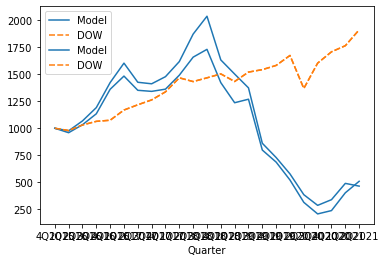

In [45]:
import numpy as np
import asyncio
import pandas as pd
import sqlite3
import json
import pickle
from datetime import datetime, timedelta, date
from collections import namedtuple, defaultdict
from typing import Tuple
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from typing import List, Tuple, Dict
from sklearn.compose import ColumnTransformer
import warnings
import plotly.express as px
import plotly.graph_objects as go
from xgboost import XGBRegressor
from copy import deepcopy
import os
import sys
import copy
import yfinance_ez as yf
import seaborn as sns
import matplotlib.pyplot as plt


module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from finance_ml.variants.linear_model.main import main
from finance_ml.variants.linear_model.hyperparams import Hyperparams
from finance_ml.variants.linear_model.preprocessing import preprocess_data, preprocess_quarterly_data
from finance_ml.variants.linear_model.backtest import compute_performance
from finance_ml.utils.constants import (
    QuarterlyColumns as QC, StockPupColumns, STOCKPUP_TABLE_NAME, QUARTERLY_DB_FILE_PATH,
    YF_QUARTERLY_TABLE_NAME, INDEX_COLUMNS, MISSING_SECTOR, MISSING_INDUSTRY,
    STOCK_GENERAL_INFO_CSV, FORMULAE, Q_DELTA_PREFIX, YOY_DELTA_PREFIX,
    QUARTER, YEAR, VS_MKT_IDX, CATEGORICAL_COLUMNS, TICKER_SYMBOL, TARGET_COLUMN
)
from finance_ml.utils import QuarterlyIndex

warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)

%load_ext autoreload
%autoreload 2

In [2]:
hp = Hyperparams()

df, prediction_candidate_df = preprocess_data(hp)
_, market_index_df = preprocess_quarterly_data(hp)

/Users/ezras/projects/personal/finance_ml/finance_ml/variants/linear_model/preprocessing.py:153: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Initial combined data size: (64205, 37)
Preprocessed quarterly df: (64205, 73)


/Users/ezras/projects/personal/finance_ml/finance_ml/variants/linear_model/preprocessing.py:153: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
portfolio = await compute_performance(df=df,
                          start_date=date(2016,1,1),
                          hyperparams=hp,
                          end_date=None)
portfolio.cash


Fitting data for: QuarterlyIndex  Q4 2015
Filtering data between 4Q1995 and 4Q2015
QuarterFilter removed 12741 rows. Output size: (48318, 73)
Train Size: (38655, 72), Test Size: (9663, 72)
[1]	valid_0's l1: 31.7366	valid_0's l2: 8635.66
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 31.5427	valid_0's l2: 8497.31
[3]	valid_0's l1: 31.4256	valid_0's l2: 8481.11
[4]	valid_0's l1: 31.3079	valid_0's l2: 8357.32
[5]	valid_0's l1: 31.2383	valid_0's l2: 8321.03
[6]	valid_0's l1: 31.1215	valid_0's l2: 8231.5
[7]	valid_0's l1: 31.0276	valid_0's l2: 8227.36
[8]	valid_0's l1: 30.9591	valid_0's l2: 8156.27
[9]	valid_0's l1: 30.8539	valid_0's l2: 8062.11
[10]	valid_0's l1: 30.8304	valid_0's l2: 7999.77
[11]	valid_0's l1: 30.7862	valid_0's l2: 7978.58
[12]	valid_0's l1: 30.7674	valid_0's l2: 7999.7
[13]	valid_0's l1: 30.7476	valid_0's l2: 7939.19
[14]	valid_0's l1: 30.6768	valid_0's l2: 7869
[15]	valid_0's l1: 30.6074	valid_0's l2: 7800.1
[16]	valid_0's l1: 30.5797	val

[30]	valid_0's l1: 29.6054	valid_0's l2: 8308.04
[31]	valid_0's l1: 29.5667	valid_0's l2: 8270.7
[32]	valid_0's l1: 29.5396	valid_0's l2: 8257.44
[33]	valid_0's l1: 29.5177	valid_0's l2: 8248.21
[34]	valid_0's l1: 29.5018	valid_0's l2: 8221.62
[35]	valid_0's l1: 29.4801	valid_0's l2: 8205.41
[36]	valid_0's l1: 29.4676	valid_0's l2: 8189.85
[37]	valid_0's l1: 29.4374	valid_0's l2: 8175.22
[38]	valid_0's l1: 29.424	valid_0's l2: 8182.9
[39]	valid_0's l1: 29.4287	valid_0's l2: 8199.34
[40]	valid_0's l1: 29.4076	valid_0's l2: 8164.8
[41]	valid_0's l1: 29.3554	valid_0's l2: 8141.77
[42]	valid_0's l1: 29.324	valid_0's l2: 8124.64
[43]	valid_0's l1: 29.3265	valid_0's l2: 8119.75
[44]	valid_0's l1: 29.311	valid_0's l2: 8135.69
[45]	valid_0's l1: 29.2815	valid_0's l2: 8114.99
[46]	valid_0's l1: 29.2616	valid_0's l2: 8088.83
[47]	valid_0's l1: 29.2511	valid_0's l2: 8093.75
[48]	valid_0's l1: 29.2279	valid_0's l2: 8077.52
[49]	valid_0's l1: 29.2005	valid_0's l2: 8063.76
[50]	valid_0's l1: 29.2045

[41]	valid_0's l1: 28.8372	valid_0's l2: 2925.65
[42]	valid_0's l1: 28.844	valid_0's l2: 2928.04
[43]	valid_0's l1: 28.8422	valid_0's l2: 2926.39
[44]	valid_0's l1: 28.8271	valid_0's l2: 2927.14
[45]	valid_0's l1: 28.8187	valid_0's l2: 2923.11
[46]	valid_0's l1: 28.8009	valid_0's l2: 2919.04
[47]	valid_0's l1: 28.7945	valid_0's l2: 2919.16
[48]	valid_0's l1: 28.8189	valid_0's l2: 2920.06
[49]	valid_0's l1: 28.8132	valid_0's l2: 2926.79
[50]	valid_0's l1: 28.7997	valid_0's l2: 2926.57
[51]	valid_0's l1: 28.8054	valid_0's l2: 2927.39
Early stopping, best iteration is:
[46]	valid_0's l1: 28.8009	valid_0's l2: 2919.04
Filtering data between 4Q2016 and 1Q2017
QuarterFilter removed 63581 rows. Output size: (624, 72)
Current portfolio: {QuarterlyIndex MBI Q1 2016: 31.000000000000004, QuarterlyIndex CLF Q1 2016: 79.73790322580646, QuarterlyIndex NAV Q1 2016: 42.40476190476191, QuarterlyIndex UIS Q1 2016: 33.56020942408377, QuarterlyIndex NE Q1 2016: 15.004887585532746, QuarterlyIndex RIG Q1 20

[40]	valid_0's l1: 29.8361	valid_0's l2: 4491.2
[41]	valid_0's l1: 29.8313	valid_0's l2: 4479.87
[42]	valid_0's l1: 29.819	valid_0's l2: 4488.09
[43]	valid_0's l1: 29.7925	valid_0's l2: 4486.46
[44]	valid_0's l1: 29.7718	valid_0's l2: 4481.09
[45]	valid_0's l1: 29.7748	valid_0's l2: 4503.75
[46]	valid_0's l1: 29.7751	valid_0's l2: 4506.87
Early stopping, best iteration is:
[41]	valid_0's l1: 29.8313	valid_0's l2: 4479.87
Filtering data between 2Q2017 and 3Q2017
QuarterFilter removed 63586 rows. Output size: (619, 72)
Current portfolio: {QuarterlyIndex FMCC Q3 2016: 37.50000000000001, QuarterlyIndex SHLD Q3 2016: 18.297636632200888, QuarterlyIndex ESV Q3 2016: 20.68717653824037, QuarterlyIndex MBI Q3 2016: 28.20261437908497, QuarterlyIndex NE Q3 2016: 17.460881934566146, QuarterlyIndex GNW Q3 2016: 25.600000000000005, QuarterlyIndex AMBC Q3 2016: 25.84818861414606, QuarterlyIndex LB Q3 2016: 18.45577746077033, QuarterlyIndex VRSN Q3 2016: 28.21650124069479, QuarterlyIndex HRB Q3 2016: 2

[1]	valid_0's l1: 30.2459	valid_0's l2: 4786.04
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 30.1162	valid_0's l2: 4675.93
[3]	valid_0's l1: 30.0458	valid_0's l2: 4572.61
[4]	valid_0's l1: 29.9659	valid_0's l2: 4499.27
[5]	valid_0's l1: 29.9184	valid_0's l2: 4432.36
[6]	valid_0's l1: 29.892	valid_0's l2: 4390.68
[7]	valid_0's l1: 29.8632	valid_0's l2: 4363.33
[8]	valid_0's l1: 29.8789	valid_0's l2: 4334.77
[9]	valid_0's l1: 29.8579	valid_0's l2: 4324.26
[10]	valid_0's l1: 29.8449	valid_0's l2: 4319.58
[11]	valid_0's l1: 29.857	valid_0's l2: 4300.39
[12]	valid_0's l1: 29.8508	valid_0's l2: 4305.85
[13]	valid_0's l1: 29.8324	valid_0's l2: 4304.67
[14]	valid_0's l1: 29.7974	valid_0's l2: 4281.73
[15]	valid_0's l1: 29.759	valid_0's l2: 4230
[16]	valid_0's l1: 29.7407	valid_0's l2: 4226.32
[17]	valid_0's l1: 29.732	valid_0's l2: 4214.62
[18]	valid_0's l1: 29.6964	valid_0's l2: 4219.84
[19]	valid_0's l1: 29.6669	valid_0's l2: 4177.79
[20]	valid_0's l1: 29.606

[41]	valid_0's l1: 28.0628	valid_0's l2: 3533.11
[42]	valid_0's l1: 28.026	valid_0's l2: 3515.49
[43]	valid_0's l1: 28.0197	valid_0's l2: 3504.93
[44]	valid_0's l1: 28.0046	valid_0's l2: 3491.72
[45]	valid_0's l1: 28.0019	valid_0's l2: 3486.3
[46]	valid_0's l1: 28.0026	valid_0's l2: 3471.34
[47]	valid_0's l1: 27.9916	valid_0's l2: 3473.48
[48]	valid_0's l1: 27.9631	valid_0's l2: 3462.55
[49]	valid_0's l1: 27.9487	valid_0's l2: 3458.65
[50]	valid_0's l1: 27.9396	valid_0's l2: 3453.48
[51]	valid_0's l1: 27.9372	valid_0's l2: 3460.17
[52]	valid_0's l1: 27.9461	valid_0's l2: 3467.71
[53]	valid_0's l1: 27.942	valid_0's l2: 3462.51
[54]	valid_0's l1: 27.9417	valid_0's l2: 3460.84
[55]	valid_0's l1: 27.9434	valid_0's l2: 3471.38
Early stopping, best iteration is:
[50]	valid_0's l1: 27.9396	valid_0's l2: 3453.48
Filtering data between 3Q2018 and 4Q2018
QuarterFilter removed 63605 rows. Output size: (600, 72)
Current portfolio: {QuarterlyIndex FTR Q4 2017: 20.068556677718064, QuarterlyIndex WIN

Train Size: (39962, 72), Test Size: (9990, 72)
[1]	valid_0's l1: 29.1097	valid_0's l2: 4533.16
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 28.9586	valid_0's l2: 4449.71
[3]	valid_0's l1: 28.8668	valid_0's l2: 4404.48
[4]	valid_0's l1: 28.7075	valid_0's l2: 4328.63
[5]	valid_0's l1: 28.6209	valid_0's l2: 4278.68
[6]	valid_0's l1: 28.5746	valid_0's l2: 4264.28
[7]	valid_0's l1: 28.4888	valid_0's l2: 4219.92
[8]	valid_0's l1: 28.4613	valid_0's l2: 4199.39
[9]	valid_0's l1: 28.4256	valid_0's l2: 4201.03
[10]	valid_0's l1: 28.3785	valid_0's l2: 4183.41
[11]	valid_0's l1: 28.3025	valid_0's l2: 4161.38
[12]	valid_0's l1: 28.2548	valid_0's l2: 4132.63
[13]	valid_0's l1: 28.2215	valid_0's l2: 4126.8
[14]	valid_0's l1: 28.2026	valid_0's l2: 4119.1
[15]	valid_0's l1: 28.1571	valid_0's l2: 4100.93
[16]	valid_0's l1: 28.136	valid_0's l2: 4102.17
[17]	valid_0's l1: 28.1248	valid_0's l2: 4090.48
[18]	valid_0's l1: 28.0841	valid_0's l2: 4073.46
[19]	valid_0's l1: 28.0

Failed to find data for QuarterlyIndex WFT Q4 2019
Failed to find data for QuarterlyIndex WFT Q4 2019
Failed to find data for QuarterlyIndex ESV Q4 2019
Failed to find data for QuarterlyIndex AVP Q4 2019
Failed to find data for QuarterlyIndex PFIE Q4 2019
Failed to find data for QuarterlyIndex KODK Q4 2019
Failed to find data for QuarterlyIndex ESV Q4 2019
Failed to find data for QuarterlyIndex XL Q4 2019

Fitting data for: QuarterlyIndex  Q4 2019
Filtering data between 4Q1999 and 4Q2019
QuarterFilter removed 11269 rows. Output size: (49790, 73)
Train Size: (39832, 72), Test Size: (9958, 72)
[1]	valid_0's l1: 28.6246	valid_0's l2: 4255.03
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 28.4678	valid_0's l2: 4139.8
[3]	valid_0's l1: 28.3202	valid_0's l2: 4039
[4]	valid_0's l1: 28.2499	valid_0's l2: 4024.82
[5]	valid_0's l1: 28.168	valid_0's l2: 3984.09
[6]	valid_0's l1: 28.0979	valid_0's l2: 3932.1
[7]	valid_0's l1: 28.0357	valid_0's l2: 3936.97
[8]	valid_0

Train Size: (39581, 72), Test Size: (9895, 72)
[1]	valid_0's l1: 27.9068	valid_0's l2: 6198.04
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.8265	valid_0's l2: 6091.64
[3]	valid_0's l1: 27.7533	valid_0's l2: 6004.63
[4]	valid_0's l1: 27.6806	valid_0's l2: 5935.03
[5]	valid_0's l1: 27.5823	valid_0's l2: 5858.21
[6]	valid_0's l1: 27.5316	valid_0's l2: 5771.57
[7]	valid_0's l1: 27.4757	valid_0's l2: 5751.74
[8]	valid_0's l1: 27.4411	valid_0's l2: 5743.34
[9]	valid_0's l1: 27.4207	valid_0's l2: 5722.39
[10]	valid_0's l1: 27.3701	valid_0's l2: 5677.92
[11]	valid_0's l1: 27.3588	valid_0's l2: 5694.03
[12]	valid_0's l1: 27.3482	valid_0's l2: 5693.34
[13]	valid_0's l1: 27.2957	valid_0's l2: 5701.7
[14]	valid_0's l1: 27.2774	valid_0's l2: 5683.28
[15]	valid_0's l1: 27.2259	valid_0's l2: 5647.95
[16]	valid_0's l1: 27.191	valid_0's l2: 5654.69
[17]	valid_0's l1: 27.1469	valid_0's l2: 5630.49
[18]	valid_0's l1: 27.1591	valid_0's l2: 5627.88
[19]	valid_0's l1: 27.

Failed to find data for QuarterlyIndex MNK Q4 2020
Failed to find data for QuarterlyIndex WINMQ Q4 2020
Failed to find data for QuarterlyIndex WPX Q4 2020
Failed to find data for QuarterlyIndex AIV Q4 2020
Failed to find data for QuarterlyIndex KODK Q4 2020

Fitting data for: QuarterlyIndex  Q4 2020
Filtering data between 4Q2000 and 4Q2020
QuarterFilter removed 12167 rows. Output size: (48892, 73)
Train Size: (39114, 72), Test Size: (9778, 72)
[1]	valid_0's l1: 29.9108	valid_0's l2: 10197.3
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 29.7799	valid_0's l2: 10128.5
[3]	valid_0's l1: 29.6028	valid_0's l2: 10056.9
[4]	valid_0's l1: 29.4991	valid_0's l2: 9954.83
[5]	valid_0's l1: 29.4006	valid_0's l2: 9883.21
[6]	valid_0's l1: 29.2881	valid_0's l2: 9839.61
[7]	valid_0's l1: 29.2218	valid_0's l2: 9789.52
[8]	valid_0's l1: 29.1547	valid_0's l2: 9702.56
[9]	valid_0's l1: 29.0981	valid_0's l2: 9618.15
[10]	valid_0's l1: 29.0509	valid_0's l2: 9610.07
[11]	valid_

Filtering data between 1Q2021 and 2Q2021
QuarterFilter removed 63621 rows. Output size: (584, 72)
Current portfolio: {QuarterlyIndex CCU Q2 2020: 10.509845333203696, QuarterlyIndex MNK Q2 2020: 0, QuarterlyIndex NAV Q2 2020: 14.40944513122527, QuarterlyIndex APA Q2 2020: 14.360403103818907, QuarterlyIndex RIG Q2 2020: 19.74618072356503, QuarterlyIndex WINMQ Q2 2020: 0, QuarterlyIndex AAN Q2 2020: 14.996764010407478, QuarterlyIndex WPX Q2 2020: 0, QuarterlyIndex NVDA Q2 2020: 18.018901695528648, QuarterlyIndex CLF Q2 2020: 29.615435014242927, QuarterlyIndex RRD Q3 2020: 5.881255380685623, QuarterlyIndex AIV Q3 2020: -0.0, QuarterlyIndex FMCC Q3 2020: 2.1785309678138587, QuarterlyIndex IAC Q3 2020: 4.318409501706802, QuarterlyIndex BTU Q3 2020: 3.0715224889781965, QuarterlyIndex XL Q3 2020: 3.1117253842194073, QuarterlyIndex FNMA Q3 2020: 2.2108998513906233, QuarterlyIndex GME Q3 2020: 18.88495763012196, QuarterlyIndex AMSC Q3 2020: 5.342676248910224, QuarterlyIndex KODK Q3 2020: 0.0, Qu

In [4]:
portfolio.performance

OrderedDict([('4Q2019', 1000),
             ('1Q2020', 963.54),
             ('2Q2020', 766.94),
             ('3Q2020', 611.35),
             ('4Q2020', 647.91),
             ('1Q2021', 1119.35),
             ('2Q2021', 1673.4)])

In [43]:
def plot_vs_dow(portfolio):
    starting_cash = 1000
    q_indexes = [QuarterlyIndex("^DJI", int(q[0]), int(q[-4:])) for q in portfolio.performance]
    dow_prices = [market_index_df.loc[idx.to_tuple()][QC.PRICE_AVG] for idx in q_indexes]
    dow_prices = {q_idx.to_xQyyyy(): price / dow_prices[0] * starting_cash for q_idx, price in zip(q_indexes, dow_prices)}

    data = pd.DataFrame([portfolio.performance, dow_prices], index=['Model', 'DOW'])
    data_T = data.transpose()
    data_T.index.name = "Quarter"
    sns.lineplot(data=data_T, sort=False)

# Num Quarters Used for Training Data

In [58]:
output = {}

for num_quarters_for_training in range(8, 21, 2):
    hp = Hyperparams(NUM_QUARTERS_FOR_TRAINING=num_quarters_for_training, RANDOM_SEED=63)

    portfolio = await compute_performance(df=df,
                              start_date=date(2016,1,1),
                              hyperparams=hp,
                              end_date=None)
    
    output[num_quarters_for_training] = portfolio


Fitting data for: QuarterlyIndex  Q4 2015
Filtering data between 4Q2013 and 4Q2015
QuarterFilter removed 55917 rows. Output size: (5142, 73)
Train Size: (4114, 72), Test Size: (1028, 72)
[1]	valid_0's l1: 19.3862	valid_0's l2: 659.013
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 19.0349	valid_0's l2: 634.621
[3]	valid_0's l1: 18.7201	valid_0's l2: 614.629
[4]	valid_0's l1: 18.4152	valid_0's l2: 596.7
[5]	valid_0's l1: 18.2054	valid_0's l2: 582.901
[6]	valid_0's l1: 18.0502	valid_0's l2: 571.948
[7]	valid_0's l1: 17.8892	valid_0's l2: 559.18
[8]	valid_0's l1: 17.757	valid_0's l2: 551.016
[9]	valid_0's l1: 17.6114	valid_0's l2: 541.459
[10]	valid_0's l1: 17.44	valid_0's l2: 531.429
[11]	valid_0's l1: 17.4033	valid_0's l2: 527.127
[12]	valid_0's l1: 17.349	valid_0's l2: 523.687
[13]	valid_0's l1: 17.288	valid_0's l2: 520.833
[14]	valid_0's l1: 17.2164	valid_0's l2: 515.064
[15]	valid_0's l1: 17.1841	valid_0's l2: 511.27
[16]	valid_0's l1: 17.1353	valid_0'

[49]	valid_0's l1: 16.3088	valid_0's l2: 492.595
[50]	valid_0's l1: 16.2896	valid_0's l2: 491.805
[51]	valid_0's l1: 16.2966	valid_0's l2: 492.174
[52]	valid_0's l1: 16.2803	valid_0's l2: 491.206
[53]	valid_0's l1: 16.2501	valid_0's l2: 490.313
[54]	valid_0's l1: 16.2488	valid_0's l2: 490.133
[55]	valid_0's l1: 16.209	valid_0's l2: 488.502
[56]	valid_0's l1: 16.2059	valid_0's l2: 488.269
[57]	valid_0's l1: 16.1921	valid_0's l2: 487.494
[58]	valid_0's l1: 16.1489	valid_0's l2: 485.629
[59]	valid_0's l1: 16.1596	valid_0's l2: 485.406
[60]	valid_0's l1: 16.1301	valid_0's l2: 483.389
[61]	valid_0's l1: 16.1576	valid_0's l2: 484.261
[62]	valid_0's l1: 16.1497	valid_0's l2: 483.559
[63]	valid_0's l1: 16.1226	valid_0's l2: 482.536
[64]	valid_0's l1: 16.1117	valid_0's l2: 481.872
[65]	valid_0's l1: 16.1065	valid_0's l2: 481.697
[66]	valid_0's l1: 16.1121	valid_0's l2: 481.973
[67]	valid_0's l1: 16.0975	valid_0's l2: 481.472
[68]	valid_0's l1: 16.0733	valid_0's l2: 479.76
[69]	valid_0's l1: 16.

[10]	valid_0's l1: 18.2111	valid_0's l2: 722.822
[11]	valid_0's l1: 18.0877	valid_0's l2: 715.241
[12]	valid_0's l1: 17.991	valid_0's l2: 707.269
[13]	valid_0's l1: 17.9494	valid_0's l2: 700.806
[14]	valid_0's l1: 17.9482	valid_0's l2: 698.346
[15]	valid_0's l1: 17.9139	valid_0's l2: 695.864
[16]	valid_0's l1: 17.84	valid_0's l2: 690.532
[17]	valid_0's l1: 17.7715	valid_0's l2: 686.667
[18]	valid_0's l1: 17.748	valid_0's l2: 681.963
[19]	valid_0's l1: 17.7025	valid_0's l2: 678.564
[20]	valid_0's l1: 17.6656	valid_0's l2: 675.033
[21]	valid_0's l1: 17.6314	valid_0's l2: 672.757
[22]	valid_0's l1: 17.6061	valid_0's l2: 671.532
[23]	valid_0's l1: 17.5972	valid_0's l2: 670.969
[24]	valid_0's l1: 17.6039	valid_0's l2: 671.284
[25]	valid_0's l1: 17.5955	valid_0's l2: 669.222
[26]	valid_0's l1: 17.5252	valid_0's l2: 663.57
[27]	valid_0's l1: 17.4991	valid_0's l2: 660.519
[28]	valid_0's l1: 17.4813	valid_0's l2: 655.181
[29]	valid_0's l1: 17.463	valid_0's l2: 654.717
[30]	valid_0's l1: 17.3887

Current portfolio: {QuarterlyIndex PNC Q1 2016: 29.142942999936736, QuarterlyIndex ABMD Q1 2016: 34.977303398356035, QuarterlyIndex AMD Q1 2016: 96.6804979253112, QuarterlyIndex CLF Q1 2016: 79.73790322580646, QuarterlyIndex ALGN Q1 2016: 35.415711447348315, QuarterlyIndex CNC Q1 2016: 25.345423143350605, QuarterlyIndex ATVI Q1 2016: 31.224837410963143, QuarterlyIndex MDT Q1 2016: 28.002645502645507, QuarterlyIndex WINMQ Q1 2016: 31.931297709923665, QuarterlyIndex USB Q1 2016: 30.114068441064635, QuarterlyIndex AMD Q2 2016: 57.389162561576356, QuarterlyIndex HPQ Q2 2016: 33.61517367458867, QuarterlyIndex NAV Q2 2016: 39.33303886925795, QuarterlyIndex WMB Q2 2016: 38.67532467532468, QuarterlyIndex ABMD Q2 2016: 28.272510908369693, QuarterlyIndex MTW Q2 2016: 24.01061776061776, QuarterlyIndex ADSK Q2 2016: 31.292059219380892, QuarterlyIndex CLF Q2 2016: 45.988372093023266, QuarterlyIndex UIS Q2 2016: 41.89542483660131, QuarterlyIndex NVDA Q2 2016: 51.60720025715204, QuarterlyIndex AMD Q3

[50]	valid_0's l1: 18.4449	valid_0's l2: 821.402
[51]	valid_0's l1: 18.4354	valid_0's l2: 820.606
[52]	valid_0's l1: 18.4551	valid_0's l2: 819.823
[53]	valid_0's l1: 18.4333	valid_0's l2: 819.33
[54]	valid_0's l1: 18.4417	valid_0's l2: 820.083
[55]	valid_0's l1: 18.4393	valid_0's l2: 818.412
[56]	valid_0's l1: 18.4459	valid_0's l2: 819.108
[57]	valid_0's l1: 18.4205	valid_0's l2: 818.202
[58]	valid_0's l1: 18.3922	valid_0's l2: 817.046
[59]	valid_0's l1: 18.3907	valid_0's l2: 818.213
[60]	valid_0's l1: 18.3807	valid_0's l2: 817.802
[61]	valid_0's l1: 18.3605	valid_0's l2: 816.379
[62]	valid_0's l1: 18.3512	valid_0's l2: 814.752
[63]	valid_0's l1: 18.3248	valid_0's l2: 813.704
[64]	valid_0's l1: 18.3194	valid_0's l2: 814.327
[65]	valid_0's l1: 18.3044	valid_0's l2: 813.242
[66]	valid_0's l1: 18.3223	valid_0's l2: 814.878
[67]	valid_0's l1: 18.3174	valid_0's l2: 814.463
[68]	valid_0's l1: 18.2991	valid_0's l2: 812.822
[69]	valid_0's l1: 18.3062	valid_0's l2: 813.003
[70]	valid_0's l1: 18

[19]	valid_0's l1: 18.7864	valid_0's l2: 671.367
[20]	valid_0's l1: 18.7977	valid_0's l2: 672.579
[21]	valid_0's l1: 18.7845	valid_0's l2: 672.344
[22]	valid_0's l1: 18.8149	valid_0's l2: 674.595
Early stopping, best iteration is:
[17]	valid_0's l1: 18.7914	valid_0's l2: 671.06
Filtering data between 4Q2017 and 1Q2018
QuarterFilter removed 63593 rows. Output size: (612, 72)
Current portfolio: {QuarterlyIndex NVDA Q1 2017: 87.69970515551775, QuarterlyIndex AMD Q1 2017: 44.51335223648529, QuarterlyIndex AMAT Q1 2017: 71.98939027011927, QuarterlyIndex ALGN Q1 2017: 102.05927522204368, QuarterlyIndex TXN Q1 2017: 57.92933168703808, QuarterlyIndex WYNN Q1 2017: 70.6766630859786, QuarterlyIndex LRCX Q1 2017: 76.08053723956314, QuarterlyIndex SWKS Q1 2017: 55.92842189218048, QuarterlyIndex AVGO Q1 2017: 61.76432691210134, QuarterlyIndex KLAC Q1 2017: 56.27922324550112, QuarterlyIndex TER Q2 2017: 59.61830588876401, QuarterlyIndex ALGN Q2 2017: 81.30956915363561, QuarterlyIndex X Q2 2017: 54.7

[20]	valid_0's l1: 19.4574	valid_0's l2: 691.452
[21]	valid_0's l1: 19.4003	valid_0's l2: 688.807
[22]	valid_0's l1: 19.3409	valid_0's l2: 685.448
[23]	valid_0's l1: 19.2805	valid_0's l2: 680.353
[24]	valid_0's l1: 19.2575	valid_0's l2: 678.715
[25]	valid_0's l1: 19.1656	valid_0's l2: 673.087
[26]	valid_0's l1: 19.1256	valid_0's l2: 671.412
[27]	valid_0's l1: 19.0203	valid_0's l2: 664.994
[28]	valid_0's l1: 18.9541	valid_0's l2: 662.388
[29]	valid_0's l1: 18.9002	valid_0's l2: 658.111
[30]	valid_0's l1: 18.8828	valid_0's l2: 657.679
[31]	valid_0's l1: 18.8134	valid_0's l2: 653.746
[32]	valid_0's l1: 18.791	valid_0's l2: 652.313
[33]	valid_0's l1: 18.7663	valid_0's l2: 651.292
[34]	valid_0's l1: 18.7301	valid_0's l2: 647.795
[35]	valid_0's l1: 18.7117	valid_0's l2: 648.287
[36]	valid_0's l1: 18.6874	valid_0's l2: 647.158
[37]	valid_0's l1: 18.6551	valid_0's l2: 642.991
[38]	valid_0's l1: 18.6075	valid_0's l2: 639.795
[39]	valid_0's l1: 18.5898	valid_0's l2: 638.446
[40]	valid_0's l1: 18

[60]	valid_0's l1: 18.547	valid_0's l2: 660.728
Early stopping, best iteration is:
[55]	valid_0's l1: 18.5653	valid_0's l2: 657.543
Filtering data between 3Q2018 and 4Q2018
QuarterFilter removed 63605 rows. Output size: (600, 72)
Current portfolio: {QuarterlyIndex MED Q4 2017: 122.05803485818868, QuarterlyIndex MTW Q4 2017: 38.06912356275934, QuarterlyIndex NVDA Q4 2017: 54.18410436521838, QuarterlyIndex ABMD Q4 2017: 85.66951388066927, QuarterlyIndex ALGN Q4 2017: 63.38527552526485, QuarterlyIndex ANSS Q4 2017: 50.314470169875484, QuarterlyIndex AMAT Q4 2017: 40.22136191210984, QuarterlyIndex KBH Q4 2017: 38.534062792750966, QuarterlyIndex DHI Q4 2017: 36.52998397899959, QuarterlyIndex QCOM Q4 2017: 43.15959086865118, QuarterlyIndex MED Q1 2018: 197.97238099282342, QuarterlyIndex ABMD Q1 2018: 121.10122154630113, QuarterlyIndex ISRG Q1 2018: 95.57176841304322, QuarterlyIndex LRCX Q1 2018: 65.81521331004538, QuarterlyIndex CLF Q1 2018: 102.48861359037085, QuarterlyIndex AMSC Q1 2018: 9

[24]	valid_0's l1: 21.4964	valid_0's l2: 982.897
[25]	valid_0's l1: 21.4395	valid_0's l2: 980.334
[26]	valid_0's l1: 21.413	valid_0's l2: 978.171
[27]	valid_0's l1: 21.3933	valid_0's l2: 977.312
[28]	valid_0's l1: 21.3211	valid_0's l2: 973.963
[29]	valid_0's l1: 21.2223	valid_0's l2: 963.677
[30]	valid_0's l1: 21.2456	valid_0's l2: 965.073
[31]	valid_0's l1: 21.2178	valid_0's l2: 964.06
[32]	valid_0's l1: 21.1606	valid_0's l2: 958.297
[33]	valid_0's l1: 21.1391	valid_0's l2: 957.408
[34]	valid_0's l1: 21.1281	valid_0's l2: 955.979
[35]	valid_0's l1: 21.039	valid_0's l2: 948.127
[36]	valid_0's l1: 20.9687	valid_0's l2: 944.229
[37]	valid_0's l1: 20.9069	valid_0's l2: 943.672
[38]	valid_0's l1: 20.8863	valid_0's l2: 943.702
[39]	valid_0's l1: 20.8726	valid_0's l2: 942.011
[40]	valid_0's l1: 20.9159	valid_0's l2: 946.347
[41]	valid_0's l1: 20.8771	valid_0's l2: 942.894
[42]	valid_0's l1: 20.8664	valid_0's l2: 942.175
[43]	valid_0's l1: 20.8012	valid_0's l2: 933.69
[44]	valid_0's l1: 20.76

Failed to find data for QuarterlyIndex ABMD Q3 2019
Failed to find data for QuarterlyIndex AMD Q3 2019
Failed to find data for QuarterlyIndex CNC Q3 2019
Failed to find data for QuarterlyIndex PTC Q3 2019
Failed to find data for QuarterlyIndex ALGN Q3 2019
Failed to find data for QuarterlyIndex FNMA Q3 2019
Failed to find data for QuarterlyIndex CDNS Q3 2019
Failed to find data for QuarterlyIndex CTXS Q3 2019
Failed to find data for QuarterlyIndex VRSN Q3 2019
Failed to find data for QuarterlyIndex PCG Q3 2019
Failed to find data for QuarterlyIndex NBR Q3 2019
Failed to find data for QuarterlyIndex ABMD Q3 2019
Failed to find data for QuarterlyIndex MED Q3 2019
Failed to find data for QuarterlyIndex ALGN Q3 2019
Failed to find data for QuarterlyIndex AMD Q3 2019
Failed to find data for QuarterlyIndex PTC Q3 2019
Failed to find data for QuarterlyIndex CMG Q3 2019
Failed to find data for QuarterlyIndex CNC Q3 2019
Failed to find data for QuarterlyIndex PCG Q3 2019
Failed to find data for


Fitting data for: QuarterlyIndex  Q1 2020
Filtering data between 1Q2018 and 1Q2020
QuarterFilter removed 56881 rows. Output size: (4178, 73)
Train Size: (3343, 72), Test Size: (835, 72)
[1]	valid_0's l1: 31.692	valid_0's l2: 13723.7
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 31.2406	valid_0's l2: 13592.1
[3]	valid_0's l1: 30.923	valid_0's l2: 13426.8
[4]	valid_0's l1: 30.5238	valid_0's l2: 13366.3
[5]	valid_0's l1: 30.1864	valid_0's l2: 13301.7
[6]	valid_0's l1: 29.8754	valid_0's l2: 13206.1
[7]	valid_0's l1: 29.5948	valid_0's l2: 13069.7
[8]	valid_0's l1: 29.4123	valid_0's l2: 12987
[9]	valid_0's l1: 29.1002	valid_0's l2: 12876.9
[10]	valid_0's l1: 28.899	valid_0's l2: 12789.3
[11]	valid_0's l1: 28.8083	valid_0's l2: 12665.3
[12]	valid_0's l1: 28.6589	valid_0's l2: 12578.1
[13]	valid_0's l1: 28.52	valid_0's l2: 12532.8
[14]	valid_0's l1: 28.373	valid_0's l2: 12511.4
[15]	valid_0's l1: 28.2802	valid_0's l2: 12420.9
[16]	valid_0's l1: 28.248	valid_0's

Filtering data between 3Q2020 and 4Q2020
QuarterFilter removed 63605 rows. Output size: (600, 72)
Current portfolio: {QuarterlyIndex WINMQ Q4 2019: 0, QuarterlyIndex AKRX Q4 2019: 0, QuarterlyIndex MNK Q4 2019: 0, QuarterlyIndex FTR Q4 2019: 0, QuarterlyIndex APH Q4 2019: 192.60850213657622, QuarterlyIndex JCP Q4 2019: 0, QuarterlyIndex LIFE Q4 2019: 25.150239253568436, QuarterlyIndex BTU Q4 2019: 5.903067491448751, QuarterlyIndex SE Q4 2019: 94.608398163547, QuarterlyIndex SIG Q4 2019: 17.81430541994734, QuarterlyIndex WYND Q1 2020: 9.60239967440075, QuarterlyIndex AAL Q1 2020: 7.265750377454565, QuarterlyIndex TSLA Q1 2020: 38.47961461048322, QuarterlyIndex NE Q1 2020: 0, QuarterlyIndex BTU Q1 2020: 5.939561904442347, QuarterlyIndex WINMQ Q1 2020: 0, QuarterlyIndex SE Q1 2020: 40.63919413905248, QuarterlyIndex AKRX Q1 2020: 0, QuarterlyIndex APH Q1 2020: 116.52094726426357, QuarterlyIndex FOSL Q1 2020: 8.685118396190152, QuarterlyIndex RIG Q2 2020: 56.318544967397315, QuarterlyIndex 

[1]	valid_0's l1: 20.2464	valid_0's l2: 834.823
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.0289	valid_0's l2: 820.137
[3]	valid_0's l1: 19.8234	valid_0's l2: 805.075
[4]	valid_0's l1: 19.6833	valid_0's l2: 789.109
[5]	valid_0's l1: 19.6152	valid_0's l2: 785.147
[6]	valid_0's l1: 19.5118	valid_0's l2: 781.571
[7]	valid_0's l1: 19.4014	valid_0's l2: 777.106
[8]	valid_0's l1: 19.2911	valid_0's l2: 768.875
[9]	valid_0's l1: 19.2148	valid_0's l2: 766.197
[10]	valid_0's l1: 19.1402	valid_0's l2: 765.201
[11]	valid_0's l1: 19.0939	valid_0's l2: 761.767
[12]	valid_0's l1: 19.0509	valid_0's l2: 754.719
[13]	valid_0's l1: 19.1038	valid_0's l2: 757.069
[14]	valid_0's l1: 19.1	valid_0's l2: 757.357
[15]	valid_0's l1: 19.0567	valid_0's l2: 755.091
[16]	valid_0's l1: 18.9951	valid_0's l2: 752.461
[17]	valid_0's l1: 18.956	valid_0's l2: 745.351
[18]	valid_0's l1: 18.8977	valid_0's l2: 744.036
[19]	valid_0's l1: 18.8416	valid_0's l2: 740.489
[20]	valid_0's l1: 18.

Train Size: (5076, 72), Test Size: (1268, 72)
[1]	valid_0's l1: 20.5164	valid_0's l2: 884.659
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.2392	valid_0's l2: 857.822
[3]	valid_0's l1: 19.9829	valid_0's l2: 837.827
[4]	valid_0's l1: 19.7647	valid_0's l2: 819.525
[5]	valid_0's l1: 19.4999	valid_0's l2: 798.813
[6]	valid_0's l1: 19.3185	valid_0's l2: 785.309
[7]	valid_0's l1: 19.1139	valid_0's l2: 771.684
[8]	valid_0's l1: 18.991	valid_0's l2: 760.461
[9]	valid_0's l1: 18.7749	valid_0's l2: 746.426
[10]	valid_0's l1: 18.6844	valid_0's l2: 739.614
[11]	valid_0's l1: 18.6067	valid_0's l2: 733.727
[12]	valid_0's l1: 18.5817	valid_0's l2: 733.886
[13]	valid_0's l1: 18.5164	valid_0's l2: 727.165
[14]	valid_0's l1: 18.4286	valid_0's l2: 720.844
[15]	valid_0's l1: 18.3613	valid_0's l2: 714.78
[16]	valid_0's l1: 18.2936	valid_0's l2: 709.248
[17]	valid_0's l1: 18.2219	valid_0's l2: 705.088
[18]	valid_0's l1: 18.1845	valid_0's l2: 703.574
[19]	valid_0's l1: 18.1

[39]	valid_0's l1: 17.622	valid_0's l2: 571.708
[40]	valid_0's l1: 17.5928	valid_0's l2: 568.039
[41]	valid_0's l1: 17.5918	valid_0's l2: 567.961
[42]	valid_0's l1: 17.5989	valid_0's l2: 568.917
[43]	valid_0's l1: 17.5548	valid_0's l2: 567.468
[44]	valid_0's l1: 17.5418	valid_0's l2: 567.045
[45]	valid_0's l1: 17.5131	valid_0's l2: 564.122
[46]	valid_0's l1: 17.479	valid_0's l2: 561.608
[47]	valid_0's l1: 17.4411	valid_0's l2: 560.086
[48]	valid_0's l1: 17.4434	valid_0's l2: 558.723
[49]	valid_0's l1: 17.4233	valid_0's l2: 557.59
[50]	valid_0's l1: 17.449	valid_0's l2: 558.34
[51]	valid_0's l1: 17.4399	valid_0's l2: 557.932
[52]	valid_0's l1: 17.4127	valid_0's l2: 556.807
[53]	valid_0's l1: 17.404	valid_0's l2: 555.171
[54]	valid_0's l1: 17.359	valid_0's l2: 552.811
[55]	valid_0's l1: 17.349	valid_0's l2: 551.665
[56]	valid_0's l1: 17.3359	valid_0's l2: 550.894
[57]	valid_0's l1: 17.3038	valid_0's l2: 548.943
[58]	valid_0's l1: 17.2972	valid_0's l2: 548.536
[59]	valid_0's l1: 17.294	va

[61]	valid_0's l1: 18.8176	valid_0's l2: 877.386
[62]	valid_0's l1: 18.7979	valid_0's l2: 875.388
[63]	valid_0's l1: 18.8004	valid_0's l2: 875.298
[64]	valid_0's l1: 18.7857	valid_0's l2: 875.815
[65]	valid_0's l1: 18.7577	valid_0's l2: 873.125
[66]	valid_0's l1: 18.754	valid_0's l2: 873.809
[67]	valid_0's l1: 18.7574	valid_0's l2: 873.775
[68]	valid_0's l1: 18.7404	valid_0's l2: 871.692
[69]	valid_0's l1: 18.7386	valid_0's l2: 870.802
[70]	valid_0's l1: 18.7301	valid_0's l2: 870.078
[71]	valid_0's l1: 18.6897	valid_0's l2: 868.451
[72]	valid_0's l1: 18.6644	valid_0's l2: 865.63
[73]	valid_0's l1: 18.6407	valid_0's l2: 864.037
[74]	valid_0's l1: 18.6411	valid_0's l2: 862.953
[75]	valid_0's l1: 18.6116	valid_0's l2: 859.555
[76]	valid_0's l1: 18.6236	valid_0's l2: 860.07
[77]	valid_0's l1: 18.6041	valid_0's l2: 860.37
[78]	valid_0's l1: 18.5847	valid_0's l2: 859.952
[79]	valid_0's l1: 18.5477	valid_0's l2: 856.797
[80]	valid_0's l1: 18.5322	valid_0's l2: 855.222
[81]	valid_0's l1: 18.51

Filtering data between 2Q2017 and 3Q2017
QuarterFilter removed 63586 rows. Output size: (619, 72)
Current portfolio: {QuarterlyIndex NVDA Q3 2016: 58.94065022910758, QuarterlyIndex AMD Q3 2016: 48.5387045813586, QuarterlyIndex IQV Q3 2016: 29.03336067815149, QuarterlyIndex QRVO Q3 2016: 30.804268610098905, QuarterlyIndex ABMD Q3 2016: 27.592314745353004, QuarterlyIndex MDT Q3 2016: 23.564621798689693, QuarterlyIndex PETS Q3 2016: 38.92947103274559, QuarterlyIndex ADI Q3 2016: 33.34732952636883, QuarterlyIndex HBAN Q3 2016: 35.44165757906216, QuarterlyIndex MTW Q3 2016: 29.426310583580616, QuarterlyIndex AMD Q4 2016: 37.72051277235793, QuarterlyIndex EW Q4 2016: 30.057222002914337, QuarterlyIndex RF Q4 2016: 32.59799936484435, QuarterlyIndex KEY Q4 2016: 33.64961808802594, QuarterlyIndex CFG Q4 2016: 33.48071950564825, QuarterlyIndex CMA Q4 2016: 34.190247585352985, QuarterlyIndex CLF Q4 2016: 26.435194542864014, QuarterlyIndex FITB Q4 2016: 30.075608930435806, QuarterlyIndex MLM Q4 201

Train Size: (4928, 72), Test Size: (1231, 72)
[1]	valid_0's l1: 21.6794	valid_0's l2: 966.905
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.4022	valid_0's l2: 942.419
[3]	valid_0's l1: 21.1418	valid_0's l2: 917.406
[4]	valid_0's l1: 20.9385	valid_0's l2: 898.424
[5]	valid_0's l1: 20.7518	valid_0's l2: 881.635
[6]	valid_0's l1: 20.5786	valid_0's l2: 865.45
[7]	valid_0's l1: 20.4654	valid_0's l2: 852.13
[8]	valid_0's l1: 20.3132	valid_0's l2: 839.319
[9]	valid_0's l1: 20.2403	valid_0's l2: 833.313
[10]	valid_0's l1: 20.1371	valid_0's l2: 824.616
[11]	valid_0's l1: 20.0469	valid_0's l2: 815.04
[12]	valid_0's l1: 19.9819	valid_0's l2: 806.964
[13]	valid_0's l1: 19.9279	valid_0's l2: 800.167
[14]	valid_0's l1: 19.8922	valid_0's l2: 795.863
[15]	valid_0's l1: 19.8402	valid_0's l2: 790.507
[16]	valid_0's l1: 19.7965	valid_0's l2: 786.531
[17]	valid_0's l1: 19.7249	valid_0's l2: 779.965
[18]	valid_0's l1: 19.623	valid_0's l2: 772.965
[19]	valid_0's l1: 19.546

[19]	valid_0's l1: 20.2471	valid_0's l2: 1040.4
[20]	valid_0's l1: 20.2738	valid_0's l2: 1039.59
[21]	valid_0's l1: 20.2103	valid_0's l2: 1030.44
[22]	valid_0's l1: 20.1971	valid_0's l2: 1031.01
[23]	valid_0's l1: 20.1698	valid_0's l2: 1025.4
[24]	valid_0's l1: 20.1683	valid_0's l2: 1023.67
[25]	valid_0's l1: 20.124	valid_0's l2: 1020.06
[26]	valid_0's l1: 20.1004	valid_0's l2: 1015.5
[27]	valid_0's l1: 20.0799	valid_0's l2: 1012.53
[28]	valid_0's l1: 20.0526	valid_0's l2: 1009.16
[29]	valid_0's l1: 20.0448	valid_0's l2: 1003.85
[30]	valid_0's l1: 19.9931	valid_0's l2: 997.162
[31]	valid_0's l1: 19.9559	valid_0's l2: 994.201
[32]	valid_0's l1: 19.9249	valid_0's l2: 992.351
[33]	valid_0's l1: 19.9352	valid_0's l2: 993.601
[34]	valid_0's l1: 19.9094	valid_0's l2: 989.687
[35]	valid_0's l1: 19.884	valid_0's l2: 987.446
[36]	valid_0's l1: 19.8514	valid_0's l2: 984.446
[37]	valid_0's l1: 19.8274	valid_0's l2: 981.549
[38]	valid_0's l1: 19.7951	valid_0's l2: 976.945
[39]	valid_0's l1: 19.767

[80]	valid_0's l1: 18.4809	valid_0's l2: 789.016
[81]	valid_0's l1: 18.4705	valid_0's l2: 788.315
[82]	valid_0's l1: 18.462	valid_0's l2: 788.102
[83]	valid_0's l1: 18.4463	valid_0's l2: 787.293
[84]	valid_0's l1: 18.4484	valid_0's l2: 787.33
[85]	valid_0's l1: 18.4341	valid_0's l2: 787.047
[86]	valid_0's l1: 18.4273	valid_0's l2: 786.797
[87]	valid_0's l1: 18.4142	valid_0's l2: 786.438
[88]	valid_0's l1: 18.3969	valid_0's l2: 785.326
[89]	valid_0's l1: 18.3918	valid_0's l2: 785.398
[90]	valid_0's l1: 18.4072	valid_0's l2: 785.968
[91]	valid_0's l1: 18.4194	valid_0's l2: 786.521
[92]	valid_0's l1: 18.4036	valid_0's l2: 784.854
[93]	valid_0's l1: 18.3972	valid_0's l2: 784.423
[94]	valid_0's l1: 18.3795	valid_0's l2: 783.785
[95]	valid_0's l1: 18.3626	valid_0's l2: 783.619
[96]	valid_0's l1: 18.346	valid_0's l2: 783.451
[97]	valid_0's l1: 18.3308	valid_0's l2: 781.922
[98]	valid_0's l1: 18.3258	valid_0's l2: 781.147
[99]	valid_0's l1: 18.3133	valid_0's l2: 780.56
[100]	valid_0's l1: 18.3

[5]	valid_0's l1: 21.7336	valid_0's l2: 984.162
[6]	valid_0's l1: 21.558	valid_0's l2: 973.879
[7]	valid_0's l1: 21.3931	valid_0's l2: 961.157
[8]	valid_0's l1: 21.1769	valid_0's l2: 948.353
[9]	valid_0's l1: 20.9462	valid_0's l2: 930.317
[10]	valid_0's l1: 20.8249	valid_0's l2: 921.847
[11]	valid_0's l1: 20.7173	valid_0's l2: 914.063
[12]	valid_0's l1: 20.5938	valid_0's l2: 908.391
[13]	valid_0's l1: 20.4968	valid_0's l2: 901.777
[14]	valid_0's l1: 20.4165	valid_0's l2: 896.218
[15]	valid_0's l1: 20.333	valid_0's l2: 888.219
[16]	valid_0's l1: 20.2947	valid_0's l2: 883.902
[17]	valid_0's l1: 20.1973	valid_0's l2: 875.117
[18]	valid_0's l1: 20.1139	valid_0's l2: 866.197
[19]	valid_0's l1: 20.0642	valid_0's l2: 862.155
[20]	valid_0's l1: 19.9979	valid_0's l2: 856.626
[21]	valid_0's l1: 19.9582	valid_0's l2: 852.964
[22]	valid_0's l1: 19.8818	valid_0's l2: 843.982
[23]	valid_0's l1: 19.7856	valid_0's l2: 838.505
[24]	valid_0's l1: 19.7074	valid_0's l2: 832.923
[25]	valid_0's l1: 19.6385	

[38]	valid_0's l1: 20.6661	valid_0's l2: 1041.24
[39]	valid_0's l1: 20.6898	valid_0's l2: 1043.45
[40]	valid_0's l1: 20.6733	valid_0's l2: 1042.14
[41]	valid_0's l1: 20.6691	valid_0's l2: 1040.68
[42]	valid_0's l1: 20.6412	valid_0's l2: 1039.72
[43]	valid_0's l1: 20.6325	valid_0's l2: 1039.19
[44]	valid_0's l1: 20.6052	valid_0's l2: 1034.82
[45]	valid_0's l1: 20.5743	valid_0's l2: 1034.74
[46]	valid_0's l1: 20.5666	valid_0's l2: 1032.53
[47]	valid_0's l1: 20.5708	valid_0's l2: 1030.98
[48]	valid_0's l1: 20.561	valid_0's l2: 1029.1
[49]	valid_0's l1: 20.5015	valid_0's l2: 1025.41
[50]	valid_0's l1: 20.4542	valid_0's l2: 1023.28
[51]	valid_0's l1: 20.4194	valid_0's l2: 1017.4
[52]	valid_0's l1: 20.4009	valid_0's l2: 1015.65
[53]	valid_0's l1: 20.3842	valid_0's l2: 1014.84
[54]	valid_0's l1: 20.3811	valid_0's l2: 1015.8
[55]	valid_0's l1: 20.3737	valid_0's l2: 1012.85
[56]	valid_0's l1: 20.3796	valid_0's l2: 1012.73
[57]	valid_0's l1: 20.3489	valid_0's l2: 1011.56
[58]	valid_0's l1: 20.32

Current portfolio: {QuarterlyIndex AMD Q3 2018: 88.65841999327473, QuarterlyIndex MED Q3 2018: 49.473419453768315, QuarterlyIndex AMZN Q3 2018: 72.03342056404215, QuarterlyIndex ALGN Q3 2018: 59.01116273085786, QuarterlyIndex CNC Q3 2018: 27.755902914889052, QuarterlyIndex TER Q3 2018: 0, QuarterlyIndex ILMN Q3 2018: 72.29752997559214, QuarterlyIndex IAC Q3 2018: 87.4124370478704, QuarterlyIndex SWKS Q3 2018: 0, QuarterlyIndex BSX Q3 2018: 77.66273976921394, QuarterlyIndex FMCC Q4 2018: 113.75577097186063, QuarterlyIndex WDC Q4 2018: 48.67475892239452, QuarterlyIndex ALGN Q4 2018: 53.27873029839214, QuarterlyIndex AMD Q4 2018: 65.48405207604678, QuarterlyIndex EQT Q4 2018: 30.90557119596051, QuarterlyIndex SWKS Q4 2018: 0, QuarterlyIndex AMZN Q4 2018: 58.24854652125909, QuarterlyIndex PHM Q4 2018: 67.15355829323921, QuarterlyIndex MAR Q4 2018: 58.55252384425564, QuarterlyIndex TER Q4 2018: 0, QuarterlyIndex IAC Q1 2019: 315.1002988127819, QuarterlyIndex NBR Q1 2019: 90.1029168485203, Q

Filtering data between 1Q2020 and 2Q2020
QuarterFilter removed 63789 rows. Output size: (416, 72)
Current portfolio: {QuarterlyIndex NBR Q2 2019: 0, QuarterlyIndex IR Q2 2019: 51.23046451089412, QuarterlyIndex ADT Q2 2019: 52.061262647184165, QuarterlyIndex CDNS Q2 2019: 0, QuarterlyIndex ICE Q2 2019: 54.99665244750127, QuarterlyIndex WINMQ Q2 2019: 17.64834771012632, QuarterlyIndex QCOM Q2 2019: 56.56233074102783, QuarterlyIndex ADSK Q2 2019: 51.08448766653528, QuarterlyIndex ABMD Q2 2019: 0, QuarterlyIndex LIFE Q2 2019: 31.41579471888189, QuarterlyIndex NE Q3 2019: 14.390440728518413, QuarterlyIndex WINMQ Q3 2019: 15.118536697368764, QuarterlyIndex XL Q3 2019: 0.0, QuarterlyIndex MNK Q3 2019: 23.311863586370485, QuarterlyIndex IR Q3 2019: 34.23311833039147, QuarterlyIndex FTR Q3 2019: 0, QuarterlyIndex AKRX Q3 2019: 10.57939514094342, QuarterlyIndex DO Q3 2019: 0, QuarterlyIndex EQT Q3 2019: 17.74365703369754, QuarterlyIndex FLR Q3 2019: 19.127532299934472, QuarterlyIndex WINMQ Q4 20

Failed to find data for QuarterlyIndex MNK Q4 2020
Failed to find data for QuarterlyIndex AKRX Q4 2020
Failed to find data for QuarterlyIndex WINMQ Q4 2020
Failed to find data for QuarterlyIndex NE Q4 2020
Failed to find data for QuarterlyIndex WINMQ Q4 2020

Fitting data for: QuarterlyIndex  Q4 2020
Filtering data between 2Q2018 and 4Q2020
QuarterFilter removed 56530 rows. Output size: (4529, 73)
Train Size: (3624, 72), Test Size: (905, 72)
[1]	valid_0's l1: 36.6589	valid_0's l2: 16445.3
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 35.5139	valid_0's l2: 16233
[3]	valid_0's l1: 34.9325	valid_0's l2: 16200.4
[4]	valid_0's l1: 34.3216	valid_0's l2: 16113.5
[5]	valid_0's l1: 33.8491	valid_0's l2: 16065.8
[6]	valid_0's l1: 33.5178	valid_0's l2: 16100.2
[7]	valid_0's l1: 33.3305	valid_0's l2: 16101.7
[8]	valid_0's l1: 33.058	valid_0's l2: 16029.6
[9]	valid_0's l1: 32.8252	valid_0's l2: 15966.4
[10]	valid_0's l1: 32.7206	valid_0's l2: 15924.3
[11]	valid_0's l

[5]	valid_0's l1: 23.6881	valid_0's l2: 2946.65
[6]	valid_0's l1: 23.5399	valid_0's l2: 2902.43
[7]	valid_0's l1: 23.472	valid_0's l2: 2876.23
[8]	valid_0's l1: 23.3738	valid_0's l2: 2817.73
[9]	valid_0's l1: 23.3473	valid_0's l2: 2773.85
[10]	valid_0's l1: 23.2663	valid_0's l2: 2740.56
[11]	valid_0's l1: 23.2109	valid_0's l2: 2743.38
[12]	valid_0's l1: 23.1112	valid_0's l2: 2704.2
[13]	valid_0's l1: 22.9987	valid_0's l2: 2663.47
[14]	valid_0's l1: 23.0189	valid_0's l2: 2651.37
[15]	valid_0's l1: 22.9545	valid_0's l2: 2610.4
[16]	valid_0's l1: 22.871	valid_0's l2: 2573.41
[17]	valid_0's l1: 22.8166	valid_0's l2: 2541.11
[18]	valid_0's l1: 22.791	valid_0's l2: 2509.03
[19]	valid_0's l1: 22.7999	valid_0's l2: 2490.98
[20]	valid_0's l1: 22.7073	valid_0's l2: 2456.14
[21]	valid_0's l1: 22.6607	valid_0's l2: 2417.28
[22]	valid_0's l1: 22.6307	valid_0's l2: 2429.28
[23]	valid_0's l1: 22.5469	valid_0's l2: 2396.69
[24]	valid_0's l1: 22.5006	valid_0's l2: 2375.04
[25]	valid_0's l1: 22.457	vali

[12]	valid_0's l1: 20.5352	valid_0's l2: 1780.13
[13]	valid_0's l1: 20.4593	valid_0's l2: 1757.04
[14]	valid_0's l1: 20.3837	valid_0's l2: 1735.58
[15]	valid_0's l1: 20.3651	valid_0's l2: 1718.75
[16]	valid_0's l1: 20.3385	valid_0's l2: 1698.09
[17]	valid_0's l1: 20.3467	valid_0's l2: 1680.63
[18]	valid_0's l1: 20.3236	valid_0's l2: 1664.76
[19]	valid_0's l1: 20.2791	valid_0's l2: 1647.57
[20]	valid_0's l1: 20.2709	valid_0's l2: 1630.15
[21]	valid_0's l1: 20.254	valid_0's l2: 1614.35
[22]	valid_0's l1: 20.2074	valid_0's l2: 1596.8
[23]	valid_0's l1: 20.1916	valid_0's l2: 1581.01
[24]	valid_0's l1: 20.2028	valid_0's l2: 1567.39
[25]	valid_0's l1: 20.1955	valid_0's l2: 1552.99
[26]	valid_0's l1: 20.1852	valid_0's l2: 1542.65
[27]	valid_0's l1: 20.1452	valid_0's l2: 1531.25
[28]	valid_0's l1: 20.1287	valid_0's l2: 1516.68
[29]	valid_0's l1: 20.0748	valid_0's l2: 1501.36
[30]	valid_0's l1: 20.0536	valid_0's l2: 1488.96
[31]	valid_0's l1: 20.0467	valid_0's l2: 1476.7
[32]	valid_0's l1: 19.9

[90]	valid_0's l1: 17.6224	valid_0's l2: 684.484
[91]	valid_0's l1: 17.6263	valid_0's l2: 684.144
[92]	valid_0's l1: 17.631	valid_0's l2: 685.087
Early stopping, best iteration is:
[87]	valid_0's l1: 17.6174	valid_0's l2: 685.276
Filtering data between 3Q2016 and 4Q2016
QuarterFilter removed 63577 rows. Output size: (628, 72)
Current portfolio: {QuarterlyIndex PLD Q4 2015: 31.369929560359477, QuarterlyIndex FMCC Q4 2015: 19.81132075471698, QuarterlyIndex TSLA Q4 2015: 23.750663951841364, QuarterlyIndex MLM Q4 2015: 31.31902651941009, QuarterlyIndex PSA Q4 2015: 25.469018932874352, QuarterlyIndex UAL Q4 2015: 20.645941587529116, QuarterlyIndex WBA Q4 2015: 23.236371965185523, QuarterlyIndex HPQ Q4 2015: 11.610384894698617, QuarterlyIndex EA Q4 2015: 28.414392761204574, QuarterlyIndex AMBC Q4 2015: 28.887043189368768, QuarterlyIndex HPQ Q1 2016: 26.57938487115544, QuarterlyIndex FMCC Q1 2016: 30.882352941176467, QuarterlyIndex AMD Q1 2016: 65.66390041493776, QuarterlyIndex ALGN Q1 2016: 

[12]	valid_0's l1: 19.3977	valid_0's l2: 783.846
[13]	valid_0's l1: 19.3354	valid_0's l2: 776.342
[14]	valid_0's l1: 19.2704	valid_0's l2: 770.432
[15]	valid_0's l1: 19.1988	valid_0's l2: 763.88
[16]	valid_0's l1: 19.1428	valid_0's l2: 758.425
[17]	valid_0's l1: 19.1033	valid_0's l2: 754.388
[18]	valid_0's l1: 19.0457	valid_0's l2: 749.894
[19]	valid_0's l1: 18.9983	valid_0's l2: 744.319
[20]	valid_0's l1: 18.962	valid_0's l2: 741.237
[21]	valid_0's l1: 18.9056	valid_0's l2: 735.728
[22]	valid_0's l1: 18.8279	valid_0's l2: 730.113
[23]	valid_0's l1: 18.738	valid_0's l2: 721.643
[24]	valid_0's l1: 18.674	valid_0's l2: 717.24
[25]	valid_0's l1: 18.6506	valid_0's l2: 715.235
[26]	valid_0's l1: 18.6367	valid_0's l2: 714.224
[27]	valid_0's l1: 18.5919	valid_0's l2: 711.498
[28]	valid_0's l1: 18.5825	valid_0's l2: 710.267
[29]	valid_0's l1: 18.5557	valid_0's l2: 705.587
[30]	valid_0's l1: 18.525	valid_0's l2: 702.914
[31]	valid_0's l1: 18.5094	valid_0's l2: 697.544
[32]	valid_0's l1: 18.5048

[43]	valid_0's l1: 19.1923	valid_0's l2: 779.403
[44]	valid_0's l1: 19.1429	valid_0's l2: 775.291
[45]	valid_0's l1: 19.1108	valid_0's l2: 772.291
[46]	valid_0's l1: 19.0836	valid_0's l2: 768.401
[47]	valid_0's l1: 19.0673	valid_0's l2: 766.649
[48]	valid_0's l1: 19.0278	valid_0's l2: 764.087
[49]	valid_0's l1: 19.0329	valid_0's l2: 762.61
[50]	valid_0's l1: 18.9884	valid_0's l2: 759.737
[51]	valid_0's l1: 18.9666	valid_0's l2: 757.814
[52]	valid_0's l1: 18.9312	valid_0's l2: 754.138
[53]	valid_0's l1: 18.9404	valid_0's l2: 754.609
[54]	valid_0's l1: 18.9081	valid_0's l2: 753.01
[55]	valid_0's l1: 18.9107	valid_0's l2: 752.915
[56]	valid_0's l1: 18.9232	valid_0's l2: 753.131
[57]	valid_0's l1: 18.9185	valid_0's l2: 752.01
[58]	valid_0's l1: 18.9214	valid_0's l2: 752.854
[59]	valid_0's l1: 18.9099	valid_0's l2: 750.899
Early stopping, best iteration is:
[54]	valid_0's l1: 18.9081	valid_0's l2: 753.01
Filtering data between 2Q2017 and 3Q2017
QuarterFilter removed 63586 rows. Output size:

Current portfolio: {QuarterlyIndex AMD Q4 2016: 40.91157914123935, QuarterlyIndex RF Q4 2016: 32.09959843571801, QuarterlyIndex KEY Q4 2016: 32.38558758564337, QuarterlyIndex CFG Q4 2016: 31.745574137849275, QuarterlyIndex EW Q4 2016: 31.273482200331607, QuarterlyIndex MTW Q4 2016: 40.88523425226837, QuarterlyIndex CMA Q4 2016: 33.320278171928926, QuarterlyIndex ALGN Q4 2016: 50.71031142524461, QuarterlyIndex UAL Q4 2016: 30.024544522222968, QuarterlyIndex ATVI Q4 2016: 42.0944229655318, QuarterlyIndex NVDA Q1 2017: 85.96562828086903, QuarterlyIndex ADI Q1 2017: 69.74557319016883, QuarterlyIndex AMD Q1 2017: 64.88433448344078, QuarterlyIndex KLAC Q1 2017: 65.38169959193293, QuarterlyIndex MCHP Q1 2017: 71.9907624819704, QuarterlyIndex AMAT Q1 2017: 82.4032204889092, QuarterlyIndex CDNS Q1 2017: 74.19370482444593, QuarterlyIndex YUM Q1 2017: 67.49147806806201, QuarterlyIndex ALGN Q1 2017: 97.97888838411771, QuarterlyIndex SWKS Q1 2017: 69.4706714807221, QuarterlyIndex ALGN Q2 2017: 59.2

[15]	valid_0's l1: 20.669	valid_0's l2: 859.713
[16]	valid_0's l1: 20.6396	valid_0's l2: 857.627
[17]	valid_0's l1: 20.5905	valid_0's l2: 855.034
[18]	valid_0's l1: 20.5262	valid_0's l2: 851.65
[19]	valid_0's l1: 20.4566	valid_0's l2: 846.107
[20]	valid_0's l1: 20.4079	valid_0's l2: 841.219
[21]	valid_0's l1: 20.3892	valid_0's l2: 840.103
[22]	valid_0's l1: 20.3303	valid_0's l2: 835.235
[23]	valid_0's l1: 20.3202	valid_0's l2: 834.491
[24]	valid_0's l1: 20.2525	valid_0's l2: 829.251
[25]	valid_0's l1: 20.2315	valid_0's l2: 827.553
[26]	valid_0's l1: 20.1796	valid_0's l2: 822.843
[27]	valid_0's l1: 20.164	valid_0's l2: 819.333
[28]	valid_0's l1: 20.127	valid_0's l2: 816.05
[29]	valid_0's l1: 20.0999	valid_0's l2: 814.242
[30]	valid_0's l1: 20.0833	valid_0's l2: 813.841
[31]	valid_0's l1: 20.0541	valid_0's l2: 810.907
[32]	valid_0's l1: 20.0357	valid_0's l2: 810.777
[33]	valid_0's l1: 20.0222	valid_0's l2: 810.002
[34]	valid_0's l1: 20.0226	valid_0's l2: 809.735
[35]	valid_0's l1: 19.971

[93]	valid_0's l1: 17.98	valid_0's l2: 684.464
[94]	valid_0's l1: 17.9559	valid_0's l2: 683.093
[95]	valid_0's l1: 17.9498	valid_0's l2: 682.88
[96]	valid_0's l1: 17.9573	valid_0's l2: 683.123
[97]	valid_0's l1: 17.9413	valid_0's l2: 681.769
[98]	valid_0's l1: 17.9346	valid_0's l2: 681.642
[99]	valid_0's l1: 17.9389	valid_0's l2: 681.685
[100]	valid_0's l1: 17.926	valid_0's l2: 680.51
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 17.926	valid_0's l2: 680.51
Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63600 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex MED Q3 2017: 109.77118724559277, QuarterlyIndex NVDA Q3 2017: 68.53924293548884, QuarterlyIndex ALGN Q3 2017: 72.74382910861162, QuarterlyIndex ABMD Q3 2017: 95.02551267649656, QuarterlyIndex PNC Q3 2017: 46.06056363315525, QuarterlyIndex FB Q3 2017: 44.56799118187175, QuarterlyIndex TWTR Q3 2017: 82.8621679388571, QuarterlyIndex WYNN Q3 2017: 54.086261065410824, QuarterlyIndex BA

[1]	valid_0's l1: 23.1436	valid_0's l2: 1169.66
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.8729	valid_0's l2: 1147.17
[3]	valid_0's l1: 22.5664	valid_0's l2: 1115.62
[4]	valid_0's l1: 22.3374	valid_0's l2: 1095.23
[5]	valid_0's l1: 22.1122	valid_0's l2: 1079.96
[6]	valid_0's l1: 21.9694	valid_0's l2: 1066.62
[7]	valid_0's l1: 21.7579	valid_0's l2: 1047.99
[8]	valid_0's l1: 21.6254	valid_0's l2: 1037.61
[9]	valid_0's l1: 21.4543	valid_0's l2: 1021.89
[10]	valid_0's l1: 21.3527	valid_0's l2: 1013.11
[11]	valid_0's l1: 21.2618	valid_0's l2: 1004.17
[12]	valid_0's l1: 21.173	valid_0's l2: 997.29
[13]	valid_0's l1: 21.0328	valid_0's l2: 987.922
[14]	valid_0's l1: 20.9196	valid_0's l2: 977.863
[15]	valid_0's l1: 20.8325	valid_0's l2: 969.022
[16]	valid_0's l1: 20.7594	valid_0's l2: 963.663
[17]	valid_0's l1: 20.65	valid_0's l2: 951.667
[18]	valid_0's l1: 20.5817	valid_0's l2: 945.944
[19]	valid_0's l1: 20.4894	valid_0's l2: 941.442
[20]	valid_0's l1: 20.

[43]	valid_0's l1: 20.5604	valid_0's l2: 826.54
[44]	valid_0's l1: 20.5525	valid_0's l2: 826.965
[45]	valid_0's l1: 20.5268	valid_0's l2: 823.484
[46]	valid_0's l1: 20.4995	valid_0's l2: 822.798
[47]	valid_0's l1: 20.4658	valid_0's l2: 821.47
[48]	valid_0's l1: 20.4269	valid_0's l2: 820.768
[49]	valid_0's l1: 20.4288	valid_0's l2: 821.056
[50]	valid_0's l1: 20.4099	valid_0's l2: 821.778
[51]	valid_0's l1: 20.3767	valid_0's l2: 820.005
[52]	valid_0's l1: 20.3719	valid_0's l2: 820.953
[53]	valid_0's l1: 20.3476	valid_0's l2: 820.09
[54]	valid_0's l1: 20.3323	valid_0's l2: 819.952
[55]	valid_0's l1: 20.3014	valid_0's l2: 818.462
[56]	valid_0's l1: 20.3268	valid_0's l2: 819.818
[57]	valid_0's l1: 20.3263	valid_0's l2: 821.078
[58]	valid_0's l1: 20.2764	valid_0's l2: 817.622
[59]	valid_0's l1: 20.2706	valid_0's l2: 817.405
[60]	valid_0's l1: 20.2648	valid_0's l2: 817.811
[61]	valid_0's l1: 20.2391	valid_0's l2: 816.075
[62]	valid_0's l1: 20.2397	valid_0's l2: 815.884
[63]	valid_0's l1: 20.2

QuarterFilter removed 54074 rows. Output size: (6985, 73)
Train Size: (5588, 72), Test Size: (1397, 72)
[1]	valid_0's l1: 25.2731	valid_0's l2: 1894.36
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 25.087	valid_0's l2: 1858.87
[3]	valid_0's l1: 24.9853	valid_0's l2: 1847.18
[4]	valid_0's l1: 24.8049	valid_0's l2: 1808.61
[5]	valid_0's l1: 24.6277	valid_0's l2: 1789.4
[6]	valid_0's l1: 24.4924	valid_0's l2: 1755.31
[7]	valid_0's l1: 24.3964	valid_0's l2: 1786.21
[8]	valid_0's l1: 24.2416	valid_0's l2: 1774.2
[9]	valid_0's l1: 24.2379	valid_0's l2: 1774.9
[10]	valid_0's l1: 24.1801	valid_0's l2: 1749.59
[11]	valid_0's l1: 24.1623	valid_0's l2: 1766.89
[12]	valid_0's l1: 24.0746	valid_0's l2: 1762.56
[13]	valid_0's l1: 24.0647	valid_0's l2: 1760.59
[14]	valid_0's l1: 24.0197	valid_0's l2: 1769
[15]	valid_0's l1: 23.9979	valid_0's l2: 1794.73
Early stopping, best iteration is:
[10]	valid_0's l1: 24.1801	valid_0's l2: 1749.59
Filtering data between 3Q2019 and

[1]	valid_0's l1: 26.7015	valid_0's l2: 2462.4
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 26.3179	valid_0's l2: 2412.19
[3]	valid_0's l1: 26.0515	valid_0's l2: 2374.56
[4]	valid_0's l1: 25.9201	valid_0's l2: 2347.98
[5]	valid_0's l1: 25.8517	valid_0's l2: 2326.87
[6]	valid_0's l1: 25.7552	valid_0's l2: 2313.8
[7]	valid_0's l1: 25.7322	valid_0's l2: 2310.52
[8]	valid_0's l1: 25.7338	valid_0's l2: 2327.62
[9]	valid_0's l1: 25.7172	valid_0's l2: 2317.62
[10]	valid_0's l1: 25.6301	valid_0's l2: 2306.35
[11]	valid_0's l1: 25.6652	valid_0's l2: 2301.22
[12]	valid_0's l1: 25.5884	valid_0's l2: 2294.28
[13]	valid_0's l1: 25.561	valid_0's l2: 2289
[14]	valid_0's l1: 25.4951	valid_0's l2: 2296.25
[15]	valid_0's l1: 25.4905	valid_0's l2: 2324.07
[16]	valid_0's l1: 25.4488	valid_0's l2: 2286.19
[17]	valid_0's l1: 25.4924	valid_0's l2: 2296.85
[18]	valid_0's l1: 25.3713	valid_0's l2: 2275.68
[19]	valid_0's l1: 25.4235	valid_0's l2: 2314.6
[20]	valid_0's l1: 25.333

[4]	valid_0's l1: 30.1412	valid_0's l2: 11416.2
[5]	valid_0's l1: 29.5821	valid_0's l2: 11223.8
[6]	valid_0's l1: 29.3971	valid_0's l2: 11095
[7]	valid_0's l1: 29.0664	valid_0's l2: 11019.9
[8]	valid_0's l1: 28.741	valid_0's l2: 11001.1
[9]	valid_0's l1: 28.5967	valid_0's l2: 10908.9
[10]	valid_0's l1: 28.3554	valid_0's l2: 10834.5
[11]	valid_0's l1: 28.1394	valid_0's l2: 10816.9
[12]	valid_0's l1: 28.0134	valid_0's l2: 10794.2
[13]	valid_0's l1: 27.8145	valid_0's l2: 10749.1
[14]	valid_0's l1: 27.7212	valid_0's l2: 10716.5
[15]	valid_0's l1: 27.6543	valid_0's l2: 10646.9
[16]	valid_0's l1: 27.5062	valid_0's l2: 10600.6
[17]	valid_0's l1: 27.4772	valid_0's l2: 10602.4
[18]	valid_0's l1: 27.4755	valid_0's l2: 10613.9
[19]	valid_0's l1: 27.4941	valid_0's l2: 10518.4
[20]	valid_0's l1: 27.4961	valid_0's l2: 10495.9
[21]	valid_0's l1: 27.3678	valid_0's l2: 10384.4
[22]	valid_0's l1: 27.2516	valid_0's l2: 10397.3
[23]	valid_0's l1: 27.2565	valid_0's l2: 10414
[24]	valid_0's l1: 27.1714	vali

QuarterFilter removed 52018 rows. Output size: (9041, 73)
Train Size: (7233, 72), Test Size: (1808, 72)
[1]	valid_0's l1: 21.9874	valid_0's l2: 1286
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.8687	valid_0's l2: 1265.69
[3]	valid_0's l1: 21.6831	valid_0's l2: 1236.74
[4]	valid_0's l1: 21.5609	valid_0's l2: 1223.76
[5]	valid_0's l1: 21.4985	valid_0's l2: 1205.22
[6]	valid_0's l1: 21.391	valid_0's l2: 1194.24
[7]	valid_0's l1: 21.281	valid_0's l2: 1182.17
[8]	valid_0's l1: 21.2018	valid_0's l2: 1172.27
[9]	valid_0's l1: 21.1161	valid_0's l2: 1158.84
[10]	valid_0's l1: 21.051	valid_0's l2: 1150.22
[11]	valid_0's l1: 20.9973	valid_0's l2: 1145.2
[12]	valid_0's l1: 20.9545	valid_0's l2: 1135.83
[13]	valid_0's l1: 20.9301	valid_0's l2: 1133.6
[14]	valid_0's l1: 20.8597	valid_0's l2: 1120.59
[15]	valid_0's l1: 20.8285	valid_0's l2: 1113.29
[16]	valid_0's l1: 20.8073	valid_0's l2: 1114.72
[17]	valid_0's l1: 20.7808	valid_0's l2: 1110.84
[18]	valid_0's l1: 2

Filtering data between 3Q2016 and 4Q2016
QuarterFilter removed 63577 rows. Output size: (628, 72)
Current portfolio: {QuarterlyIndex FMCC Q4 2015: 19.81132075471698, QuarterlyIndex TSLA Q4 2015: 23.750663951841364, QuarterlyIndex DRE Q4 2015: 34.23076923076923, QuarterlyIndex RAD Q4 2015: 25.068399452804375, QuarterlyIndex WDC Q4 2015: 17.835365853658537, QuarterlyIndex FNMA Q4 2015: 21.378504672897197, QuarterlyIndex AMBC Q4 2015: 28.887043189368768, QuarterlyIndex MBI Q4 2015: 28.083700440528634, QuarterlyIndex EXR Q4 2015: 25.723938223938223, QuarterlyIndex MCO Q4 2015: 25.349176045016073, QuarterlyIndex HPQ Q1 2016: 26.57938487115544, QuarterlyIndex FMCC Q1 2016: 30.882352941176467, QuarterlyIndex AMD Q1 2016: 65.66390041493776, QuarterlyIndex DRE Q1 2016: 33.46676370693838, QuarterlyIndex RAD Q1 2016: 23.58429858429858, QuarterlyIndex EXR Q1 2016: 24.80800558529206, QuarterlyIndex PLD Q1 2016: 32.490566037735846, QuarterlyIndex GNW Q1 2016: 34.34065934065934, QuarterlyIndex MCO Q1

[18]	valid_0's l1: 18.4898	valid_0's l2: 732.689
[19]	valid_0's l1: 18.4788	valid_0's l2: 731.708
[20]	valid_0's l1: 18.4018	valid_0's l2: 728.411
[21]	valid_0's l1: 18.3639	valid_0's l2: 725.162
[22]	valid_0's l1: 18.3351	valid_0's l2: 723.761
[23]	valid_0's l1: 18.2964	valid_0's l2: 723.502
[24]	valid_0's l1: 18.2614	valid_0's l2: 720.227
[25]	valid_0's l1: 18.2619	valid_0's l2: 721.485
[26]	valid_0's l1: 18.2347	valid_0's l2: 719.647
[27]	valid_0's l1: 18.1886	valid_0's l2: 716.327
[28]	valid_0's l1: 18.147	valid_0's l2: 713.879
[29]	valid_0's l1: 18.1114	valid_0's l2: 713.265
[30]	valid_0's l1: 18.0561	valid_0's l2: 712.18
[31]	valid_0's l1: 18.0829	valid_0's l2: 712.037
[32]	valid_0's l1: 18.0571	valid_0's l2: 710.535
[33]	valid_0's l1: 18.0561	valid_0's l2: 711.05
[34]	valid_0's l1: 18.0129	valid_0's l2: 709.447
[35]	valid_0's l1: 17.9711	valid_0's l2: 705.353
[36]	valid_0's l1: 17.9307	valid_0's l2: 703.398
[37]	valid_0's l1: 17.907	valid_0's l2: 700.581
[38]	valid_0's l1: 17.86


Fitting data for: QuarterlyIndex  Q3 2017
Filtering data between 1Q2014 and 3Q2017
QuarterFilter removed 52279 rows. Output size: (8780, 73)
Train Size: (7024, 72), Test Size: (1756, 72)
[1]	valid_0's l1: 19.9648	valid_0's l2: 728.568
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 19.7972	valid_0's l2: 714.642
[3]	valid_0's l1: 19.6014	valid_0's l2: 704.259
[4]	valid_0's l1: 19.4032	valid_0's l2: 693.959
[5]	valid_0's l1: 19.2951	valid_0's l2: 686.648
[6]	valid_0's l1: 19.2049	valid_0's l2: 681.779
[7]	valid_0's l1: 19.1362	valid_0's l2: 677.256
[8]	valid_0's l1: 19.0279	valid_0's l2: 668.962
[9]	valid_0's l1: 18.9912	valid_0's l2: 665.874
[10]	valid_0's l1: 18.8992	valid_0's l2: 661.088
[11]	valid_0's l1: 18.8649	valid_0's l2: 660.935
[12]	valid_0's l1: 18.8446	valid_0's l2: 659.936
[13]	valid_0's l1: 18.839	valid_0's l2: 658.919
[14]	valid_0's l1: 18.7876	valid_0's l2: 656.983
[15]	valid_0's l1: 18.742	valid_0's l2: 655.597
[16]	valid_0's l1: 18.7041	v

[1]	valid_0's l1: 21.3614	valid_0's l2: 956.264
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.1436	valid_0's l2: 935.516
[3]	valid_0's l1: 20.9637	valid_0's l2: 918.876
[4]	valid_0's l1: 20.8559	valid_0's l2: 907.791
[5]	valid_0's l1: 20.7114	valid_0's l2: 895.409
[6]	valid_0's l1: 20.6048	valid_0's l2: 885.553
[7]	valid_0's l1: 20.4919	valid_0's l2: 877.676
[8]	valid_0's l1: 20.3841	valid_0's l2: 864.738
[9]	valid_0's l1: 20.2979	valid_0's l2: 859.404
[10]	valid_0's l1: 20.2315	valid_0's l2: 854.019
[11]	valid_0's l1: 20.2011	valid_0's l2: 848.528
[12]	valid_0's l1: 20.15	valid_0's l2: 840.413
[13]	valid_0's l1: 20.0933	valid_0's l2: 836.124
[14]	valid_0's l1: 20.0526	valid_0's l2: 829.913
[15]	valid_0's l1: 19.9947	valid_0's l2: 823.64
[16]	valid_0's l1: 19.9344	valid_0's l2: 814.308
[17]	valid_0's l1: 19.8874	valid_0's l2: 809.392
[18]	valid_0's l1: 19.8584	valid_0's l2: 805.318
[19]	valid_0's l1: 19.81	valid_0's l2: 799.446
[20]	valid_0's l1: 19.7

[45]	valid_0's l1: 18.9244	valid_0's l2: 787.772
[46]	valid_0's l1: 18.9163	valid_0's l2: 786.3
[47]	valid_0's l1: 18.922	valid_0's l2: 784.393
[48]	valid_0's l1: 18.8842	valid_0's l2: 782.471
[49]	valid_0's l1: 18.8801	valid_0's l2: 779.771
[50]	valid_0's l1: 18.8604	valid_0's l2: 777.686
[51]	valid_0's l1: 18.8438	valid_0's l2: 774.24
[52]	valid_0's l1: 18.8207	valid_0's l2: 773.832
[53]	valid_0's l1: 18.7847	valid_0's l2: 771.649
[54]	valid_0's l1: 18.753	valid_0's l2: 769.383
[55]	valid_0's l1: 18.733	valid_0's l2: 768.49
[56]	valid_0's l1: 18.7021	valid_0's l2: 765.079
[57]	valid_0's l1: 18.67	valid_0's l2: 763.53
[58]	valid_0's l1: 18.6698	valid_0's l2: 763.317
[59]	valid_0's l1: 18.6727	valid_0's l2: 762.33
[60]	valid_0's l1: 18.6474	valid_0's l2: 760.992
[61]	valid_0's l1: 18.6476	valid_0's l2: 760.264
[62]	valid_0's l1: 18.6159	valid_0's l2: 758.29
[63]	valid_0's l1: 18.5917	valid_0's l2: 757.758
[64]	valid_0's l1: 18.5708	valid_0's l2: 756.594
[65]	valid_0's l1: 18.5385	valid

[65]	valid_0's l1: 18.4358	valid_0's l2: 667.786
[66]	valid_0's l1: 18.4145	valid_0's l2: 666.825
[67]	valid_0's l1: 18.4196	valid_0's l2: 666.645
[68]	valid_0's l1: 18.4133	valid_0's l2: 664.656
[69]	valid_0's l1: 18.4245	valid_0's l2: 665.118
[70]	valid_0's l1: 18.4092	valid_0's l2: 664.053
[71]	valid_0's l1: 18.3981	valid_0's l2: 663.719
[72]	valid_0's l1: 18.3802	valid_0's l2: 662.795
[73]	valid_0's l1: 18.3934	valid_0's l2: 662.999
[74]	valid_0's l1: 18.4032	valid_0's l2: 665.107
[75]	valid_0's l1: 18.3966	valid_0's l2: 664.438
[76]	valid_0's l1: 18.3821	valid_0's l2: 663.817
[77]	valid_0's l1: 18.3906	valid_0's l2: 664.489
Early stopping, best iteration is:
[72]	valid_0's l1: 18.3802	valid_0's l2: 662.795
Filtering data between 3Q2018 and 4Q2018
QuarterFilter removed 63605 rows. Output size: (600, 72)
Current portfolio: {QuarterlyIndex MED Q4 2017: 142.28604846476605, QuarterlyIndex ABMD Q4 2017: 99.86705601265936, QuarterlyIndex PFIE Q4 2017: 78.17628476891272, QuarterlyIndex NV

[18]	valid_0's l1: 21.1206	valid_0's l2: 1002.01
[19]	valid_0's l1: 21.0661	valid_0's l2: 996.023
[20]	valid_0's l1: 21.0047	valid_0's l2: 989.72
[21]	valid_0's l1: 20.921	valid_0's l2: 981.327
[22]	valid_0's l1: 20.8913	valid_0's l2: 977.06
[23]	valid_0's l1: 20.8265	valid_0's l2: 970.173
[24]	valid_0's l1: 20.804	valid_0's l2: 968.356
[25]	valid_0's l1: 20.7766	valid_0's l2: 964.763
[26]	valid_0's l1: 20.7665	valid_0's l2: 961.111
[27]	valid_0's l1: 20.6885	valid_0's l2: 954.719
[28]	valid_0's l1: 20.6678	valid_0's l2: 950.928
[29]	valid_0's l1: 20.6805	valid_0's l2: 951.076
[30]	valid_0's l1: 20.6471	valid_0's l2: 947.991
[31]	valid_0's l1: 20.6281	valid_0's l2: 944.132
[32]	valid_0's l1: 20.6032	valid_0's l2: 941.093
[33]	valid_0's l1: 20.5478	valid_0's l2: 937.34
[34]	valid_0's l1: 20.5182	valid_0's l2: 935.121
[35]	valid_0's l1: 20.4854	valid_0's l2: 931.84
[36]	valid_0's l1: 20.4593	valid_0's l2: 928.23
[37]	valid_0's l1: 20.4208	valid_0's l2: 923.883
[38]	valid_0's l1: 20.409	v

[55]	valid_0's l1: 19.8395	valid_0's l2: 895.001
[56]	valid_0's l1: 19.823	valid_0's l2: 893.921
[57]	valid_0's l1: 19.8182	valid_0's l2: 892.696
[58]	valid_0's l1: 19.7854	valid_0's l2: 891.552
[59]	valid_0's l1: 19.7929	valid_0's l2: 891.946
[60]	valid_0's l1: 19.7808	valid_0's l2: 890.464
[61]	valid_0's l1: 19.7614	valid_0's l2: 890.314
[62]	valid_0's l1: 19.7537	valid_0's l2: 887.715
[63]	valid_0's l1: 19.7745	valid_0's l2: 889.512
[64]	valid_0's l1: 19.7378	valid_0's l2: 884.896
[65]	valid_0's l1: 19.7245	valid_0's l2: 884.541
[66]	valid_0's l1: 19.7005	valid_0's l2: 882.984
[67]	valid_0's l1: 19.6711	valid_0's l2: 881.09
[68]	valid_0's l1: 19.6602	valid_0's l2: 881.358
[69]	valid_0's l1: 19.6486	valid_0's l2: 878.733
[70]	valid_0's l1: 19.6274	valid_0's l2: 878.301
[71]	valid_0's l1: 19.6091	valid_0's l2: 876.206
[72]	valid_0's l1: 19.578	valid_0's l2: 874.072
[73]	valid_0's l1: 19.5361	valid_0's l2: 870.89
[74]	valid_0's l1: 19.514	valid_0's l2: 869.914
[75]	valid_0's l1: 19.501

Train Size: (6249, 72), Test Size: (1562, 72)
[1]	valid_0's l1: 24.7114	valid_0's l2: 1774.01
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.3181	valid_0's l2: 1732.79
[3]	valid_0's l1: 24.0349	valid_0's l2: 1710.78
[4]	valid_0's l1: 23.9178	valid_0's l2: 1704.64
[5]	valid_0's l1: 23.7666	valid_0's l2: 1683.79
[6]	valid_0's l1: 23.5451	valid_0's l2: 1659.22
[7]	valid_0's l1: 23.4242	valid_0's l2: 1656.83
[8]	valid_0's l1: 23.3025	valid_0's l2: 1650.75
[9]	valid_0's l1: 23.2388	valid_0's l2: 1634.32
[10]	valid_0's l1: 23.1675	valid_0's l2: 1623.81
[11]	valid_0's l1: 23.061	valid_0's l2: 1612.28
[12]	valid_0's l1: 22.9665	valid_0's l2: 1596.99
[13]	valid_0's l1: 22.8159	valid_0's l2: 1595.24
[14]	valid_0's l1: 22.7775	valid_0's l2: 1591.9
[15]	valid_0's l1: 22.7655	valid_0's l2: 1600.36
[16]	valid_0's l1: 22.7322	valid_0's l2: 1565.23
[17]	valid_0's l1: 22.8791	valid_0's l2: 1592.01
[18]	valid_0's l1: 22.834	valid_0's l2: 1584.24
[19]	valid_0's l1: 22.79

[1]	valid_0's l1: 29.9391	valid_0's l2: 2871.54
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 29.546	valid_0's l2: 2811.56
[3]	valid_0's l1: 29.0337	valid_0's l2: 2725.92
[4]	valid_0's l1: 28.5661	valid_0's l2: 2652.27
[5]	valid_0's l1: 28.4815	valid_0's l2: 2640.28
[6]	valid_0's l1: 28.3048	valid_0's l2: 2595.97
[7]	valid_0's l1: 28.2855	valid_0's l2: 2588.03
[8]	valid_0's l1: 28.1006	valid_0's l2: 2567.54
[9]	valid_0's l1: 28.0325	valid_0's l2: 2557.77
[10]	valid_0's l1: 28.0725	valid_0's l2: 2573.59
[11]	valid_0's l1: 27.8643	valid_0's l2: 2549.59
[12]	valid_0's l1: 27.7507	valid_0's l2: 2504.62
[13]	valid_0's l1: 27.7895	valid_0's l2: 2520.09
[14]	valid_0's l1: 27.7087	valid_0's l2: 2476.58
[15]	valid_0's l1: 27.5666	valid_0's l2: 2437.89
[16]	valid_0's l1: 27.5904	valid_0's l2: 2445.32
[17]	valid_0's l1: 27.5838	valid_0's l2: 2456.78
[18]	valid_0's l1: 27.4612	valid_0's l2: 2411.18
[19]	valid_0's l1: 27.2744	valid_0's l2: 2370.55
[20]	valid_0's l1: 

[11]	valid_0's l1: 22.8404	valid_0's l2: 2491.56
[12]	valid_0's l1: 22.8242	valid_0's l2: 2482.92
[13]	valid_0's l1: 22.7982	valid_0's l2: 2459.31
[14]	valid_0's l1: 22.7552	valid_0's l2: 2432.77
[15]	valid_0's l1: 22.7391	valid_0's l2: 2407.61
[16]	valid_0's l1: 22.6899	valid_0's l2: 2412.93
[17]	valid_0's l1: 22.6987	valid_0's l2: 2398.5
[18]	valid_0's l1: 22.6834	valid_0's l2: 2406.01
[19]	valid_0's l1: 22.6386	valid_0's l2: 2385.48
[20]	valid_0's l1: 22.6054	valid_0's l2: 2365.29
[21]	valid_0's l1: 22.6204	valid_0's l2: 2379.17
[22]	valid_0's l1: 22.5996	valid_0's l2: 2357.95
[23]	valid_0's l1: 22.5848	valid_0's l2: 2359.59
[24]	valid_0's l1: 22.5608	valid_0's l2: 2337.48
[25]	valid_0's l1: 22.5244	valid_0's l2: 2319.93
[26]	valid_0's l1: 22.482	valid_0's l2: 2294.45
[27]	valid_0's l1: 22.5027	valid_0's l2: 2308.19
[28]	valid_0's l1: 22.5225	valid_0's l2: 2312.65
[29]	valid_0's l1: 22.5013	valid_0's l2: 2317.56
[30]	valid_0's l1: 22.5043	valid_0's l2: 2322.8
[31]	valid_0's l1: 22.4

[62]	valid_0's l1: 21.1231	valid_0's l2: 1372.72
[63]	valid_0's l1: 21.1188	valid_0's l2: 1379.45
[64]	valid_0's l1: 21.075	valid_0's l2: 1376.61
[65]	valid_0's l1: 21.0541	valid_0's l2: 1369.42
[66]	valid_0's l1: 21.0215	valid_0's l2: 1368.07
[67]	valid_0's l1: 21.0204	valid_0's l2: 1364.16
[68]	valid_0's l1: 20.9608	valid_0's l2: 1359.68
[69]	valid_0's l1: 20.9579	valid_0's l2: 1361.69
[70]	valid_0's l1: 20.9432	valid_0's l2: 1361.49
[71]	valid_0's l1: 20.9532	valid_0's l2: 1368.33
[72]	valid_0's l1: 20.9461	valid_0's l2: 1367.78
[73]	valid_0's l1: 20.9251	valid_0's l2: 1363.27
Early stopping, best iteration is:
[68]	valid_0's l1: 20.9608	valid_0's l2: 1359.68
Filtering data between 2Q2016 and 3Q2016
QuarterFilter removed 63568 rows. Output size: (637, 72)
Current portfolio: {QuarterlyIndex WDC Q4 2015: 14.9424889135255, QuarterlyIndex SWN Q4 2015: 30.68303094983992, QuarterlyIndex KODK Q4 2015: 23.877405559515324, QuarterlyIndex THC Q4 2015: 22.527886644558333, QuarterlyIndex KR Q4 

[11]	valid_0's l1: 21.8989	valid_0's l2: 1679.85
[12]	valid_0's l1: 21.8336	valid_0's l2: 1663.42
[13]	valid_0's l1: 21.813	valid_0's l2: 1648.71
[14]	valid_0's l1: 21.7708	valid_0's l2: 1627.22
[15]	valid_0's l1: 21.7591	valid_0's l2: 1613.05
[16]	valid_0's l1: 21.7385	valid_0's l2: 1598.52
[17]	valid_0's l1: 21.714	valid_0's l2: 1583.93
[18]	valid_0's l1: 21.6673	valid_0's l2: 1568.59
[19]	valid_0's l1: 21.6368	valid_0's l2: 1554.11
[20]	valid_0's l1: 21.6235	valid_0's l2: 1550.39
[21]	valid_0's l1: 21.5644	valid_0's l2: 1536.57
[22]	valid_0's l1: 21.5441	valid_0's l2: 1525.77
[23]	valid_0's l1: 21.4879	valid_0's l2: 1512.06
[24]	valid_0's l1: 21.4405	valid_0's l2: 1497.59
[25]	valid_0's l1: 21.3702	valid_0's l2: 1483.35
[26]	valid_0's l1: 21.3416	valid_0's l2: 1473.03
[27]	valid_0's l1: 21.3096	valid_0's l2: 1464.46
[28]	valid_0's l1: 21.3045	valid_0's l2: 1457.64
[29]	valid_0's l1: 21.2546	valid_0's l2: 1446.04
[30]	valid_0's l1: 21.2365	valid_0's l2: 1440.32
[31]	valid_0's l1: 21.


Fitting data for: QuarterlyIndex  Q2 2017
Filtering data between 2Q2013 and 2Q2017
QuarterFilter removed 50910 rows. Output size: (10149, 73)
Train Size: (8120, 72), Test Size: (2029, 72)
[1]	valid_0's l1: 21.8701	valid_0's l2: 1829.07
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.6838	valid_0's l2: 1797.83
[3]	valid_0's l1: 21.5733	valid_0's l2: 1784.73
[4]	valid_0's l1: 21.4258	valid_0's l2: 1763.96
[5]	valid_0's l1: 21.3129	valid_0's l2: 1753.63
[6]	valid_0's l1: 21.2118	valid_0's l2: 1728.78
[7]	valid_0's l1: 21.1391	valid_0's l2: 1706.54
[8]	valid_0's l1: 21.0584	valid_0's l2: 1699.24
[9]	valid_0's l1: 20.942	valid_0's l2: 1677.22
[10]	valid_0's l1: 20.8655	valid_0's l2: 1658.35
[11]	valid_0's l1: 20.8263	valid_0's l2: 1643.98
[12]	valid_0's l1: 20.733	valid_0's l2: 1615.02
[13]	valid_0's l1: 20.708	valid_0's l2: 1599.17
[14]	valid_0's l1: 20.6584	valid_0's l2: 1583.88
[15]	valid_0's l1: 20.6342	valid_0's l2: 1568.01
[16]	valid_0's l1: 20.5822	v

[49]	valid_0's l1: 18.9603	valid_0's l2: 704.588
[50]	valid_0's l1: 18.9666	valid_0's l2: 705.459
Early stopping, best iteration is:
[45]	valid_0's l1: 18.9752	valid_0's l2: 702.127
Filtering data between 3Q2017 and 4Q2017
QuarterFilter removed 63590 rows. Output size: (615, 72)
Current portfolio: {QuarterlyIndex AMD Q4 2016: 40.7718063542488, QuarterlyIndex HPQ Q4 2016: 34.455600687048374, QuarterlyIndex IQV Q4 2016: 34.17103686774041, QuarterlyIndex MAR Q4 2016: 37.842570008413574, QuarterlyIndex MTG Q4 2016: 34.92742085069122, QuarterlyIndex EA Q4 2016: 39.102511708858266, QuarterlyIndex KLAC Q4 2016: 35.049756948713245, QuarterlyIndex NAV Q4 2016: 43.54085112681563, QuarterlyIndex EBAY Q4 2016: 33.4709306104585, QuarterlyIndex GNW Q4 2016: 22.644370605115707, QuarterlyIndex NRG Q1 2017: 0, QuarterlyIndex NVDA Q1 2017: 64.03097314446765, QuarterlyIndex INCY Q1 2017: 42.88572792533317, QuarterlyIndex SWKS Q1 2017: 51.74480532355023, QuarterlyIndex ABMD Q1 2017: 59.34256365508003, Qua

Train Size: (7982, 72), Test Size: (1995, 72)
[1]	valid_0's l1: 20.8806	valid_0's l2: 838.435
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.6468	valid_0's l2: 821.814
[3]	valid_0's l1: 20.4685	valid_0's l2: 808.209
[4]	valid_0's l1: 20.341	valid_0's l2: 799.951
[5]	valid_0's l1: 20.2026	valid_0's l2: 790.149
[6]	valid_0's l1: 20.0532	valid_0's l2: 779.963
[7]	valid_0's l1: 19.9596	valid_0's l2: 773.773
[8]	valid_0's l1: 19.8909	valid_0's l2: 770.481
[9]	valid_0's l1: 19.8397	valid_0's l2: 766.163
[10]	valid_0's l1: 19.7968	valid_0's l2: 763.197
[11]	valid_0's l1: 19.7058	valid_0's l2: 756.524
[12]	valid_0's l1: 19.6874	valid_0's l2: 756.485
[13]	valid_0's l1: 19.6376	valid_0's l2: 752.597
[14]	valid_0's l1: 19.6088	valid_0's l2: 751.303
[15]	valid_0's l1: 19.5643	valid_0's l2: 748.913
[16]	valid_0's l1: 19.5158	valid_0's l2: 745.338
[17]	valid_0's l1: 19.4832	valid_0's l2: 742.801
[18]	valid_0's l1: 19.462	valid_0's l2: 740.692
[19]	valid_0's l1: 19.4

[75]	valid_0's l1: 18.343	valid_0's l2: 624.9
Early stopping, best iteration is:
[70]	valid_0's l1: 18.3386	valid_0's l2: 625.46
Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63600 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex MED Q3 2017: 90.00708679608118, QuarterlyIndex NVDA Q3 2017: 56.198878254183406, QuarterlyIndex PLD Q3 2017: 34.93771804831757, QuarterlyIndex ALGN Q3 2017: 59.64643641695674, QuarterlyIndex BA Q3 2017: 50.1093758561587, QuarterlyIndex AMD Q3 2017: 32.00975429030954, QuarterlyIndex LRCX Q3 2017: 40.99664249497429, QuarterlyIndex ABMD Q3 2017: 77.91634382326438, QuarterlyIndex DRE Q3 2017: 31.71719941906037, QuarterlyIndex KLAC Q3 2017: 37.23502446539132, QuarterlyIndex ABMD Q4 2017: 77.04099684945963, QuarterlyIndex KODK Q4 2017: 37.8910346097062, QuarterlyIndex AMD Q4 2017: 42.45548864329285, QuarterlyIndex MED Q4 2017: 78.77916051477771, QuarterlyIndex KBH Q4 2017: 42.06169982140524, QuarterlyIndex NVDA Q4 2017: 50.12522161702

[11]	valid_0's l1: 20.1962	valid_0's l2: 768.098
[12]	valid_0's l1: 20.1619	valid_0's l2: 765.428
[13]	valid_0's l1: 20.0894	valid_0's l2: 757.626
[14]	valid_0's l1: 20.0558	valid_0's l2: 754.218
[15]	valid_0's l1: 19.9711	valid_0's l2: 747.592
[16]	valid_0's l1: 19.953	valid_0's l2: 744.715
[17]	valid_0's l1: 19.9026	valid_0's l2: 741.704
[18]	valid_0's l1: 19.8597	valid_0's l2: 738.465
[19]	valid_0's l1: 19.7724	valid_0's l2: 732.074
[20]	valid_0's l1: 19.7292	valid_0's l2: 728.2
[21]	valid_0's l1: 19.6531	valid_0's l2: 722.243
[22]	valid_0's l1: 19.5617	valid_0's l2: 717.287
[23]	valid_0's l1: 19.5595	valid_0's l2: 716.716
[24]	valid_0's l1: 19.525	valid_0's l2: 713.626
[25]	valid_0's l1: 19.5099	valid_0's l2: 710.27
[26]	valid_0's l1: 19.4968	valid_0's l2: 708.646
[27]	valid_0's l1: 19.4797	valid_0's l2: 707.809
[28]	valid_0's l1: 19.4775	valid_0's l2: 708.053
[29]	valid_0's l1: 19.4557	valid_0's l2: 707.6
[30]	valid_0's l1: 19.4041	valid_0's l2: 704.954
[31]	valid_0's l1: 19.3752	

[46]	valid_0's l1: 19.4839	valid_0's l2: 724.608
[47]	valid_0's l1: 19.4839	valid_0's l2: 724.607
[48]	valid_0's l1: 19.508	valid_0's l2: 725.452
[49]	valid_0's l1: 19.4684	valid_0's l2: 723.6
[50]	valid_0's l1: 19.4542	valid_0's l2: 721.906
[51]	valid_0's l1: 19.4473	valid_0's l2: 722.306
[52]	valid_0's l1: 19.4003	valid_0's l2: 719.693
[53]	valid_0's l1: 19.3901	valid_0's l2: 719.748
[54]	valid_0's l1: 19.3736	valid_0's l2: 718.116
[55]	valid_0's l1: 19.3878	valid_0's l2: 719.022
[56]	valid_0's l1: 19.38	valid_0's l2: 719.272
[57]	valid_0's l1: 19.3938	valid_0's l2: 720.033
[58]	valid_0's l1: 19.401	valid_0's l2: 720.174
[59]	valid_0's l1: 19.3744	valid_0's l2: 718.726
Early stopping, best iteration is:
[54]	valid_0's l1: 19.3736	valid_0's l2: 718.116
Filtering data between 1Q2019 and 2Q2019
QuarterFilter removed 63619 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex AMD Q2 2018: 87.64658178397222, QuarterlyIndex MED Q2 2018: 47.57326014840076, QuarterlyIndex ALGN Q2 2

Current portfolio: {QuarterlyIndex AMD Q4 2018: 0, QuarterlyIndex ALGN Q4 2018: 0, QuarterlyIndex ATVI Q4 2018: 0, QuarterlyIndex AAPL Q4 2018: 61.448238578518406, QuarterlyIndex AMAT Q4 2018: 67.55750843231472, QuarterlyIndex MED Q4 2018: 0, QuarterlyIndex SWKS Q4 2018: 0, QuarterlyIndex NVDA Q4 2018: 0, QuarterlyIndex LMT Q4 2018: 70.03779784211451, QuarterlyIndex ABMD Q4 2018: 0, QuarterlyIndex NBR Q1 2019: 0, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex NVDA Q1 2019: 0, QuarterlyIndex CDNS Q1 2019: 0, QuarterlyIndex LRCX Q1 2019: 79.6931787139579, QuarterlyIndex AMD Q1 2019: 0, QuarterlyIndex TER Q1 2019: 0, QuarterlyIndex IAC Q1 2019: 244.0240635236901, QuarterlyIndex WYND Q1 2019: 61.95616468203682, QuarterlyIndex INTU Q1 2019: 79.73156321867503, QuarterlyIndex WINMQ Q2 2019: 38.3060309572924, QuarterlyIndex LIFE Q2 2019: 27.364923822399593, QuarterlyIndex QCOM Q2 2019: 52.2324018976129, QuarterlyIndex IR Q2 2019: 49.10827672514455, QuarterlyIndex NVDA Q2 2019: 0, QuarterlyIndex

Current portfolio: {QuarterlyIndex WINMQ Q2 2019: 18.18192739456324, QuarterlyIndex LIFE Q2 2019: 32.36561903715605, QuarterlyIndex QCOM Q2 2019: 58.27243477362785, QuarterlyIndex IR Q2 2019: 52.77936503893592, QuarterlyIndex NVDA Q2 2019: 0, QuarterlyIndex NBR Q2 2019: 0, QuarterlyIndex ICE Q2 2019: 56.65941980340435, QuarterlyIndex ADSK Q2 2019: 52.628974734471484, QuarterlyIndex ABMD Q2 2019: 0, QuarterlyIndex CNC Q2 2019: 0, QuarterlyIndex NE Q3 2019: 20.19601379940381, QuarterlyIndex X Q3 2019: 29.80381312304212, QuarterlyIndex AMAT Q3 2019: 48.97676874434093, QuarterlyIndex IR Q3 2019: 48.04387462762517, QuarterlyIndex LRCX Q3 2019: 62.302763420824306, QuarterlyIndex TXN Q3 2019: 44.51461679329642, QuarterlyIndex ANSS Q3 2019: 54.92148987754364, QuarterlyIndex APH Q3 2019: 47.035978113684685, QuarterlyIndex KLAC Q3 2019: 52.44059963857379, QuarterlyIndex LIFE Q3 2019: 52.87108618856443, QuarterlyIndex WINMQ Q4 2019: 13.95367486857408, QuarterlyIndex SE Q4 2019: 30.524146623478984

[1]	valid_0's l1: 29.4002	valid_0's l2: 6541.38
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 28.9371	valid_0's l2: 6498.33
[3]	valid_0's l1: 28.4403	valid_0's l2: 6479.8
[4]	valid_0's l1: 27.8942	valid_0's l2: 6432.9
[5]	valid_0's l1: 27.6775	valid_0's l2: 6423.22
[6]	valid_0's l1: 27.3643	valid_0's l2: 6378.46
[7]	valid_0's l1: 27.1847	valid_0's l2: 6382.08
[8]	valid_0's l1: 27.0194	valid_0's l2: 6348.35
[9]	valid_0's l1: 26.9313	valid_0's l2: 6321.18
[10]	valid_0's l1: 26.8352	valid_0's l2: 6319.53
[11]	valid_0's l1: 26.7928	valid_0's l2: 6363.49
[12]	valid_0's l1: 26.7305	valid_0's l2: 6322.73
[13]	valid_0's l1: 26.6345	valid_0's l2: 6309.14
[14]	valid_0's l1: 26.5706	valid_0's l2: 6287.52
[15]	valid_0's l1: 26.5158	valid_0's l2: 6302.02
[16]	valid_0's l1: 26.3465	valid_0's l2: 6314.85
[17]	valid_0's l1: 26.3426	valid_0's l2: 6261.73
[18]	valid_0's l1: 26.3085	valid_0's l2: 6229.06
[19]	valid_0's l1: 26.3255	valid_0's l2: 6238.87
[20]	valid_0's l1: 2

[26]	valid_0's l1: 22.5045	valid_0's l2: 2281.16
Early stopping, best iteration is:
[21]	valid_0's l1: 22.4126	valid_0's l2: 2296.73
Filtering data between 4Q2015 and 1Q2016
QuarterFilter removed 63565 rows. Output size: (640, 72)
Current portfolio: {QuarterlyIndex FNMA Q4 2015: 25.0, QuarterlyIndex FMCC Q4 2015: 25.0, QuarterlyIndex WDC Q4 2015: 25.0, QuarterlyIndex PSA Q4 2015: 25.0, QuarterlyIndex SE Q4 2015: 25.0, QuarterlyIndex HPQ Q4 2015: 25.0, QuarterlyIndex EXR Q4 2015: 25.0, QuarterlyIndex KR Q4 2015: 25.0, QuarterlyIndex EBAY Q4 2015: 25.0, QuarterlyIndex AYI Q4 2015: 25.0}

Fitting data for: QuarterlyIndex  Q1 2016
Filtering data between 3Q2011 and 1Q2016
QuarterFilter removed 49410 rows. Output size: (11649, 73)
Train Size: (9320, 72), Test Size: (2329, 72)
[1]	valid_0's l1: 24.017	valid_0's l2: 4117.73
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.9619	valid_0's l2: 4020.57
[3]	valid_0's l1: 23.8399	valid_0's l2: 3969.37
[4]	valid_0's l1

Train Size: (9235, 72), Test Size: (2308, 72)
[1]	valid_0's l1: 22.8326	valid_0's l2: 1515.78
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.6427	valid_0's l2: 1478.52
[3]	valid_0's l1: 22.544	valid_0's l2: 1454.79
[4]	valid_0's l1: 22.4524	valid_0's l2: 1433.9
[5]	valid_0's l1: 22.3916	valid_0's l2: 1428.21
[6]	valid_0's l1: 22.3503	valid_0's l2: 1406.26
[7]	valid_0's l1: 22.3243	valid_0's l2: 1391.97
[8]	valid_0's l1: 22.3478	valid_0's l2: 1381.84
[9]	valid_0's l1: 22.3293	valid_0's l2: 1370.61
[10]	valid_0's l1: 22.3148	valid_0's l2: 1361.82
[11]	valid_0's l1: 22.2982	valid_0's l2: 1356.84
[12]	valid_0's l1: 22.2888	valid_0's l2: 1359.15
[13]	valid_0's l1: 22.271	valid_0's l2: 1354.56
[14]	valid_0's l1: 22.2158	valid_0's l2: 1343.82
[15]	valid_0's l1: 22.1988	valid_0's l2: 1341.6
[16]	valid_0's l1: 22.1465	valid_0's l2: 1332.19
[17]	valid_0's l1: 22.1007	valid_0's l2: 1319.4
[18]	valid_0's l1: 22.0679	valid_0's l2: 1317.55
[19]	valid_0's l1: 22.049	

[1]	valid_0's l1: 22.7146	valid_0's l2: 2215.65
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.5398	valid_0's l2: 2192.68
[3]	valid_0's l1: 22.4353	valid_0's l2: 2169.14
[4]	valid_0's l1: 22.3616	valid_0's l2: 2136.88
[5]	valid_0's l1: 22.2812	valid_0's l2: 2125.42
[6]	valid_0's l1: 22.2938	valid_0's l2: 2104.47
[7]	valid_0's l1: 22.3096	valid_0's l2: 2090.13
[8]	valid_0's l1: 22.3249	valid_0's l2: 2075.7
[9]	valid_0's l1: 22.2967	valid_0's l2: 2064.93
[10]	valid_0's l1: 22.2222	valid_0's l2: 2033.21
[11]	valid_0's l1: 22.1449	valid_0's l2: 2027.05
[12]	valid_0's l1: 22.0846	valid_0's l2: 2020.84
[13]	valid_0's l1: 22.042	valid_0's l2: 2013.21
[14]	valid_0's l1: 21.9625	valid_0's l2: 2005.83
[15]	valid_0's l1: 21.9253	valid_0's l2: 1997.95
[16]	valid_0's l1: 21.968	valid_0's l2: 1995.43
[17]	valid_0's l1: 21.9742	valid_0's l2: 1985.52
[18]	valid_0's l1: 21.9585	valid_0's l2: 1983.1
[19]	valid_0's l1: 21.907	valid_0's l2: 1963.49
[20]	valid_0's l1: 21.8

[65]	valid_0's l1: 19.6979	valid_0's l2: 907.232
[66]	valid_0's l1: 19.708	valid_0's l2: 903.768
[67]	valid_0's l1: 19.6895	valid_0's l2: 898.021
[68]	valid_0's l1: 19.6705	valid_0's l2: 893.913
[69]	valid_0's l1: 19.629	valid_0's l2: 889.135
[70]	valid_0's l1: 19.6236	valid_0's l2: 885.179
[71]	valid_0's l1: 19.6027	valid_0's l2: 882.252
[72]	valid_0's l1: 19.5999	valid_0's l2: 881.925
[73]	valid_0's l1: 19.5863	valid_0's l2: 878.132
[74]	valid_0's l1: 19.5832	valid_0's l2: 875.144
[75]	valid_0's l1: 19.5709	valid_0's l2: 872.241
[76]	valid_0's l1: 19.558	valid_0's l2: 869.344
[77]	valid_0's l1: 19.5572	valid_0's l2: 866.43
[78]	valid_0's l1: 19.5562	valid_0's l2: 864.731
[79]	valid_0's l1: 19.5467	valid_0's l2: 861.887
[80]	valid_0's l1: 19.5184	valid_0's l2: 860.608
[81]	valid_0's l1: 19.495	valid_0's l2: 857.77
[82]	valid_0's l1: 19.4842	valid_0's l2: 855.308
[83]	valid_0's l1: 19.4781	valid_0's l2: 853.269
[84]	valid_0's l1: 19.45	valid_0's l2: 848.888
[85]	valid_0's l1: 19.4506	v

[93]	valid_0's l1: 19.3934	valid_0's l2: 841.817
[94]	valid_0's l1: 19.3728	valid_0's l2: 840.662
[95]	valid_0's l1: 19.3607	valid_0's l2: 839.44
[96]	valid_0's l1: 19.3606	valid_0's l2: 839.343
[97]	valid_0's l1: 19.3467	valid_0's l2: 838.884
[98]	valid_0's l1: 19.3364	valid_0's l2: 837.899
[99]	valid_0's l1: 19.3232	valid_0's l2: 837.108
[100]	valid_0's l1: 19.3057	valid_0's l2: 835.774
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 19.3057	valid_0's l2: 835.774
Filtering data between 4Q2017 and 1Q2018
QuarterFilter removed 63593 rows. Output size: (612, 72)
Current portfolio: {QuarterlyIndex AMD Q1 2017: 44.23440237003069, QuarterlyIndex PLD Q1 2017: 58.29107611406488, QuarterlyIndex NVDA Q1 2017: 87.1501212708606, QuarterlyIndex NDAQ Q1 2017: 50.6526605810875, QuarterlyIndex DRE Q1 2017: 50.30470225543665, QuarterlyIndex PSA Q1 2017: 43.101861742171565, QuarterlyIndex TSLA Q1 2017: 60.61712148044623, QuarterlyIndex RAD Q1 2017: 13.727447033989018, QuarterlyInde

Train Size: (8981, 72), Test Size: (2245, 72)
[1]	valid_0's l1: 21.3795	valid_0's l2: 936.193
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.2019	valid_0's l2: 917.224
[3]	valid_0's l1: 21.0451	valid_0's l2: 901.88
[4]	valid_0's l1: 20.8997	valid_0's l2: 886.57
[5]	valid_0's l1: 20.7819	valid_0's l2: 871.771
[6]	valid_0's l1: 20.6727	valid_0's l2: 858.845
[7]	valid_0's l1: 20.5867	valid_0's l2: 851.042
[8]	valid_0's l1: 20.5145	valid_0's l2: 843.831
[9]	valid_0's l1: 20.4681	valid_0's l2: 835.802
[10]	valid_0's l1: 20.3933	valid_0's l2: 828.718
[11]	valid_0's l1: 20.3717	valid_0's l2: 826.155
[12]	valid_0's l1: 20.3036	valid_0's l2: 819.918
[13]	valid_0's l1: 20.253	valid_0's l2: 815.038
[14]	valid_0's l1: 20.1897	valid_0's l2: 807.916
[15]	valid_0's l1: 20.1301	valid_0's l2: 801.618
[16]	valid_0's l1: 20.0434	valid_0's l2: 795.881
[17]	valid_0's l1: 20.0195	valid_0's l2: 791.291
[18]	valid_0's l1: 19.9848	valid_0's l2: 787.3
[19]	valid_0's l1: 19.9622

[24]	valid_0's l1: 19.4858	valid_0's l2: 838.722
[25]	valid_0's l1: 19.462	valid_0's l2: 836.658
[26]	valid_0's l1: 19.4304	valid_0's l2: 834.903
[27]	valid_0's l1: 19.4146	valid_0's l2: 834.038
[28]	valid_0's l1: 19.3767	valid_0's l2: 831.356
[29]	valid_0's l1: 19.3472	valid_0's l2: 828.935
[30]	valid_0's l1: 19.3421	valid_0's l2: 827.902
[31]	valid_0's l1: 19.3281	valid_0's l2: 827.141
[32]	valid_0's l1: 19.3236	valid_0's l2: 826.399
[33]	valid_0's l1: 19.3111	valid_0's l2: 825.143
[34]	valid_0's l1: 19.291	valid_0's l2: 825.479
[35]	valid_0's l1: 19.2903	valid_0's l2: 824.65
[36]	valid_0's l1: 19.2695	valid_0's l2: 823.325
[37]	valid_0's l1: 19.2482	valid_0's l2: 823.241
[38]	valid_0's l1: 19.2328	valid_0's l2: 821.937
[39]	valid_0's l1: 19.2238	valid_0's l2: 820.324
[40]	valid_0's l1: 19.2113	valid_0's l2: 818.137
[41]	valid_0's l1: 19.1978	valid_0's l2: 816.665
[42]	valid_0's l1: 19.1803	valid_0's l2: 814.555
[43]	valid_0's l1: 19.1653	valid_0's l2: 813.632
[44]	valid_0's l1: 19.1


Fitting data for: QuarterlyIndex  Q1 2019
Filtering data between 3Q2014 and 1Q2019
QuarterFilter removed 50091 rows. Output size: (10968, 73)
Train Size: (8775, 72), Test Size: (2193, 72)
[1]	valid_0's l1: 21.4098	valid_0's l2: 960.604
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.1585	valid_0's l2: 938.609
[3]	valid_0's l1: 20.9946	valid_0's l2: 925.596
[4]	valid_0's l1: 20.8087	valid_0's l2: 912.24
[5]	valid_0's l1: 20.6632	valid_0's l2: 900.129
[6]	valid_0's l1: 20.549	valid_0's l2: 889.909
[7]	valid_0's l1: 20.441	valid_0's l2: 878.367
[8]	valid_0's l1: 20.3351	valid_0's l2: 869.36
[9]	valid_0's l1: 20.2373	valid_0's l2: 861.904
[10]	valid_0's l1: 20.1366	valid_0's l2: 854.567
[11]	valid_0's l1: 20.0574	valid_0's l2: 849.388
[12]	valid_0's l1: 20.0236	valid_0's l2: 845.158
[13]	valid_0's l1: 19.9288	valid_0's l2: 836.253
[14]	valid_0's l1: 19.8985	valid_0's l2: 833.427
[15]	valid_0's l1: 19.8626	valid_0's l2: 828.718
[16]	valid_0's l1: 19.7753	va

[45]	valid_0's l1: 20.5595	valid_0's l2: 1293.83
[46]	valid_0's l1: 20.532	valid_0's l2: 1291.02
[47]	valid_0's l1: 20.5331	valid_0's l2: 1291.66
[48]	valid_0's l1: 20.5176	valid_0's l2: 1289.02
[49]	valid_0's l1: 20.4805	valid_0's l2: 1286.48
[50]	valid_0's l1: 20.4912	valid_0's l2: 1287.92
[51]	valid_0's l1: 20.4727	valid_0's l2: 1286.81
[52]	valid_0's l1: 20.4604	valid_0's l2: 1289.05
[53]	valid_0's l1: 20.4272	valid_0's l2: 1286.25
[54]	valid_0's l1: 20.4005	valid_0's l2: 1281.71
[55]	valid_0's l1: 20.3793	valid_0's l2: 1280.57
[56]	valid_0's l1: 20.3455	valid_0's l2: 1280.26
[57]	valid_0's l1: 20.3416	valid_0's l2: 1280.11
[58]	valid_0's l1: 20.3489	valid_0's l2: 1281.61
[59]	valid_0's l1: 20.338	valid_0's l2: 1277.45
[60]	valid_0's l1: 20.3173	valid_0's l2: 1277.23
[61]	valid_0's l1: 20.2909	valid_0's l2: 1276.93
[62]	valid_0's l1: 20.2879	valid_0's l2: 1275.14
[63]	valid_0's l1: 20.252	valid_0's l2: 1268.84
[64]	valid_0's l1: 20.2212	valid_0's l2: 1268.09
[65]	valid_0's l1: 20.2

[1]	valid_0's l1: 25.4714	valid_0's l2: 5416.46
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 25.1673	valid_0's l2: 5375.51
[3]	valid_0's l1: 24.942	valid_0's l2: 5337.08
[4]	valid_0's l1: 24.7319	valid_0's l2: 5312.19
[5]	valid_0's l1: 24.4974	valid_0's l2: 5287.01
[6]	valid_0's l1: 24.4109	valid_0's l2: 5242.59
[7]	valid_0's l1: 24.2491	valid_0's l2: 5208.53
[8]	valid_0's l1: 24.1709	valid_0's l2: 5205.76
[9]	valid_0's l1: 24.0544	valid_0's l2: 5202.69
[10]	valid_0's l1: 24.0012	valid_0's l2: 5210.66
[11]	valid_0's l1: 23.9157	valid_0's l2: 5179.01
[12]	valid_0's l1: 23.8867	valid_0's l2: 5151.09
[13]	valid_0's l1: 23.881	valid_0's l2: 5135.05
[14]	valid_0's l1: 23.7987	valid_0's l2: 5120.9
[15]	valid_0's l1: 23.7213	valid_0's l2: 5086.75
[16]	valid_0's l1: 23.6642	valid_0's l2: 5055.38
[17]	valid_0's l1: 23.6113	valid_0's l2: 5052.96
[18]	valid_0's l1: 23.539	valid_0's l2: 5036.86
[19]	valid_0's l1: 23.5262	valid_0's l2: 5044.45
[20]	valid_0's l1: 23.

[12]	valid_0's l1: 26.487	valid_0's l2: 19157.6
[13]	valid_0's l1: 26.3601	valid_0's l2: 19141
[14]	valid_0's l1: 26.292	valid_0's l2: 19150.8
[15]	valid_0's l1: 26.2195	valid_0's l2: 19115.1
[16]	valid_0's l1: 26.2022	valid_0's l2: 19132
[17]	valid_0's l1: 26.0828	valid_0's l2: 19132.8
[18]	valid_0's l1: 26.0168	valid_0's l2: 19116.7
[19]	valid_0's l1: 25.935	valid_0's l2: 19049.7
[20]	valid_0's l1: 25.8419	valid_0's l2: 19074.7
[21]	valid_0's l1: 25.8358	valid_0's l2: 19089.7
[22]	valid_0's l1: 25.7746	valid_0's l2: 19052.6
[23]	valid_0's l1: 25.7159	valid_0's l2: 19017.1
[24]	valid_0's l1: 25.7007	valid_0's l2: 19022
[25]	valid_0's l1: 25.6337	valid_0's l2: 19032.3
[26]	valid_0's l1: 25.6166	valid_0's l2: 18973.9
[27]	valid_0's l1: 25.5364	valid_0's l2: 18879.8
[28]	valid_0's l1: 25.477	valid_0's l2: 18866
[29]	valid_0's l1: 25.4405	valid_0's l2: 18837.4
[30]	valid_0's l1: 25.4403	valid_0's l2: 18800.7
[31]	valid_0's l1: 25.4236	valid_0's l2: 18822.3
[32]	valid_0's l1: 25.4066	valid

Train Size: (7499, 72), Test Size: (1874, 72)
[1]	valid_0's l1: 30.728	valid_0's l2: 7445.15
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 30.2476	valid_0's l2: 7388.55
[3]	valid_0's l1: 29.9565	valid_0's l2: 7361.72
[4]	valid_0's l1: 29.6787	valid_0's l2: 7342.23
[5]	valid_0's l1: 29.4835	valid_0's l2: 7333.75
[6]	valid_0's l1: 29.259	valid_0's l2: 7322.01
[7]	valid_0's l1: 29.1926	valid_0's l2: 7352.68
[8]	valid_0's l1: 28.9231	valid_0's l2: 7314.63
[9]	valid_0's l1: 28.7336	valid_0's l2: 7299.52
[10]	valid_0's l1: 28.6509	valid_0's l2: 7291.38
[11]	valid_0's l1: 28.5455	valid_0's l2: 7268.7
[12]	valid_0's l1: 28.4879	valid_0's l2: 7284.59
[13]	valid_0's l1: 28.3165	valid_0's l2: 7248.58
[14]	valid_0's l1: 28.1939	valid_0's l2: 7237.03
[15]	valid_0's l1: 28.0588	valid_0's l2: 7230.03
[16]	valid_0's l1: 27.9011	valid_0's l2: 7195.38
[17]	valid_0's l1: 27.8628	valid_0's l2: 7202.8
[18]	valid_0's l1: 27.8888	valid_0's l2: 7215.73
[19]	valid_0's l1: 27.783

[31]	valid_0's l1: 23.6128	valid_0's l2: 3588.8
[32]	valid_0's l1: 23.6043	valid_0's l2: 3580.06
[33]	valid_0's l1: 23.569	valid_0's l2: 3545.39
[34]	valid_0's l1: 23.539	valid_0's l2: 3543.09
[35]	valid_0's l1: 23.5169	valid_0's l2: 3528.39
[36]	valid_0's l1: 23.5002	valid_0's l2: 3514.99
[37]	valid_0's l1: 23.4708	valid_0's l2: 3483.29
[38]	valid_0's l1: 23.4512	valid_0's l2: 3455.04
[39]	valid_0's l1: 23.4377	valid_0's l2: 3445.27
[40]	valid_0's l1: 23.4289	valid_0's l2: 3448.7
[41]	valid_0's l1: 23.4009	valid_0's l2: 3442.19
[42]	valid_0's l1: 23.3861	valid_0's l2: 3425.44
[43]	valid_0's l1: 23.396	valid_0's l2: 3426.44
[44]	valid_0's l1: 23.3649	valid_0's l2: 3424.01
[45]	valid_0's l1: 23.3775	valid_0's l2: 3431.1
[46]	valid_0's l1: 23.3245	valid_0's l2: 3417.16
[47]	valid_0's l1: 23.2769	valid_0's l2: 3394.57
[48]	valid_0's l1: 23.2823	valid_0's l2: 3389.34
[49]	valid_0's l1: 23.2607	valid_0's l2: 3381.59
[50]	valid_0's l1: 23.2297	valid_0's l2: 3358.31
[51]	valid_0's l1: 23.2467

Filtering data between 2Q2016 and 3Q2016
QuarterFilter removed 63568 rows. Output size: (637, 72)
Current portfolio: {QuarterlyIndex FMCC Q4 2015: 20.16509433962264, QuarterlyIndex EBAY Q4 2015: 22.453358208955223, QuarterlyIndex EXR Q4 2015: 26.996862934362934, QuarterlyIndex PSA Q4 2015: 27.569922547332187, QuarterlyIndex KR Q4 2015: 28.21774682010902, QuarterlyIndex KODK Q4 2015: 23.877405559515324, QuarterlyIndex AVP Q4 2015: 30.499999999999996, QuarterlyIndex NI Q4 2015: 31.526261050442013, QuarterlyIndex FNMA Q4 2015: 21.845794392523366, QuarterlyIndex HRB Q4 2015: 20.024803034724243, QuarterlyIndex KODK Q1 2016: 33.433133732534934, QuarterlyIndex HPQ Q1 2016: 22.734829592684953, QuarterlyIndex RRD Q1 2016: 28.51059410054009, QuarterlyIndex NAV Q1 2016: 26.952380952380956, QuarterlyIndex DXC Q1 2016: 36.189584751531655, QuarterlyIndex WMB Q1 2016: 26.0840108401084, QuarterlyIndex DRE Q1 2016: 28.990781174187287, QuarterlyIndex GNW Q1 2016: 30.4029304029304, QuarterlyIndex PSA Q1 

[1]	valid_0's l1: 22.2542	valid_0's l2: 1750.19
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.0969	valid_0's l2: 1719.63
[3]	valid_0's l1: 21.9974	valid_0's l2: 1696.3
[4]	valid_0's l1: 21.9539	valid_0's l2: 1665.47
[5]	valid_0's l1: 21.9114	valid_0's l2: 1650.76
[6]	valid_0's l1: 21.8452	valid_0's l2: 1638.12
[7]	valid_0's l1: 21.7917	valid_0's l2: 1623.31
[8]	valid_0's l1: 21.7902	valid_0's l2: 1612.49
[9]	valid_0's l1: 21.7716	valid_0's l2: 1605.55
[10]	valid_0's l1: 21.7511	valid_0's l2: 1598.6
[11]	valid_0's l1: 21.7194	valid_0's l2: 1592.81
[12]	valid_0's l1: 21.6983	valid_0's l2: 1585.98
[13]	valid_0's l1: 21.6682	valid_0's l2: 1565.81
[14]	valid_0's l1: 21.639	valid_0's l2: 1556.26
[15]	valid_0's l1: 21.6376	valid_0's l2: 1535.38
[16]	valid_0's l1: 21.6468	valid_0's l2: 1536.05
[17]	valid_0's l1: 21.6235	valid_0's l2: 1532.96
[18]	valid_0's l1: 21.5883	valid_0's l2: 1512.98
[19]	valid_0's l1: 21.5765	valid_0's l2: 1513.59
[20]	valid_0's l1: 21

[67]	valid_0's l1: 20.9883	valid_0's l2: 2126.36
[68]	valid_0's l1: 20.9774	valid_0's l2: 2115.18
[69]	valid_0's l1: 20.9601	valid_0's l2: 2114.09
[70]	valid_0's l1: 20.9485	valid_0's l2: 2116.08
[71]	valid_0's l1: 20.9394	valid_0's l2: 2108.97
[72]	valid_0's l1: 20.9205	valid_0's l2: 2105.74
[73]	valid_0's l1: 20.9079	valid_0's l2: 2096.73
[74]	valid_0's l1: 20.8813	valid_0's l2: 2092.81
[75]	valid_0's l1: 20.8805	valid_0's l2: 2092.01
[76]	valid_0's l1: 20.8565	valid_0's l2: 2091.48
[77]	valid_0's l1: 20.8501	valid_0's l2: 2087.75
[78]	valid_0's l1: 20.8165	valid_0's l2: 2076.79
[79]	valid_0's l1: 20.8162	valid_0's l2: 2080.79
[80]	valid_0's l1: 20.7921	valid_0's l2: 2078.27
[81]	valid_0's l1: 20.7792	valid_0's l2: 2077.86
[82]	valid_0's l1: 20.7617	valid_0's l2: 2067.64
[83]	valid_0's l1: 20.7605	valid_0's l2: 2062.93
[84]	valid_0's l1: 20.7346	valid_0's l2: 2060.42
[85]	valid_0's l1: 20.7317	valid_0's l2: 2053.98
[86]	valid_0's l1: 20.7478	valid_0's l2: 2059.29
[87]	valid_0's l1: 2

Train Size: (10134, 72), Test Size: (2533, 72)
[1]	valid_0's l1: 22.7109	valid_0's l2: 2245.61
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.5341	valid_0's l2: 2212.41
[3]	valid_0's l1: 22.396	valid_0's l2: 2187.29
[4]	valid_0's l1: 22.2312	valid_0's l2: 2163.8
[5]	valid_0's l1: 22.1159	valid_0's l2: 2128.6
[6]	valid_0's l1: 22.0166	valid_0's l2: 2106.96
[7]	valid_0's l1: 21.8934	valid_0's l2: 2090.37
[8]	valid_0's l1: 21.8154	valid_0's l2: 2065.2
[9]	valid_0's l1: 21.749	valid_0's l2: 2051.3
[10]	valid_0's l1: 21.6792	valid_0's l2: 2023.32
[11]	valid_0's l1: 21.6192	valid_0's l2: 1981.25
[12]	valid_0's l1: 21.6007	valid_0's l2: 1974.69
[13]	valid_0's l1: 21.5494	valid_0's l2: 1970.04
[14]	valid_0's l1: 21.505	valid_0's l2: 1939.28
[15]	valid_0's l1: 21.4421	valid_0's l2: 1913.93
[16]	valid_0's l1: 21.4115	valid_0's l2: 1888.71
[17]	valid_0's l1: 21.3767	valid_0's l2: 1865.02
[18]	valid_0's l1: 21.3907	valid_0's l2: 1849.08
[19]	valid_0's l1: 21.3617	

[37]	valid_0's l1: 20.2692	valid_0's l2: 1141.99
[38]	valid_0's l1: 20.2431	valid_0's l2: 1132.62
[39]	valid_0's l1: 20.2147	valid_0's l2: 1121.36
[40]	valid_0's l1: 20.2115	valid_0's l2: 1114.6
[41]	valid_0's l1: 20.186	valid_0's l2: 1106.81
[42]	valid_0's l1: 20.1479	valid_0's l2: 1098.8
[43]	valid_0's l1: 20.1406	valid_0's l2: 1092.36
[44]	valid_0's l1: 20.1133	valid_0's l2: 1084.74
[45]	valid_0's l1: 20.1088	valid_0's l2: 1078.83
[46]	valid_0's l1: 20.1072	valid_0's l2: 1073.1
[47]	valid_0's l1: 20.0662	valid_0's l2: 1064.55
[48]	valid_0's l1: 20.0612	valid_0's l2: 1059.23
[49]	valid_0's l1: 20.0477	valid_0's l2: 1053.89
[50]	valid_0's l1: 20.0403	valid_0's l2: 1049.93
[51]	valid_0's l1: 20.0273	valid_0's l2: 1042.57
[52]	valid_0's l1: 20.0061	valid_0's l2: 1037.73
[53]	valid_0's l1: 19.9757	valid_0's l2: 1032.44
[54]	valid_0's l1: 19.9602	valid_0's l2: 1029.45
[55]	valid_0's l1: 19.956	valid_0's l2: 1025.52
[56]	valid_0's l1: 19.948	valid_0's l2: 1020.5
[57]	valid_0's l1: 19.9225	

[65]	valid_0's l1: 19.2626	valid_0's l2: 779.23
[66]	valid_0's l1: 19.2712	valid_0's l2: 779.369
[67]	valid_0's l1: 19.269	valid_0's l2: 779.612
[68]	valid_0's l1: 19.2644	valid_0's l2: 778.951
[69]	valid_0's l1: 19.2607	valid_0's l2: 779.105
[70]	valid_0's l1: 19.2293	valid_0's l2: 777.357
[71]	valid_0's l1: 19.2193	valid_0's l2: 776.725
[72]	valid_0's l1: 19.2216	valid_0's l2: 776.631
[73]	valid_0's l1: 19.2062	valid_0's l2: 774.947
[74]	valid_0's l1: 19.2121	valid_0's l2: 775.535
[75]	valid_0's l1: 19.1997	valid_0's l2: 775.448
[76]	valid_0's l1: 19.1988	valid_0's l2: 775.273
[77]	valid_0's l1: 19.2081	valid_0's l2: 775.643
[78]	valid_0's l1: 19.2122	valid_0's l2: 776.177
Early stopping, best iteration is:
[73]	valid_0's l1: 19.2062	valid_0's l2: 774.947
Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63600 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex FMCC Q3 2017: 20.953969033152497, QuarterlyIndex PFIE Q3 2017: 89.05436839089808, QuarterlyIndex NV

[1]	valid_0's l1: 21.1437	valid_0's l2: 879.148
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.9428	valid_0's l2: 863.085
[3]	valid_0's l1: 20.7491	valid_0's l2: 847.915
[4]	valid_0's l1: 20.5452	valid_0's l2: 832.958
[5]	valid_0's l1: 20.4439	valid_0's l2: 823.919
[6]	valid_0's l1: 20.352	valid_0's l2: 816.111
[7]	valid_0's l1: 20.2711	valid_0's l2: 810.674
[8]	valid_0's l1: 20.2101	valid_0's l2: 805.621
[9]	valid_0's l1: 20.0932	valid_0's l2: 796.011
[10]	valid_0's l1: 20.0401	valid_0's l2: 790.577
[11]	valid_0's l1: 20.0027	valid_0's l2: 787.679
[12]	valid_0's l1: 19.9433	valid_0's l2: 783.898
[13]	valid_0's l1: 19.8785	valid_0's l2: 777.379
[14]	valid_0's l1: 19.8182	valid_0's l2: 770.73
[15]	valid_0's l1: 19.8173	valid_0's l2: 770.341
[16]	valid_0's l1: 19.7783	valid_0's l2: 766.495
[17]	valid_0's l1: 19.7434	valid_0's l2: 763.361
[18]	valid_0's l1: 19.6733	valid_0's l2: 758.925
[19]	valid_0's l1: 19.6257	valid_0's l2: 756.636
[20]	valid_0's l1: 1

[58]	valid_0's l1: 20.2289	valid_0's l2: 1134.21
[59]	valid_0's l1: 20.2023	valid_0's l2: 1130.92
[60]	valid_0's l1: 20.1964	valid_0's l2: 1129.55
[61]	valid_0's l1: 20.1855	valid_0's l2: 1128.88
[62]	valid_0's l1: 20.169	valid_0's l2: 1128.39
[63]	valid_0's l1: 20.1603	valid_0's l2: 1128.78
[64]	valid_0's l1: 20.1504	valid_0's l2: 1128.11
[65]	valid_0's l1: 20.1485	valid_0's l2: 1128.39
[66]	valid_0's l1: 20.1399	valid_0's l2: 1129.68
[67]	valid_0's l1: 20.1374	valid_0's l2: 1130.38
[68]	valid_0's l1: 20.1091	valid_0's l2: 1128.1
[69]	valid_0's l1: 20.0994	valid_0's l2: 1125.47
[70]	valid_0's l1: 20.0851	valid_0's l2: 1124.86
[71]	valid_0's l1: 20.0741	valid_0's l2: 1124.67
[72]	valid_0's l1: 20.0603	valid_0's l2: 1124.63
[73]	valid_0's l1: 20.0469	valid_0's l2: 1122.24
[74]	valid_0's l1: 20.044	valid_0's l2: 1121.89
[75]	valid_0's l1: 20.0437	valid_0's l2: 1121.98
[76]	valid_0's l1: 20.0368	valid_0's l2: 1121.3
[77]	valid_0's l1: 20.0347	valid_0's l2: 1121.44
[78]	valid_0's l1: 20.02

Train Size: (9620, 72), Test Size: (2404, 72)
[1]	valid_0's l1: 22.6434	valid_0's l2: 1039.43
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.4203	valid_0's l2: 1021.94
[3]	valid_0's l1: 22.2799	valid_0's l2: 1017.02
[4]	valid_0's l1: 22.0893	valid_0's l2: 1007.68
[5]	valid_0's l1: 22.0075	valid_0's l2: 1007.24
[6]	valid_0's l1: 21.8977	valid_0's l2: 995.631
[7]	valid_0's l1: 21.8143	valid_0's l2: 996.025
[8]	valid_0's l1: 21.7586	valid_0's l2: 992.991
[9]	valid_0's l1: 21.6686	valid_0's l2: 987.472
[10]	valid_0's l1: 21.621	valid_0's l2: 981.946
[11]	valid_0's l1: 21.5456	valid_0's l2: 975.567
[12]	valid_0's l1: 21.4891	valid_0's l2: 973.283
[13]	valid_0's l1: 21.4545	valid_0's l2: 972.816
[14]	valid_0's l1: 21.4076	valid_0's l2: 969.249
[15]	valid_0's l1: 21.37	valid_0's l2: 969.153
[16]	valid_0's l1: 21.3264	valid_0's l2: 960.126
[17]	valid_0's l1: 21.345	valid_0's l2: 971.006
[18]	valid_0's l1: 21.3049	valid_0's l2: 969.958
[19]	valid_0's l1: 21.307

[5]	valid_0's l1: 23.5013	valid_0's l2: 1669.87
[6]	valid_0's l1: 23.4869	valid_0's l2: 1654.1
[7]	valid_0's l1: 23.3626	valid_0's l2: 1643.16
[8]	valid_0's l1: 23.2894	valid_0's l2: 1629.76
[9]	valid_0's l1: 23.2543	valid_0's l2: 1620.31
[10]	valid_0's l1: 23.2305	valid_0's l2: 1613.31
[11]	valid_0's l1: 23.2208	valid_0's l2: 1610.09
[12]	valid_0's l1: 23.2247	valid_0's l2: 1608.95
[13]	valid_0's l1: 23.2213	valid_0's l2: 1610.55
[14]	valid_0's l1: 23.2634	valid_0's l2: 1619.81
[15]	valid_0's l1: 23.2753	valid_0's l2: 1618.71
[16]	valid_0's l1: 23.3033	valid_0's l2: 1621.96
Early stopping, best iteration is:
[11]	valid_0's l1: 23.2208	valid_0's l2: 1610.09
Filtering data between 1Q2020 and 2Q2020
QuarterFilter removed 63789 rows. Output size: (416, 72)
Current portfolio: {QuarterlyIndex NBR Q2 2019: 0, QuarterlyIndex LIFE Q2 2019: 36.75842495242879, QuarterlyIndex QCOM Q2 2019: 66.18142906405282, QuarterlyIndex ABMD Q2 2019: 0, QuarterlyIndex ADSK Q2 2019: 59.772013502335575, Quarterl

[4]	valid_0's l1: 25.3772	valid_0's l2: 1936.9
[5]	valid_0's l1: 25.1201	valid_0's l2: 1900.17
[6]	valid_0's l1: 25.0141	valid_0's l2: 1891.99
[7]	valid_0's l1: 24.7796	valid_0's l2: 1847.65
[8]	valid_0's l1: 24.5649	valid_0's l2: 1819.95
[9]	valid_0's l1: 24.452	valid_0's l2: 1804.38
[10]	valid_0's l1: 24.3483	valid_0's l2: 1790.75
[11]	valid_0's l1: 24.2942	valid_0's l2: 1779.77
[12]	valid_0's l1: 24.2273	valid_0's l2: 1758.15
[13]	valid_0's l1: 24.0936	valid_0's l2: 1743.8
[14]	valid_0's l1: 24.0034	valid_0's l2: 1726
[15]	valid_0's l1: 23.9649	valid_0's l2: 1729.13
[16]	valid_0's l1: 23.9485	valid_0's l2: 1720.09
[17]	valid_0's l1: 23.9135	valid_0's l2: 1716.85
[18]	valid_0's l1: 23.8806	valid_0's l2: 1709.52
[19]	valid_0's l1: 23.84	valid_0's l2: 1697.27
[20]	valid_0's l1: 23.8151	valid_0's l2: 1700.3
[21]	valid_0's l1: 23.738	valid_0's l2: 1694.67
[22]	valid_0's l1: 23.7107	valid_0's l2: 1703.11
[23]	valid_0's l1: 23.6876	valid_0's l2: 1694.28
[24]	valid_0's l1: 23.6855	valid_0's

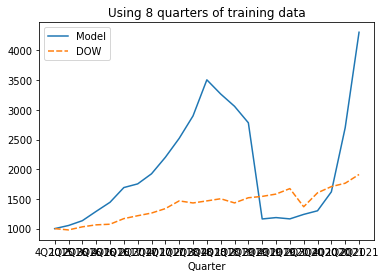

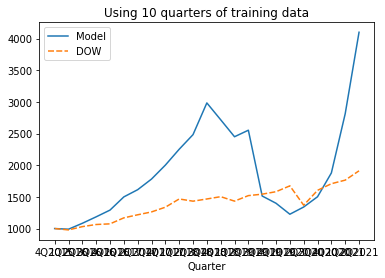

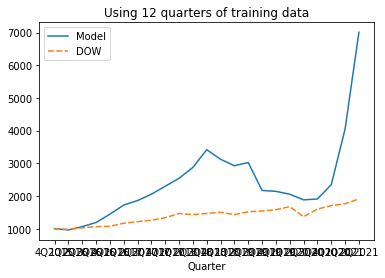

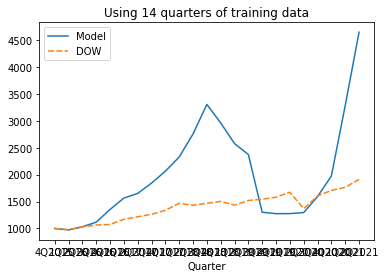

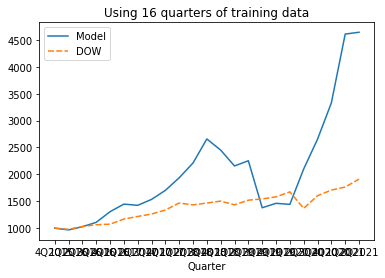

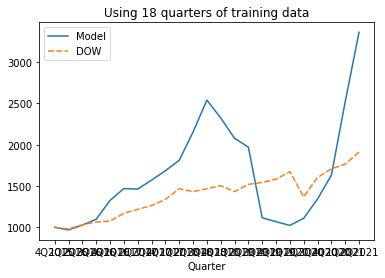

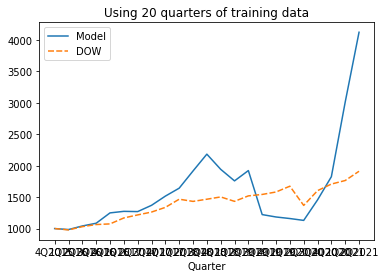

In [59]:
for num_quarters_for_training, portfolio in output.items():
    plot_vs_dow(portfolio)
    plt.title(f"Using {num_quarters_for_training} quarters of training data")
    plt.show()

### Num Quarters for Training: 12

# Num Stocks to Buy

In [65]:
output = {}

for num_stocks_to_buy in range(1,16):
    hp = Hyperparams(N_STOCKS_TO_BUY=num_stocks_to_buy, NUM_QUARTERS_FOR_TRAINING=12)

    portfolio = await compute_performance(df=df,
                              start_date=date(2016,1,1),
                              hyperparams=hp,
                              end_date=None)
    
    output[num_stocks_to_buy] = portfolio


Fitting data for: QuarterlyIndex  Q4 2015
Filtering data between 4Q2012 and 4Q2015
QuarterFilter removed 53289 rows. Output size: (7770, 73)
Train Size: (6216, 72), Test Size: (1554, 72)
[1]	valid_0's l1: 24.2271	valid_0's l2: 3059.43
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.0423	valid_0's l2: 3009.35
[3]	valid_0's l1: 23.9035	valid_0's l2: 3001.12
[4]	valid_0's l1: 23.8256	valid_0's l2: 2994.2
[5]	valid_0's l1: 23.6881	valid_0's l2: 2946.65
[6]	valid_0's l1: 23.5399	valid_0's l2: 2902.43
[7]	valid_0's l1: 23.472	valid_0's l2: 2876.23
[8]	valid_0's l1: 23.3738	valid_0's l2: 2817.73
[9]	valid_0's l1: 23.3473	valid_0's l2: 2773.85
[10]	valid_0's l1: 23.2663	valid_0's l2: 2740.56
[11]	valid_0's l1: 23.2109	valid_0's l2: 2743.38
[12]	valid_0's l1: 23.1112	valid_0's l2: 2704.2
[13]	valid_0's l1: 22.9987	valid_0's l2: 2663.47
[14]	valid_0's l1: 23.0189	valid_0's l2: 2651.37
[15]	valid_0's l1: 22.9545	valid_0's l2: 2610.4
[16]	valid_0's l1: 22.871	vali

[9]	valid_0's l1: 20.7468	valid_0's l2: 1849.53
[10]	valid_0's l1: 20.6287	valid_0's l2: 1821.17
[11]	valid_0's l1: 20.5517	valid_0's l2: 1799.8
[12]	valid_0's l1: 20.5352	valid_0's l2: 1780.13
[13]	valid_0's l1: 20.4593	valid_0's l2: 1757.04
[14]	valid_0's l1: 20.3837	valid_0's l2: 1735.58
[15]	valid_0's l1: 20.3651	valid_0's l2: 1718.75
[16]	valid_0's l1: 20.3385	valid_0's l2: 1698.09
[17]	valid_0's l1: 20.3467	valid_0's l2: 1680.63
[18]	valid_0's l1: 20.3236	valid_0's l2: 1664.76
[19]	valid_0's l1: 20.2791	valid_0's l2: 1647.57
[20]	valid_0's l1: 20.2709	valid_0's l2: 1630.15
[21]	valid_0's l1: 20.254	valid_0's l2: 1614.35
[22]	valid_0's l1: 20.2074	valid_0's l2: 1596.8
[23]	valid_0's l1: 20.1916	valid_0's l2: 1581.01
[24]	valid_0's l1: 20.2028	valid_0's l2: 1567.39
[25]	valid_0's l1: 20.1955	valid_0's l2: 1552.99
[26]	valid_0's l1: 20.1852	valid_0's l2: 1542.65
[27]	valid_0's l1: 20.1452	valid_0's l2: 1531.25
[28]	valid_0's l1: 20.1287	valid_0's l2: 1516.68
[29]	valid_0's l1: 20.07

[29]	valid_0's l1: 18.8147	valid_0's l2: 1355.83
[30]	valid_0's l1: 18.8013	valid_0's l2: 1352.97
[31]	valid_0's l1: 18.7765	valid_0's l2: 1350.62
[32]	valid_0's l1: 18.7712	valid_0's l2: 1348.92
[33]	valid_0's l1: 18.7407	valid_0's l2: 1346.72
[34]	valid_0's l1: 18.7213	valid_0's l2: 1346.48
[35]	valid_0's l1: 18.7043	valid_0's l2: 1346.48
[36]	valid_0's l1: 18.6564	valid_0's l2: 1340.63
[37]	valid_0's l1: 18.6341	valid_0's l2: 1338.48
[38]	valid_0's l1: 18.6315	valid_0's l2: 1338.98
[39]	valid_0's l1: 18.5807	valid_0's l2: 1333.97
[40]	valid_0's l1: 18.5445	valid_0's l2: 1331.46
[41]	valid_0's l1: 18.544	valid_0's l2: 1331.28
[42]	valid_0's l1: 18.5085	valid_0's l2: 1328.69
[43]	valid_0's l1: 18.4936	valid_0's l2: 1326.44
[44]	valid_0's l1: 18.4513	valid_0's l2: 1325.61
[45]	valid_0's l1: 18.4797	valid_0's l2: 1325.93
[46]	valid_0's l1: 18.5249	valid_0's l2: 1328.69
[47]	valid_0's l1: 18.4973	valid_0's l2: 1322.06
[48]	valid_0's l1: 18.4731	valid_0's l2: 1321.59
[49]	valid_0's l1: 18

QuarterFilter removed 53538 rows. Output size: (7521, 73)
Train Size: (6017, 72), Test Size: (1504, 72)
[1]	valid_0's l1: 22.526	valid_0's l2: 1052.16
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.2762	valid_0's l2: 1034.42
[3]	valid_0's l1: 22.0296	valid_0's l2: 1014.5
[4]	valid_0's l1: 21.8377	valid_0's l2: 997.549
[5]	valid_0's l1: 21.6597	valid_0's l2: 980.329
[6]	valid_0's l1: 21.4717	valid_0's l2: 965.845
[7]	valid_0's l1: 21.2863	valid_0's l2: 950.931
[8]	valid_0's l1: 21.1925	valid_0's l2: 941.097
[9]	valid_0's l1: 21.1048	valid_0's l2: 933.62
[10]	valid_0's l1: 21.0491	valid_0's l2: 929.166
[11]	valid_0's l1: 20.9171	valid_0's l2: 920.653
[12]	valid_0's l1: 20.8194	valid_0's l2: 914.758
[13]	valid_0's l1: 20.7041	valid_0's l2: 905.385
[14]	valid_0's l1: 20.6422	valid_0's l2: 898.346
[15]	valid_0's l1: 20.5732	valid_0's l2: 890.423
[16]	valid_0's l1: 20.4789	valid_0's l2: 883.232
[17]	valid_0's l1: 20.3808	valid_0's l2: 877.571
[18]	valid_0's 

Filtering data between 3Q2017 and 4Q2017
QuarterFilter removed 63590 rows. Output size: (615, 72)
Current portfolio: {QuarterlyIndex AMD Q4 2016: 445.42752181106067, QuarterlyIndex NVDA Q1 2017: 460.48899199721876, QuarterlyIndex ALGN Q2 2017: 956.3340873257655, QuarterlyIndex MED Q3 2017: 278.95894428152496}

Fitting data for: QuarterlyIndex  Q4 2017
Filtering data between 4Q2014 and 4Q2017
QuarterFilter removed 53627 rows. Output size: (7432, 73)
Train Size: (5946, 72), Test Size: (1486, 72)
[1]	valid_0's l1: 22.209	valid_0's l2: 1112.19
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.944	valid_0's l2: 1090.93
[3]	valid_0's l1: 21.6904	valid_0's l2: 1070.98
[4]	valid_0's l1: 21.5439	valid_0's l2: 1057.8
[5]	valid_0's l1: 21.4053	valid_0's l2: 1048.07
[6]	valid_0's l1: 21.2612	valid_0's l2: 1036.9
[7]	valid_0's l1: 21.1686	valid_0's l2: 1030.14
[8]	valid_0's l1: 21.0105	valid_0's l2: 1019.21
[9]	valid_0's l1: 20.94	valid_0's l2: 1011.77
[10]	valid_0's 

Train Size: (5877, 72), Test Size: (1469, 72)
[1]	valid_0's l1: 21.5309	valid_0's l2: 964.716
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.2103	valid_0's l2: 938.394
[3]	valid_0's l1: 20.9148	valid_0's l2: 916.413
[4]	valid_0's l1: 20.7302	valid_0's l2: 902.916
[5]	valid_0's l1: 20.6023	valid_0's l2: 895.697
[6]	valid_0's l1: 20.4578	valid_0's l2: 885.246
[7]	valid_0's l1: 20.3448	valid_0's l2: 874.364
[8]	valid_0's l1: 20.2311	valid_0's l2: 866.754
[9]	valid_0's l1: 20.1818	valid_0's l2: 862.892
[10]	valid_0's l1: 20.1208	valid_0's l2: 860.289
[11]	valid_0's l1: 20.0689	valid_0's l2: 854.81
[12]	valid_0's l1: 19.9839	valid_0's l2: 847.429
[13]	valid_0's l1: 19.9614	valid_0's l2: 842.705
[14]	valid_0's l1: 19.9262	valid_0's l2: 839.544
[15]	valid_0's l1: 19.8569	valid_0's l2: 834.027
[16]	valid_0's l1: 19.7818	valid_0's l2: 827.26
[17]	valid_0's l1: 19.7089	valid_0's l2: 820.319
[18]	valid_0's l1: 19.6365	valid_0's l2: 815.924
[19]	valid_0's l1: 19.5

[89]	valid_0's l1: 17.6795	valid_0's l2: 580.877
[90]	valid_0's l1: 17.6688	valid_0's l2: 580.029
[91]	valid_0's l1: 17.645	valid_0's l2: 578.267
[92]	valid_0's l1: 17.6314	valid_0's l2: 577.639
[93]	valid_0's l1: 17.6251	valid_0's l2: 577.568
[94]	valid_0's l1: 17.6257	valid_0's l2: 577.142
[95]	valid_0's l1: 17.6244	valid_0's l2: 577.233
[96]	valid_0's l1: 17.6076	valid_0's l2: 576.523
[97]	valid_0's l1: 17.6054	valid_0's l2: 576.104
[98]	valid_0's l1: 17.587	valid_0's l2: 575.422
[99]	valid_0's l1: 17.5583	valid_0's l2: 573.963
[100]	valid_0's l1: 17.5528	valid_0's l2: 574.053
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 17.5528	valid_0's l2: 574.053
Filtering data between 3Q2018 and 4Q2018
QuarterFilter removed 63605 rows. Output size: (600, 72)
Current portfolio: {QuarterlyIndex ABMD Q4 2017: 854.8537524905553, QuarterlyIndex MED Q1 2018: 1903.6113908548916, QuarterlyIndex AMD Q2 2018: 3167.4538847716294, QuarterlyIndex AMD Q3 2018: 1155.8779973174385}

Fitt

[58]	valid_0's l1: 20.2764	valid_0's l2: 817.622
[59]	valid_0's l1: 20.2706	valid_0's l2: 817.405
[60]	valid_0's l1: 20.2648	valid_0's l2: 817.811
[61]	valid_0's l1: 20.2391	valid_0's l2: 816.075
[62]	valid_0's l1: 20.2397	valid_0's l2: 815.884
[63]	valid_0's l1: 20.2298	valid_0's l2: 815.128
[64]	valid_0's l1: 20.1859	valid_0's l2: 812.829
[65]	valid_0's l1: 20.1744	valid_0's l2: 810.871
[66]	valid_0's l1: 20.154	valid_0's l2: 809.825
[67]	valid_0's l1: 20.1293	valid_0's l2: 807.618
[68]	valid_0's l1: 20.1261	valid_0's l2: 808.383
[69]	valid_0's l1: 20.1158	valid_0's l2: 807.693
[70]	valid_0's l1: 20.0696	valid_0's l2: 803.267
[71]	valid_0's l1: 20.0519	valid_0's l2: 802.879
[72]	valid_0's l1: 20.0289	valid_0's l2: 801.543
[73]	valid_0's l1: 20.0383	valid_0's l2: 802.528
[74]	valid_0's l1: 20.0059	valid_0's l2: 801.074
[75]	valid_0's l1: 19.9927	valid_0's l2: 799.879
[76]	valid_0's l1: 19.9729	valid_0's l2: 798.559
[77]	valid_0's l1: 19.9634	valid_0's l2: 797.687
[78]	valid_0's l1: 19

[1]	valid_0's l1: 26.7015	valid_0's l2: 2462.4
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 26.3179	valid_0's l2: 2412.19
[3]	valid_0's l1: 26.0515	valid_0's l2: 2374.56
[4]	valid_0's l1: 25.9201	valid_0's l2: 2347.98
[5]	valid_0's l1: 25.8517	valid_0's l2: 2326.87
[6]	valid_0's l1: 25.7552	valid_0's l2: 2313.8
[7]	valid_0's l1: 25.7322	valid_0's l2: 2310.52
[8]	valid_0's l1: 25.7338	valid_0's l2: 2327.62
[9]	valid_0's l1: 25.7172	valid_0's l2: 2317.62
[10]	valid_0's l1: 25.6301	valid_0's l2: 2306.35
[11]	valid_0's l1: 25.6652	valid_0's l2: 2301.22
[12]	valid_0's l1: 25.5884	valid_0's l2: 2294.28
[13]	valid_0's l1: 25.561	valid_0's l2: 2289
[14]	valid_0's l1: 25.4951	valid_0's l2: 2296.25
[15]	valid_0's l1: 25.4905	valid_0's l2: 2324.07
[16]	valid_0's l1: 25.4488	valid_0's l2: 2286.19
[17]	valid_0's l1: 25.4924	valid_0's l2: 2296.85
[18]	valid_0's l1: 25.3713	valid_0's l2: 2275.68
[19]	valid_0's l1: 25.4235	valid_0's l2: 2314.6
[20]	valid_0's l1: 25.333


Fitting data for: QuarterlyIndex  Q4 2015
Filtering data between 4Q2012 and 4Q2015
QuarterFilter removed 53289 rows. Output size: (7770, 73)
Train Size: (6216, 72), Test Size: (1554, 72)
[1]	valid_0's l1: 24.2271	valid_0's l2: 3059.43
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.0423	valid_0's l2: 3009.35
[3]	valid_0's l1: 23.9035	valid_0's l2: 3001.12
[4]	valid_0's l1: 23.8256	valid_0's l2: 2994.2
[5]	valid_0's l1: 23.6881	valid_0's l2: 2946.65
[6]	valid_0's l1: 23.5399	valid_0's l2: 2902.43
[7]	valid_0's l1: 23.472	valid_0's l2: 2876.23
[8]	valid_0's l1: 23.3738	valid_0's l2: 2817.73
[9]	valid_0's l1: 23.3473	valid_0's l2: 2773.85
[10]	valid_0's l1: 23.2663	valid_0's l2: 2740.56
[11]	valid_0's l1: 23.2109	valid_0's l2: 2743.38
[12]	valid_0's l1: 23.1112	valid_0's l2: 2704.2
[13]	valid_0's l1: 22.9987	valid_0's l2: 2663.47
[14]	valid_0's l1: 23.0189	valid_0's l2: 2651.37
[15]	valid_0's l1: 22.9545	valid_0's l2: 2610.4
[16]	valid_0's l1: 22.871	vali

[34]	valid_0's l1: 19.9649	valid_0's l2: 1438.61
[35]	valid_0's l1: 19.9549	valid_0's l2: 1427.87
[36]	valid_0's l1: 19.9158	valid_0's l2: 1415.43
[37]	valid_0's l1: 19.8664	valid_0's l2: 1403.14
[38]	valid_0's l1: 19.807	valid_0's l2: 1389.4
[39]	valid_0's l1: 19.7595	valid_0's l2: 1388.63
[40]	valid_0's l1: 19.7415	valid_0's l2: 1379.91
[41]	valid_0's l1: 19.716	valid_0's l2: 1367.89
[42]	valid_0's l1: 19.6891	valid_0's l2: 1356.83
[43]	valid_0's l1: 19.664	valid_0's l2: 1346.87
[44]	valid_0's l1: 19.6612	valid_0's l2: 1337.24
[45]	valid_0's l1: 19.6486	valid_0's l2: 1326.9
[46]	valid_0's l1: 19.641	valid_0's l2: 1318.85
[47]	valid_0's l1: 19.6217	valid_0's l2: 1317.94
[48]	valid_0's l1: 19.6071	valid_0's l2: 1317.39
[49]	valid_0's l1: 19.604	valid_0's l2: 1319.85
[50]	valid_0's l1: 19.5881	valid_0's l2: 1312.63
[51]	valid_0's l1: 19.5749	valid_0's l2: 1303.96
[52]	valid_0's l1: 19.5522	valid_0's l2: 1293.2
[53]	valid_0's l1: 19.5207	valid_0's l2: 1283.92
[54]	valid_0's l1: 19.4881	v

[46]	valid_0's l1: 18.5249	valid_0's l2: 1328.69
[47]	valid_0's l1: 18.4973	valid_0's l2: 1322.06
[48]	valid_0's l1: 18.4731	valid_0's l2: 1321.59
[49]	valid_0's l1: 18.4504	valid_0's l2: 1319.52
[50]	valid_0's l1: 18.4378	valid_0's l2: 1318.71
[51]	valid_0's l1: 18.4213	valid_0's l2: 1317.22
[52]	valid_0's l1: 18.4024	valid_0's l2: 1314.37
[53]	valid_0's l1: 18.3714	valid_0's l2: 1311.01
[54]	valid_0's l1: 18.3798	valid_0's l2: 1310.72
[55]	valid_0's l1: 18.3626	valid_0's l2: 1309.37
[56]	valid_0's l1: 18.2947	valid_0's l2: 1306.95
[57]	valid_0's l1: 18.3027	valid_0's l2: 1306.3
[58]	valid_0's l1: 18.3047	valid_0's l2: 1307.36
[59]	valid_0's l1: 18.3154	valid_0's l2: 1305.72
[60]	valid_0's l1: 18.3004	valid_0's l2: 1305.23
[61]	valid_0's l1: 18.2772	valid_0's l2: 1303.88
[62]	valid_0's l1: 18.2454	valid_0's l2: 1301.99
[63]	valid_0's l1: 18.2184	valid_0's l2: 1300.1
[64]	valid_0's l1: 18.2148	valid_0's l2: 1299.7
[65]	valid_0's l1: 18.1897	valid_0's l2: 1297.61
[66]	valid_0's l1: 18.1

[8]	valid_0's l1: 21.1925	valid_0's l2: 941.097
[9]	valid_0's l1: 21.1048	valid_0's l2: 933.62
[10]	valid_0's l1: 21.0491	valid_0's l2: 929.166
[11]	valid_0's l1: 20.9171	valid_0's l2: 920.653
[12]	valid_0's l1: 20.8194	valid_0's l2: 914.758
[13]	valid_0's l1: 20.7041	valid_0's l2: 905.385
[14]	valid_0's l1: 20.6422	valid_0's l2: 898.346
[15]	valid_0's l1: 20.5732	valid_0's l2: 890.423
[16]	valid_0's l1: 20.4789	valid_0's l2: 883.232
[17]	valid_0's l1: 20.3808	valid_0's l2: 877.571
[18]	valid_0's l1: 20.3053	valid_0's l2: 869.833
[19]	valid_0's l1: 20.2337	valid_0's l2: 864.2
[20]	valid_0's l1: 20.187	valid_0's l2: 856.976
[21]	valid_0's l1: 20.1244	valid_0's l2: 851.007
[22]	valid_0's l1: 20.0894	valid_0's l2: 849.635
[23]	valid_0's l1: 20.0313	valid_0's l2: 846.537
[24]	valid_0's l1: 19.9876	valid_0's l2: 842.43
[25]	valid_0's l1: 19.9433	valid_0's l2: 838.172
[26]	valid_0's l1: 19.8722	valid_0's l2: 833.658
[27]	valid_0's l1: 19.8221	valid_0's l2: 829.8
[28]	valid_0's l1: 19.789	val

[4]	valid_0's l1: 21.5439	valid_0's l2: 1057.8
[5]	valid_0's l1: 21.4053	valid_0's l2: 1048.07
[6]	valid_0's l1: 21.2612	valid_0's l2: 1036.9
[7]	valid_0's l1: 21.1686	valid_0's l2: 1030.14
[8]	valid_0's l1: 21.0105	valid_0's l2: 1019.21
[9]	valid_0's l1: 20.94	valid_0's l2: 1011.77
[10]	valid_0's l1: 20.8378	valid_0's l2: 1002.91
[11]	valid_0's l1: 20.784	valid_0's l2: 999.446
[12]	valid_0's l1: 20.7123	valid_0's l2: 995.004
[13]	valid_0's l1: 20.6721	valid_0's l2: 990.732
[14]	valid_0's l1: 20.6898	valid_0's l2: 990.556
[15]	valid_0's l1: 20.6591	valid_0's l2: 986.235
[16]	valid_0's l1: 20.5993	valid_0's l2: 981.09
[17]	valid_0's l1: 20.5623	valid_0's l2: 977.006
[18]	valid_0's l1: 20.5087	valid_0's l2: 971.868
[19]	valid_0's l1: 20.463	valid_0's l2: 969.638
[20]	valid_0's l1: 20.4351	valid_0's l2: 967.373
[21]	valid_0's l1: 20.4087	valid_0's l2: 964.064
[22]	valid_0's l1: 20.3465	valid_0's l2: 958.246
[23]	valid_0's l1: 20.3316	valid_0's l2: 956.919
[24]	valid_0's l1: 20.2895	valid_

[8]	valid_0's l1: 20.2311	valid_0's l2: 866.754
[9]	valid_0's l1: 20.1818	valid_0's l2: 862.892
[10]	valid_0's l1: 20.1208	valid_0's l2: 860.289
[11]	valid_0's l1: 20.0689	valid_0's l2: 854.81
[12]	valid_0's l1: 19.9839	valid_0's l2: 847.429
[13]	valid_0's l1: 19.9614	valid_0's l2: 842.705
[14]	valid_0's l1: 19.9262	valid_0's l2: 839.544
[15]	valid_0's l1: 19.8569	valid_0's l2: 834.027
[16]	valid_0's l1: 19.7818	valid_0's l2: 827.26
[17]	valid_0's l1: 19.7089	valid_0's l2: 820.319
[18]	valid_0's l1: 19.6365	valid_0's l2: 815.924
[19]	valid_0's l1: 19.5862	valid_0's l2: 811.146
[20]	valid_0's l1: 19.532	valid_0's l2: 807.68
[21]	valid_0's l1: 19.4278	valid_0's l2: 801.148
[22]	valid_0's l1: 19.4051	valid_0's l2: 799.925
[23]	valid_0's l1: 19.3627	valid_0's l2: 795.672
[24]	valid_0's l1: 19.3088	valid_0's l2: 792.094
[25]	valid_0's l1: 19.2173	valid_0's l2: 787.576
[26]	valid_0's l1: 19.1878	valid_0's l2: 785.024
[27]	valid_0's l1: 19.1876	valid_0's l2: 784.38
[28]	valid_0's l1: 19.1516	

[73]	valid_0's l1: 17.8954	valid_0's l2: 594.869
[74]	valid_0's l1: 17.8999	valid_0's l2: 595.475
[75]	valid_0's l1: 17.883	valid_0's l2: 594.865
[76]	valid_0's l1: 17.8663	valid_0's l2: 593.963
[77]	valid_0's l1: 17.8449	valid_0's l2: 591.721
[78]	valid_0's l1: 17.8281	valid_0's l2: 590.658
[79]	valid_0's l1: 17.8073	valid_0's l2: 589.665
[80]	valid_0's l1: 17.8039	valid_0's l2: 589.084
[81]	valid_0's l1: 17.7746	valid_0's l2: 587.571
[82]	valid_0's l1: 17.7559	valid_0's l2: 585.536
[83]	valid_0's l1: 17.7446	valid_0's l2: 585.109
[84]	valid_0's l1: 17.7165	valid_0's l2: 583.313
[85]	valid_0's l1: 17.7083	valid_0's l2: 582.281
[86]	valid_0's l1: 17.7003	valid_0's l2: 581.821
[87]	valid_0's l1: 17.6962	valid_0's l2: 581.783
[88]	valid_0's l1: 17.6835	valid_0's l2: 581.066
[89]	valid_0's l1: 17.6795	valid_0's l2: 580.877
[90]	valid_0's l1: 17.6688	valid_0's l2: 580.029
[91]	valid_0's l1: 17.645	valid_0's l2: 578.267
[92]	valid_0's l1: 17.6314	valid_0's l2: 577.639
[93]	valid_0's l1: 17.

[47]	valid_0's l1: 20.4658	valid_0's l2: 821.47
[48]	valid_0's l1: 20.4269	valid_0's l2: 820.768
[49]	valid_0's l1: 20.4288	valid_0's l2: 821.056
[50]	valid_0's l1: 20.4099	valid_0's l2: 821.778
[51]	valid_0's l1: 20.3767	valid_0's l2: 820.005
[52]	valid_0's l1: 20.3719	valid_0's l2: 820.953
[53]	valid_0's l1: 20.3476	valid_0's l2: 820.09
[54]	valid_0's l1: 20.3323	valid_0's l2: 819.952
[55]	valid_0's l1: 20.3014	valid_0's l2: 818.462
[56]	valid_0's l1: 20.3268	valid_0's l2: 819.818
[57]	valid_0's l1: 20.3263	valid_0's l2: 821.078
[58]	valid_0's l1: 20.2764	valid_0's l2: 817.622
[59]	valid_0's l1: 20.2706	valid_0's l2: 817.405
[60]	valid_0's l1: 20.2648	valid_0's l2: 817.811
[61]	valid_0's l1: 20.2391	valid_0's l2: 816.075
[62]	valid_0's l1: 20.2397	valid_0's l2: 815.884
[63]	valid_0's l1: 20.2298	valid_0's l2: 815.128
[64]	valid_0's l1: 20.1859	valid_0's l2: 812.829
[65]	valid_0's l1: 20.1744	valid_0's l2: 810.871
[66]	valid_0's l1: 20.154	valid_0's l2: 809.825
[67]	valid_0's l1: 20.1

Current portfolio: {QuarterlyIndex NBR Q1 2019: 0, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex ICE Q2 2019: 937.9390512213531, QuarterlyIndex ETN Q2 2019: 1518.3478495403797, QuarterlyIndex NE Q3 2019: 0.0, QuarterlyIndex RIG Q3 2019: 0.0, QuarterlyIndex MNK Q4 2019: 129.18519644972858, QuarterlyIndex LIFE Q4 2019: 129.18519644972858}
Failed to find data for QuarterlyIndex NBR Q1 2020
Failed to find data for QuarterlyIndex PCG Q1 2020

Fitting data for: QuarterlyIndex  Q1 2020
Filtering data between 1Q2017 and 1Q2020
QuarterFilter removed 54469 rows. Output size: (6590, 73)
Train Size: (5272, 72), Test Size: (1318, 72)
[1]	valid_0's l1: 27.6151	valid_0's l2: 3745.8
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.5204	valid_0's l2: 3701.46
[3]	valid_0's l1: 27.2785	valid_0's l2: 3645.95
[4]	valid_0's l1: 27.1367	valid_0's l2: 3605.83
[5]	valid_0's l1: 27.0061	valid_0's l2: 3596.81
[6]	valid_0's l1: 26.7798	valid_0's l2: 3521.04
[7]	valid_0's l1: 26.609


Fitting data for: QuarterlyIndex  Q1 2021
Filtering data between 1Q2018 and 1Q2021
QuarterFilter removed 55937 rows. Output size: (5122, 73)
Train Size: (4098, 72), Test Size: (1024, 72)
[1]	valid_0's l1: 31.1667	valid_0's l2: 3202.24
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 30.2969	valid_0's l2: 3056.15
[3]	valid_0's l1: 29.5629	valid_0's l2: 2949.33
[4]	valid_0's l1: 29.1108	valid_0's l2: 2868.7
[5]	valid_0's l1: 28.6825	valid_0's l2: 2816.9
[6]	valid_0's l1: 28.1701	valid_0's l2: 2753.49
[7]	valid_0's l1: 27.8909	valid_0's l2: 2715.22
[8]	valid_0's l1: 27.7221	valid_0's l2: 2667.25
[9]	valid_0's l1: 27.7787	valid_0's l2: 2687.1
[10]	valid_0's l1: 27.7569	valid_0's l2: 2662.65
[11]	valid_0's l1: 27.5225	valid_0's l2: 2620.83
[12]	valid_0's l1: 27.4547	valid_0's l2: 2611.26
[13]	valid_0's l1: 27.291	valid_0's l2: 2606.01
[14]	valid_0's l1: 26.9708	valid_0's l2: 2572.85
[15]	valid_0's l1: 26.9203	valid_0's l2: 2573.08
[16]	valid_0's l1: 26.7847	val

Current portfolio: {QuarterlyIndex PLD Q4 2015: 80.45907213990769, QuarterlyIndex FMCC Q4 2015: 53.45911949685534, QuarterlyIndex TSLA Q4 2015: 70.45266761095374, QuarterlyIndex HPQ Q1 2016: 83.33333333333333, QuarterlyIndex FMCC Q1 2016: 83.33333333333333, QuarterlyIndex AMD Q1 2016: 83.33333333333333}

Fitting data for: QuarterlyIndex  Q2 2016
Filtering data between 2Q2013 and 2Q2016
QuarterFilter removed 53358 rows. Output size: (7701, 73)
Train Size: (6161, 72), Test Size: (1540, 72)
[1]	valid_0's l1: 21.6378	valid_0's l2: 2082.29
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.4263	valid_0's l2: 2050.13
[3]	valid_0's l1: 21.2685	valid_0's l2: 2035.3
[4]	valid_0's l1: 21.1763	valid_0's l2: 1998.71
[5]	valid_0's l1: 21.0666	valid_0's l2: 1963.9
[6]	valid_0's l1: 20.9532	valid_0's l2: 1932.76
[7]	valid_0's l1: 20.8368	valid_0's l2: 1893.49
[8]	valid_0's l1: 20.7822	valid_0's l2: 1869.45
[9]	valid_0's l1: 20.7468	valid_0's l2: 1849.53
[10]	valid_0's l1

[77]	valid_0's l1: 17.7468	valid_0's l2: 692.364
[78]	valid_0's l1: 17.7442	valid_0's l2: 692.059
[79]	valid_0's l1: 17.7602	valid_0's l2: 692.659
[80]	valid_0's l1: 17.741	valid_0's l2: 690.997
[81]	valid_0's l1: 17.7336	valid_0's l2: 691.332
[82]	valid_0's l1: 17.7143	valid_0's l2: 691.04
[83]	valid_0's l1: 17.7204	valid_0's l2: 690.489
[84]	valid_0's l1: 17.7126	valid_0's l2: 690.679
[85]	valid_0's l1: 17.6761	valid_0's l2: 689.312
[86]	valid_0's l1: 17.6379	valid_0's l2: 686.844
[87]	valid_0's l1: 17.6174	valid_0's l2: 685.276
[88]	valid_0's l1: 17.6194	valid_0's l2: 685.152
[89]	valid_0's l1: 17.6176	valid_0's l2: 685.22
[90]	valid_0's l1: 17.6224	valid_0's l2: 684.484
[91]	valid_0's l1: 17.6263	valid_0's l2: 684.144
[92]	valid_0's l1: 17.631	valid_0's l2: 685.087
Early stopping, best iteration is:
[87]	valid_0's l1: 17.6174	valid_0's l2: 685.276
Filtering data between 3Q2016 and 4Q2016
QuarterFilter removed 63577 rows. Output size: (628, 72)
Current portfolio: {QuarterlyIndex PLD

[44]	valid_0's l1: 18.3309	valid_0's l2: 681.734
[45]	valid_0's l1: 18.2946	valid_0's l2: 678.815
[46]	valid_0's l1: 18.2604	valid_0's l2: 674.664
[47]	valid_0's l1: 18.2539	valid_0's l2: 674.928
[48]	valid_0's l1: 18.2463	valid_0's l2: 674.014
[49]	valid_0's l1: 18.2011	valid_0's l2: 671.311
[50]	valid_0's l1: 18.181	valid_0's l2: 670.145
[51]	valid_0's l1: 18.1643	valid_0's l2: 669.611
[52]	valid_0's l1: 18.1258	valid_0's l2: 667.365
[53]	valid_0's l1: 18.1227	valid_0's l2: 668.455
[54]	valid_0's l1: 18.0738	valid_0's l2: 665.511
[55]	valid_0's l1: 18.0582	valid_0's l2: 664.896
[56]	valid_0's l1: 18.0637	valid_0's l2: 664.722
[57]	valid_0's l1: 18.0388	valid_0's l2: 662.711
[58]	valid_0's l1: 18.0492	valid_0's l2: 662.832
[59]	valid_0's l1: 18.0438	valid_0's l2: 660.474
[60]	valid_0's l1: 18.0164	valid_0's l2: 658.552
[61]	valid_0's l1: 17.9796	valid_0's l2: 654.93
[62]	valid_0's l1: 17.9577	valid_0's l2: 653.755
[63]	valid_0's l1: 17.9438	valid_0's l2: 653.265
[64]	valid_0's l1: 17.

[17]	valid_0's l1: 20.5802	valid_0's l2: 864.833
[18]	valid_0's l1: 20.5285	valid_0's l2: 859.737
[19]	valid_0's l1: 20.4789	valid_0's l2: 854.104
[20]	valid_0's l1: 20.3865	valid_0's l2: 846.935
[21]	valid_0's l1: 20.3665	valid_0's l2: 845.461
[22]	valid_0's l1: 20.3466	valid_0's l2: 842.504
[23]	valid_0's l1: 20.3392	valid_0's l2: 843.748
[24]	valid_0's l1: 20.3067	valid_0's l2: 840.713
[25]	valid_0's l1: 20.2549	valid_0's l2: 835.391
[26]	valid_0's l1: 20.2068	valid_0's l2: 831.832
[27]	valid_0's l1: 20.1715	valid_0's l2: 825.761
[28]	valid_0's l1: 20.1707	valid_0's l2: 824.795
[29]	valid_0's l1: 20.1306	valid_0's l2: 822.45
[30]	valid_0's l1: 20.1199	valid_0's l2: 821.184
[31]	valid_0's l1: 20.0386	valid_0's l2: 817.009
[32]	valid_0's l1: 20.0239	valid_0's l2: 816.294
[33]	valid_0's l1: 20.0098	valid_0's l2: 814.798
[34]	valid_0's l1: 19.994	valid_0's l2: 813.231
[35]	valid_0's l1: 19.9437	valid_0's l2: 808.266
[36]	valid_0's l1: 19.9624	valid_0's l2: 809.729
[37]	valid_0's l1: 19.

[89]	valid_0's l1: 18.7733	valid_0's l2: 852.537
[90]	valid_0's l1: 18.7592	valid_0's l2: 852.966
[91]	valid_0's l1: 18.7438	valid_0's l2: 852.579
[92]	valid_0's l1: 18.7145	valid_0's l2: 851.861
[93]	valid_0's l1: 18.7035	valid_0's l2: 851.794
[94]	valid_0's l1: 18.6992	valid_0's l2: 852.643
[95]	valid_0's l1: 18.6774	valid_0's l2: 851.197
[96]	valid_0's l1: 18.6487	valid_0's l2: 850.11
[97]	valid_0's l1: 18.6411	valid_0's l2: 849.232
[98]	valid_0's l1: 18.6334	valid_0's l2: 848.709
[99]	valid_0's l1: 18.6141	valid_0's l2: 848.04
[100]	valid_0's l1: 18.605	valid_0's l2: 847.393
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.605	valid_0's l2: 847.393
Filtering data between 4Q2017 and 1Q2018
QuarterFilter removed 63593 rows. Output size: (612, 72)
Current portfolio: {QuarterlyIndex NVDA Q1 2017: 467.75757885582016, QuarterlyIndex ADI Q1 2017: 295.8648387056093, QuarterlyIndex AMD Q1 2017: 237.41764960294915, QuarterlyIndex ALGN Q2 2017: 328.94237567490495, Quarte

[83]	valid_0's l1: 18.0766	valid_0's l2: 693.029
[84]	valid_0's l1: 18.0735	valid_0's l2: 693.109
[85]	valid_0's l1: 18.0482	valid_0's l2: 690.592
[86]	valid_0's l1: 18.0466	valid_0's l2: 689.361
[87]	valid_0's l1: 18.0339	valid_0's l2: 688.763
[88]	valid_0's l1: 18.046	valid_0's l2: 689.265
[89]	valid_0's l1: 18.0386	valid_0's l2: 688.446
[90]	valid_0's l1: 18.0282	valid_0's l2: 687.986
[91]	valid_0's l1: 18.0121	valid_0's l2: 686.133
[92]	valid_0's l1: 18.0031	valid_0's l2: 685.372
[93]	valid_0's l1: 17.98	valid_0's l2: 684.464
[94]	valid_0's l1: 17.9559	valid_0's l2: 683.093
[95]	valid_0's l1: 17.9498	valid_0's l2: 682.88
[96]	valid_0's l1: 17.9573	valid_0's l2: 683.123
[97]	valid_0's l1: 17.9413	valid_0's l2: 681.769
[98]	valid_0's l1: 17.9346	valid_0's l2: 681.642
[99]	valid_0's l1: 17.9389	valid_0's l2: 681.685
[100]	valid_0's l1: 17.926	valid_0's l2: 680.51
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 17.926	valid_0's l2: 680.51
Filtering data between 2Q20

[41]	valid_0's l1: 19.6372	valid_0's l2: 862.405
[42]	valid_0's l1: 19.5787	valid_0's l2: 856.195
[43]	valid_0's l1: 19.5718	valid_0's l2: 854.706
[44]	valid_0's l1: 19.5601	valid_0's l2: 852.413
[45]	valid_0's l1: 19.5381	valid_0's l2: 850.609
[46]	valid_0's l1: 19.5024	valid_0's l2: 847.956
[47]	valid_0's l1: 19.4973	valid_0's l2: 848.631
[48]	valid_0's l1: 19.4794	valid_0's l2: 847.678
[49]	valid_0's l1: 19.4454	valid_0's l2: 845.049
[50]	valid_0's l1: 19.3924	valid_0's l2: 842.05
[51]	valid_0's l1: 19.3753	valid_0's l2: 840.366
[52]	valid_0's l1: 19.35	valid_0's l2: 837.852
[53]	valid_0's l1: 19.3304	valid_0's l2: 836.205
[54]	valid_0's l1: 19.2897	valid_0's l2: 833.896
[55]	valid_0's l1: 19.2699	valid_0's l2: 831.97
[56]	valid_0's l1: 19.2693	valid_0's l2: 831.408
[57]	valid_0's l1: 19.2598	valid_0's l2: 830.149
[58]	valid_0's l1: 19.2383	valid_0's l2: 829.202
[59]	valid_0's l1: 19.2204	valid_0's l2: 827.998
[60]	valid_0's l1: 19.2007	valid_0's l2: 825.971
[61]	valid_0's l1: 19.16

Current portfolio: {QuarterlyIndex AMD Q2 2018: 501.2006764600068, QuarterlyIndex MED Q2 2018: 272.0442678136093, QuarterlyIndex WYND Q2 2018: 148.47240329145086, QuarterlyIndex AMD Q3 2018: 432.7307613778705, QuarterlyIndex MED Q3 2018: 283.3132343228493, QuarterlyIndex CDNS Q3 2018: 546.43787862714, QuarterlyIndex AMD Q4 2018: 214.60276683650054, QuarterlyIndex X Q4 2018: 201.67621396442559, QuarterlyIndex WDC Q4 2018: 216.2412778691558, QuarterlyIndex NBR Q1 2019: 455.8601789166878, QuarterlyIndex PCG Q1 2019: 455.8601789166878, QuarterlyIndex LRCX Q1 2019: 455.8601789166878}
Failed to find data for QuarterlyIndex PCG Q2 2019

Fitting data for: QuarterlyIndex  Q2 2019
Filtering data between 2Q2016 and 2Q2019
QuarterFilter removed 53960 rows. Output size: (7099, 73)
Train Size: (5680, 72), Test Size: (1419, 72)
[1]	valid_0's l1: 23.2491	valid_0's l2: 1377.25
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.9897	valid_0's l2: 1363.04
[3]	valid_0's l1: 2

[20]	valid_0's l1: 25.3336	valid_0's l2: 2308.46
[21]	valid_0's l1: 25.2218	valid_0's l2: 2287.57
[22]	valid_0's l1: 25.0654	valid_0's l2: 2264.16
[23]	valid_0's l1: 25.0256	valid_0's l2: 2235.53
[24]	valid_0's l1: 25.0066	valid_0's l2: 2224.3
[25]	valid_0's l1: 24.9055	valid_0's l2: 2233.44
[26]	valid_0's l1: 24.8574	valid_0's l2: 2203.88
[27]	valid_0's l1: 24.7843	valid_0's l2: 2198.94
[28]	valid_0's l1: 24.7675	valid_0's l2: 2196.3
[29]	valid_0's l1: 24.7914	valid_0's l2: 2206.58
[30]	valid_0's l1: 24.756	valid_0's l2: 2196.39
[31]	valid_0's l1: 24.7424	valid_0's l2: 2181.98
[32]	valid_0's l1: 24.6943	valid_0's l2: 2169.99
[33]	valid_0's l1: 24.7199	valid_0's l2: 2170.05
[34]	valid_0's l1: 24.7272	valid_0's l2: 2175.66
[35]	valid_0's l1: 24.7213	valid_0's l2: 2173.66
[36]	valid_0's l1: 24.6257	valid_0's l2: 2154.13
[37]	valid_0's l1: 24.5637	valid_0's l2: 2150.76
[38]	valid_0's l1: 24.4758	valid_0's l2: 2129.72
[39]	valid_0's l1: 24.4246	valid_0's l2: 2123.36
[40]	valid_0's l1: 24.3

[20]	valid_0's l1: 26.7981	valid_0's l2: 2592.71
[21]	valid_0's l1: 26.7719	valid_0's l2: 2592.51
Early stopping, best iteration is:
[16]	valid_0's l1: 26.7847	valid_0's l2: 2550.73
Filtering data between 1Q2021 and 2Q2021
QuarterFilter removed 63621 rows. Output size: (584, 72)
Current portfolio: {QuarterlyIndex NBR Q2 2020: 1106.2307707883083, QuarterlyIndex RIG Q2 2020: 800.970136645222, QuarterlyIndex HP Q2 2020: 511.83508314073765, QuarterlyIndex RRD Q3 2020: 0.0, QuarterlyIndex IAC Q3 2020: 0.0, QuarterlyIndex DNB Q3 2020: 0.0, QuarterlyIndex NBR Q4 2020: 25.18675709646569, QuarterlyIndex RIG Q4 2020: 29.706381634565794, QuarterlyIndex HP Q4 2020: 17.96229327340347, QuarterlyIndex NBR Q1 2021: 78.63951034369909, QuarterlyIndex EW Q1 2021: 78.63951034369909, QuarterlyIndex RIG Q1 2021: 78.63951034369909}
Failed to find data for QuarterlyIndex RRD Q2 2021

Fitting data for: QuarterlyIndex  Q4 2015
Filtering data between 4Q2012 and 4Q2015
QuarterFilter removed 53289 rows. Output siz

QuarterFilter removed 53358 rows. Output size: (7701, 73)
Train Size: (6161, 72), Test Size: (1540, 72)
[1]	valid_0's l1: 21.6378	valid_0's l2: 2082.29
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.4263	valid_0's l2: 2050.13
[3]	valid_0's l1: 21.2685	valid_0's l2: 2035.3
[4]	valid_0's l1: 21.1763	valid_0's l2: 1998.71
[5]	valid_0's l1: 21.0666	valid_0's l2: 1963.9
[6]	valid_0's l1: 20.9532	valid_0's l2: 1932.76
[7]	valid_0's l1: 20.8368	valid_0's l2: 1893.49
[8]	valid_0's l1: 20.7822	valid_0's l2: 1869.45
[9]	valid_0's l1: 20.7468	valid_0's l2: 1849.53
[10]	valid_0's l1: 20.6287	valid_0's l2: 1821.17
[11]	valid_0's l1: 20.5517	valid_0's l2: 1799.8
[12]	valid_0's l1: 20.5352	valid_0's l2: 1780.13
[13]	valid_0's l1: 20.4593	valid_0's l2: 1757.04
[14]	valid_0's l1: 20.3837	valid_0's l2: 1735.58
[15]	valid_0's l1: 20.3651	valid_0's l2: 1718.75
[16]	valid_0's l1: 20.3385	valid_0's l2: 1698.09
[17]	valid_0's l1: 20.3467	valid_0's l2: 1680.63
[18]	valid_0's 

[92]	valid_0's l1: 17.631	valid_0's l2: 685.087
Early stopping, best iteration is:
[87]	valid_0's l1: 17.6174	valid_0's l2: 685.276
Filtering data between 3Q2016 and 4Q2016
QuarterFilter removed 63577 rows. Output size: (628, 72)
Current portfolio: {QuarterlyIndex PLD Q4 2015: 78.42482390089869, QuarterlyIndex FMCC Q4 2015: 49.52830188679244, QuarterlyIndex TSLA Q4 2015: 59.37665987960341, QuarterlyIndex MLM Q4 2015: 78.29756629852523, QuarterlyIndex HPQ Q1 2016: 66.44846217788862, QuarterlyIndex FMCC Q1 2016: 77.20588235294116, QuarterlyIndex AMD Q1 2016: 164.1597510373444, QuarterlyIndex ALGN Q1 2016: 84.63243160629679, QuarterlyIndex AMD Q2 2016: 97.44458128078819, QuarterlyIndex CLF Q2 2016: 99.1279069767442, QuarterlyIndex NAV Q2 2016: 71.9964664310954, QuarterlyIndex KR Q2 2016: 58.69331902334317, QuarterlyIndex CLF Q3 2016: 62.5, QuarterlyIndex NVDA Q3 2016: 62.5, QuarterlyIndex AMD Q3 2016: 62.5, QuarterlyIndex AMAT Q3 2016: 62.5}

Fitting data for: QuarterlyIndex  Q4 2016
Filt

[60]	valid_0's l1: 18.0164	valid_0's l2: 658.552
[61]	valid_0's l1: 17.9796	valid_0's l2: 654.93
[62]	valid_0's l1: 17.9577	valid_0's l2: 653.755
[63]	valid_0's l1: 17.9438	valid_0's l2: 653.265
[64]	valid_0's l1: 17.9324	valid_0's l2: 651.737
[65]	valid_0's l1: 17.9137	valid_0's l2: 651.101
[66]	valid_0's l1: 17.9231	valid_0's l2: 651.295
[67]	valid_0's l1: 17.887	valid_0's l2: 648.002
[68]	valid_0's l1: 17.8753	valid_0's l2: 647.483
[69]	valid_0's l1: 17.8497	valid_0's l2: 645.846
[70]	valid_0's l1: 17.8356	valid_0's l2: 644.434
[71]	valid_0's l1: 17.8307	valid_0's l2: 643.732
[72]	valid_0's l1: 17.8091	valid_0's l2: 642.717
[73]	valid_0's l1: 17.7816	valid_0's l2: 641.124
[74]	valid_0's l1: 17.7726	valid_0's l2: 641.058
[75]	valid_0's l1: 17.7337	valid_0's l2: 638.812
[76]	valid_0's l1: 17.722	valid_0's l2: 638.522
[77]	valid_0's l1: 17.7239	valid_0's l2: 638.96
[78]	valid_0's l1: 17.665	valid_0's l2: 636.137
[79]	valid_0's l1: 17.6591	valid_0's l2: 635.731
[80]	valid_0's l1: 17.622

[51]	valid_0's l1: 19.6199	valid_0's l2: 786.441
[52]	valid_0's l1: 19.5666	valid_0's l2: 783.896
[53]	valid_0's l1: 19.5758	valid_0's l2: 783.76
[54]	valid_0's l1: 19.5512	valid_0's l2: 781.659
[55]	valid_0's l1: 19.5358	valid_0's l2: 780.156
[56]	valid_0's l1: 19.5118	valid_0's l2: 778.919
[57]	valid_0's l1: 19.4873	valid_0's l2: 776.624
[58]	valid_0's l1: 19.4777	valid_0's l2: 775.905
[59]	valid_0's l1: 19.454	valid_0's l2: 774.647
[60]	valid_0's l1: 19.4416	valid_0's l2: 773.612
[61]	valid_0's l1: 19.4127	valid_0's l2: 771.378
[62]	valid_0's l1: 19.4071	valid_0's l2: 771.848
[63]	valid_0's l1: 19.4049	valid_0's l2: 770.953
[64]	valid_0's l1: 19.3674	valid_0's l2: 769.252
[65]	valid_0's l1: 19.3471	valid_0's l2: 767.896
[66]	valid_0's l1: 19.3326	valid_0's l2: 766.857
[67]	valid_0's l1: 19.3185	valid_0's l2: 767.357
[68]	valid_0's l1: 19.2996	valid_0's l2: 765.974
[69]	valid_0's l1: 19.2887	valid_0's l2: 765.641
[70]	valid_0's l1: 19.2805	valid_0's l2: 765.071
[71]	valid_0's l1: 19.

[1]	valid_0's l1: 22.0327	valid_0's l2: 976.842
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.7794	valid_0's l2: 953.493
[3]	valid_0's l1: 21.6319	valid_0's l2: 939.917
[4]	valid_0's l1: 21.4912	valid_0's l2: 929.389
[5]	valid_0's l1: 21.343	valid_0's l2: 917.07
[6]	valid_0's l1: 21.237	valid_0's l2: 906.79
[7]	valid_0's l1: 21.1107	valid_0's l2: 897.064
[8]	valid_0's l1: 21.0343	valid_0's l2: 889.334
[9]	valid_0's l1: 20.9433	valid_0's l2: 882.663
[10]	valid_0's l1: 20.8669	valid_0's l2: 876.629
[11]	valid_0's l1: 20.8368	valid_0's l2: 872.866
[12]	valid_0's l1: 20.7881	valid_0's l2: 868.667
[13]	valid_0's l1: 20.7644	valid_0's l2: 868.225
[14]	valid_0's l1: 20.6877	valid_0's l2: 863.174
[15]	valid_0's l1: 20.669	valid_0's l2: 859.713
[16]	valid_0's l1: 20.6396	valid_0's l2: 857.627
[17]	valid_0's l1: 20.5905	valid_0's l2: 855.034
[18]	valid_0's l1: 20.5262	valid_0's l2: 851.65
[19]	valid_0's l1: 20.4566	valid_0's l2: 846.107
[20]	valid_0's l1: 20.40

Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63600 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex MED Q3 2017: 343.93270846380943, QuarterlyIndex NVDA Q3 2017: 214.74567279774158, QuarterlyIndex ALGN Q3 2017: 227.91939120944312, QuarterlyIndex ABMD Q3 2017: 297.7318799956925, QuarterlyIndex ABMD Q4 2017: 196.90967880275176, QuarterlyIndex MED Q4 2017: 201.3522647380452, QuarterlyIndex TER Q4 2017: 94.05239129050854, QuarterlyIndex NVDA Q4 2017: 128.11544102695672, QuarterlyIndex MED Q1 2018: 406.4662852898152, QuarterlyIndex ABMD Q1 2018: 346.4328462782718, QuarterlyIndex LRCX Q1 2018: 234.1527645551315, QuarterlyIndex NVDA Q1 2018: 254.38302889866446, QuarterlyIndex AMD Q2 2018: 223.09151044677697, QuarterlyIndex MED Q2 2018: 223.09151044677697, QuarterlyIndex WYND Q2 2018: 223.09151044677697, QuarterlyIndex ALGN Q2 2018: 223.09151044677697}

Fitting data for: QuarterlyIndex  Q3 2018
Filtering data between 3Q2015 and 3Q2018
QuarterFilter removed 5376

[65]	valid_0's l1: 19.0921	valid_0's l2: 817.882
[66]	valid_0's l1: 19.0839	valid_0's l2: 817.568
[67]	valid_0's l1: 19.0773	valid_0's l2: 816.101
[68]	valid_0's l1: 19.0728	valid_0's l2: 814.84
[69]	valid_0's l1: 19.0651	valid_0's l2: 814.128
[70]	valid_0's l1: 19.0605	valid_0's l2: 813.681
[71]	valid_0's l1: 19.0503	valid_0's l2: 813.345
[72]	valid_0's l1: 19.0231	valid_0's l2: 811.734
[73]	valid_0's l1: 19.0299	valid_0's l2: 811.41
[74]	valid_0's l1: 19.0201	valid_0's l2: 809.893
[75]	valid_0's l1: 18.9947	valid_0's l2: 808.003
[76]	valid_0's l1: 18.9801	valid_0's l2: 806.533
[77]	valid_0's l1: 18.9637	valid_0's l2: 805.386
[78]	valid_0's l1: 18.94	valid_0's l2: 804.655
[79]	valid_0's l1: 18.9398	valid_0's l2: 805.287
[80]	valid_0's l1: 18.9335	valid_0's l2: 804.804
[81]	valid_0's l1: 18.9045	valid_0's l2: 802.385
[82]	valid_0's l1: 18.9039	valid_0's l2: 801.299
[83]	valid_0's l1: 18.9011	valid_0's l2: 800.819
[84]	valid_0's l1: 18.872	valid_0's l2: 798.788
[85]	valid_0's l1: 18.863

[2]	valid_0's l1: 22.9897	valid_0's l2: 1363.04
[3]	valid_0's l1: 22.71	valid_0's l2: 1344.51
[4]	valid_0's l1: 22.4208	valid_0's l2: 1321.14
[5]	valid_0's l1: 22.2845	valid_0's l2: 1315.87
[6]	valid_0's l1: 22.0798	valid_0's l2: 1303.76
[7]	valid_0's l1: 21.9478	valid_0's l2: 1299.94
[8]	valid_0's l1: 21.8402	valid_0's l2: 1294.22
[9]	valid_0's l1: 21.6913	valid_0's l2: 1272.24
[10]	valid_0's l1: 21.5436	valid_0's l2: 1265.29
[11]	valid_0's l1: 21.4428	valid_0's l2: 1249.58
[12]	valid_0's l1: 21.3397	valid_0's l2: 1246.65
[13]	valid_0's l1: 21.2235	valid_0's l2: 1228.74
[14]	valid_0's l1: 21.2026	valid_0's l2: 1230.36
[15]	valid_0's l1: 21.1844	valid_0's l2: 1221.48
[16]	valid_0's l1: 21.1124	valid_0's l2: 1221.43
[17]	valid_0's l1: 21.0556	valid_0's l2: 1208.92
[18]	valid_0's l1: 21.0283	valid_0's l2: 1210.37
[19]	valid_0's l1: 20.956	valid_0's l2: 1200.05
[20]	valid_0's l1: 20.9494	valid_0's l2: 1197.9
[21]	valid_0's l1: 20.9055	valid_0's l2: 1198.45
[22]	valid_0's l1: 20.847	valid_

[1]	valid_0's l1: 26.7015	valid_0's l2: 2462.4
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 26.3179	valid_0's l2: 2412.19
[3]	valid_0's l1: 26.0515	valid_0's l2: 2374.56
[4]	valid_0's l1: 25.9201	valid_0's l2: 2347.98
[5]	valid_0's l1: 25.8517	valid_0's l2: 2326.87
[6]	valid_0's l1: 25.7552	valid_0's l2: 2313.8
[7]	valid_0's l1: 25.7322	valid_0's l2: 2310.52
[8]	valid_0's l1: 25.7338	valid_0's l2: 2327.62
[9]	valid_0's l1: 25.7172	valid_0's l2: 2317.62
[10]	valid_0's l1: 25.6301	valid_0's l2: 2306.35
[11]	valid_0's l1: 25.6652	valid_0's l2: 2301.22
[12]	valid_0's l1: 25.5884	valid_0's l2: 2294.28
[13]	valid_0's l1: 25.561	valid_0's l2: 2289
[14]	valid_0's l1: 25.4951	valid_0's l2: 2296.25
[15]	valid_0's l1: 25.4905	valid_0's l2: 2324.07
[16]	valid_0's l1: 25.4488	valid_0's l2: 2286.19
[17]	valid_0's l1: 25.4924	valid_0's l2: 2296.85
[18]	valid_0's l1: 25.3713	valid_0's l2: 2275.68
[19]	valid_0's l1: 25.4235	valid_0's l2: 2314.6
[20]	valid_0's l1: 25.333

[1]	valid_0's l1: 31.1667	valid_0's l2: 3202.24
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 30.2969	valid_0's l2: 3056.15
[3]	valid_0's l1: 29.5629	valid_0's l2: 2949.33
[4]	valid_0's l1: 29.1108	valid_0's l2: 2868.7
[5]	valid_0's l1: 28.6825	valid_0's l2: 2816.9
[6]	valid_0's l1: 28.1701	valid_0's l2: 2753.49
[7]	valid_0's l1: 27.8909	valid_0's l2: 2715.22
[8]	valid_0's l1: 27.7221	valid_0's l2: 2667.25
[9]	valid_0's l1: 27.7787	valid_0's l2: 2687.1
[10]	valid_0's l1: 27.7569	valid_0's l2: 2662.65
[11]	valid_0's l1: 27.5225	valid_0's l2: 2620.83
[12]	valid_0's l1: 27.4547	valid_0's l2: 2611.26
[13]	valid_0's l1: 27.291	valid_0's l2: 2606.01
[14]	valid_0's l1: 26.9708	valid_0's l2: 2572.85
[15]	valid_0's l1: 26.9203	valid_0's l2: 2573.08
[16]	valid_0's l1: 26.7847	valid_0's l2: 2550.73
[17]	valid_0's l1: 27.0127	valid_0's l2: 2639.3
[18]	valid_0's l1: 26.8563	valid_0's l2: 2602.83
[19]	valid_0's l1: 26.8815	valid_0's l2: 2608.54
[20]	valid_0's l1: 26.7

Filtering data between 1Q2016 and 2Q2016
QuarterFilter removed 63566 rows. Output size: (639, 72)
Current portfolio: {QuarterlyIndex PLD Q4 2015: 48.27544328394462, QuarterlyIndex FMCC Q4 2015: 32.075471698113205, QuarterlyIndex TSLA Q4 2015: 42.271600566572246, QuarterlyIndex MLM Q4 2015: 44.3919052972687, QuarterlyIndex PSA Q4 2015: 53.95223752151463, QuarterlyIndex HPQ Q1 2016: 50.0, QuarterlyIndex FMCC Q1 2016: 50.0, QuarterlyIndex AMD Q1 2016: 50.0, QuarterlyIndex ALGN Q1 2016: 50.0, QuarterlyIndex CLF Q1 2016: 50.0}

Fitting data for: QuarterlyIndex  Q2 2016
Filtering data between 2Q2013 and 2Q2016
QuarterFilter removed 53358 rows. Output size: (7701, 73)
Train Size: (6161, 72), Test Size: (1540, 72)
[1]	valid_0's l1: 21.6378	valid_0's l2: 2082.29
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.4263	valid_0's l2: 2050.13
[3]	valid_0's l1: 21.2685	valid_0's l2: 2035.3
[4]	valid_0's l1: 21.1763	valid_0's l2: 1998.71
[5]	valid_0's l1: 21.0666	valid_0

[73]	valid_0's l1: 17.8036	valid_0's l2: 694.689
[74]	valid_0's l1: 17.7739	valid_0's l2: 692.396
[75]	valid_0's l1: 17.7549	valid_0's l2: 691.501
[76]	valid_0's l1: 17.77	valid_0's l2: 693.14
[77]	valid_0's l1: 17.7468	valid_0's l2: 692.364
[78]	valid_0's l1: 17.7442	valid_0's l2: 692.059
[79]	valid_0's l1: 17.7602	valid_0's l2: 692.659
[80]	valid_0's l1: 17.741	valid_0's l2: 690.997
[81]	valid_0's l1: 17.7336	valid_0's l2: 691.332
[82]	valid_0's l1: 17.7143	valid_0's l2: 691.04
[83]	valid_0's l1: 17.7204	valid_0's l2: 690.489
[84]	valid_0's l1: 17.7126	valid_0's l2: 690.679
[85]	valid_0's l1: 17.6761	valid_0's l2: 689.312
[86]	valid_0's l1: 17.6379	valid_0's l2: 686.844
[87]	valid_0's l1: 17.6174	valid_0's l2: 685.276
[88]	valid_0's l1: 17.6194	valid_0's l2: 685.152
[89]	valid_0's l1: 17.6176	valid_0's l2: 685.22
[90]	valid_0's l1: 17.6224	valid_0's l2: 684.484
[91]	valid_0's l1: 17.6263	valid_0's l2: 684.144
[92]	valid_0's l1: 17.631	valid_0's l2: 685.087
Early stopping, best iterat

[22]	valid_0's l1: 18.8279	valid_0's l2: 730.113
[23]	valid_0's l1: 18.738	valid_0's l2: 721.643
[24]	valid_0's l1: 18.674	valid_0's l2: 717.24
[25]	valid_0's l1: 18.6506	valid_0's l2: 715.235
[26]	valid_0's l1: 18.6367	valid_0's l2: 714.224
[27]	valid_0's l1: 18.5919	valid_0's l2: 711.498
[28]	valid_0's l1: 18.5825	valid_0's l2: 710.267
[29]	valid_0's l1: 18.5557	valid_0's l2: 705.587
[30]	valid_0's l1: 18.525	valid_0's l2: 702.914
[31]	valid_0's l1: 18.5094	valid_0's l2: 697.544
[32]	valid_0's l1: 18.5048	valid_0's l2: 695.83
[33]	valid_0's l1: 18.5117	valid_0's l2: 695.079
[34]	valid_0's l1: 18.5181	valid_0's l2: 694.2
[35]	valid_0's l1: 18.5049	valid_0's l2: 691.236
[36]	valid_0's l1: 18.4641	valid_0's l2: 688.441
[37]	valid_0's l1: 18.4621	valid_0's l2: 688.925
[38]	valid_0's l1: 18.4368	valid_0's l2: 687.933
[39]	valid_0's l1: 18.4093	valid_0's l2: 687.342
[40]	valid_0's l1: 18.374	valid_0's l2: 684.63
[41]	valid_0's l1: 18.3594	valid_0's l2: 684.891
[42]	valid_0's l1: 18.327	val

Filtering data between 2Q2017 and 3Q2017
QuarterFilter removed 63586 rows. Output size: (619, 72)
Current portfolio: {QuarterlyIndex CLF Q3 2016: 53.59237536656891, QuarterlyIndex NVDA Q3 2016: 117.88130045821516, QuarterlyIndex AMD Q3 2016: 97.0774091627172, QuarterlyIndex AMAT Q3 2016: 81.26881720430107, QuarterlyIndex SWKS Q3 2016: 76.17785630153122, QuarterlyIndex AMD Q4 2016: 77.06605428590616, QuarterlyIndex RF Q4 2016: 66.60034564811113, QuarterlyIndex KEY Q4 2016: 68.7488876389872, QuarterlyIndex CFG Q4 2016: 68.4038141932235, QuarterlyIndex EW Q4 2016: 61.40933227868551, QuarterlyIndex NVDA Q1 2017: 167.52100194004626, QuarterlyIndex ADI Q1 2017: 164.68947132256372, QuarterlyIndex AMD Q1 2017: 142.37398096343355, QuarterlyIndex KLAC Q1 2017: 166.01808018881937, QuarterlyIndex MCHP Q1 2017: 167.5181073727476, QuarterlyIndex ALGN Q2 2017: 93.47837667704376, QuarterlyIndex AMD Q2 2017: 93.47837667704376, QuarterlyIndex TER Q2 2017: 93.47837667704376, QuarterlyIndex ABMD Q2 2017: 

[41]	valid_0's l1: 19.6371	valid_0's l2: 911.291
[42]	valid_0's l1: 19.59	valid_0's l2: 908.013
[43]	valid_0's l1: 19.5938	valid_0's l2: 909.1
[44]	valid_0's l1: 19.5503	valid_0's l2: 908.314
[45]	valid_0's l1: 19.54	valid_0's l2: 907.267
[46]	valid_0's l1: 19.5198	valid_0's l2: 904.532
[47]	valid_0's l1: 19.4963	valid_0's l2: 903.54
[48]	valid_0's l1: 19.475	valid_0's l2: 901.681
[49]	valid_0's l1: 19.4696	valid_0's l2: 900.793
[50]	valid_0's l1: 19.4297	valid_0's l2: 896.462
[51]	valid_0's l1: 19.4126	valid_0's l2: 896.409
[52]	valid_0's l1: 19.3897	valid_0's l2: 895.419
[53]	valid_0's l1: 19.3425	valid_0's l2: 892.34
[54]	valid_0's l1: 19.3147	valid_0's l2: 890.941
[55]	valid_0's l1: 19.3095	valid_0's l2: 890.354
[56]	valid_0's l1: 19.2867	valid_0's l2: 889.193
[57]	valid_0's l1: 19.2614	valid_0's l2: 889.069
[58]	valid_0's l1: 19.2587	valid_0's l2: 888.52
[59]	valid_0's l1: 19.2532	valid_0's l2: 887.696
[60]	valid_0's l1: 19.2429	valid_0's l2: 886.503
[61]	valid_0's l1: 19.2097	val

Train Size: (5877, 72), Test Size: (1469, 72)
[1]	valid_0's l1: 21.5309	valid_0's l2: 964.716
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.2103	valid_0's l2: 938.394
[3]	valid_0's l1: 20.9148	valid_0's l2: 916.413
[4]	valid_0's l1: 20.7302	valid_0's l2: 902.916
[5]	valid_0's l1: 20.6023	valid_0's l2: 895.697
[6]	valid_0's l1: 20.4578	valid_0's l2: 885.246
[7]	valid_0's l1: 20.3448	valid_0's l2: 874.364
[8]	valid_0's l1: 20.2311	valid_0's l2: 866.754
[9]	valid_0's l1: 20.1818	valid_0's l2: 862.892
[10]	valid_0's l1: 20.1208	valid_0's l2: 860.289
[11]	valid_0's l1: 20.0689	valid_0's l2: 854.81
[12]	valid_0's l1: 19.9839	valid_0's l2: 847.429
[13]	valid_0's l1: 19.9614	valid_0's l2: 842.705
[14]	valid_0's l1: 19.9262	valid_0's l2: 839.544
[15]	valid_0's l1: 19.8569	valid_0's l2: 834.027
[16]	valid_0's l1: 19.7818	valid_0's l2: 827.26
[17]	valid_0's l1: 19.7089	valid_0's l2: 820.319
[18]	valid_0's l1: 19.6365	valid_0's l2: 815.924
[19]	valid_0's l1: 19.5

[57]	valid_0's l1: 18.1834	valid_0's l2: 610.617
[58]	valid_0's l1: 18.1462	valid_0's l2: 607.937
[59]	valid_0's l1: 18.1441	valid_0's l2: 607.721
[60]	valid_0's l1: 18.094	valid_0's l2: 604.962
[61]	valid_0's l1: 18.0837	valid_0's l2: 604.319
[62]	valid_0's l1: 18.0979	valid_0's l2: 604.444
[63]	valid_0's l1: 18.0953	valid_0's l2: 603.929
[64]	valid_0's l1: 18.0436	valid_0's l2: 601.608
[65]	valid_0's l1: 18.0459	valid_0's l2: 602.136
[66]	valid_0's l1: 18.0375	valid_0's l2: 602.206
[67]	valid_0's l1: 18.0023	valid_0's l2: 601.319
[68]	valid_0's l1: 17.9898	valid_0's l2: 600.493
[69]	valid_0's l1: 17.976	valid_0's l2: 599.49
[70]	valid_0's l1: 17.9469	valid_0's l2: 597.749
[71]	valid_0's l1: 17.9351	valid_0's l2: 596.762
[72]	valid_0's l1: 17.9156	valid_0's l2: 595.549
[73]	valid_0's l1: 17.8954	valid_0's l2: 594.869
[74]	valid_0's l1: 17.8999	valid_0's l2: 595.475
[75]	valid_0's l1: 17.883	valid_0's l2: 594.865
[76]	valid_0's l1: 17.8663	valid_0's l2: 593.963
[77]	valid_0's l1: 17.84

QuarterFilter removed 53890 rows. Output size: (7169, 73)
Train Size: (5736, 72), Test Size: (1433, 72)
[1]	valid_0's l1: 23.5516	valid_0's l2: 1006.23
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.1932	valid_0's l2: 980.135
[3]	valid_0's l1: 22.9045	valid_0's l2: 960.288
[4]	valid_0's l1: 22.6986	valid_0's l2: 944.525
[5]	valid_0's l1: 22.5155	valid_0's l2: 931.832
[6]	valid_0's l1: 22.3198	valid_0's l2: 917.543
[7]	valid_0's l1: 22.2133	valid_0's l2: 910.203
[8]	valid_0's l1: 22.0734	valid_0's l2: 899.783
[9]	valid_0's l1: 21.934	valid_0's l2: 892.637
[10]	valid_0's l1: 21.9165	valid_0's l2: 892.613
[11]	valid_0's l1: 21.861	valid_0's l2: 889.5
[12]	valid_0's l1: 21.7999	valid_0's l2: 889.059
[13]	valid_0's l1: 21.6826	valid_0's l2: 881.839
[14]	valid_0's l1: 21.6293	valid_0's l2: 876.019
[15]	valid_0's l1: 21.5037	valid_0's l2: 868.675
[16]	valid_0's l1: 21.4699	valid_0's l2: 864.576
[17]	valid_0's l1: 21.4344	valid_0's l2: 864.086
[18]	valid_0's l


Fitting data for: QuarterlyIndex  Q3 2019
Filtering data between 3Q2016 and 3Q2019
QuarterFilter removed 54074 rows. Output size: (6985, 73)
Train Size: (5588, 72), Test Size: (1397, 72)
[1]	valid_0's l1: 25.2731	valid_0's l2: 1894.36
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 25.087	valid_0's l2: 1858.87
[3]	valid_0's l1: 24.9853	valid_0's l2: 1847.18
[4]	valid_0's l1: 24.8049	valid_0's l2: 1808.61
[5]	valid_0's l1: 24.6277	valid_0's l2: 1789.4
[6]	valid_0's l1: 24.4924	valid_0's l2: 1755.31
[7]	valid_0's l1: 24.3964	valid_0's l2: 1786.21
[8]	valid_0's l1: 24.2416	valid_0's l2: 1774.2
[9]	valid_0's l1: 24.2379	valid_0's l2: 1774.9
[10]	valid_0's l1: 24.1801	valid_0's l2: 1749.59
[11]	valid_0's l1: 24.1623	valid_0's l2: 1766.89
[12]	valid_0's l1: 24.0746	valid_0's l2: 1762.56
[13]	valid_0's l1: 24.0647	valid_0's l2: 1760.59
[14]	valid_0's l1: 24.0197	valid_0's l2: 1769
[15]	valid_0's l1: 23.9979	valid_0's l2: 1794.73
Early stopping, best iteration is

[47]	valid_0's l1: 24.3895	valid_0's l2: 2104.21
[48]	valid_0's l1: 24.3541	valid_0's l2: 2085.51
[49]	valid_0's l1: 24.3125	valid_0's l2: 2067.18
[50]	valid_0's l1: 24.3043	valid_0's l2: 2077.33
Early stopping, best iteration is:
[45]	valid_0's l1: 24.2762	valid_0's l2: 2080.91
Filtering data between 2Q2020 and 3Q2020
QuarterFilter removed 63638 rows. Output size: (567, 72)
Current portfolio: {QuarterlyIndex NE Q3 2019: 0, QuarterlyIndex RIG Q3 2019: 17.706277523879567, QuarterlyIndex WINMQ Q3 2019: 33.51024066510066, QuarterlyIndex DNR Q3 2019: 0, QuarterlyIndex MNK Q3 2019: 34.69833047462685, QuarterlyIndex MNK Q4 2019: 47.69477110104508, QuarterlyIndex LIFE Q4 2019: 45.96821445384823, QuarterlyIndex WINMQ Q4 2019: 34.73423837995545, QuarterlyIndex FTR Q4 2019: 0, QuarterlyIndex GME Q4 2019: 43.74532179922045, QuarterlyIndex NE Q1 2020: 0, QuarterlyIndex RIG Q1 2020: 111.33030935604383, QuarterlyIndex MNK Q1 2020: 228.99908791132404, QuarterlyIndex AKRX Q1 2020: 0, QuarterlyIndex WI

Failed to find data for QuarterlyIndex RRD Q2 2021

Fitting data for: QuarterlyIndex  Q4 2015
Filtering data between 4Q2012 and 4Q2015
QuarterFilter removed 53289 rows. Output size: (7770, 73)
Train Size: (6216, 72), Test Size: (1554, 72)
[1]	valid_0's l1: 24.2271	valid_0's l2: 3059.43
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.0423	valid_0's l2: 3009.35
[3]	valid_0's l1: 23.9035	valid_0's l2: 3001.12
[4]	valid_0's l1: 23.8256	valid_0's l2: 2994.2
[5]	valid_0's l1: 23.6881	valid_0's l2: 2946.65
[6]	valid_0's l1: 23.5399	valid_0's l2: 2902.43
[7]	valid_0's l1: 23.472	valid_0's l2: 2876.23
[8]	valid_0's l1: 23.3738	valid_0's l2: 2817.73
[9]	valid_0's l1: 23.3473	valid_0's l2: 2773.85
[10]	valid_0's l1: 23.2663	valid_0's l2: 2740.56
[11]	valid_0's l1: 23.2109	valid_0's l2: 2743.38
[12]	valid_0's l1: 23.1112	valid_0's l2: 2704.2
[13]	valid_0's l1: 22.9987	valid_0's l2: 2663.47
[14]	valid_0's l1: 23.0189	valid_0's l2: 2651.37
[15]	valid_0's l1: 22.9545	

[22]	valid_0's l1: 20.2074	valid_0's l2: 1596.8
[23]	valid_0's l1: 20.1916	valid_0's l2: 1581.01
[24]	valid_0's l1: 20.2028	valid_0's l2: 1567.39
[25]	valid_0's l1: 20.1955	valid_0's l2: 1552.99
[26]	valid_0's l1: 20.1852	valid_0's l2: 1542.65
[27]	valid_0's l1: 20.1452	valid_0's l2: 1531.25
[28]	valid_0's l1: 20.1287	valid_0's l2: 1516.68
[29]	valid_0's l1: 20.0748	valid_0's l2: 1501.36
[30]	valid_0's l1: 20.0536	valid_0's l2: 1488.96
[31]	valid_0's l1: 20.0467	valid_0's l2: 1476.7
[32]	valid_0's l1: 19.9825	valid_0's l2: 1460.96
[33]	valid_0's l1: 19.9795	valid_0's l2: 1450.33
[34]	valid_0's l1: 19.9649	valid_0's l2: 1438.61
[35]	valid_0's l1: 19.9549	valid_0's l2: 1427.87
[36]	valid_0's l1: 19.9158	valid_0's l2: 1415.43
[37]	valid_0's l1: 19.8664	valid_0's l2: 1403.14
[38]	valid_0's l1: 19.807	valid_0's l2: 1389.4
[39]	valid_0's l1: 19.7595	valid_0's l2: 1388.63
[40]	valid_0's l1: 19.7415	valid_0's l2: 1379.91
[41]	valid_0's l1: 19.716	valid_0's l2: 1367.89
[42]	valid_0's l1: 19.689

[1]	valid_0's l1: 21.1975	valid_0's l2: 1622.99
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.9036	valid_0's l2: 1595.85
[3]	valid_0's l1: 20.6911	valid_0's l2: 1566.52
[4]	valid_0's l1: 20.5145	valid_0's l2: 1551.11
[5]	valid_0's l1: 20.3683	valid_0's l2: 1535.12
[6]	valid_0's l1: 20.2114	valid_0's l2: 1512.87
[7]	valid_0's l1: 20.1154	valid_0's l2: 1499.01
[8]	valid_0's l1: 20.0061	valid_0's l2: 1479.64
[9]	valid_0's l1: 19.8836	valid_0's l2: 1470.4
[10]	valid_0's l1: 19.7918	valid_0's l2: 1459.79
[11]	valid_0's l1: 19.7585	valid_0's l2: 1455.72
[12]	valid_0's l1: 19.706	valid_0's l2: 1449.17
[13]	valid_0's l1: 19.6128	valid_0's l2: 1442.24
[14]	valid_0's l1: 19.4918	valid_0's l2: 1427.08
[15]	valid_0's l1: 19.4092	valid_0's l2: 1420.85
[16]	valid_0's l1: 19.3797	valid_0's l2: 1414.61
[17]	valid_0's l1: 19.3403	valid_0's l2: 1408.97
[18]	valid_0's l1: 19.3079	valid_0's l2: 1399.46
[19]	valid_0's l1: 19.2632	valid_0's l2: 1395.09
[20]	valid_0's l1: 1

[53]	valid_0's l1: 18.1227	valid_0's l2: 668.455
[54]	valid_0's l1: 18.0738	valid_0's l2: 665.511
[55]	valid_0's l1: 18.0582	valid_0's l2: 664.896
[56]	valid_0's l1: 18.0637	valid_0's l2: 664.722
[57]	valid_0's l1: 18.0388	valid_0's l2: 662.711
[58]	valid_0's l1: 18.0492	valid_0's l2: 662.832
[59]	valid_0's l1: 18.0438	valid_0's l2: 660.474
[60]	valid_0's l1: 18.0164	valid_0's l2: 658.552
[61]	valid_0's l1: 17.9796	valid_0's l2: 654.93
[62]	valid_0's l1: 17.9577	valid_0's l2: 653.755
[63]	valid_0's l1: 17.9438	valid_0's l2: 653.265
[64]	valid_0's l1: 17.9324	valid_0's l2: 651.737
[65]	valid_0's l1: 17.9137	valid_0's l2: 651.101
[66]	valid_0's l1: 17.9231	valid_0's l2: 651.295
[67]	valid_0's l1: 17.887	valid_0's l2: 648.002
[68]	valid_0's l1: 17.8753	valid_0's l2: 647.483
[69]	valid_0's l1: 17.8497	valid_0's l2: 645.846
[70]	valid_0's l1: 17.8356	valid_0's l2: 644.434
[71]	valid_0's l1: 17.8307	valid_0's l2: 643.732
[72]	valid_0's l1: 17.8091	valid_0's l2: 642.717
[73]	valid_0's l1: 17.

[1]	valid_0's l1: 22.4076	valid_0's l2: 1013.09
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.1291	valid_0's l2: 989.933
[3]	valid_0's l1: 21.8915	valid_0's l2: 968.674
[4]	valid_0's l1: 21.6761	valid_0's l2: 951.537
[5]	valid_0's l1: 21.521	valid_0's l2: 939.532
[6]	valid_0's l1: 21.374	valid_0's l2: 927.838
[7]	valid_0's l1: 21.2528	valid_0's l2: 918.223
[8]	valid_0's l1: 21.1376	valid_0's l2: 907.59
[9]	valid_0's l1: 21.0499	valid_0's l2: 904.685
[10]	valid_0's l1: 20.9704	valid_0's l2: 899.34
[11]	valid_0's l1: 20.8957	valid_0's l2: 893.472
[12]	valid_0's l1: 20.8432	valid_0's l2: 886.975
[13]	valid_0's l1: 20.8025	valid_0's l2: 882.26
[14]	valid_0's l1: 20.7429	valid_0's l2: 878.406
[15]	valid_0's l1: 20.6907	valid_0's l2: 875.398
[16]	valid_0's l1: 20.6204	valid_0's l2: 870.491
[17]	valid_0's l1: 20.5802	valid_0's l2: 864.833
[18]	valid_0's l1: 20.5285	valid_0's l2: 859.737
[19]	valid_0's l1: 20.4789	valid_0's l2: 854.104
[20]	valid_0's l1: 20.3

[61]	valid_0's l1: 19.2097	valid_0's l2: 884.611
[62]	valid_0's l1: 19.1795	valid_0's l2: 883.89
[63]	valid_0's l1: 19.1742	valid_0's l2: 883.524
[64]	valid_0's l1: 19.1697	valid_0's l2: 883.003
[65]	valid_0's l1: 19.1435	valid_0's l2: 881.211
[66]	valid_0's l1: 19.1127	valid_0's l2: 879.826
[67]	valid_0's l1: 19.1122	valid_0's l2: 878.874
[68]	valid_0's l1: 19.1132	valid_0's l2: 878.413
[69]	valid_0's l1: 19.0967	valid_0's l2: 878.246
[70]	valid_0's l1: 19.0719	valid_0's l2: 876.086
[71]	valid_0's l1: 19.0307	valid_0's l2: 872.298
[72]	valid_0's l1: 19.0177	valid_0's l2: 870.953
[73]	valid_0's l1: 18.9894	valid_0's l2: 868.993
[74]	valid_0's l1: 18.9683	valid_0's l2: 867.252
[75]	valid_0's l1: 18.9528	valid_0's l2: 865.656
[76]	valid_0's l1: 18.9462	valid_0's l2: 865.112
[77]	valid_0's l1: 18.9265	valid_0's l2: 864.012
[78]	valid_0's l1: 18.9171	valid_0's l2: 863.709
[79]	valid_0's l1: 18.8982	valid_0's l2: 861.942
[80]	valid_0's l1: 18.8867	valid_0's l2: 861.253
[81]	valid_0's l1: 18

[18]	valid_0's l1: 19.6365	valid_0's l2: 815.924
[19]	valid_0's l1: 19.5862	valid_0's l2: 811.146
[20]	valid_0's l1: 19.532	valid_0's l2: 807.68
[21]	valid_0's l1: 19.4278	valid_0's l2: 801.148
[22]	valid_0's l1: 19.4051	valid_0's l2: 799.925
[23]	valid_0's l1: 19.3627	valid_0's l2: 795.672
[24]	valid_0's l1: 19.3088	valid_0's l2: 792.094
[25]	valid_0's l1: 19.2173	valid_0's l2: 787.576
[26]	valid_0's l1: 19.1878	valid_0's l2: 785.024
[27]	valid_0's l1: 19.1876	valid_0's l2: 784.38
[28]	valid_0's l1: 19.1516	valid_0's l2: 780.695
[29]	valid_0's l1: 19.097	valid_0's l2: 776.243
[30]	valid_0's l1: 19.064	valid_0's l2: 774.66
[31]	valid_0's l1: 19.0294	valid_0's l2: 772.095
[32]	valid_0's l1: 19.0139	valid_0's l2: 772.034
[33]	valid_0's l1: 18.9763	valid_0's l2: 768.019
[34]	valid_0's l1: 18.959	valid_0's l2: 764.517
[35]	valid_0's l1: 18.9653	valid_0's l2: 764.092
[36]	valid_0's l1: 18.9492	valid_0's l2: 760.303
[37]	valid_0's l1: 18.9179	valid_0's l2: 757.347
[38]	valid_0's l1: 18.8777	

[57]	valid_0's l1: 18.1834	valid_0's l2: 610.617
[58]	valid_0's l1: 18.1462	valid_0's l2: 607.937
[59]	valid_0's l1: 18.1441	valid_0's l2: 607.721
[60]	valid_0's l1: 18.094	valid_0's l2: 604.962
[61]	valid_0's l1: 18.0837	valid_0's l2: 604.319
[62]	valid_0's l1: 18.0979	valid_0's l2: 604.444
[63]	valid_0's l1: 18.0953	valid_0's l2: 603.929
[64]	valid_0's l1: 18.0436	valid_0's l2: 601.608
[65]	valid_0's l1: 18.0459	valid_0's l2: 602.136
[66]	valid_0's l1: 18.0375	valid_0's l2: 602.206
[67]	valid_0's l1: 18.0023	valid_0's l2: 601.319
[68]	valid_0's l1: 17.9898	valid_0's l2: 600.493
[69]	valid_0's l1: 17.976	valid_0's l2: 599.49
[70]	valid_0's l1: 17.9469	valid_0's l2: 597.749
[71]	valid_0's l1: 17.9351	valid_0's l2: 596.762
[72]	valid_0's l1: 17.9156	valid_0's l2: 595.549
[73]	valid_0's l1: 17.8954	valid_0's l2: 594.869
[74]	valid_0's l1: 17.8999	valid_0's l2: 595.475
[75]	valid_0's l1: 17.883	valid_0's l2: 594.865
[76]	valid_0's l1: 17.8663	valid_0's l2: 593.963
[77]	valid_0's l1: 17.84

Filtering data between 4Q2018 and 1Q2019
QuarterFilter removed 63617 rows. Output size: (588, 72)
Current portfolio: {QuarterlyIndex MED Q1 2018: 348.6624538272272, QuarterlyIndex ABMD Q1 2018: 241.44961541600895, QuarterlyIndex LRCX Q1 2018: 119.73546030178734, QuarterlyIndex NVDA Q1 2018: 185.6799797782956, QuarterlyIndex AMD Q1 2018: 328.5265865663831, QuarterlyIndex PFIE Q1 2018: 161.32963936101237, QuarterlyIndex AMD Q2 2018: 220.09155426458068, QuarterlyIndex MED Q2 2018: 150.82506789216558, QuarterlyIndex WYND Q2 2018: 57.623257004528064, QuarterlyIndex ALGN Q2 2018: 117.20468056739219, QuarterlyIndex OFLX Q2 2018: 104.47646318635407, QuarterlyIndex PNR Q2 2018: 84.00524665351693, QuarterlyIndex AMD Q3 2018: 164.01929138682547, QuarterlyIndex MED Q3 2018: 135.57707052634206, QuarterlyIndex CDNS Q3 2018: 159.56298919593394, QuarterlyIndex IAC Q3 2018: 171.0863194230726, QuarterlyIndex WINMQ Q3 2018: 136.2658455675587, QuarterlyIndex WYND Q3 2018: 148.27920726746942, QuarterlyInde

Failed to find data for QuarterlyIndex ALGN Q3 2019
Failed to find data for QuarterlyIndex TER Q3 2019
Failed to find data for QuarterlyIndex NBR Q3 2019
Failed to find data for QuarterlyIndex PCG Q3 2019
Failed to find data for QuarterlyIndex NVDA Q3 2019
Failed to find data for QuarterlyIndex AMD Q3 2019

Fitting data for: QuarterlyIndex  Q3 2019
Filtering data between 3Q2016 and 3Q2019
QuarterFilter removed 54074 rows. Output size: (6985, 73)
Train Size: (5588, 72), Test Size: (1397, 72)
[1]	valid_0's l1: 25.2731	valid_0's l2: 1894.36
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 25.087	valid_0's l2: 1858.87
[3]	valid_0's l1: 24.9853	valid_0's l2: 1847.18
[4]	valid_0's l1: 24.8049	valid_0's l2: 1808.61
[5]	valid_0's l1: 24.6277	valid_0's l2: 1789.4
[6]	valid_0's l1: 24.4924	valid_0's l2: 1755.31
[7]	valid_0's l1: 24.3964	valid_0's l2: 1786.21
[8]	valid_0's l1: 24.2416	valid_0's l2: 1774.2
[9]	valid_0's l1: 24.2379	valid_0's l2: 1774.9
[10]	valid_0's l

[41]	valid_0's l1: 24.3151	valid_0's l2: 2103.37
[42]	valid_0's l1: 24.3204	valid_0's l2: 2095.89
[43]	valid_0's l1: 24.2796	valid_0's l2: 2084.88
[44]	valid_0's l1: 24.2993	valid_0's l2: 2104.6
[45]	valid_0's l1: 24.2762	valid_0's l2: 2080.91
[46]	valid_0's l1: 24.3552	valid_0's l2: 2094.05
[47]	valid_0's l1: 24.3895	valid_0's l2: 2104.21
[48]	valid_0's l1: 24.3541	valid_0's l2: 2085.51
[49]	valid_0's l1: 24.3125	valid_0's l2: 2067.18
[50]	valid_0's l1: 24.3043	valid_0's l2: 2077.33
Early stopping, best iteration is:
[45]	valid_0's l1: 24.2762	valid_0's l2: 2080.91
Filtering data between 2Q2020 and 3Q2020
QuarterFilter removed 63638 rows. Output size: (567, 72)
Current portfolio: {QuarterlyIndex NE Q3 2019: 0, QuarterlyIndex RIG Q3 2019: 18.630736304226854, QuarterlyIndex WINMQ Q3 2019: 35.259836884442834, QuarterlyIndex DNR Q3 2019: 0, QuarterlyIndex MNK Q3 2019: 36.50995780439166, QuarterlyIndex AKRX Q3 2019: 0, QuarterlyIndex MNK Q4 2019: 31.740000954019795, QuarterlyIndex LIFE Q4 

QuarterFilter removed 55937 rows. Output size: (5122, 73)
Train Size: (4098, 72), Test Size: (1024, 72)
[1]	valid_0's l1: 31.1667	valid_0's l2: 3202.24
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 30.2969	valid_0's l2: 3056.15
[3]	valid_0's l1: 29.5629	valid_0's l2: 2949.33
[4]	valid_0's l1: 29.1108	valid_0's l2: 2868.7
[5]	valid_0's l1: 28.6825	valid_0's l2: 2816.9
[6]	valid_0's l1: 28.1701	valid_0's l2: 2753.49
[7]	valid_0's l1: 27.8909	valid_0's l2: 2715.22
[8]	valid_0's l1: 27.7221	valid_0's l2: 2667.25
[9]	valid_0's l1: 27.7787	valid_0's l2: 2687.1
[10]	valid_0's l1: 27.7569	valid_0's l2: 2662.65
[11]	valid_0's l1: 27.5225	valid_0's l2: 2620.83
[12]	valid_0's l1: 27.4547	valid_0's l2: 2611.26
[13]	valid_0's l1: 27.291	valid_0's l2: 2606.01
[14]	valid_0's l1: 26.9708	valid_0's l2: 2572.85
[15]	valid_0's l1: 26.9203	valid_0's l2: 2573.08
[16]	valid_0's l1: 26.7847	valid_0's l2: 2550.73
[17]	valid_0's l1: 27.0127	valid_0's l2: 2639.3
[18]	valid_0's l1

[5]	valid_0's l1: 20.0642	valid_0's l2: 864.42
[6]	valid_0's l1: 20.034	valid_0's l2: 856.879
[7]	valid_0's l1: 19.9223	valid_0's l2: 842.606
[8]	valid_0's l1: 19.8785	valid_0's l2: 844.125
[9]	valid_0's l1: 19.838	valid_0's l2: 835.728
[10]	valid_0's l1: 19.7981	valid_0's l2: 831.611
[11]	valid_0's l1: 19.823	valid_0's l2: 833.424
[12]	valid_0's l1: 19.759	valid_0's l2: 828.961
[13]	valid_0's l1: 19.7579	valid_0's l2: 827.213
[14]	valid_0's l1: 19.7554	valid_0's l2: 827.519
[15]	valid_0's l1: 19.6659	valid_0's l2: 822.16
[16]	valid_0's l1: 19.6463	valid_0's l2: 820.511
[17]	valid_0's l1: 19.6281	valid_0's l2: 821.134
[18]	valid_0's l1: 19.5825	valid_0's l2: 817.665
[19]	valid_0's l1: 19.6396	valid_0's l2: 820.909
[20]	valid_0's l1: 19.6446	valid_0's l2: 823.041
[21]	valid_0's l1: 19.6054	valid_0's l2: 821.952
[22]	valid_0's l1: 19.5352	valid_0's l2: 813.483
[23]	valid_0's l1: 19.5336	valid_0's l2: 815.52
[24]	valid_0's l1: 19.5101	valid_0's l2: 813.61
[25]	valid_0's l1: 19.494	valid_0

[46]	valid_0's l1: 18.1589	valid_0's l2: 714.22
[47]	valid_0's l1: 18.1267	valid_0's l2: 712.938
[48]	valid_0's l1: 18.1046	valid_0's l2: 711.387
[49]	valid_0's l1: 18.0496	valid_0's l2: 706.339
[50]	valid_0's l1: 18.0429	valid_0's l2: 705.489
[51]	valid_0's l1: 18.0324	valid_0's l2: 705.51
[52]	valid_0's l1: 18.0377	valid_0's l2: 705.992
[53]	valid_0's l1: 18.0528	valid_0's l2: 706.777
[54]	valid_0's l1: 18.0428	valid_0's l2: 706.353
[55]	valid_0's l1: 18.0169	valid_0's l2: 704.868
[56]	valid_0's l1: 18.0129	valid_0's l2: 704.431
[57]	valid_0's l1: 17.9659	valid_0's l2: 701.37
[58]	valid_0's l1: 17.9796	valid_0's l2: 701.235
[59]	valid_0's l1: 17.971	valid_0's l2: 700.046
[60]	valid_0's l1: 17.9577	valid_0's l2: 698.635
[61]	valid_0's l1: 17.9418	valid_0's l2: 698.709
[62]	valid_0's l1: 17.9499	valid_0's l2: 699.22
[63]	valid_0's l1: 17.9447	valid_0's l2: 700.415
[64]	valid_0's l1: 17.9173	valid_0's l2: 698.849
[65]	valid_0's l1: 17.9265	valid_0's l2: 698.375
[66]	valid_0's l1: 17.916

[86]	valid_0's l1: 17.9385	valid_0's l2: 1280.94
[87]	valid_0's l1: 17.9559	valid_0's l2: 1281.96
[88]	valid_0's l1: 17.9507	valid_0's l2: 1281.26
[89]	valid_0's l1: 17.958	valid_0's l2: 1280.84
[90]	valid_0's l1: 17.9775	valid_0's l2: 1279.13
[91]	valid_0's l1: 17.9638	valid_0's l2: 1278.74
Early stopping, best iteration is:
[86]	valid_0's l1: 17.9385	valid_0's l2: 1280.94
Filtering data between 4Q2016 and 1Q2017
QuarterFilter removed 63581 rows. Output size: (624, 72)
Current portfolio: {QuarterlyIndex HPQ Q1 2016: 43.67058544115901, QuarterlyIndex FMCC Q1 2016: 83.50840336134453, QuarterlyIndex AMD Q1 2016: 138.11499703615885, QuarterlyIndex ALGN Q1 2016: 50.59387349621188, QuarterlyIndex CLF Q1 2016: 113.91129032258068, QuarterlyIndex ABMD Q1 2016: 49.96757628336576, QuarterlyIndex X Q1 2016: 85.23357574263528, QuarterlyIndex AMD Q2 2016: 81.98451794510909, QuarterlyIndex CLF Q2 2016: 65.69767441860466, QuarterlyIndex NAV Q2 2016: 56.190055527511355, QuarterlyIndex KR Q2 2016: 29.6

Train Size: (6017, 72), Test Size: (1504, 72)
[1]	valid_0's l1: 22.526	valid_0's l2: 1052.16
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.2762	valid_0's l2: 1034.42
[3]	valid_0's l1: 22.0296	valid_0's l2: 1014.5
[4]	valid_0's l1: 21.8377	valid_0's l2: 997.549
[5]	valid_0's l1: 21.6597	valid_0's l2: 980.329
[6]	valid_0's l1: 21.4717	valid_0's l2: 965.845
[7]	valid_0's l1: 21.2863	valid_0's l2: 950.931
[8]	valid_0's l1: 21.1925	valid_0's l2: 941.097
[9]	valid_0's l1: 21.1048	valid_0's l2: 933.62
[10]	valid_0's l1: 21.0491	valid_0's l2: 929.166
[11]	valid_0's l1: 20.9171	valid_0's l2: 920.653
[12]	valid_0's l1: 20.8194	valid_0's l2: 914.758
[13]	valid_0's l1: 20.7041	valid_0's l2: 905.385
[14]	valid_0's l1: 20.6422	valid_0's l2: 898.346
[15]	valid_0's l1: 20.5732	valid_0's l2: 890.423
[16]	valid_0's l1: 20.4789	valid_0's l2: 883.232
[17]	valid_0's l1: 20.3808	valid_0's l2: 877.571
[18]	valid_0's l1: 20.3053	valid_0's l2: 869.833
[19]	valid_0's l1: 20.23

Filtering data between 3Q2017 and 4Q2017
QuarterFilter removed 63590 rows. Output size: (615, 72)
Current portfolio: {QuarterlyIndex AMD Q4 2016: 59.64497188076972, QuarterlyIndex RF Q4 2016: 46.79798937784052, QuarterlyIndex KEY Q4 2016: 47.21493282425735, QuarterlyIndex CFG Q4 2016: 46.281857521414445, QuarterlyIndex EW Q4 2016: 45.593594908984606, QuarterlyIndex MTW Q4 2016: 59.606563679598814, QuarterlyIndex CMA Q4 2016: 48.57761778793858, QuarterlyIndex NVDA Q1 2017: 141.42312657523038, QuarterlyIndex ADI Q1 2017: 114.73931177596377, QuarterlyIndex AMD Q1 2017: 106.7420273882103, QuarterlyIndex KLAC Q1 2017: 107.56024892743498, QuarterlyIndex MCHP Q1 2017: 118.43290066433194, QuarterlyIndex AMAT Q1 2017: 135.56256511421395, QuarterlyIndex CDNS Q1 2017: 122.05698856979059, QuarterlyIndex ALGN Q2 2017: 91.1286363938219, QuarterlyIndex AMD Q2 2017: 80.67926054142434, QuarterlyIndex TER Q2 2017: 72.87212672618247, QuarterlyIndex ABMD Q2 2017: 84.56795536715104, QuarterlyIndex AMAT Q2 

[2]	valid_0's l1: 21.7794	valid_0's l2: 953.493
[3]	valid_0's l1: 21.6319	valid_0's l2: 939.917
[4]	valid_0's l1: 21.4912	valid_0's l2: 929.389
[5]	valid_0's l1: 21.343	valid_0's l2: 917.07
[6]	valid_0's l1: 21.237	valid_0's l2: 906.79
[7]	valid_0's l1: 21.1107	valid_0's l2: 897.064
[8]	valid_0's l1: 21.0343	valid_0's l2: 889.334
[9]	valid_0's l1: 20.9433	valid_0's l2: 882.663
[10]	valid_0's l1: 20.8669	valid_0's l2: 876.629
[11]	valid_0's l1: 20.8368	valid_0's l2: 872.866
[12]	valid_0's l1: 20.7881	valid_0's l2: 868.667
[13]	valid_0's l1: 20.7644	valid_0's l2: 868.225
[14]	valid_0's l1: 20.6877	valid_0's l2: 863.174
[15]	valid_0's l1: 20.669	valid_0's l2: 859.713
[16]	valid_0's l1: 20.6396	valid_0's l2: 857.627
[17]	valid_0's l1: 20.5905	valid_0's l2: 855.034
[18]	valid_0's l1: 20.5262	valid_0's l2: 851.65
[19]	valid_0's l1: 20.4566	valid_0's l2: 846.107
[20]	valid_0's l1: 20.4079	valid_0's l2: 841.219
[21]	valid_0's l1: 20.3892	valid_0's l2: 840.103
[22]	valid_0's l1: 20.3303	valid_0

[94]	valid_0's l1: 17.9559	valid_0's l2: 683.093
[95]	valid_0's l1: 17.9498	valid_0's l2: 682.88
[96]	valid_0's l1: 17.9573	valid_0's l2: 683.123
[97]	valid_0's l1: 17.9413	valid_0's l2: 681.769
[98]	valid_0's l1: 17.9346	valid_0's l2: 681.642
[99]	valid_0's l1: 17.9389	valid_0's l2: 681.685
[100]	valid_0's l1: 17.926	valid_0's l2: 680.51
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 17.926	valid_0's l2: 680.51
Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63600 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex MED Q3 2017: 169.01742197823188, QuarterlyIndex NVDA Q3 2017: 105.53157377607909, QuarterlyIndex ALGN Q3 2017: 112.00547948210546, QuarterlyIndex ABMD Q3 2017: 146.31314079538734, QuarterlyIndex PNC Q3 2017: 70.92059324021537, QuarterlyIndex FB Q3 2017: 68.62244238513479, QuarterlyIndex TWTR Q3 2017: 127.58493695817454, QuarterlyIndex ABMD Q4 2017: 101.9475470170507, QuarterlyIndex MED Q4 2017: 104.24764085331816, QuarterlyInd

[14]	valid_0's l1: 20.9196	valid_0's l2: 977.863
[15]	valid_0's l1: 20.8325	valid_0's l2: 969.022
[16]	valid_0's l1: 20.7594	valid_0's l2: 963.663
[17]	valid_0's l1: 20.65	valid_0's l2: 951.667
[18]	valid_0's l1: 20.5817	valid_0's l2: 945.944
[19]	valid_0's l1: 20.4894	valid_0's l2: 941.442
[20]	valid_0's l1: 20.4021	valid_0's l2: 932.449
[21]	valid_0's l1: 20.3602	valid_0's l2: 929.335
[22]	valid_0's l1: 20.3217	valid_0's l2: 925.35
[23]	valid_0's l1: 20.2982	valid_0's l2: 921.79
[24]	valid_0's l1: 20.2665	valid_0's l2: 919.081
[25]	valid_0's l1: 20.2173	valid_0's l2: 913.452
[26]	valid_0's l1: 20.172	valid_0's l2: 909.384
[27]	valid_0's l1: 20.1269	valid_0's l2: 904.857
[28]	valid_0's l1: 20.0765	valid_0's l2: 901.041
[29]	valid_0's l1: 20.0547	valid_0's l2: 897.235
[30]	valid_0's l1: 20.0136	valid_0's l2: 893.213
[31]	valid_0's l1: 19.9371	valid_0's l2: 886.94
[32]	valid_0's l1: 19.8942	valid_0's l2: 885.385
[33]	valid_0's l1: 19.8644	valid_0's l2: 882.186
[34]	valid_0's l1: 19.8203

[85]	valid_0's l1: 19.8196	valid_0's l2: 788.909
[86]	valid_0's l1: 19.8166	valid_0's l2: 788.859
[87]	valid_0's l1: 19.8231	valid_0's l2: 788.926
[88]	valid_0's l1: 19.8141	valid_0's l2: 788.447
[89]	valid_0's l1: 19.7857	valid_0's l2: 787.889
[90]	valid_0's l1: 19.7696	valid_0's l2: 787.253
[91]	valid_0's l1: 19.7497	valid_0's l2: 786.238
[92]	valid_0's l1: 19.7371	valid_0's l2: 784.46
[93]	valid_0's l1: 19.749	valid_0's l2: 784.468
[94]	valid_0's l1: 19.7408	valid_0's l2: 784.121
[95]	valid_0's l1: 19.7438	valid_0's l2: 783.901
[96]	valid_0's l1: 19.7557	valid_0's l2: 784.266
[97]	valid_0's l1: 19.7515	valid_0's l2: 784.251
Early stopping, best iteration is:
[92]	valid_0's l1: 19.7371	valid_0's l2: 784.46
Filtering data between 1Q2019 and 2Q2019
QuarterFilter removed 63619 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex AMD Q2 2018: 195.01236293958158, QuarterlyIndex MED Q2 2018: 105.84980823491283, QuarterlyIndex WYND Q2 2018: 57.7691841952147, QuarterlyIndex ALGN Q

Filtering data between 4Q2019 and 1Q2020
QuarterFilter removed 63791 rows. Output size: (414, 72)
Current portfolio: {QuarterlyIndex NBR Q1 2019: 0, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex LRCX Q1 2019: 286.4392462774327, QuarterlyIndex IAC Q1 2019: 649.8270479400775, QuarterlyIndex NVDA Q1 2019: 0, QuarterlyIndex NE Q1 2019: 66.99217064417766, QuarterlyIndex WINMQ Q1 2019: 15.213305994307722, QuarterlyIndex ICE Q2 2019: 156.0632992765968, QuarterlyIndex ETN Q2 2019: 252.6372844165494, QuarterlyIndex AMD Q2 2019: 0, QuarterlyIndex RAD Q2 2019: 136.8749383621568, QuarterlyIndex TT Q2 2019: 145.57354361481742, QuarterlyIndex SE Q2 2019: 168.33370657991284, QuarterlyIndex QCOM Q2 2019: 158.06269241151486, QuarterlyIndex NE Q3 2019: 48.91284151640845, QuarterlyIndex RIG Q3 2019: 67.05157504462592, QuarterlyIndex WINMQ Q3 2019: 54.41809958928761, QuarterlyIndex DNR Q3 2019: 67.31845875616276, QuarterlyIndex MNK Q3 2019: 41.03565925290085, QuarterlyIndex AKRX Q3 2019: 75.56599370799998

[2]	valid_0's l1: 31.7352	valid_0's l2: 10378
[3]	valid_0's l1: 31.252	valid_0's l2: 10277.3
[4]	valid_0's l1: 30.8665	valid_0's l2: 10208.7
[5]	valid_0's l1: 30.491	valid_0's l2: 10185.5
[6]	valid_0's l1: 30.203	valid_0's l2: 10123
[7]	valid_0's l1: 29.8326	valid_0's l2: 10039.4
[8]	valid_0's l1: 29.5065	valid_0's l2: 9999.19
[9]	valid_0's l1: 29.3017	valid_0's l2: 9936.69
[10]	valid_0's l1: 29.205	valid_0's l2: 9898.48
[11]	valid_0's l1: 29.1319	valid_0's l2: 9860.83
[12]	valid_0's l1: 28.9441	valid_0's l2: 9822.72
[13]	valid_0's l1: 28.9466	valid_0's l2: 9817.4
[14]	valid_0's l1: 28.8955	valid_0's l2: 9795.15
[15]	valid_0's l1: 28.7146	valid_0's l2: 9719.22
[16]	valid_0's l1: 28.6985	valid_0's l2: 9735.36
[17]	valid_0's l1: 28.7342	valid_0's l2: 9682.7
[18]	valid_0's l1: 28.6972	valid_0's l2: 9677.34
[19]	valid_0's l1: 28.6987	valid_0's l2: 9682.89
[20]	valid_0's l1: 28.629	valid_0's l2: 9671.02
[21]	valid_0's l1: 28.6627	valid_0's l2: 9625.73
[22]	valid_0's l1: 28.6993	valid_0's l2

[19]	valid_0's l1: 22.7999	valid_0's l2: 2490.98
[20]	valid_0's l1: 22.7073	valid_0's l2: 2456.14
[21]	valid_0's l1: 22.6607	valid_0's l2: 2417.28
[22]	valid_0's l1: 22.6307	valid_0's l2: 2429.28
[23]	valid_0's l1: 22.5469	valid_0's l2: 2396.69
[24]	valid_0's l1: 22.5006	valid_0's l2: 2375.04
[25]	valid_0's l1: 22.457	valid_0's l2: 2382.92
[26]	valid_0's l1: 22.4109	valid_0's l2: 2351.54
[27]	valid_0's l1: 22.3598	valid_0's l2: 2334.28
[28]	valid_0's l1: 22.3387	valid_0's l2: 2328.48
[29]	valid_0's l1: 22.2995	valid_0's l2: 2319.02
[30]	valid_0's l1: 22.2259	valid_0's l2: 2303.78
[31]	valid_0's l1: 22.2088	valid_0's l2: 2280.44
[32]	valid_0's l1: 22.2219	valid_0's l2: 2267.22
[33]	valid_0's l1: 22.2264	valid_0's l2: 2257.8
[34]	valid_0's l1: 22.2028	valid_0's l2: 2233.85
[35]	valid_0's l1: 22.1825	valid_0's l2: 2221.4
[36]	valid_0's l1: 22.1558	valid_0's l2: 2206.06
[37]	valid_0's l1: 22.1392	valid_0's l2: 2190.67
[38]	valid_0's l1: 22.1111	valid_0's l2: 2180.67
[39]	valid_0's l1: 22.0

[16]	valid_0's l1: 20.3385	valid_0's l2: 1698.09
[17]	valid_0's l1: 20.3467	valid_0's l2: 1680.63
[18]	valid_0's l1: 20.3236	valid_0's l2: 1664.76
[19]	valid_0's l1: 20.2791	valid_0's l2: 1647.57
[20]	valid_0's l1: 20.2709	valid_0's l2: 1630.15
[21]	valid_0's l1: 20.254	valid_0's l2: 1614.35
[22]	valid_0's l1: 20.2074	valid_0's l2: 1596.8
[23]	valid_0's l1: 20.1916	valid_0's l2: 1581.01
[24]	valid_0's l1: 20.2028	valid_0's l2: 1567.39
[25]	valid_0's l1: 20.1955	valid_0's l2: 1552.99
[26]	valid_0's l1: 20.1852	valid_0's l2: 1542.65
[27]	valid_0's l1: 20.1452	valid_0's l2: 1531.25
[28]	valid_0's l1: 20.1287	valid_0's l2: 1516.68
[29]	valid_0's l1: 20.0748	valid_0's l2: 1501.36
[30]	valid_0's l1: 20.0536	valid_0's l2: 1488.96
[31]	valid_0's l1: 20.0467	valid_0's l2: 1476.7
[32]	valid_0's l1: 19.9825	valid_0's l2: 1460.96
[33]	valid_0's l1: 19.9795	valid_0's l2: 1450.33
[34]	valid_0's l1: 19.9649	valid_0's l2: 1438.61
[35]	valid_0's l1: 19.9549	valid_0's l2: 1427.87
[36]	valid_0's l1: 19.9


Fitting data for: QuarterlyIndex  Q4 2016
Filtering data between 4Q2013 and 4Q2016
QuarterFilter removed 53449 rows. Output size: (7610, 73)
Train Size: (6088, 72), Test Size: (1522, 72)
[1]	valid_0's l1: 21.1975	valid_0's l2: 1622.99
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.9036	valid_0's l2: 1595.85
[3]	valid_0's l1: 20.6911	valid_0's l2: 1566.52
[4]	valid_0's l1: 20.5145	valid_0's l2: 1551.11
[5]	valid_0's l1: 20.3683	valid_0's l2: 1535.12
[6]	valid_0's l1: 20.2114	valid_0's l2: 1512.87
[7]	valid_0's l1: 20.1154	valid_0's l2: 1499.01
[8]	valid_0's l1: 20.0061	valid_0's l2: 1479.64
[9]	valid_0's l1: 19.8836	valid_0's l2: 1470.4
[10]	valid_0's l1: 19.7918	valid_0's l2: 1459.79
[11]	valid_0's l1: 19.7585	valid_0's l2: 1455.72
[12]	valid_0's l1: 19.706	valid_0's l2: 1449.17
[13]	valid_0's l1: 19.6128	valid_0's l2: 1442.24
[14]	valid_0's l1: 19.4918	valid_0's l2: 1427.08
[15]	valid_0's l1: 19.4092	valid_0's l2: 1420.85
[16]	valid_0's l1: 19.3797	v

[73]	valid_0's l1: 17.7816	valid_0's l2: 641.124
[74]	valid_0's l1: 17.7726	valid_0's l2: 641.058
[75]	valid_0's l1: 17.7337	valid_0's l2: 638.812
[76]	valid_0's l1: 17.722	valid_0's l2: 638.522
[77]	valid_0's l1: 17.7239	valid_0's l2: 638.96
[78]	valid_0's l1: 17.665	valid_0's l2: 636.137
[79]	valid_0's l1: 17.6591	valid_0's l2: 635.731
[80]	valid_0's l1: 17.6222	valid_0's l2: 633.461
[81]	valid_0's l1: 17.6193	valid_0's l2: 633.246
[82]	valid_0's l1: 17.6249	valid_0's l2: 633.366
[83]	valid_0's l1: 17.6135	valid_0's l2: 632.654
[84]	valid_0's l1: 17.608	valid_0's l2: 633.11
[85]	valid_0's l1: 17.5885	valid_0's l2: 631.602
[86]	valid_0's l1: 17.5849	valid_0's l2: 631.517
[87]	valid_0's l1: 17.5795	valid_0's l2: 631.587
[88]	valid_0's l1: 17.584	valid_0's l2: 631.703
[89]	valid_0's l1: 17.5913	valid_0's l2: 631.902
[90]	valid_0's l1: 17.5709	valid_0's l2: 631.279
[91]	valid_0's l1: 17.5602	valid_0's l2: 630.9
[92]	valid_0's l1: 17.5503	valid_0's l2: 630.111
[93]	valid_0's l1: 17.5485	v

[21]	valid_0's l1: 20.3665	valid_0's l2: 845.461
[22]	valid_0's l1: 20.3466	valid_0's l2: 842.504
[23]	valid_0's l1: 20.3392	valid_0's l2: 843.748
[24]	valid_0's l1: 20.3067	valid_0's l2: 840.713
[25]	valid_0's l1: 20.2549	valid_0's l2: 835.391
[26]	valid_0's l1: 20.2068	valid_0's l2: 831.832
[27]	valid_0's l1: 20.1715	valid_0's l2: 825.761
[28]	valid_0's l1: 20.1707	valid_0's l2: 824.795
[29]	valid_0's l1: 20.1306	valid_0's l2: 822.45
[30]	valid_0's l1: 20.1199	valid_0's l2: 821.184
[31]	valid_0's l1: 20.0386	valid_0's l2: 817.009
[32]	valid_0's l1: 20.0239	valid_0's l2: 816.294
[33]	valid_0's l1: 20.0098	valid_0's l2: 814.798
[34]	valid_0's l1: 19.994	valid_0's l2: 813.231
[35]	valid_0's l1: 19.9437	valid_0's l2: 808.266
[36]	valid_0's l1: 19.9624	valid_0's l2: 809.729
[37]	valid_0's l1: 19.9224	valid_0's l2: 806.041
[38]	valid_0's l1: 19.9039	valid_0's l2: 806.344
[39]	valid_0's l1: 19.8686	valid_0's l2: 803.003
[40]	valid_0's l1: 19.8493	valid_0's l2: 800.814
[41]	valid_0's l1: 19.

[59]	valid_0's l1: 19.2532	valid_0's l2: 887.696
[60]	valid_0's l1: 19.2429	valid_0's l2: 886.503
[61]	valid_0's l1: 19.2097	valid_0's l2: 884.611
[62]	valid_0's l1: 19.1795	valid_0's l2: 883.89
[63]	valid_0's l1: 19.1742	valid_0's l2: 883.524
[64]	valid_0's l1: 19.1697	valid_0's l2: 883.003
[65]	valid_0's l1: 19.1435	valid_0's l2: 881.211
[66]	valid_0's l1: 19.1127	valid_0's l2: 879.826
[67]	valid_0's l1: 19.1122	valid_0's l2: 878.874
[68]	valid_0's l1: 19.1132	valid_0's l2: 878.413
[69]	valid_0's l1: 19.0967	valid_0's l2: 878.246
[70]	valid_0's l1: 19.0719	valid_0's l2: 876.086
[71]	valid_0's l1: 19.0307	valid_0's l2: 872.298
[72]	valid_0's l1: 19.0177	valid_0's l2: 870.953
[73]	valid_0's l1: 18.9894	valid_0's l2: 868.993
[74]	valid_0's l1: 18.9683	valid_0's l2: 867.252
[75]	valid_0's l1: 18.9528	valid_0's l2: 865.656
[76]	valid_0's l1: 18.9462	valid_0's l2: 865.112
[77]	valid_0's l1: 18.9265	valid_0's l2: 864.012
[78]	valid_0's l1: 18.9171	valid_0's l2: 863.709
[79]	valid_0's l1: 18

[1]	valid_0's l1: 21.5309	valid_0's l2: 964.716
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.2103	valid_0's l2: 938.394
[3]	valid_0's l1: 20.9148	valid_0's l2: 916.413
[4]	valid_0's l1: 20.7302	valid_0's l2: 902.916
[5]	valid_0's l1: 20.6023	valid_0's l2: 895.697
[6]	valid_0's l1: 20.4578	valid_0's l2: 885.246
[7]	valid_0's l1: 20.3448	valid_0's l2: 874.364
[8]	valid_0's l1: 20.2311	valid_0's l2: 866.754
[9]	valid_0's l1: 20.1818	valid_0's l2: 862.892
[10]	valid_0's l1: 20.1208	valid_0's l2: 860.289
[11]	valid_0's l1: 20.0689	valid_0's l2: 854.81
[12]	valid_0's l1: 19.9839	valid_0's l2: 847.429
[13]	valid_0's l1: 19.9614	valid_0's l2: 842.705
[14]	valid_0's l1: 19.9262	valid_0's l2: 839.544
[15]	valid_0's l1: 19.8569	valid_0's l2: 834.027
[16]	valid_0's l1: 19.7818	valid_0's l2: 827.26
[17]	valid_0's l1: 19.7089	valid_0's l2: 820.319
[18]	valid_0's l1: 19.6365	valid_0's l2: 815.924
[19]	valid_0's l1: 19.5862	valid_0's l2: 811.146
[20]	valid_0's l1: 1

[46]	valid_0's l1: 18.3844	valid_0's l2: 622.329
[47]	valid_0's l1: 18.3347	valid_0's l2: 619.887
[48]	valid_0's l1: 18.2923	valid_0's l2: 618.008
[49]	valid_0's l1: 18.2837	valid_0's l2: 617.672
[50]	valid_0's l1: 18.2811	valid_0's l2: 617.461
[51]	valid_0's l1: 18.275	valid_0's l2: 616.132
[52]	valid_0's l1: 18.2644	valid_0's l2: 615.925
[53]	valid_0's l1: 18.2917	valid_0's l2: 616.564
[54]	valid_0's l1: 18.2707	valid_0's l2: 614.766
[55]	valid_0's l1: 18.2445	valid_0's l2: 614.582
[56]	valid_0's l1: 18.2177	valid_0's l2: 612.297
[57]	valid_0's l1: 18.1834	valid_0's l2: 610.617
[58]	valid_0's l1: 18.1462	valid_0's l2: 607.937
[59]	valid_0's l1: 18.1441	valid_0's l2: 607.721
[60]	valid_0's l1: 18.094	valid_0's l2: 604.962
[61]	valid_0's l1: 18.0837	valid_0's l2: 604.319
[62]	valid_0's l1: 18.0979	valid_0's l2: 604.444
[63]	valid_0's l1: 18.0953	valid_0's l2: 603.929
[64]	valid_0's l1: 18.0436	valid_0's l2: 601.608
[65]	valid_0's l1: 18.0459	valid_0's l2: 602.136
[66]	valid_0's l1: 18.

[79]	valid_0's l1: 18.9398	valid_0's l2: 805.287
[80]	valid_0's l1: 18.9335	valid_0's l2: 804.804
[81]	valid_0's l1: 18.9045	valid_0's l2: 802.385
[82]	valid_0's l1: 18.9039	valid_0's l2: 801.299
[83]	valid_0's l1: 18.9011	valid_0's l2: 800.819
[84]	valid_0's l1: 18.872	valid_0's l2: 798.788
[85]	valid_0's l1: 18.8638	valid_0's l2: 799.071
[86]	valid_0's l1: 18.8485	valid_0's l2: 798.156
[87]	valid_0's l1: 18.8558	valid_0's l2: 798.474
[88]	valid_0's l1: 18.8579	valid_0's l2: 798.744
[89]	valid_0's l1: 18.8474	valid_0's l2: 797.452
[90]	valid_0's l1: 18.8308	valid_0's l2: 796.123
[91]	valid_0's l1: 18.8149	valid_0's l2: 795.48
[92]	valid_0's l1: 18.8092	valid_0's l2: 795.75
[93]	valid_0's l1: 18.8038	valid_0's l2: 794.891
[94]	valid_0's l1: 18.7871	valid_0's l2: 793.502
[95]	valid_0's l1: 18.777	valid_0's l2: 792.424
[96]	valid_0's l1: 18.7863	valid_0's l2: 792.685
[97]	valid_0's l1: 18.7698	valid_0's l2: 791.645
[98]	valid_0's l1: 18.754	valid_0's l2: 790.545
[99]	valid_0's l1: 18.759

[8]	valid_0's l1: 21.8402	valid_0's l2: 1294.22
[9]	valid_0's l1: 21.6913	valid_0's l2: 1272.24
[10]	valid_0's l1: 21.5436	valid_0's l2: 1265.29
[11]	valid_0's l1: 21.4428	valid_0's l2: 1249.58
[12]	valid_0's l1: 21.3397	valid_0's l2: 1246.65
[13]	valid_0's l1: 21.2235	valid_0's l2: 1228.74
[14]	valid_0's l1: 21.2026	valid_0's l2: 1230.36
[15]	valid_0's l1: 21.1844	valid_0's l2: 1221.48
[16]	valid_0's l1: 21.1124	valid_0's l2: 1221.43
[17]	valid_0's l1: 21.0556	valid_0's l2: 1208.92
[18]	valid_0's l1: 21.0283	valid_0's l2: 1210.37
[19]	valid_0's l1: 20.956	valid_0's l2: 1200.05
[20]	valid_0's l1: 20.9494	valid_0's l2: 1197.9
[21]	valid_0's l1: 20.9055	valid_0's l2: 1198.45
[22]	valid_0's l1: 20.847	valid_0's l2: 1195.66
[23]	valid_0's l1: 20.8026	valid_0's l2: 1197.01
[24]	valid_0's l1: 20.762	valid_0's l2: 1193.96
[25]	valid_0's l1: 20.7429	valid_0's l2: 1196.94
[26]	valid_0's l1: 20.7003	valid_0's l2: 1197.46
[27]	valid_0's l1: 20.6717	valid_0's l2: 1195.98
[28]	valid_0's l1: 20.6426

[13]	valid_0's l1: 26.3073	valid_0's l2: 3427.14
[14]	valid_0's l1: 26.3255	valid_0's l2: 3412.5
[15]	valid_0's l1: 26.341	valid_0's l2: 3428.11
[16]	valid_0's l1: 26.2621	valid_0's l2: 3418.73
[17]	valid_0's l1: 26.2667	valid_0's l2: 3445.29
Early stopping, best iteration is:
[12]	valid_0's l1: 26.3123	valid_0's l2: 3393.89
Filtering data between 1Q2020 and 2Q2020
QuarterFilter removed 63789 rows. Output size: (416, 72)
Current portfolio: {QuarterlyIndex ICE Q2 2019: 127.85458925460956, QuarterlyIndex ETN Q2 2019: 220.29722098652624, QuarterlyIndex AMD Q2 2019: 0, QuarterlyIndex RAD Q2 2019: 164.6631397396881, QuarterlyIndex TT Q2 2019: 118.4386779030096, QuarterlyIndex SE Q2 2019: 187.59443655151264, QuarterlyIndex QCOM Q2 2019: 131.49443179438563, QuarterlyIndex CNC Q2 2019: 0, QuarterlyIndex NE Q3 2019: 28.9003629582722, QuarterlyIndex RIG Q3 2019: 49.14113915467812, QuarterlyIndex WINMQ Q3 2019: 30.362600159008473, QuarterlyIndex DNR Q3 2019: 48.61145438683854, QuarterlyIndex MNK 

Filtering data between 3Q2020 and 4Q2020
QuarterFilter removed 63605 rows. Output size: (600, 72)
Current portfolio: {QuarterlyIndex MNK Q4 2019: 0, QuarterlyIndex LIFE Q4 2019: 50.078432659660685, QuarterlyIndex WINMQ Q4 2019: 0, QuarterlyIndex FTR Q4 2019: 0, QuarterlyIndex GME Q4 2019: 43.54744483213383, QuarterlyIndex JBL Q4 2019: 43.61518955034489, QuarterlyIndex TSLA Q4 2019: 257.0149064656508, QuarterlyIndex ADT Q4 2019: 61.5732194029885, QuarterlyIndex NE Q1 2020: 0, QuarterlyIndex RIG Q1 2020: 40.247429992094034, QuarterlyIndex MNK Q1 2020: 0, QuarterlyIndex AKRX Q1 2020: 0, QuarterlyIndex WINMQ Q1 2020: 0, QuarterlyIndex XL Q1 2020: 99.90691962055108, QuarterlyIndex AIV Q1 2020: -80.326899941589, QuarterlyIndex BTU Q1 2020: 43.9389837454376, QuarterlyIndex NBR Q2 2020: 165.39775544921346, QuarterlyIndex RIG Q2 2020: 137.29846169692152, QuarterlyIndex HP Q2 2020: 113.12391034227112, QuarterlyIndex JBL Q2 2020: 159.75799838102972, QuarterlyIndex GME Q2 2020: 134.4364818264336, 

[15]	valid_0's l1: 22.9545	valid_0's l2: 2610.4
[16]	valid_0's l1: 22.871	valid_0's l2: 2573.41
[17]	valid_0's l1: 22.8166	valid_0's l2: 2541.11
[18]	valid_0's l1: 22.791	valid_0's l2: 2509.03
[19]	valid_0's l1: 22.7999	valid_0's l2: 2490.98
[20]	valid_0's l1: 22.7073	valid_0's l2: 2456.14
[21]	valid_0's l1: 22.6607	valid_0's l2: 2417.28
[22]	valid_0's l1: 22.6307	valid_0's l2: 2429.28
[23]	valid_0's l1: 22.5469	valid_0's l2: 2396.69
[24]	valid_0's l1: 22.5006	valid_0's l2: 2375.04
[25]	valid_0's l1: 22.457	valid_0's l2: 2382.92
[26]	valid_0's l1: 22.4109	valid_0's l2: 2351.54
[27]	valid_0's l1: 22.3598	valid_0's l2: 2334.28
[28]	valid_0's l1: 22.3387	valid_0's l2: 2328.48
[29]	valid_0's l1: 22.2995	valid_0's l2: 2319.02
[30]	valid_0's l1: 22.2259	valid_0's l2: 2303.78
[31]	valid_0's l1: 22.2088	valid_0's l2: 2280.44
[32]	valid_0's l1: 22.2219	valid_0's l2: 2267.22
[33]	valid_0's l1: 22.2264	valid_0's l2: 2257.8
[34]	valid_0's l1: 22.2028	valid_0's l2: 2233.85
[35]	valid_0's l1: 22.182

[4]	valid_0's l1: 21.1763	valid_0's l2: 1998.71
[5]	valid_0's l1: 21.0666	valid_0's l2: 1963.9
[6]	valid_0's l1: 20.9532	valid_0's l2: 1932.76
[7]	valid_0's l1: 20.8368	valid_0's l2: 1893.49
[8]	valid_0's l1: 20.7822	valid_0's l2: 1869.45
[9]	valid_0's l1: 20.7468	valid_0's l2: 1849.53
[10]	valid_0's l1: 20.6287	valid_0's l2: 1821.17
[11]	valid_0's l1: 20.5517	valid_0's l2: 1799.8
[12]	valid_0's l1: 20.5352	valid_0's l2: 1780.13
[13]	valid_0's l1: 20.4593	valid_0's l2: 1757.04
[14]	valid_0's l1: 20.3837	valid_0's l2: 1735.58
[15]	valid_0's l1: 20.3651	valid_0's l2: 1718.75
[16]	valid_0's l1: 20.3385	valid_0's l2: 1698.09
[17]	valid_0's l1: 20.3467	valid_0's l2: 1680.63
[18]	valid_0's l1: 20.3236	valid_0's l2: 1664.76
[19]	valid_0's l1: 20.2791	valid_0's l2: 1647.57
[20]	valid_0's l1: 20.2709	valid_0's l2: 1630.15
[21]	valid_0's l1: 20.254	valid_0's l2: 1614.35
[22]	valid_0's l1: 20.2074	valid_0's l2: 1596.8
[23]	valid_0's l1: 20.1916	valid_0's l2: 1581.01
[24]	valid_0's l1: 20.2028	val

[79]	valid_0's l1: 17.7602	valid_0's l2: 692.659
[80]	valid_0's l1: 17.741	valid_0's l2: 690.997
[81]	valid_0's l1: 17.7336	valid_0's l2: 691.332
[82]	valid_0's l1: 17.7143	valid_0's l2: 691.04
[83]	valid_0's l1: 17.7204	valid_0's l2: 690.489
[84]	valid_0's l1: 17.7126	valid_0's l2: 690.679
[85]	valid_0's l1: 17.6761	valid_0's l2: 689.312
[86]	valid_0's l1: 17.6379	valid_0's l2: 686.844
[87]	valid_0's l1: 17.6174	valid_0's l2: 685.276
[88]	valid_0's l1: 17.6194	valid_0's l2: 685.152
[89]	valid_0's l1: 17.6176	valid_0's l2: 685.22
[90]	valid_0's l1: 17.6224	valid_0's l2: 684.484
[91]	valid_0's l1: 17.6263	valid_0's l2: 684.144
[92]	valid_0's l1: 17.631	valid_0's l2: 685.087
Early stopping, best iteration is:
[87]	valid_0's l1: 17.6174	valid_0's l2: 685.276
Filtering data between 3Q2016 and 4Q2016
QuarterFilter removed 63577 rows. Output size: (628, 72)
Current portfolio: {QuarterlyIndex PLD Q4 2015: 34.85547728928831, QuarterlyIndex FMCC Q4 2015: 22.0125786163522, QuarterlyIndex TSLA Q4

[1]	valid_0's l1: 21.1816	valid_0's l2: 932.516
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.9051	valid_0's l2: 911.739
[3]	valid_0's l1: 20.6576	valid_0's l2: 891.657
[4]	valid_0's l1: 20.4753	valid_0's l2: 878.136
[5]	valid_0's l1: 20.2654	valid_0's l2: 858.372
[6]	valid_0's l1: 20.1106	valid_0's l2: 847.602
[7]	valid_0's l1: 19.9315	valid_0's l2: 834.306
[8]	valid_0's l1: 19.7903	valid_0's l2: 820.258
[9]	valid_0's l1: 19.6791	valid_0's l2: 808.413
[10]	valid_0's l1: 19.5828	valid_0's l2: 802.83
[11]	valid_0's l1: 19.4966	valid_0's l2: 794.477
[12]	valid_0's l1: 19.3977	valid_0's l2: 783.846
[13]	valid_0's l1: 19.3354	valid_0's l2: 776.342
[14]	valid_0's l1: 19.2704	valid_0's l2: 770.432
[15]	valid_0's l1: 19.1988	valid_0's l2: 763.88
[16]	valid_0's l1: 19.1428	valid_0's l2: 758.425
[17]	valid_0's l1: 19.1033	valid_0's l2: 754.388
[18]	valid_0's l1: 19.0457	valid_0's l2: 749.894
[19]	valid_0's l1: 18.9983	valid_0's l2: 744.319
[20]	valid_0's l1: 1

[34]	valid_0's l1: 19.4959	valid_0's l2: 804.609
[35]	valid_0's l1: 19.4461	valid_0's l2: 802.538
[36]	valid_0's l1: 19.4394	valid_0's l2: 801.467
[37]	valid_0's l1: 19.3874	valid_0's l2: 795.678
[38]	valid_0's l1: 19.3664	valid_0's l2: 794.694
[39]	valid_0's l1: 19.3189	valid_0's l2: 790.853
[40]	valid_0's l1: 19.2888	valid_0's l2: 788.83
[41]	valid_0's l1: 19.2698	valid_0's l2: 787.157
[42]	valid_0's l1: 19.231	valid_0's l2: 783.513
[43]	valid_0's l1: 19.1923	valid_0's l2: 779.403
[44]	valid_0's l1: 19.1429	valid_0's l2: 775.291
[45]	valid_0's l1: 19.1108	valid_0's l2: 772.291
[46]	valid_0's l1: 19.0836	valid_0's l2: 768.401
[47]	valid_0's l1: 19.0673	valid_0's l2: 766.649
[48]	valid_0's l1: 19.0278	valid_0's l2: 764.087
[49]	valid_0's l1: 19.0329	valid_0's l2: 762.61
[50]	valid_0's l1: 18.9884	valid_0's l2: 759.737
[51]	valid_0's l1: 18.9666	valid_0's l2: 757.814
[52]	valid_0's l1: 18.9312	valid_0's l2: 754.138
[53]	valid_0's l1: 18.9404	valid_0's l2: 754.609
[54]	valid_0's l1: 18.9

[1]	valid_0's l1: 22.209	valid_0's l2: 1112.19
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.944	valid_0's l2: 1090.93
[3]	valid_0's l1: 21.6904	valid_0's l2: 1070.98
[4]	valid_0's l1: 21.5439	valid_0's l2: 1057.8
[5]	valid_0's l1: 21.4053	valid_0's l2: 1048.07
[6]	valid_0's l1: 21.2612	valid_0's l2: 1036.9
[7]	valid_0's l1: 21.1686	valid_0's l2: 1030.14
[8]	valid_0's l1: 21.0105	valid_0's l2: 1019.21
[9]	valid_0's l1: 20.94	valid_0's l2: 1011.77
[10]	valid_0's l1: 20.8378	valid_0's l2: 1002.91
[11]	valid_0's l1: 20.784	valid_0's l2: 999.446
[12]	valid_0's l1: 20.7123	valid_0's l2: 995.004
[13]	valid_0's l1: 20.6721	valid_0's l2: 990.732
[14]	valid_0's l1: 20.6898	valid_0's l2: 990.556
[15]	valid_0's l1: 20.6591	valid_0's l2: 986.235
[16]	valid_0's l1: 20.5993	valid_0's l2: 981.09
[17]	valid_0's l1: 20.5623	valid_0's l2: 977.006
[18]	valid_0's l1: 20.5087	valid_0's l2: 971.868
[19]	valid_0's l1: 20.463	valid_0's l2: 969.638
[20]	valid_0's l1: 20.4351	

[42]	valid_0's l1: 19.7812	valid_0's l2: 800.322
[43]	valid_0's l1: 19.7766	valid_0's l2: 799.584
[44]	valid_0's l1: 19.7652	valid_0's l2: 797.628
[45]	valid_0's l1: 19.7581	valid_0's l2: 798.189
[46]	valid_0's l1: 19.7479	valid_0's l2: 797.74
[47]	valid_0's l1: 19.7136	valid_0's l2: 795.342
[48]	valid_0's l1: 19.717	valid_0's l2: 795.738
[49]	valid_0's l1: 19.6897	valid_0's l2: 793.346
[50]	valid_0's l1: 19.7012	valid_0's l2: 795.761
[51]	valid_0's l1: 19.6874	valid_0's l2: 795.835
[52]	valid_0's l1: 19.6867	valid_0's l2: 796.46
[53]	valid_0's l1: 19.6923	valid_0's l2: 796.495
[54]	valid_0's l1: 19.6615	valid_0's l2: 794.042
Early stopping, best iteration is:
[49]	valid_0's l1: 19.6897	valid_0's l2: 793.346
Filtering data between 1Q2018 and 2Q2018
QuarterFilter removed 63595 rows. Output size: (610, 72)
Current portfolio: {QuarterlyIndex ALGN Q2 2017: 100.74423098930625, QuarterlyIndex AMD Q2 2017: 51.32319682286472, QuarterlyIndex TER Q2 2017: 72.20114211753699, QuarterlyIndex ABMD Q

[15]	valid_0's l1: 19.7021	valid_0's l2: 714.608
[16]	valid_0's l1: 19.5982	valid_0's l2: 707.597
[17]	valid_0's l1: 19.5227	valid_0's l2: 700.644
[18]	valid_0's l1: 19.4851	valid_0's l2: 697.289
[19]	valid_0's l1: 19.4213	valid_0's l2: 692.541
[20]	valid_0's l1: 19.3808	valid_0's l2: 688.745
[21]	valid_0's l1: 19.2768	valid_0's l2: 679.291
[22]	valid_0's l1: 19.2428	valid_0's l2: 676.579
[23]	valid_0's l1: 19.1896	valid_0's l2: 673.403
[24]	valid_0's l1: 19.1739	valid_0's l2: 672.868
[25]	valid_0's l1: 19.1282	valid_0's l2: 669.609
[26]	valid_0's l1: 19.0393	valid_0's l2: 663.722
[27]	valid_0's l1: 18.9472	valid_0's l2: 656.671
[28]	valid_0's l1: 18.901	valid_0's l2: 654.848
[29]	valid_0's l1: 18.86	valid_0's l2: 652.635
[30]	valid_0's l1: 18.8159	valid_0's l2: 650.868
[31]	valid_0's l1: 18.7291	valid_0's l2: 646.169
[32]	valid_0's l1: 18.706	valid_0's l2: 644.161
[33]	valid_0's l1: 18.688	valid_0's l2: 643.754
[34]	valid_0's l1: 18.6429	valid_0's l2: 640.831
[35]	valid_0's l1: 18.604

[40]	valid_0's l1: 19.6555	valid_0's l2: 863.619
[41]	valid_0's l1: 19.6372	valid_0's l2: 862.405
[42]	valid_0's l1: 19.5787	valid_0's l2: 856.195
[43]	valid_0's l1: 19.5718	valid_0's l2: 854.706
[44]	valid_0's l1: 19.5601	valid_0's l2: 852.413
[45]	valid_0's l1: 19.5381	valid_0's l2: 850.609
[46]	valid_0's l1: 19.5024	valid_0's l2: 847.956
[47]	valid_0's l1: 19.4973	valid_0's l2: 848.631
[48]	valid_0's l1: 19.4794	valid_0's l2: 847.678
[49]	valid_0's l1: 19.4454	valid_0's l2: 845.049
[50]	valid_0's l1: 19.3924	valid_0's l2: 842.05
[51]	valid_0's l1: 19.3753	valid_0's l2: 840.366
[52]	valid_0's l1: 19.35	valid_0's l2: 837.852
[53]	valid_0's l1: 19.3304	valid_0's l2: 836.205
[54]	valid_0's l1: 19.2897	valid_0's l2: 833.896
[55]	valid_0's l1: 19.2699	valid_0's l2: 831.97
[56]	valid_0's l1: 19.2693	valid_0's l2: 831.408
[57]	valid_0's l1: 19.2598	valid_0's l2: 830.149
[58]	valid_0's l1: 19.2383	valid_0's l2: 829.202
[59]	valid_0's l1: 19.2204	valid_0's l2: 827.998
[60]	valid_0's l1: 19.20

[82]	valid_0's l1: 19.8727	valid_0's l2: 791.675
[83]	valid_0's l1: 19.8515	valid_0's l2: 790.626
[84]	valid_0's l1: 19.8211	valid_0's l2: 788.354
[85]	valid_0's l1: 19.8196	valid_0's l2: 788.909
[86]	valid_0's l1: 19.8166	valid_0's l2: 788.859
[87]	valid_0's l1: 19.8231	valid_0's l2: 788.926
[88]	valid_0's l1: 19.8141	valid_0's l2: 788.447
[89]	valid_0's l1: 19.7857	valid_0's l2: 787.889
[90]	valid_0's l1: 19.7696	valid_0's l2: 787.253
[91]	valid_0's l1: 19.7497	valid_0's l2: 786.238
[92]	valid_0's l1: 19.7371	valid_0's l2: 784.46
[93]	valid_0's l1: 19.749	valid_0's l2: 784.468
[94]	valid_0's l1: 19.7408	valid_0's l2: 784.121
[95]	valid_0's l1: 19.7438	valid_0's l2: 783.901
[96]	valid_0's l1: 19.7557	valid_0's l2: 784.266
[97]	valid_0's l1: 19.7515	valid_0's l2: 784.251
Early stopping, best iteration is:
[92]	valid_0's l1: 19.7371	valid_0's l2: 784.46
Filtering data between 1Q2019 and 2Q2019
QuarterFilter removed 63619 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex AM

Current portfolio: {QuarterlyIndex AMD Q4 2018: 0, QuarterlyIndex X Q4 2018: 29.293562245869143, QuarterlyIndex WDC Q4 2018: 64.18592319027992, QuarterlyIndex ALGN Q4 2018: 0, QuarterlyIndex AMAT Q4 2018: 65.74534775909198, QuarterlyIndex TER Q4 2018: 0, QuarterlyIndex URI Q4 2018: 50.904830204631786, QuarterlyIndex FMCC Q4 2018: 123.10387624106096, QuarterlyIndex ABMD Q4 2018: 0, QuarterlyIndex NBR Q1 2019: 0, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex LRCX Q1 2019: 159.3401598707961, QuarterlyIndex IAC Q1 2019: 487.90666806939566, QuarterlyIndex NVDA Q1 2019: 0, QuarterlyIndex NE Q1 2019: 67.6797740560211, QuarterlyIndex WINMQ Q1 2019: 13.814589139932659, QuarterlyIndex WFT Q1 2019: 0, QuarterlyIndex ABMD Q1 2019: 0, QuarterlyIndex ICE Q2 2019: 97.3873027200669, QuarterlyIndex ETN Q2 2019: 116.68489511502733, QuarterlyIndex AMD Q2 2019: 0, QuarterlyIndex RAD Q2 2019: 71.4656428934034, QuarterlyIndex TT Q2 2019: 88.99653995905703, QuarterlyIndex SE Q2 2019: 107.76355331062598, Quar

[11]	valid_0's l1: 25.6652	valid_0's l2: 2301.22
[12]	valid_0's l1: 25.5884	valid_0's l2: 2294.28
[13]	valid_0's l1: 25.561	valid_0's l2: 2289
[14]	valid_0's l1: 25.4951	valid_0's l2: 2296.25
[15]	valid_0's l1: 25.4905	valid_0's l2: 2324.07
[16]	valid_0's l1: 25.4488	valid_0's l2: 2286.19
[17]	valid_0's l1: 25.4924	valid_0's l2: 2296.85
[18]	valid_0's l1: 25.3713	valid_0's l2: 2275.68
[19]	valid_0's l1: 25.4235	valid_0's l2: 2314.6
[20]	valid_0's l1: 25.3336	valid_0's l2: 2308.46
[21]	valid_0's l1: 25.2218	valid_0's l2: 2287.57
[22]	valid_0's l1: 25.0654	valid_0's l2: 2264.16
[23]	valid_0's l1: 25.0256	valid_0's l2: 2235.53
[24]	valid_0's l1: 25.0066	valid_0's l2: 2224.3
[25]	valid_0's l1: 24.9055	valid_0's l2: 2233.44
[26]	valid_0's l1: 24.8574	valid_0's l2: 2203.88
[27]	valid_0's l1: 24.7843	valid_0's l2: 2198.94
[28]	valid_0's l1: 24.7675	valid_0's l2: 2196.3
[29]	valid_0's l1: 24.7914	valid_0's l2: 2206.58
[30]	valid_0's l1: 24.756	valid_0's l2: 2196.39
[31]	valid_0's l1: 24.7424	v


Fitting data for: QuarterlyIndex  Q4 2020
Filtering data between 4Q2017 and 4Q2020
QuarterFilter removed 55343 rows. Output size: (5716, 73)
Train Size: (4573, 72), Test Size: (1143, 72)
[1]	valid_0's l1: 32.2788	valid_0's l2: 12044
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 31.4172	valid_0's l2: 11810.4
[3]	valid_0's l1: 30.6064	valid_0's l2: 11555.9
[4]	valid_0's l1: 30.1412	valid_0's l2: 11416.2
[5]	valid_0's l1: 29.5821	valid_0's l2: 11223.8
[6]	valid_0's l1: 29.3971	valid_0's l2: 11095
[7]	valid_0's l1: 29.0664	valid_0's l2: 11019.9
[8]	valid_0's l1: 28.741	valid_0's l2: 11001.1
[9]	valid_0's l1: 28.5967	valid_0's l2: 10908.9
[10]	valid_0's l1: 28.3554	valid_0's l2: 10834.5
[11]	valid_0's l1: 28.1394	valid_0's l2: 10816.9
[12]	valid_0's l1: 28.0134	valid_0's l2: 10794.2
[13]	valid_0's l1: 27.8145	valid_0's l2: 10749.1
[14]	valid_0's l1: 27.7212	valid_0's l2: 10716.5
[15]	valid_0's l1: 27.6543	valid_0's l2: 10646.9
[16]	valid_0's l1: 27.5062	vali

[40]	valid_0's l1: 22.0595	valid_0's l2: 2171.26
[41]	valid_0's l1: 22.0624	valid_0's l2: 2152.72
[42]	valid_0's l1: 22.0426	valid_0's l2: 2141.82
[43]	valid_0's l1: 22.0056	valid_0's l2: 2117.38
[44]	valid_0's l1: 21.9592	valid_0's l2: 2099.1
[45]	valid_0's l1: 21.9408	valid_0's l2: 2086.75
[46]	valid_0's l1: 21.9469	valid_0's l2: 2066.57
[47]	valid_0's l1: 21.929	valid_0's l2: 2047.69
[48]	valid_0's l1: 21.9041	valid_0's l2: 2029.07
[49]	valid_0's l1: 21.851	valid_0's l2: 2015.18
[50]	valid_0's l1: 21.8455	valid_0's l2: 2007.98
[51]	valid_0's l1: 21.8092	valid_0's l2: 1997.38
[52]	valid_0's l1: 21.7854	valid_0's l2: 1979.88
[53]	valid_0's l1: 21.7458	valid_0's l2: 1960.64
[54]	valid_0's l1: 21.7348	valid_0's l2: 1947.07
[55]	valid_0's l1: 21.6983	valid_0's l2: 1933.31
[56]	valid_0's l1: 21.6961	valid_0's l2: 1923.49
[57]	valid_0's l1: 21.673	valid_0's l2: 1907.63
[58]	valid_0's l1: 21.6249	valid_0's l2: 1891.66
[59]	valid_0's l1: 21.609	valid_0's l2: 1900.77
[60]	valid_0's l1: 21.586

[48]	valid_0's l1: 19.6071	valid_0's l2: 1317.39
[49]	valid_0's l1: 19.604	valid_0's l2: 1319.85
[50]	valid_0's l1: 19.5881	valid_0's l2: 1312.63
[51]	valid_0's l1: 19.5749	valid_0's l2: 1303.96
[52]	valid_0's l1: 19.5522	valid_0's l2: 1293.2
[53]	valid_0's l1: 19.5207	valid_0's l2: 1283.92
[54]	valid_0's l1: 19.4881	valid_0's l2: 1274.44
[55]	valid_0's l1: 19.4708	valid_0's l2: 1264.83
[56]	valid_0's l1: 19.4663	valid_0's l2: 1257.51
[57]	valid_0's l1: 19.4456	valid_0's l2: 1248.78
[58]	valid_0's l1: 19.4312	valid_0's l2: 1239.95
[59]	valid_0's l1: 19.4161	valid_0's l2: 1231.83
[60]	valid_0's l1: 19.3984	valid_0's l2: 1223.79
[61]	valid_0's l1: 19.3787	valid_0's l2: 1215.52
[62]	valid_0's l1: 19.3421	valid_0's l2: 1205.87
[63]	valid_0's l1: 19.317	valid_0's l2: 1196.91
[64]	valid_0's l1: 19.3342	valid_0's l2: 1192.96
[65]	valid_0's l1: 19.3546	valid_0's l2: 1193.68
[66]	valid_0's l1: 19.3251	valid_0's l2: 1186.79
[67]	valid_0's l1: 19.3261	valid_0's l2: 1179.72
[68]	valid_0's l1: 19.3

[12]	valid_0's l1: 19.706	valid_0's l2: 1449.17
[13]	valid_0's l1: 19.6128	valid_0's l2: 1442.24
[14]	valid_0's l1: 19.4918	valid_0's l2: 1427.08
[15]	valid_0's l1: 19.4092	valid_0's l2: 1420.85
[16]	valid_0's l1: 19.3797	valid_0's l2: 1414.61
[17]	valid_0's l1: 19.3403	valid_0's l2: 1408.97
[18]	valid_0's l1: 19.3079	valid_0's l2: 1399.46
[19]	valid_0's l1: 19.2632	valid_0's l2: 1395.09
[20]	valid_0's l1: 19.2111	valid_0's l2: 1390.1
[21]	valid_0's l1: 19.1637	valid_0's l2: 1384.71
[22]	valid_0's l1: 19.1157	valid_0's l2: 1381.61
[23]	valid_0's l1: 19.0469	valid_0's l2: 1378.97
[24]	valid_0's l1: 19.0101	valid_0's l2: 1376.12
[25]	valid_0's l1: 18.9672	valid_0's l2: 1371.91
[26]	valid_0's l1: 18.9455	valid_0's l2: 1370.26
[27]	valid_0's l1: 18.8692	valid_0's l2: 1365.11
[28]	valid_0's l1: 18.8503	valid_0's l2: 1358.34
[29]	valid_0's l1: 18.8147	valid_0's l2: 1355.83
[30]	valid_0's l1: 18.8013	valid_0's l2: 1352.97
[31]	valid_0's l1: 18.7765	valid_0's l2: 1350.62
[32]	valid_0's l1: 18.

[50]	valid_0's l1: 18.181	valid_0's l2: 670.145
[51]	valid_0's l1: 18.1643	valid_0's l2: 669.611
[52]	valid_0's l1: 18.1258	valid_0's l2: 667.365
[53]	valid_0's l1: 18.1227	valid_0's l2: 668.455
[54]	valid_0's l1: 18.0738	valid_0's l2: 665.511
[55]	valid_0's l1: 18.0582	valid_0's l2: 664.896
[56]	valid_0's l1: 18.0637	valid_0's l2: 664.722
[57]	valid_0's l1: 18.0388	valid_0's l2: 662.711
[58]	valid_0's l1: 18.0492	valid_0's l2: 662.832
[59]	valid_0's l1: 18.0438	valid_0's l2: 660.474
[60]	valid_0's l1: 18.0164	valid_0's l2: 658.552
[61]	valid_0's l1: 17.9796	valid_0's l2: 654.93
[62]	valid_0's l1: 17.9577	valid_0's l2: 653.755
[63]	valid_0's l1: 17.9438	valid_0's l2: 653.265
[64]	valid_0's l1: 17.9324	valid_0's l2: 651.737
[65]	valid_0's l1: 17.9137	valid_0's l2: 651.101
[66]	valid_0's l1: 17.9231	valid_0's l2: 651.295
[67]	valid_0's l1: 17.887	valid_0's l2: 648.002
[68]	valid_0's l1: 17.8753	valid_0's l2: 647.483
[69]	valid_0's l1: 17.8497	valid_0's l2: 645.846
[70]	valid_0's l1: 17.8


Fitting data for: QuarterlyIndex  Q3 2017
Filtering data between 3Q2014 and 3Q2017
QuarterFilter removed 53584 rows. Output size: (7475, 73)
Train Size: (5980, 72), Test Size: (1495, 72)
[1]	valid_0's l1: 22.4076	valid_0's l2: 1013.09
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.1291	valid_0's l2: 989.933
[3]	valid_0's l1: 21.8915	valid_0's l2: 968.674
[4]	valid_0's l1: 21.6761	valid_0's l2: 951.537
[5]	valid_0's l1: 21.521	valid_0's l2: 939.532
[6]	valid_0's l1: 21.374	valid_0's l2: 927.838
[7]	valid_0's l1: 21.2528	valid_0's l2: 918.223
[8]	valid_0's l1: 21.1376	valid_0's l2: 907.59
[9]	valid_0's l1: 21.0499	valid_0's l2: 904.685
[10]	valid_0's l1: 20.9704	valid_0's l2: 899.34
[11]	valid_0's l1: 20.8957	valid_0's l2: 893.472
[12]	valid_0's l1: 20.8432	valid_0's l2: 886.975
[13]	valid_0's l1: 20.8025	valid_0's l2: 882.26
[14]	valid_0's l1: 20.7429	valid_0's l2: 878.406
[15]	valid_0's l1: 20.6907	valid_0's l2: 875.398
[16]	valid_0's l1: 20.6204	vali

[63]	valid_0's l1: 19.1742	valid_0's l2: 883.524
[64]	valid_0's l1: 19.1697	valid_0's l2: 883.003
[65]	valid_0's l1: 19.1435	valid_0's l2: 881.211
[66]	valid_0's l1: 19.1127	valid_0's l2: 879.826
[67]	valid_0's l1: 19.1122	valid_0's l2: 878.874
[68]	valid_0's l1: 19.1132	valid_0's l2: 878.413
[69]	valid_0's l1: 19.0967	valid_0's l2: 878.246
[70]	valid_0's l1: 19.0719	valid_0's l2: 876.086
[71]	valid_0's l1: 19.0307	valid_0's l2: 872.298
[72]	valid_0's l1: 19.0177	valid_0's l2: 870.953
[73]	valid_0's l1: 18.9894	valid_0's l2: 868.993
[74]	valid_0's l1: 18.9683	valid_0's l2: 867.252
[75]	valid_0's l1: 18.9528	valid_0's l2: 865.656
[76]	valid_0's l1: 18.9462	valid_0's l2: 865.112
[77]	valid_0's l1: 18.9265	valid_0's l2: 864.012
[78]	valid_0's l1: 18.9171	valid_0's l2: 863.709
[79]	valid_0's l1: 18.8982	valid_0's l2: 861.942
[80]	valid_0's l1: 18.8867	valid_0's l2: 861.253
[81]	valid_0's l1: 18.8484	valid_0's l2: 859.472
[82]	valid_0's l1: 18.8421	valid_0's l2: 859.449
[83]	valid_0's l1: 1

[15]	valid_0's l1: 19.8569	valid_0's l2: 834.027
[16]	valid_0's l1: 19.7818	valid_0's l2: 827.26
[17]	valid_0's l1: 19.7089	valid_0's l2: 820.319
[18]	valid_0's l1: 19.6365	valid_0's l2: 815.924
[19]	valid_0's l1: 19.5862	valid_0's l2: 811.146
[20]	valid_0's l1: 19.532	valid_0's l2: 807.68
[21]	valid_0's l1: 19.4278	valid_0's l2: 801.148
[22]	valid_0's l1: 19.4051	valid_0's l2: 799.925
[23]	valid_0's l1: 19.3627	valid_0's l2: 795.672
[24]	valid_0's l1: 19.3088	valid_0's l2: 792.094
[25]	valid_0's l1: 19.2173	valid_0's l2: 787.576
[26]	valid_0's l1: 19.1878	valid_0's l2: 785.024
[27]	valid_0's l1: 19.1876	valid_0's l2: 784.38
[28]	valid_0's l1: 19.1516	valid_0's l2: 780.695
[29]	valid_0's l1: 19.097	valid_0's l2: 776.243
[30]	valid_0's l1: 19.064	valid_0's l2: 774.66
[31]	valid_0's l1: 19.0294	valid_0's l2: 772.095
[32]	valid_0's l1: 19.0139	valid_0's l2: 772.034
[33]	valid_0's l1: 18.9763	valid_0's l2: 768.019
[34]	valid_0's l1: 18.959	valid_0's l2: 764.517
[35]	valid_0's l1: 18.9653	v

[79]	valid_0's l1: 17.8073	valid_0's l2: 589.665
[80]	valid_0's l1: 17.8039	valid_0's l2: 589.084
[81]	valid_0's l1: 17.7746	valid_0's l2: 587.571
[82]	valid_0's l1: 17.7559	valid_0's l2: 585.536
[83]	valid_0's l1: 17.7446	valid_0's l2: 585.109
[84]	valid_0's l1: 17.7165	valid_0's l2: 583.313
[85]	valid_0's l1: 17.7083	valid_0's l2: 582.281
[86]	valid_0's l1: 17.7003	valid_0's l2: 581.821
[87]	valid_0's l1: 17.6962	valid_0's l2: 581.783
[88]	valid_0's l1: 17.6835	valid_0's l2: 581.066
[89]	valid_0's l1: 17.6795	valid_0's l2: 580.877
[90]	valid_0's l1: 17.6688	valid_0's l2: 580.029
[91]	valid_0's l1: 17.645	valid_0's l2: 578.267
[92]	valid_0's l1: 17.6314	valid_0's l2: 577.639
[93]	valid_0's l1: 17.6251	valid_0's l2: 577.568
[94]	valid_0's l1: 17.6257	valid_0's l2: 577.142
[95]	valid_0's l1: 17.6244	valid_0's l2: 577.233
[96]	valid_0's l1: 17.6076	valid_0's l2: 576.523
[97]	valid_0's l1: 17.6054	valid_0's l2: 576.104
[98]	valid_0's l1: 17.587	valid_0's l2: 575.422
[99]	valid_0's l1: 17.

[1]	valid_0's l1: 23.5516	valid_0's l2: 1006.23
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.1932	valid_0's l2: 980.135
[3]	valid_0's l1: 22.9045	valid_0's l2: 960.288
[4]	valid_0's l1: 22.6986	valid_0's l2: 944.525
[5]	valid_0's l1: 22.5155	valid_0's l2: 931.832
[6]	valid_0's l1: 22.3198	valid_0's l2: 917.543
[7]	valid_0's l1: 22.2133	valid_0's l2: 910.203
[8]	valid_0's l1: 22.0734	valid_0's l2: 899.783
[9]	valid_0's l1: 21.934	valid_0's l2: 892.637
[10]	valid_0's l1: 21.9165	valid_0's l2: 892.613
[11]	valid_0's l1: 21.861	valid_0's l2: 889.5
[12]	valid_0's l1: 21.7999	valid_0's l2: 889.059
[13]	valid_0's l1: 21.6826	valid_0's l2: 881.839
[14]	valid_0's l1: 21.6293	valid_0's l2: 876.019
[15]	valid_0's l1: 21.5037	valid_0's l2: 868.675
[16]	valid_0's l1: 21.4699	valid_0's l2: 864.576
[17]	valid_0's l1: 21.4344	valid_0's l2: 864.086
[18]	valid_0's l1: 21.3604	valid_0's l2: 858.388
[19]	valid_0's l1: 21.2868	valid_0's l2: 855.032
[20]	valid_0's l1: 21.

Current portfolio: {QuarterlyIndex AMD Q3 2018: 93.56101752300744, QuarterlyIndex MED Q3 2018: 52.20918063719424, QuarterlyIndex CDNS Q3 2018: 113.29411303517867, QuarterlyIndex IAC Q3 2018: 92.2461347155179, QuarterlyIndex WINMQ Q3 2018: 4.922006935826946, QuarterlyIndex WYND Q3 2018: 69.77151034487794, QuarterlyIndex INTU Q3 2018: 97.48511640061754, QuarterlyIndex MCO Q3 2018: 80.49501630267468, QuarterlyIndex XLNX Q3 2018: 120.17929812716143, QuarterlyIndex SWKS Q3 2018: 0, QuarterlyIndex AMD Q4 2018: 63.94701055009425, QuarterlyIndex X Q4 2018: 32.353747592391336, QuarterlyIndex WDC Q4 2018: 47.5322650882841, QuarterlyIndex ALGN Q4 2018: 52.02817205829494, QuarterlyIndex AMAT Q4 2018: 52.98375343746671, QuarterlyIndex TER Q4 2018: 0, QuarterlyIndex URI Q4 2018: 49.49042292414459, QuarterlyIndex FMCC Q4 2018: 111.08569576641297, QuarterlyIndex ABMD Q4 2018: 36.236781256245244, QuarterlyIndex CLF Q4 2018: 48.98610568111193, QuarterlyIndex NBR Q1 2019: 114.70197626990013, QuarterlyInd

[12]	valid_0's l1: 26.3123	valid_0's l2: 3393.89
[13]	valid_0's l1: 26.3073	valid_0's l2: 3427.14
[14]	valid_0's l1: 26.3255	valid_0's l2: 3412.5
[15]	valid_0's l1: 26.341	valid_0's l2: 3428.11
[16]	valid_0's l1: 26.2621	valid_0's l2: 3418.73
[17]	valid_0's l1: 26.2667	valid_0's l2: 3445.29
Early stopping, best iteration is:
[12]	valid_0's l1: 26.3123	valid_0's l2: 3393.89
Filtering data between 1Q2020 and 2Q2020
QuarterFilter removed 63789 rows. Output size: (416, 72)
Current portfolio: {QuarterlyIndex ICE Q2 2019: 86.20141044759772, QuarterlyIndex ETN Q2 2019: 148.52756774266547, QuarterlyIndex AMD Q2 2019: 0, QuarterlyIndex RAD Q2 2019: 111.01826674382944, QuarterlyIndex TT Q2 2019: 79.8530670374045, QuarterlyIndex SE Q2 2019: 126.47887820952627, QuarterlyIndex QCOM Q2 2019: 88.6554448515646, QuarterlyIndex CNC Q2 2019: 0, QuarterlyIndex WINMQ Q2 2019: 27.661910261442465, QuarterlyIndex ADT Q2 2019: 81.6004987604297, QuarterlyIndex NE Q3 2019: 21.714873667171755, QuarterlyIndex RIG 

[17]	valid_0's l1: 28.7342	valid_0's l2: 9682.7
[18]	valid_0's l1: 28.6972	valid_0's l2: 9677.34
[19]	valid_0's l1: 28.6987	valid_0's l2: 9682.89
[20]	valid_0's l1: 28.629	valid_0's l2: 9671.02
[21]	valid_0's l1: 28.6627	valid_0's l2: 9625.73
[22]	valid_0's l1: 28.6993	valid_0's l2: 9624.78
[23]	valid_0's l1: 28.5112	valid_0's l2: 9530.48
[24]	valid_0's l1: 28.607	valid_0's l2: 9565.94
[25]	valid_0's l1: 28.537	valid_0's l2: 9527.24
[26]	valid_0's l1: 28.4955	valid_0's l2: 9516.44
[27]	valid_0's l1: 28.5666	valid_0's l2: 9540.68
[28]	valid_0's l1: 28.5757	valid_0's l2: 9529.53
[29]	valid_0's l1: 28.6345	valid_0's l2: 9498.78
[30]	valid_0's l1: 28.6624	valid_0's l2: 9450.49
[31]	valid_0's l1: 28.6514	valid_0's l2: 9439.33
Early stopping, best iteration is:
[26]	valid_0's l1: 28.4955	valid_0's l2: 9516.44
Filtering data between 3Q2020 and 4Q2020
QuarterFilter removed 63605 rows. Output size: (600, 72)
Current portfolio: {QuarterlyIndex MNK Q4 2019: 0, QuarterlyIndex LIFE Q4 2019: 29.9588

Train Size: (6216, 72), Test Size: (1554, 72)
[1]	valid_0's l1: 24.2271	valid_0's l2: 3059.43
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.0423	valid_0's l2: 3009.35
[3]	valid_0's l1: 23.9035	valid_0's l2: 3001.12
[4]	valid_0's l1: 23.8256	valid_0's l2: 2994.2
[5]	valid_0's l1: 23.6881	valid_0's l2: 2946.65
[6]	valid_0's l1: 23.5399	valid_0's l2: 2902.43
[7]	valid_0's l1: 23.472	valid_0's l2: 2876.23
[8]	valid_0's l1: 23.3738	valid_0's l2: 2817.73
[9]	valid_0's l1: 23.3473	valid_0's l2: 2773.85
[10]	valid_0's l1: 23.2663	valid_0's l2: 2740.56
[11]	valid_0's l1: 23.2109	valid_0's l2: 2743.38
[12]	valid_0's l1: 23.1112	valid_0's l2: 2704.2
[13]	valid_0's l1: 22.9987	valid_0's l2: 2663.47
[14]	valid_0's l1: 23.0189	valid_0's l2: 2651.37
[15]	valid_0's l1: 22.9545	valid_0's l2: 2610.4
[16]	valid_0's l1: 22.871	valid_0's l2: 2573.41
[17]	valid_0's l1: 22.8166	valid_0's l2: 2541.11
[18]	valid_0's l1: 22.791	valid_0's l2: 2509.03
[19]	valid_0's l1: 22.7999	

[1]	valid_0's l1: 21.6378	valid_0's l2: 2082.29
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.4263	valid_0's l2: 2050.13
[3]	valid_0's l1: 21.2685	valid_0's l2: 2035.3
[4]	valid_0's l1: 21.1763	valid_0's l2: 1998.71
[5]	valid_0's l1: 21.0666	valid_0's l2: 1963.9
[6]	valid_0's l1: 20.9532	valid_0's l2: 1932.76
[7]	valid_0's l1: 20.8368	valid_0's l2: 1893.49
[8]	valid_0's l1: 20.7822	valid_0's l2: 1869.45
[9]	valid_0's l1: 20.7468	valid_0's l2: 1849.53
[10]	valid_0's l1: 20.6287	valid_0's l2: 1821.17
[11]	valid_0's l1: 20.5517	valid_0's l2: 1799.8
[12]	valid_0's l1: 20.5352	valid_0's l2: 1780.13
[13]	valid_0's l1: 20.4593	valid_0's l2: 1757.04
[14]	valid_0's l1: 20.3837	valid_0's l2: 1735.58
[15]	valid_0's l1: 20.3651	valid_0's l2: 1718.75
[16]	valid_0's l1: 20.3385	valid_0's l2: 1698.09
[17]	valid_0's l1: 20.3467	valid_0's l2: 1680.63
[18]	valid_0's l1: 20.3236	valid_0's l2: 1664.76
[19]	valid_0's l1: 20.2791	valid_0's l2: 1647.57
[20]	valid_0's l1: 20

[59]	valid_0's l1: 17.971	valid_0's l2: 700.046
[60]	valid_0's l1: 17.9577	valid_0's l2: 698.635
[61]	valid_0's l1: 17.9418	valid_0's l2: 698.709
[62]	valid_0's l1: 17.9499	valid_0's l2: 699.22
[63]	valid_0's l1: 17.9447	valid_0's l2: 700.415
[64]	valid_0's l1: 17.9173	valid_0's l2: 698.849
[65]	valid_0's l1: 17.9265	valid_0's l2: 698.375
[66]	valid_0's l1: 17.9164	valid_0's l2: 697.778
[67]	valid_0's l1: 17.9128	valid_0's l2: 698.531
[68]	valid_0's l1: 17.8688	valid_0's l2: 696
[69]	valid_0's l1: 17.842	valid_0's l2: 695.057
[70]	valid_0's l1: 17.8107	valid_0's l2: 694.418
[71]	valid_0's l1: 17.8108	valid_0's l2: 695.136
[72]	valid_0's l1: 17.8246	valid_0's l2: 695.187
[73]	valid_0's l1: 17.8036	valid_0's l2: 694.689
[74]	valid_0's l1: 17.7739	valid_0's l2: 692.396
[75]	valid_0's l1: 17.7549	valid_0's l2: 691.501
[76]	valid_0's l1: 17.77	valid_0's l2: 693.14
[77]	valid_0's l1: 17.7468	valid_0's l2: 692.364
[78]	valid_0's l1: 17.7442	valid_0's l2: 692.059
[79]	valid_0's l1: 17.7602	val

Filtering data between 4Q2016 and 1Q2017
QuarterFilter removed 63581 rows. Output size: (624, 72)
Current portfolio: {QuarterlyIndex HPQ Q1 2016: 27.790372553464824, QuarterlyIndex FMCC Q1 2016: 53.14171122994652, QuarterlyIndex AMD Q1 2016: 87.89136175028291, QuarterlyIndex ALGN Q1 2016: 32.19610131577119, QuarterlyIndex CLF Q1 2016: 72.48900293255133, QuarterlyIndex ABMD Q1 2016: 31.797548543960026, QuarterlyIndex X Q1 2016: 54.23954819985881, QuarterlyIndex FL Q1 2016: 22.580783467436515, QuarterlyIndex AMSC Q1 2016: 23.075947762140235, QuarterlyIndex FNMA Q1 2016: 53.35267569310123, QuarterlyIndex TDG Q1 2016: 29.06063393018231, QuarterlyIndex AMD Q2 2016: 52.17196596506941, QuarterlyIndex CLF Q2 2016: 41.80761099365751, QuarterlyIndex NAV Q2 2016: 35.75730806296177, QuarterlyIndex KR Q2 2016: 18.891626216552428, QuarterlyIndex BA Q2 2016: 25.39788447027918, QuarterlyIndex ABMD Q2 2016: 25.702282643972445, QuarterlyIndex NVDA Q2 2016: 46.915636597410945, QuarterlyIndex QRVO Q2 2016

[11]	valid_0's l1: 20.9171	valid_0's l2: 920.653
[12]	valid_0's l1: 20.8194	valid_0's l2: 914.758
[13]	valid_0's l1: 20.7041	valid_0's l2: 905.385
[14]	valid_0's l1: 20.6422	valid_0's l2: 898.346
[15]	valid_0's l1: 20.5732	valid_0's l2: 890.423
[16]	valid_0's l1: 20.4789	valid_0's l2: 883.232
[17]	valid_0's l1: 20.3808	valid_0's l2: 877.571
[18]	valid_0's l1: 20.3053	valid_0's l2: 869.833
[19]	valid_0's l1: 20.2337	valid_0's l2: 864.2
[20]	valid_0's l1: 20.187	valid_0's l2: 856.976
[21]	valid_0's l1: 20.1244	valid_0's l2: 851.007
[22]	valid_0's l1: 20.0894	valid_0's l2: 849.635
[23]	valid_0's l1: 20.0313	valid_0's l2: 846.537
[24]	valid_0's l1: 19.9876	valid_0's l2: 842.43
[25]	valid_0's l1: 19.9433	valid_0's l2: 838.172
[26]	valid_0's l1: 19.8722	valid_0's l2: 833.658
[27]	valid_0's l1: 19.8221	valid_0's l2: 829.8
[28]	valid_0's l1: 19.789	valid_0's l2: 825.992
[29]	valid_0's l1: 19.7018	valid_0's l2: 816.679
[30]	valid_0's l1: 19.6626	valid_0's l2: 812.061
[31]	valid_0's l1: 19.6127	

[96]	valid_0's l1: 18.9496	valid_0's l2: 743.268
[97]	valid_0's l1: 18.9229	valid_0's l2: 742.512
[98]	valid_0's l1: 18.9068	valid_0's l2: 741.245
[99]	valid_0's l1: 18.8903	valid_0's l2: 740.396
[100]	valid_0's l1: 18.8812	valid_0's l2: 738.582
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.8812	valid_0's l2: 738.582
Filtering data between 3Q2017 and 4Q2017
QuarterFilter removed 63590 rows. Output size: (615, 72)
Current portfolio: {QuarterlyIndex AMD Q4 2016: 36.9474059399929, QuarterlyIndex RF Q4 2016: 28.989271956988233, QuarterlyIndex KEY Q4 2016: 29.247549868487248, QuarterlyIndex CFG Q4 2016: 28.669551239271126, QuarterlyIndex EW Q4 2016: 28.243203177851992, QuarterlyIndex MTW Q4 2016: 36.92361376849313, QuarterlyIndex CMA Q4 2016: 30.09167256540292, QuarterlyIndex ALGN Q4 2016: 45.79667910406684, QuarterlyIndex UAL Q4 2016: 27.11528271241297, QuarterlyIndex ATVI Q4 2016: 38.01563678947615, QuarterlyIndex EA Q4 2016: 35.434691336160455, QuarterlyIndex NVD

[1]	valid_0's l1: 22.0327	valid_0's l2: 976.842
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.7794	valid_0's l2: 953.493
[3]	valid_0's l1: 21.6319	valid_0's l2: 939.917
[4]	valid_0's l1: 21.4912	valid_0's l2: 929.389
[5]	valid_0's l1: 21.343	valid_0's l2: 917.07
[6]	valid_0's l1: 21.237	valid_0's l2: 906.79
[7]	valid_0's l1: 21.1107	valid_0's l2: 897.064
[8]	valid_0's l1: 21.0343	valid_0's l2: 889.334
[9]	valid_0's l1: 20.9433	valid_0's l2: 882.663
[10]	valid_0's l1: 20.8669	valid_0's l2: 876.629
[11]	valid_0's l1: 20.8368	valid_0's l2: 872.866
[12]	valid_0's l1: 20.7881	valid_0's l2: 868.667
[13]	valid_0's l1: 20.7644	valid_0's l2: 868.225
[14]	valid_0's l1: 20.6877	valid_0's l2: 863.174
[15]	valid_0's l1: 20.669	valid_0's l2: 859.713
[16]	valid_0's l1: 20.6396	valid_0's l2: 857.627
[17]	valid_0's l1: 20.5905	valid_0's l2: 855.034
[18]	valid_0's l1: 20.5262	valid_0's l2: 851.65
[19]	valid_0's l1: 20.4566	valid_0's l2: 846.107
[20]	valid_0's l1: 20.40

[88]	valid_0's l1: 18.046	valid_0's l2: 689.265
[89]	valid_0's l1: 18.0386	valid_0's l2: 688.446
[90]	valid_0's l1: 18.0282	valid_0's l2: 687.986
[91]	valid_0's l1: 18.0121	valid_0's l2: 686.133
[92]	valid_0's l1: 18.0031	valid_0's l2: 685.372
[93]	valid_0's l1: 17.98	valid_0's l2: 684.464
[94]	valid_0's l1: 17.9559	valid_0's l2: 683.093
[95]	valid_0's l1: 17.9498	valid_0's l2: 682.88
[96]	valid_0's l1: 17.9573	valid_0's l2: 683.123
[97]	valid_0's l1: 17.9413	valid_0's l2: 681.769
[98]	valid_0's l1: 17.9346	valid_0's l2: 681.642
[99]	valid_0's l1: 17.9389	valid_0's l2: 681.685
[100]	valid_0's l1: 17.926	valid_0's l2: 680.51
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 17.926	valid_0's l2: 680.51
Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63600 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex MED Q3 2017: 98.36131316814442, QuarterlyIndex NVDA Q3 2017: 61.415113636350135, QuarterlyIndex ALGN Q3 2017: 65.18266528350227, QuarterlyI


Fitting data for: QuarterlyIndex  Q4 2018
Filtering data between 4Q2015 and 4Q2018
QuarterFilter removed 53829 rows. Output size: (7230, 73)
Train Size: (5784, 72), Test Size: (1446, 72)
[1]	valid_0's l1: 23.1436	valid_0's l2: 1169.66
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.8729	valid_0's l2: 1147.17
[3]	valid_0's l1: 22.5664	valid_0's l2: 1115.62
[4]	valid_0's l1: 22.3374	valid_0's l2: 1095.23
[5]	valid_0's l1: 22.1122	valid_0's l2: 1079.96
[6]	valid_0's l1: 21.9694	valid_0's l2: 1066.62
[7]	valid_0's l1: 21.7579	valid_0's l2: 1047.99
[8]	valid_0's l1: 21.6254	valid_0's l2: 1037.61
[9]	valid_0's l1: 21.4543	valid_0's l2: 1021.89
[10]	valid_0's l1: 21.3527	valid_0's l2: 1013.11
[11]	valid_0's l1: 21.2618	valid_0's l2: 1004.17
[12]	valid_0's l1: 21.173	valid_0's l2: 997.29
[13]	valid_0's l1: 21.0328	valid_0's l2: 987.922
[14]	valid_0's l1: 20.9196	valid_0's l2: 977.863
[15]	valid_0's l1: 20.8325	valid_0's l2: 969.022
[16]	valid_0's l1: 20.7594	v

[19]	valid_0's l1: 21.2868	valid_0's l2: 855.032
[20]	valid_0's l1: 21.2362	valid_0's l2: 851.784
[21]	valid_0's l1: 21.1647	valid_0's l2: 848.872
[22]	valid_0's l1: 21.1296	valid_0's l2: 847.105
[23]	valid_0's l1: 21.0885	valid_0's l2: 846.808
[24]	valid_0's l1: 20.9927	valid_0's l2: 842.54
[25]	valid_0's l1: 21.0024	valid_0's l2: 845.731
[26]	valid_0's l1: 20.96	valid_0's l2: 844.684
[27]	valid_0's l1: 20.9319	valid_0's l2: 841.188
[28]	valid_0's l1: 20.8941	valid_0's l2: 838.631
[29]	valid_0's l1: 20.8809	valid_0's l2: 838.565
[30]	valid_0's l1: 20.8684	valid_0's l2: 838.858
[31]	valid_0's l1: 20.8516	valid_0's l2: 838.526
[32]	valid_0's l1: 20.8549	valid_0's l2: 840.028
[33]	valid_0's l1: 20.8479	valid_0's l2: 838.98
[34]	valid_0's l1: 20.8186	valid_0's l2: 836.912
[35]	valid_0's l1: 20.7785	valid_0's l2: 834.234
[36]	valid_0's l1: 20.7616	valid_0's l2: 835.055
[37]	valid_0's l1: 20.7304	valid_0's l2: 835.493
[38]	valid_0's l1: 20.7464	valid_0's l2: 836.849
[39]	valid_0's l1: 20.70

[7]	valid_0's l1: 24.3964	valid_0's l2: 1786.21
[8]	valid_0's l1: 24.2416	valid_0's l2: 1774.2
[9]	valid_0's l1: 24.2379	valid_0's l2: 1774.9
[10]	valid_0's l1: 24.1801	valid_0's l2: 1749.59
[11]	valid_0's l1: 24.1623	valid_0's l2: 1766.89
[12]	valid_0's l1: 24.0746	valid_0's l2: 1762.56
[13]	valid_0's l1: 24.0647	valid_0's l2: 1760.59
[14]	valid_0's l1: 24.0197	valid_0's l2: 1769
[15]	valid_0's l1: 23.9979	valid_0's l2: 1794.73
Early stopping, best iteration is:
[10]	valid_0's l1: 24.1801	valid_0's l2: 1749.59
Filtering data between 3Q2019 and 4Q2019
QuarterFilter removed 63756 rows. Output size: (449, 72)
Current portfolio: {QuarterlyIndex AMD Q4 2018: 0, QuarterlyIndex X Q4 2018: 23.94258431704855, QuarterlyIndex WDC Q4 2018: 52.461249507734024, QuarterlyIndex ALGN Q4 2018: 0, QuarterlyIndex AMAT Q4 2018: 53.735818094220114, QuarterlyIndex TER Q4 2018: 0, QuarterlyIndex URI Q4 2018: 41.60617882829546, QuarterlyIndex FMCC Q4 2018: 100.6168151185759, QuarterlyIndex ABMD Q4 2018: 0, Qu

QuarterFilter removed 54685 rows. Output size: (6374, 73)
Train Size: (5100, 72), Test Size: (1274, 72)
[1]	valid_0's l1: 26.7015	valid_0's l2: 2462.4
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 26.3179	valid_0's l2: 2412.19
[3]	valid_0's l1: 26.0515	valid_0's l2: 2374.56
[4]	valid_0's l1: 25.9201	valid_0's l2: 2347.98
[5]	valid_0's l1: 25.8517	valid_0's l2: 2326.87
[6]	valid_0's l1: 25.7552	valid_0's l2: 2313.8
[7]	valid_0's l1: 25.7322	valid_0's l2: 2310.52
[8]	valid_0's l1: 25.7338	valid_0's l2: 2327.62
[9]	valid_0's l1: 25.7172	valid_0's l2: 2317.62
[10]	valid_0's l1: 25.6301	valid_0's l2: 2306.35
[11]	valid_0's l1: 25.6652	valid_0's l2: 2301.22
[12]	valid_0's l1: 25.5884	valid_0's l2: 2294.28
[13]	valid_0's l1: 25.561	valid_0's l2: 2289
[14]	valid_0's l1: 25.4951	valid_0's l2: 2296.25
[15]	valid_0's l1: 25.4905	valid_0's l2: 2324.07
[16]	valid_0's l1: 25.4488	valid_0's l2: 2286.19
[17]	valid_0's l1: 25.4924	valid_0's l2: 2296.85
[18]	valid_0's l1:

[5]	valid_0's l1: 29.5821	valid_0's l2: 11223.8
[6]	valid_0's l1: 29.3971	valid_0's l2: 11095
[7]	valid_0's l1: 29.0664	valid_0's l2: 11019.9
[8]	valid_0's l1: 28.741	valid_0's l2: 11001.1
[9]	valid_0's l1: 28.5967	valid_0's l2: 10908.9
[10]	valid_0's l1: 28.3554	valid_0's l2: 10834.5
[11]	valid_0's l1: 28.1394	valid_0's l2: 10816.9
[12]	valid_0's l1: 28.0134	valid_0's l2: 10794.2
[13]	valid_0's l1: 27.8145	valid_0's l2: 10749.1
[14]	valid_0's l1: 27.7212	valid_0's l2: 10716.5
[15]	valid_0's l1: 27.6543	valid_0's l2: 10646.9
[16]	valid_0's l1: 27.5062	valid_0's l2: 10600.6
[17]	valid_0's l1: 27.4772	valid_0's l2: 10602.4
[18]	valid_0's l1: 27.4755	valid_0's l2: 10613.9
[19]	valid_0's l1: 27.4941	valid_0's l2: 10518.4
[20]	valid_0's l1: 27.4961	valid_0's l2: 10495.9
[21]	valid_0's l1: 27.3678	valid_0's l2: 10384.4
[22]	valid_0's l1: 27.2516	valid_0's l2: 10397.3
[23]	valid_0's l1: 27.2565	valid_0's l2: 10414
[24]	valid_0's l1: 27.1714	valid_0's l2: 10407.8
[25]	valid_0's l1: 27.1022	val

[23]	valid_0's l1: 22.5469	valid_0's l2: 2396.69
[24]	valid_0's l1: 22.5006	valid_0's l2: 2375.04
[25]	valid_0's l1: 22.457	valid_0's l2: 2382.92
[26]	valid_0's l1: 22.4109	valid_0's l2: 2351.54
[27]	valid_0's l1: 22.3598	valid_0's l2: 2334.28
[28]	valid_0's l1: 22.3387	valid_0's l2: 2328.48
[29]	valid_0's l1: 22.2995	valid_0's l2: 2319.02
[30]	valid_0's l1: 22.2259	valid_0's l2: 2303.78
[31]	valid_0's l1: 22.2088	valid_0's l2: 2280.44
[32]	valid_0's l1: 22.2219	valid_0's l2: 2267.22
[33]	valid_0's l1: 22.2264	valid_0's l2: 2257.8
[34]	valid_0's l1: 22.2028	valid_0's l2: 2233.85
[35]	valid_0's l1: 22.1825	valid_0's l2: 2221.4
[36]	valid_0's l1: 22.1558	valid_0's l2: 2206.06
[37]	valid_0's l1: 22.1392	valid_0's l2: 2190.67
[38]	valid_0's l1: 22.1111	valid_0's l2: 2180.67
[39]	valid_0's l1: 22.0815	valid_0's l2: 2166.06
[40]	valid_0's l1: 22.0595	valid_0's l2: 2171.26
[41]	valid_0's l1: 22.0624	valid_0's l2: 2152.72
[42]	valid_0's l1: 22.0426	valid_0's l2: 2141.82
[43]	valid_0's l1: 22.0

[1]	valid_0's l1: 21.6378	valid_0's l2: 2082.29
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.4263	valid_0's l2: 2050.13
[3]	valid_0's l1: 21.2685	valid_0's l2: 2035.3
[4]	valid_0's l1: 21.1763	valid_0's l2: 1998.71
[5]	valid_0's l1: 21.0666	valid_0's l2: 1963.9
[6]	valid_0's l1: 20.9532	valid_0's l2: 1932.76
[7]	valid_0's l1: 20.8368	valid_0's l2: 1893.49
[8]	valid_0's l1: 20.7822	valid_0's l2: 1869.45
[9]	valid_0's l1: 20.7468	valid_0's l2: 1849.53
[10]	valid_0's l1: 20.6287	valid_0's l2: 1821.17
[11]	valid_0's l1: 20.5517	valid_0's l2: 1799.8
[12]	valid_0's l1: 20.5352	valid_0's l2: 1780.13
[13]	valid_0's l1: 20.4593	valid_0's l2: 1757.04
[14]	valid_0's l1: 20.3837	valid_0's l2: 1735.58
[15]	valid_0's l1: 20.3651	valid_0's l2: 1718.75
[16]	valid_0's l1: 20.3385	valid_0's l2: 1698.09
[17]	valid_0's l1: 20.3467	valid_0's l2: 1680.63
[18]	valid_0's l1: 20.3236	valid_0's l2: 1664.76
[19]	valid_0's l1: 20.2791	valid_0's l2: 1647.57
[20]	valid_0's l1: 20

[82]	valid_0's l1: 17.7143	valid_0's l2: 691.04
[83]	valid_0's l1: 17.7204	valid_0's l2: 690.489
[84]	valid_0's l1: 17.7126	valid_0's l2: 690.679
[85]	valid_0's l1: 17.6761	valid_0's l2: 689.312
[86]	valid_0's l1: 17.6379	valid_0's l2: 686.844
[87]	valid_0's l1: 17.6174	valid_0's l2: 685.276
[88]	valid_0's l1: 17.6194	valid_0's l2: 685.152
[89]	valid_0's l1: 17.6176	valid_0's l2: 685.22
[90]	valid_0's l1: 17.6224	valid_0's l2: 684.484
[91]	valid_0's l1: 17.6263	valid_0's l2: 684.144
[92]	valid_0's l1: 17.631	valid_0's l2: 685.087
Early stopping, best iteration is:
[87]	valid_0's l1: 17.6174	valid_0's l2: 685.276
Filtering data between 3Q2016 and 4Q2016
QuarterFilter removed 63577 rows. Output size: (628, 72)
Current portfolio: {QuarterlyIndex PLD Q4 2015: 26.141607966966227, QuarterlyIndex FMCC Q4 2015: 16.509433962264147, QuarterlyIndex TSLA Q4 2015: 19.792219959867804, QuarterlyIndex MLM Q4 2015: 26.09918876617507, QuarterlyIndex PSA Q4 2015: 21.22418244406196, QuarterlyIndex UAL Q4 

[8]	valid_0's l1: 19.7903	valid_0's l2: 820.258
[9]	valid_0's l1: 19.6791	valid_0's l2: 808.413
[10]	valid_0's l1: 19.5828	valid_0's l2: 802.83
[11]	valid_0's l1: 19.4966	valid_0's l2: 794.477
[12]	valid_0's l1: 19.3977	valid_0's l2: 783.846
[13]	valid_0's l1: 19.3354	valid_0's l2: 776.342
[14]	valid_0's l1: 19.2704	valid_0's l2: 770.432
[15]	valid_0's l1: 19.1988	valid_0's l2: 763.88
[16]	valid_0's l1: 19.1428	valid_0's l2: 758.425
[17]	valid_0's l1: 19.1033	valid_0's l2: 754.388
[18]	valid_0's l1: 19.0457	valid_0's l2: 749.894
[19]	valid_0's l1: 18.9983	valid_0's l2: 744.319
[20]	valid_0's l1: 18.962	valid_0's l2: 741.237
[21]	valid_0's l1: 18.9056	valid_0's l2: 735.728
[22]	valid_0's l1: 18.8279	valid_0's l2: 730.113
[23]	valid_0's l1: 18.738	valid_0's l2: 721.643
[24]	valid_0's l1: 18.674	valid_0's l2: 717.24
[25]	valid_0's l1: 18.6506	valid_0's l2: 715.235
[26]	valid_0's l1: 18.6367	valid_0's l2: 714.224
[27]	valid_0's l1: 18.5919	valid_0's l2: 711.498
[28]	valid_0's l1: 18.5825	v

[43]	valid_0's l1: 19.1923	valid_0's l2: 779.403
[44]	valid_0's l1: 19.1429	valid_0's l2: 775.291
[45]	valid_0's l1: 19.1108	valid_0's l2: 772.291
[46]	valid_0's l1: 19.0836	valid_0's l2: 768.401
[47]	valid_0's l1: 19.0673	valid_0's l2: 766.649
[48]	valid_0's l1: 19.0278	valid_0's l2: 764.087
[49]	valid_0's l1: 19.0329	valid_0's l2: 762.61
[50]	valid_0's l1: 18.9884	valid_0's l2: 759.737
[51]	valid_0's l1: 18.9666	valid_0's l2: 757.814
[52]	valid_0's l1: 18.9312	valid_0's l2: 754.138
[53]	valid_0's l1: 18.9404	valid_0's l2: 754.609
[54]	valid_0's l1: 18.9081	valid_0's l2: 753.01
[55]	valid_0's l1: 18.9107	valid_0's l2: 752.915
[56]	valid_0's l1: 18.9232	valid_0's l2: 753.131
[57]	valid_0's l1: 18.9185	valid_0's l2: 752.01
[58]	valid_0's l1: 18.9214	valid_0's l2: 752.854
[59]	valid_0's l1: 18.9099	valid_0's l2: 750.899
Early stopping, best iteration is:
[54]	valid_0's l1: 18.9081	valid_0's l2: 753.01
Filtering data between 2Q2017 and 3Q2017
QuarterFilter removed 63586 rows. Output size:


Fitting data for: QuarterlyIndex  Q4 2017
Filtering data between 4Q2014 and 4Q2017
QuarterFilter removed 53627 rows. Output size: (7432, 73)
Train Size: (5946, 72), Test Size: (1486, 72)
[1]	valid_0's l1: 22.209	valid_0's l2: 1112.19
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.944	valid_0's l2: 1090.93
[3]	valid_0's l1: 21.6904	valid_0's l2: 1070.98
[4]	valid_0's l1: 21.5439	valid_0's l2: 1057.8
[5]	valid_0's l1: 21.4053	valid_0's l2: 1048.07
[6]	valid_0's l1: 21.2612	valid_0's l2: 1036.9
[7]	valid_0's l1: 21.1686	valid_0's l2: 1030.14
[8]	valid_0's l1: 21.0105	valid_0's l2: 1019.21
[9]	valid_0's l1: 20.94	valid_0's l2: 1011.77
[10]	valid_0's l1: 20.8378	valid_0's l2: 1002.91
[11]	valid_0's l1: 20.784	valid_0's l2: 999.446
[12]	valid_0's l1: 20.7123	valid_0's l2: 995.004
[13]	valid_0's l1: 20.6721	valid_0's l2: 990.732
[14]	valid_0's l1: 20.6898	valid_0's l2: 990.556
[15]	valid_0's l1: 20.6591	valid_0's l2: 986.235
[16]	valid_0's l1: 20.5993	valid_

[39]	valid_0's l1: 19.8801	valid_0's l2: 803.394
[40]	valid_0's l1: 19.8491	valid_0's l2: 801.762
[41]	valid_0's l1: 19.8226	valid_0's l2: 802.261
[42]	valid_0's l1: 19.7812	valid_0's l2: 800.322
[43]	valid_0's l1: 19.7766	valid_0's l2: 799.584
[44]	valid_0's l1: 19.7652	valid_0's l2: 797.628
[45]	valid_0's l1: 19.7581	valid_0's l2: 798.189
[46]	valid_0's l1: 19.7479	valid_0's l2: 797.74
[47]	valid_0's l1: 19.7136	valid_0's l2: 795.342
[48]	valid_0's l1: 19.717	valid_0's l2: 795.738
[49]	valid_0's l1: 19.6897	valid_0's l2: 793.346
[50]	valid_0's l1: 19.7012	valid_0's l2: 795.761
[51]	valid_0's l1: 19.6874	valid_0's l2: 795.835
[52]	valid_0's l1: 19.6867	valid_0's l2: 796.46
[53]	valid_0's l1: 19.6923	valid_0's l2: 796.495
[54]	valid_0's l1: 19.6615	valid_0's l2: 794.042
Early stopping, best iteration is:
[49]	valid_0's l1: 19.6897	valid_0's l2: 793.346
Filtering data between 1Q2018 and 2Q2018
QuarterFilter removed 63595 rows. Output size: (610, 72)
Current portfolio: {QuarterlyIndex AL


Fitting data for: QuarterlyIndex  Q3 2018
Filtering data between 3Q2015 and 3Q2018
QuarterFilter removed 53767 rows. Output size: (7292, 73)
Train Size: (5834, 72), Test Size: (1458, 72)
[1]	valid_0's l1: 21.5592	valid_0's l2: 878.194
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.2566	valid_0's l2: 851.006
[3]	valid_0's l1: 21.0429	valid_0's l2: 830.519
[4]	valid_0's l1: 20.8631	valid_0's l2: 811.705
[5]	valid_0's l1: 20.6873	valid_0's l2: 797.846
[6]	valid_0's l1: 20.5845	valid_0's l2: 788.079
[7]	valid_0's l1: 20.4341	valid_0's l2: 774.509
[8]	valid_0's l1: 20.2858	valid_0's l2: 761.548
[9]	valid_0's l1: 20.1914	valid_0's l2: 754.081
[10]	valid_0's l1: 20.1007	valid_0's l2: 747.777
[11]	valid_0's l1: 20.0341	valid_0's l2: 741.272
[12]	valid_0's l1: 19.9392	valid_0's l2: 736.407
[13]	valid_0's l1: 19.8568	valid_0's l2: 727.786
[14]	valid_0's l1: 19.808	valid_0's l2: 722.53
[15]	valid_0's l1: 19.7021	valid_0's l2: 714.608
[16]	valid_0's l1: 19.5982	v

[38]	valid_0's l1: 19.7011	valid_0's l2: 866.792
[39]	valid_0's l1: 19.6729	valid_0's l2: 864.669
[40]	valid_0's l1: 19.6555	valid_0's l2: 863.619
[41]	valid_0's l1: 19.6372	valid_0's l2: 862.405
[42]	valid_0's l1: 19.5787	valid_0's l2: 856.195
[43]	valid_0's l1: 19.5718	valid_0's l2: 854.706
[44]	valid_0's l1: 19.5601	valid_0's l2: 852.413
[45]	valid_0's l1: 19.5381	valid_0's l2: 850.609
[46]	valid_0's l1: 19.5024	valid_0's l2: 847.956
[47]	valid_0's l1: 19.4973	valid_0's l2: 848.631
[48]	valid_0's l1: 19.4794	valid_0's l2: 847.678
[49]	valid_0's l1: 19.4454	valid_0's l2: 845.049
[50]	valid_0's l1: 19.3924	valid_0's l2: 842.05
[51]	valid_0's l1: 19.3753	valid_0's l2: 840.366
[52]	valid_0's l1: 19.35	valid_0's l2: 837.852
[53]	valid_0's l1: 19.3304	valid_0's l2: 836.205
[54]	valid_0's l1: 19.2897	valid_0's l2: 833.896
[55]	valid_0's l1: 19.2699	valid_0's l2: 831.97
[56]	valid_0's l1: 19.2693	valid_0's l2: 831.408
[57]	valid_0's l1: 19.2598	valid_0's l2: 830.149
[58]	valid_0's l1: 19.23

[57]	valid_0's l1: 20.3263	valid_0's l2: 821.078
[58]	valid_0's l1: 20.2764	valid_0's l2: 817.622
[59]	valid_0's l1: 20.2706	valid_0's l2: 817.405
[60]	valid_0's l1: 20.2648	valid_0's l2: 817.811
[61]	valid_0's l1: 20.2391	valid_0's l2: 816.075
[62]	valid_0's l1: 20.2397	valid_0's l2: 815.884
[63]	valid_0's l1: 20.2298	valid_0's l2: 815.128
[64]	valid_0's l1: 20.1859	valid_0's l2: 812.829
[65]	valid_0's l1: 20.1744	valid_0's l2: 810.871
[66]	valid_0's l1: 20.154	valid_0's l2: 809.825
[67]	valid_0's l1: 20.1293	valid_0's l2: 807.618
[68]	valid_0's l1: 20.1261	valid_0's l2: 808.383
[69]	valid_0's l1: 20.1158	valid_0's l2: 807.693
[70]	valid_0's l1: 20.0696	valid_0's l2: 803.267
[71]	valid_0's l1: 20.0519	valid_0's l2: 802.879
[72]	valid_0's l1: 20.0289	valid_0's l2: 801.543
[73]	valid_0's l1: 20.0383	valid_0's l2: 802.528
[74]	valid_0's l1: 20.0059	valid_0's l2: 801.074
[75]	valid_0's l1: 19.9927	valid_0's l2: 799.879
[76]	valid_0's l1: 19.9729	valid_0's l2: 798.559
[77]	valid_0's l1: 19


Fitting data for: QuarterlyIndex  Q3 2019
Filtering data between 3Q2016 and 3Q2019
QuarterFilter removed 54074 rows. Output size: (6985, 73)
Train Size: (5588, 72), Test Size: (1397, 72)
[1]	valid_0's l1: 25.2731	valid_0's l2: 1894.36
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 25.087	valid_0's l2: 1858.87
[3]	valid_0's l1: 24.9853	valid_0's l2: 1847.18
[4]	valid_0's l1: 24.8049	valid_0's l2: 1808.61
[5]	valid_0's l1: 24.6277	valid_0's l2: 1789.4
[6]	valid_0's l1: 24.4924	valid_0's l2: 1755.31
[7]	valid_0's l1: 24.3964	valid_0's l2: 1786.21
[8]	valid_0's l1: 24.2416	valid_0's l2: 1774.2
[9]	valid_0's l1: 24.2379	valid_0's l2: 1774.9
[10]	valid_0's l1: 24.1801	valid_0's l2: 1749.59
[11]	valid_0's l1: 24.1623	valid_0's l2: 1766.89
[12]	valid_0's l1: 24.0746	valid_0's l2: 1762.56
[13]	valid_0's l1: 24.0647	valid_0's l2: 1760.59
[14]	valid_0's l1: 24.0197	valid_0's l2: 1769
[15]	valid_0's l1: 23.9979	valid_0's l2: 1794.73
Early stopping, best iteration is

[11]	valid_0's l1: 26.4079	valid_0's l2: 3414.36
[12]	valid_0's l1: 26.3123	valid_0's l2: 3393.89
[13]	valid_0's l1: 26.3073	valid_0's l2: 3427.14
[14]	valid_0's l1: 26.3255	valid_0's l2: 3412.5
[15]	valid_0's l1: 26.341	valid_0's l2: 3428.11
[16]	valid_0's l1: 26.2621	valid_0's l2: 3418.73
[17]	valid_0's l1: 26.2667	valid_0's l2: 3445.29
Early stopping, best iteration is:
[12]	valid_0's l1: 26.3123	valid_0's l2: 3393.89
Filtering data between 1Q2020 and 2Q2020
QuarterFilter removed 63789 rows. Output size: (416, 72)
Current portfolio: {QuarterlyIndex ICE Q2 2019: 65.73657946517588, QuarterlyIndex ETN Q2 2019: 113.2660615294737, QuarterlyIndex AMD Q2 2019: 0, QuarterlyIndex RAD Q2 2019: 84.66173669314036, QuarterlyIndex TT Q2 2019: 60.895378156641804, QuarterlyIndex SE Q2 2019: 96.45188848900708, QuarterlyIndex QCOM Q2 2019: 67.6080085609296, QuarterlyIndex CNC Q2 2019: 0, QuarterlyIndex WINMQ Q2 2019: 21.09477504623072, QuarterlyIndex ADT Q2 2019: 62.227957098496184, QuarterlyIndex NV

[1]	valid_0's l1: 32.3805	valid_0's l2: 10438.6
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 31.7352	valid_0's l2: 10378
[3]	valid_0's l1: 31.252	valid_0's l2: 10277.3
[4]	valid_0's l1: 30.8665	valid_0's l2: 10208.7
[5]	valid_0's l1: 30.491	valid_0's l2: 10185.5
[6]	valid_0's l1: 30.203	valid_0's l2: 10123
[7]	valid_0's l1: 29.8326	valid_0's l2: 10039.4
[8]	valid_0's l1: 29.5065	valid_0's l2: 9999.19
[9]	valid_0's l1: 29.3017	valid_0's l2: 9936.69
[10]	valid_0's l1: 29.205	valid_0's l2: 9898.48
[11]	valid_0's l1: 29.1319	valid_0's l2: 9860.83
[12]	valid_0's l1: 28.9441	valid_0's l2: 9822.72
[13]	valid_0's l1: 28.9466	valid_0's l2: 9817.4
[14]	valid_0's l1: 28.8955	valid_0's l2: 9795.15
[15]	valid_0's l1: 28.7146	valid_0's l2: 9719.22
[16]	valid_0's l1: 28.6985	valid_0's l2: 9735.36
[17]	valid_0's l1: 28.7342	valid_0's l2: 9682.7
[18]	valid_0's l1: 28.6972	valid_0's l2: 9677.34
[19]	valid_0's l1: 28.6987	valid_0's l2: 9682.89
[20]	valid_0's l1: 28.629	va

Train Size: (4098, 72), Test Size: (1024, 72)
[1]	valid_0's l1: 31.1667	valid_0's l2: 3202.24
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 30.2969	valid_0's l2: 3056.15
[3]	valid_0's l1: 29.5629	valid_0's l2: 2949.33
[4]	valid_0's l1: 29.1108	valid_0's l2: 2868.7
[5]	valid_0's l1: 28.6825	valid_0's l2: 2816.9
[6]	valid_0's l1: 28.1701	valid_0's l2: 2753.49
[7]	valid_0's l1: 27.8909	valid_0's l2: 2715.22
[8]	valid_0's l1: 27.7221	valid_0's l2: 2667.25
[9]	valid_0's l1: 27.7787	valid_0's l2: 2687.1
[10]	valid_0's l1: 27.7569	valid_0's l2: 2662.65
[11]	valid_0's l1: 27.5225	valid_0's l2: 2620.83
[12]	valid_0's l1: 27.4547	valid_0's l2: 2611.26
[13]	valid_0's l1: 27.291	valid_0's l2: 2606.01
[14]	valid_0's l1: 26.9708	valid_0's l2: 2572.85
[15]	valid_0's l1: 26.9203	valid_0's l2: 2573.08
[16]	valid_0's l1: 26.7847	valid_0's l2: 2550.73
[17]	valid_0's l1: 27.0127	valid_0's l2: 2639.3
[18]	valid_0's l1: 26.8563	valid_0's l2: 2602.83
[19]	valid_0's l1: 26.8815

[98]	valid_0's l1: 20.9943	valid_0's l2: 1669.69
[99]	valid_0's l1: 20.9777	valid_0's l2: 1657.13
[100]	valid_0's l1: 20.9647	valid_0's l2: 1650.04
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 20.9647	valid_0's l2: 1650.04
Filtering data between 4Q2015 and 1Q2016
QuarterFilter removed 63565 rows. Output size: (640, 72)
Current portfolio: {QuarterlyIndex PLD Q4 2015: 19.23076923076923, QuarterlyIndex FMCC Q4 2015: 19.23076923076923, QuarterlyIndex TSLA Q4 2015: 19.23076923076923, QuarterlyIndex MLM Q4 2015: 19.23076923076923, QuarterlyIndex PSA Q4 2015: 19.23076923076923, QuarterlyIndex UAL Q4 2015: 19.23076923076923, QuarterlyIndex WBA Q4 2015: 19.23076923076923, QuarterlyIndex HPQ Q4 2015: 19.23076923076923, QuarterlyIndex EA Q4 2015: 19.23076923076923, QuarterlyIndex AMBC Q4 2015: 19.23076923076923, QuarterlyIndex AAL Q4 2015: 19.23076923076923, QuarterlyIndex VRTX Q4 2015: 19.23076923076923, QuarterlyIndex AMD Q4 2015: 19.23076923076923}

Fitting data for: Qua

QuarterFilter removed 53399 rows. Output size: (7660, 73)
Train Size: (6128, 72), Test Size: (1532, 72)
[1]	valid_0's l1: 20.0102	valid_0's l2: 846.902
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 19.7835	valid_0's l2: 827.133
[3]	valid_0's l1: 19.5843	valid_0's l2: 814.636
[4]	valid_0's l1: 19.4633	valid_0's l2: 803.133
[5]	valid_0's l1: 19.3185	valid_0's l2: 795.83
[6]	valid_0's l1: 19.2438	valid_0's l2: 785.897
[7]	valid_0's l1: 19.15	valid_0's l2: 779.123
[8]	valid_0's l1: 19.0864	valid_0's l2: 776.479
[9]	valid_0's l1: 19.0527	valid_0's l2: 774.942
[10]	valid_0's l1: 18.9628	valid_0's l2: 768.346
[11]	valid_0's l1: 18.9513	valid_0's l2: 768.726
[12]	valid_0's l1: 18.9251	valid_0's l2: 766.16
[13]	valid_0's l1: 18.901	valid_0's l2: 764.667
[14]	valid_0's l1: 18.8515	valid_0's l2: 762.541
[15]	valid_0's l1: 18.8114	valid_0's l2: 761.182
[16]	valid_0's l1: 18.7418	valid_0's l2: 758.137
[17]	valid_0's l1: 18.7118	valid_0's l2: 757.88
[18]	valid_0's l1:

[20]	valid_0's l1: 19.2111	valid_0's l2: 1390.1
[21]	valid_0's l1: 19.1637	valid_0's l2: 1384.71
[22]	valid_0's l1: 19.1157	valid_0's l2: 1381.61
[23]	valid_0's l1: 19.0469	valid_0's l2: 1378.97
[24]	valid_0's l1: 19.0101	valid_0's l2: 1376.12
[25]	valid_0's l1: 18.9672	valid_0's l2: 1371.91
[26]	valid_0's l1: 18.9455	valid_0's l2: 1370.26
[27]	valid_0's l1: 18.8692	valid_0's l2: 1365.11
[28]	valid_0's l1: 18.8503	valid_0's l2: 1358.34
[29]	valid_0's l1: 18.8147	valid_0's l2: 1355.83
[30]	valid_0's l1: 18.8013	valid_0's l2: 1352.97
[31]	valid_0's l1: 18.7765	valid_0's l2: 1350.62
[32]	valid_0's l1: 18.7712	valid_0's l2: 1348.92
[33]	valid_0's l1: 18.7407	valid_0's l2: 1346.72
[34]	valid_0's l1: 18.7213	valid_0's l2: 1346.48
[35]	valid_0's l1: 18.7043	valid_0's l2: 1346.48
[36]	valid_0's l1: 18.6564	valid_0's l2: 1340.63
[37]	valid_0's l1: 18.6341	valid_0's l2: 1338.48
[38]	valid_0's l1: 18.6315	valid_0's l2: 1338.98
[39]	valid_0's l1: 18.5807	valid_0's l2: 1333.97
[40]	valid_0's l1: 18

[55]	valid_0's l1: 18.0582	valid_0's l2: 664.896
[56]	valid_0's l1: 18.0637	valid_0's l2: 664.722
[57]	valid_0's l1: 18.0388	valid_0's l2: 662.711
[58]	valid_0's l1: 18.0492	valid_0's l2: 662.832
[59]	valid_0's l1: 18.0438	valid_0's l2: 660.474
[60]	valid_0's l1: 18.0164	valid_0's l2: 658.552
[61]	valid_0's l1: 17.9796	valid_0's l2: 654.93
[62]	valid_0's l1: 17.9577	valid_0's l2: 653.755
[63]	valid_0's l1: 17.9438	valid_0's l2: 653.265
[64]	valid_0's l1: 17.9324	valid_0's l2: 651.737
[65]	valid_0's l1: 17.9137	valid_0's l2: 651.101
[66]	valid_0's l1: 17.9231	valid_0's l2: 651.295
[67]	valid_0's l1: 17.887	valid_0's l2: 648.002
[68]	valid_0's l1: 17.8753	valid_0's l2: 647.483
[69]	valid_0's l1: 17.8497	valid_0's l2: 645.846
[70]	valid_0's l1: 17.8356	valid_0's l2: 644.434
[71]	valid_0's l1: 17.8307	valid_0's l2: 643.732
[72]	valid_0's l1: 17.8091	valid_0's l2: 642.717
[73]	valid_0's l1: 17.7816	valid_0's l2: 641.124
[74]	valid_0's l1: 17.7726	valid_0's l2: 641.058
[75]	valid_0's l1: 17.

Train Size: (5980, 72), Test Size: (1495, 72)
[1]	valid_0's l1: 22.4076	valid_0's l2: 1013.09
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.1291	valid_0's l2: 989.933
[3]	valid_0's l1: 21.8915	valid_0's l2: 968.674
[4]	valid_0's l1: 21.6761	valid_0's l2: 951.537
[5]	valid_0's l1: 21.521	valid_0's l2: 939.532
[6]	valid_0's l1: 21.374	valid_0's l2: 927.838
[7]	valid_0's l1: 21.2528	valid_0's l2: 918.223
[8]	valid_0's l1: 21.1376	valid_0's l2: 907.59
[9]	valid_0's l1: 21.0499	valid_0's l2: 904.685
[10]	valid_0's l1: 20.9704	valid_0's l2: 899.34
[11]	valid_0's l1: 20.8957	valid_0's l2: 893.472
[12]	valid_0's l1: 20.8432	valid_0's l2: 886.975
[13]	valid_0's l1: 20.8025	valid_0's l2: 882.26
[14]	valid_0's l1: 20.7429	valid_0's l2: 878.406
[15]	valid_0's l1: 20.6907	valid_0's l2: 875.398
[16]	valid_0's l1: 20.6204	valid_0's l2: 870.491
[17]	valid_0's l1: 20.5802	valid_0's l2: 864.833
[18]	valid_0's l1: 20.5285	valid_0's l2: 859.737
[19]	valid_0's l1: 20.4789

[24]	valid_0's l1: 20.2895	valid_0's l2: 955.242
[25]	valid_0's l1: 20.264	valid_0's l2: 954.775
[26]	valid_0's l1: 20.2527	valid_0's l2: 953.442
[27]	valid_0's l1: 20.1941	valid_0's l2: 950.909
[28]	valid_0's l1: 20.151	valid_0's l2: 946.149
[29]	valid_0's l1: 20.1003	valid_0's l2: 942.487
[30]	valid_0's l1: 20.0645	valid_0's l2: 941.53
[31]	valid_0's l1: 20.0188	valid_0's l2: 935.84
[32]	valid_0's l1: 19.9541	valid_0's l2: 931.563
[33]	valid_0's l1: 19.9273	valid_0's l2: 930.25
[34]	valid_0's l1: 19.9255	valid_0's l2: 929.453
[35]	valid_0's l1: 19.8684	valid_0's l2: 924.925
[36]	valid_0's l1: 19.8086	valid_0's l2: 920.48
[37]	valid_0's l1: 19.774	valid_0's l2: 918.991
[38]	valid_0's l1: 19.7465	valid_0's l2: 918.419
[39]	valid_0's l1: 19.7157	valid_0's l2: 916.682
[40]	valid_0's l1: 19.6797	valid_0's l2: 913.855
[41]	valid_0's l1: 19.6371	valid_0's l2: 911.291
[42]	valid_0's l1: 19.59	valid_0's l2: 908.013
[43]	valid_0's l1: 19.5938	valid_0's l2: 909.1
[44]	valid_0's l1: 19.5503	vali

[50]	valid_0's l1: 19.7012	valid_0's l2: 795.761
[51]	valid_0's l1: 19.6874	valid_0's l2: 795.835
[52]	valid_0's l1: 19.6867	valid_0's l2: 796.46
[53]	valid_0's l1: 19.6923	valid_0's l2: 796.495
[54]	valid_0's l1: 19.6615	valid_0's l2: 794.042
Early stopping, best iteration is:
[49]	valid_0's l1: 19.6897	valid_0's l2: 793.346
Filtering data between 1Q2018 and 2Q2018
QuarterFilter removed 63595 rows. Output size: (610, 72)
Current portfolio: {QuarterlyIndex ALGN Q2 2017: 63.53297733220213, QuarterlyIndex AMD Q2 2017: 32.366275153853024, QuarterlyIndex TER Q2 2017: 45.53266703678047, QuarterlyIndex ABMD Q2 2017: 62.56390182669334, QuarterlyIndex AMAT Q2 2017: 48.596410289343645, QuarterlyIndex CIT Q2 2017: 38.83522608359381, QuarterlyIndex PETS Q2 2017: 51.791832147519074, QuarterlyIndex LRCX Q2 2017: 45.152262721348144, QuarterlyIndex AVGO Q2 2017: 41.000463900685624, QuarterlyIndex EW Q2 2017: 40.08144509664733, QuarterlyIndex ADI Q2 2017: 38.551668418884695, QuarterlyIndex BA Q2 2017:

Train Size: (5834, 72), Test Size: (1458, 72)
[1]	valid_0's l1: 21.5592	valid_0's l2: 878.194
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.2566	valid_0's l2: 851.006
[3]	valid_0's l1: 21.0429	valid_0's l2: 830.519
[4]	valid_0's l1: 20.8631	valid_0's l2: 811.705
[5]	valid_0's l1: 20.6873	valid_0's l2: 797.846
[6]	valid_0's l1: 20.5845	valid_0's l2: 788.079
[7]	valid_0's l1: 20.4341	valid_0's l2: 774.509
[8]	valid_0's l1: 20.2858	valid_0's l2: 761.548
[9]	valid_0's l1: 20.1914	valid_0's l2: 754.081
[10]	valid_0's l1: 20.1007	valid_0's l2: 747.777
[11]	valid_0's l1: 20.0341	valid_0's l2: 741.272
[12]	valid_0's l1: 19.9392	valid_0's l2: 736.407
[13]	valid_0's l1: 19.8568	valid_0's l2: 727.786
[14]	valid_0's l1: 19.808	valid_0's l2: 722.53
[15]	valid_0's l1: 19.7021	valid_0's l2: 714.608
[16]	valid_0's l1: 19.5982	valid_0's l2: 707.597
[17]	valid_0's l1: 19.5227	valid_0's l2: 700.644
[18]	valid_0's l1: 19.4851	valid_0's l2: 697.289
[19]	valid_0's l1: 19.4

[6]	valid_0's l1: 21.9694	valid_0's l2: 1066.62
[7]	valid_0's l1: 21.7579	valid_0's l2: 1047.99
[8]	valid_0's l1: 21.6254	valid_0's l2: 1037.61
[9]	valid_0's l1: 21.4543	valid_0's l2: 1021.89
[10]	valid_0's l1: 21.3527	valid_0's l2: 1013.11
[11]	valid_0's l1: 21.2618	valid_0's l2: 1004.17
[12]	valid_0's l1: 21.173	valid_0's l2: 997.29
[13]	valid_0's l1: 21.0328	valid_0's l2: 987.922
[14]	valid_0's l1: 20.9196	valid_0's l2: 977.863
[15]	valid_0's l1: 20.8325	valid_0's l2: 969.022
[16]	valid_0's l1: 20.7594	valid_0's l2: 963.663
[17]	valid_0's l1: 20.65	valid_0's l2: 951.667
[18]	valid_0's l1: 20.5817	valid_0's l2: 945.944
[19]	valid_0's l1: 20.4894	valid_0's l2: 941.442
[20]	valid_0's l1: 20.4021	valid_0's l2: 932.449
[21]	valid_0's l1: 20.3602	valid_0's l2: 929.335
[22]	valid_0's l1: 20.3217	valid_0's l2: 925.35
[23]	valid_0's l1: 20.2982	valid_0's l2: 921.79
[24]	valid_0's l1: 20.2665	valid_0's l2: 919.081
[25]	valid_0's l1: 20.2173	valid_0's l2: 913.452
[26]	valid_0's l1: 20.172	vali

[56]	valid_0's l1: 20.3268	valid_0's l2: 819.818
[57]	valid_0's l1: 20.3263	valid_0's l2: 821.078
[58]	valid_0's l1: 20.2764	valid_0's l2: 817.622
[59]	valid_0's l1: 20.2706	valid_0's l2: 817.405
[60]	valid_0's l1: 20.2648	valid_0's l2: 817.811
[61]	valid_0's l1: 20.2391	valid_0's l2: 816.075
[62]	valid_0's l1: 20.2397	valid_0's l2: 815.884
[63]	valid_0's l1: 20.2298	valid_0's l2: 815.128
[64]	valid_0's l1: 20.1859	valid_0's l2: 812.829
[65]	valid_0's l1: 20.1744	valid_0's l2: 810.871
[66]	valid_0's l1: 20.154	valid_0's l2: 809.825
[67]	valid_0's l1: 20.1293	valid_0's l2: 807.618
[68]	valid_0's l1: 20.1261	valid_0's l2: 808.383
[69]	valid_0's l1: 20.1158	valid_0's l2: 807.693
[70]	valid_0's l1: 20.0696	valid_0's l2: 803.267
[71]	valid_0's l1: 20.0519	valid_0's l2: 802.879
[72]	valid_0's l1: 20.0289	valid_0's l2: 801.543
[73]	valid_0's l1: 20.0383	valid_0's l2: 802.528
[74]	valid_0's l1: 20.0059	valid_0's l2: 801.074
[75]	valid_0's l1: 19.9927	valid_0's l2: 799.879
[76]	valid_0's l1: 19

QuarterFilter removed 54074 rows. Output size: (6985, 73)
Train Size: (5588, 72), Test Size: (1397, 72)
[1]	valid_0's l1: 25.2731	valid_0's l2: 1894.36
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 25.087	valid_0's l2: 1858.87
[3]	valid_0's l1: 24.9853	valid_0's l2: 1847.18
[4]	valid_0's l1: 24.8049	valid_0's l2: 1808.61
[5]	valid_0's l1: 24.6277	valid_0's l2: 1789.4
[6]	valid_0's l1: 24.4924	valid_0's l2: 1755.31
[7]	valid_0's l1: 24.3964	valid_0's l2: 1786.21
[8]	valid_0's l1: 24.2416	valid_0's l2: 1774.2
[9]	valid_0's l1: 24.2379	valid_0's l2: 1774.9
[10]	valid_0's l1: 24.1801	valid_0's l2: 1749.59
[11]	valid_0's l1: 24.1623	valid_0's l2: 1766.89
[12]	valid_0's l1: 24.0746	valid_0's l2: 1762.56
[13]	valid_0's l1: 24.0647	valid_0's l2: 1760.59
[14]	valid_0's l1: 24.0197	valid_0's l2: 1769
[15]	valid_0's l1: 23.9979	valid_0's l2: 1794.73
Early stopping, best iteration is:
[10]	valid_0's l1: 24.1801	valid_0's l2: 1749.59
Filtering data between 3Q2019 and


Fitting data for: QuarterlyIndex  Q1 2020
Filtering data between 1Q2017 and 1Q2020
QuarterFilter removed 54469 rows. Output size: (6590, 73)
Train Size: (5272, 72), Test Size: (1318, 72)
[1]	valid_0's l1: 27.6151	valid_0's l2: 3745.8
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.5204	valid_0's l2: 3701.46
[3]	valid_0's l1: 27.2785	valid_0's l2: 3645.95
[4]	valid_0's l1: 27.1367	valid_0's l2: 3605.83
[5]	valid_0's l1: 27.0061	valid_0's l2: 3596.81
[6]	valid_0's l1: 26.7798	valid_0's l2: 3521.04
[7]	valid_0's l1: 26.6094	valid_0's l2: 3475.66
[8]	valid_0's l1: 26.5376	valid_0's l2: 3456.7
[9]	valid_0's l1: 26.5972	valid_0's l2: 3471.41
[10]	valid_0's l1: 26.531	valid_0's l2: 3468.3
[11]	valid_0's l1: 26.4079	valid_0's l2: 3414.36
[12]	valid_0's l1: 26.3123	valid_0's l2: 3393.89
[13]	valid_0's l1: 26.3073	valid_0's l2: 3427.14
[14]	valid_0's l1: 26.3255	valid_0's l2: 3412.5
[15]	valid_0's l1: 26.341	valid_0's l2: 3428.11
[16]	valid_0's l1: 26.2621	valid

[4]	valid_0's l1: 30.8665	valid_0's l2: 10208.7
[5]	valid_0's l1: 30.491	valid_0's l2: 10185.5
[6]	valid_0's l1: 30.203	valid_0's l2: 10123
[7]	valid_0's l1: 29.8326	valid_0's l2: 10039.4
[8]	valid_0's l1: 29.5065	valid_0's l2: 9999.19
[9]	valid_0's l1: 29.3017	valid_0's l2: 9936.69
[10]	valid_0's l1: 29.205	valid_0's l2: 9898.48
[11]	valid_0's l1: 29.1319	valid_0's l2: 9860.83
[12]	valid_0's l1: 28.9441	valid_0's l2: 9822.72
[13]	valid_0's l1: 28.9466	valid_0's l2: 9817.4
[14]	valid_0's l1: 28.8955	valid_0's l2: 9795.15
[15]	valid_0's l1: 28.7146	valid_0's l2: 9719.22
[16]	valid_0's l1: 28.6985	valid_0's l2: 9735.36
[17]	valid_0's l1: 28.7342	valid_0's l2: 9682.7
[18]	valid_0's l1: 28.6972	valid_0's l2: 9677.34
[19]	valid_0's l1: 28.6987	valid_0's l2: 9682.89
[20]	valid_0's l1: 28.629	valid_0's l2: 9671.02
[21]	valid_0's l1: 28.6627	valid_0's l2: 9625.73
[22]	valid_0's l1: 28.6993	valid_0's l2: 9624.78
[23]	valid_0's l1: 28.5112	valid_0's l2: 9530.48
[24]	valid_0's l1: 28.607	valid_0'

[9]	valid_0's l1: 27.7787	valid_0's l2: 2687.1
[10]	valid_0's l1: 27.7569	valid_0's l2: 2662.65
[11]	valid_0's l1: 27.5225	valid_0's l2: 2620.83
[12]	valid_0's l1: 27.4547	valid_0's l2: 2611.26
[13]	valid_0's l1: 27.291	valid_0's l2: 2606.01
[14]	valid_0's l1: 26.9708	valid_0's l2: 2572.85
[15]	valid_0's l1: 26.9203	valid_0's l2: 2573.08
[16]	valid_0's l1: 26.7847	valid_0's l2: 2550.73
[17]	valid_0's l1: 27.0127	valid_0's l2: 2639.3
[18]	valid_0's l1: 26.8563	valid_0's l2: 2602.83
[19]	valid_0's l1: 26.8815	valid_0's l2: 2608.54
[20]	valid_0's l1: 26.7981	valid_0's l2: 2592.71
[21]	valid_0's l1: 26.7719	valid_0's l2: 2592.51
Early stopping, best iteration is:
[16]	valid_0's l1: 26.7847	valid_0's l2: 2550.73
Filtering data between 1Q2021 and 2Q2021
QuarterFilter removed 63621 rows. Output size: (584, 72)
Current portfolio: {QuarterlyIndex NBR Q2 2020: 147.62733661887077, QuarterlyIndex RIG Q2 2020: 106.89007312635573, QuarterlyIndex HP Q2 2020: 68.3047806185324, QuarterlyIndex JBL Q2 20

Current portfolio: {QuarterlyIndex PLD Q4 2015: 17.857142857142858, QuarterlyIndex FMCC Q4 2015: 17.857142857142858, QuarterlyIndex TSLA Q4 2015: 17.857142857142858, QuarterlyIndex MLM Q4 2015: 17.857142857142858, QuarterlyIndex PSA Q4 2015: 17.857142857142858, QuarterlyIndex UAL Q4 2015: 17.857142857142858, QuarterlyIndex WBA Q4 2015: 17.857142857142858, QuarterlyIndex HPQ Q4 2015: 17.857142857142858, QuarterlyIndex EA Q4 2015: 17.857142857142858, QuarterlyIndex AMBC Q4 2015: 17.857142857142858, QuarterlyIndex AAL Q4 2015: 17.857142857142858, QuarterlyIndex VRTX Q4 2015: 17.857142857142858, QuarterlyIndex AMD Q4 2015: 17.857142857142858, QuarterlyIndex FSLR Q4 2015: 17.857142857142858}

Fitting data for: QuarterlyIndex  Q1 2016
Filtering data between 1Q2013 and 1Q2016
QuarterFilter removed 53323 rows. Output size: (7736, 73)
Train Size: (6189, 72), Test Size: (1547, 72)
[1]	valid_0's l1: 20.3615	valid_0's l2: 893.801
Training until validation scores don't improve for 5 rounds
[2]	vali

[1]	valid_0's l1: 20.0102	valid_0's l2: 846.902
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 19.7835	valid_0's l2: 827.133
[3]	valid_0's l1: 19.5843	valid_0's l2: 814.636
[4]	valid_0's l1: 19.4633	valid_0's l2: 803.133
[5]	valid_0's l1: 19.3185	valid_0's l2: 795.83
[6]	valid_0's l1: 19.2438	valid_0's l2: 785.897
[7]	valid_0's l1: 19.15	valid_0's l2: 779.123
[8]	valid_0's l1: 19.0864	valid_0's l2: 776.479
[9]	valid_0's l1: 19.0527	valid_0's l2: 774.942
[10]	valid_0's l1: 18.9628	valid_0's l2: 768.346
[11]	valid_0's l1: 18.9513	valid_0's l2: 768.726
[12]	valid_0's l1: 18.9251	valid_0's l2: 766.16
[13]	valid_0's l1: 18.901	valid_0's l2: 764.667
[14]	valid_0's l1: 18.8515	valid_0's l2: 762.541
[15]	valid_0's l1: 18.8114	valid_0's l2: 761.182
[16]	valid_0's l1: 18.7418	valid_0's l2: 758.137
[17]	valid_0's l1: 18.7118	valid_0's l2: 757.88
[18]	valid_0's l1: 18.6923	valid_0's l2: 758.485
[19]	valid_0's l1: 18.6715	valid_0's l2: 753.741
[20]	valid_0's l1: 18.63

[12]	valid_0's l1: 19.706	valid_0's l2: 1449.17
[13]	valid_0's l1: 19.6128	valid_0's l2: 1442.24
[14]	valid_0's l1: 19.4918	valid_0's l2: 1427.08
[15]	valid_0's l1: 19.4092	valid_0's l2: 1420.85
[16]	valid_0's l1: 19.3797	valid_0's l2: 1414.61
[17]	valid_0's l1: 19.3403	valid_0's l2: 1408.97
[18]	valid_0's l1: 19.3079	valid_0's l2: 1399.46
[19]	valid_0's l1: 19.2632	valid_0's l2: 1395.09
[20]	valid_0's l1: 19.2111	valid_0's l2: 1390.1
[21]	valid_0's l1: 19.1637	valid_0's l2: 1384.71
[22]	valid_0's l1: 19.1157	valid_0's l2: 1381.61
[23]	valid_0's l1: 19.0469	valid_0's l2: 1378.97
[24]	valid_0's l1: 19.0101	valid_0's l2: 1376.12
[25]	valid_0's l1: 18.9672	valid_0's l2: 1371.91
[26]	valid_0's l1: 18.9455	valid_0's l2: 1370.26
[27]	valid_0's l1: 18.8692	valid_0's l2: 1365.11
[28]	valid_0's l1: 18.8503	valid_0's l2: 1358.34
[29]	valid_0's l1: 18.8147	valid_0's l2: 1355.83
[30]	valid_0's l1: 18.8013	valid_0's l2: 1352.97
[31]	valid_0's l1: 18.7765	valid_0's l2: 1350.62
[32]	valid_0's l1: 18.

[45]	valid_0's l1: 18.2946	valid_0's l2: 678.815
[46]	valid_0's l1: 18.2604	valid_0's l2: 674.664
[47]	valid_0's l1: 18.2539	valid_0's l2: 674.928
[48]	valid_0's l1: 18.2463	valid_0's l2: 674.014
[49]	valid_0's l1: 18.2011	valid_0's l2: 671.311
[50]	valid_0's l1: 18.181	valid_0's l2: 670.145
[51]	valid_0's l1: 18.1643	valid_0's l2: 669.611
[52]	valid_0's l1: 18.1258	valid_0's l2: 667.365
[53]	valid_0's l1: 18.1227	valid_0's l2: 668.455
[54]	valid_0's l1: 18.0738	valid_0's l2: 665.511
[55]	valid_0's l1: 18.0582	valid_0's l2: 664.896
[56]	valid_0's l1: 18.0637	valid_0's l2: 664.722
[57]	valid_0's l1: 18.0388	valid_0's l2: 662.711
[58]	valid_0's l1: 18.0492	valid_0's l2: 662.832
[59]	valid_0's l1: 18.0438	valid_0's l2: 660.474
[60]	valid_0's l1: 18.0164	valid_0's l2: 658.552
[61]	valid_0's l1: 17.9796	valid_0's l2: 654.93
[62]	valid_0's l1: 17.9577	valid_0's l2: 653.755
[63]	valid_0's l1: 17.9438	valid_0's l2: 653.265
[64]	valid_0's l1: 17.9324	valid_0's l2: 651.737
[65]	valid_0's l1: 17.


Fitting data for: QuarterlyIndex  Q3 2017
Filtering data between 3Q2014 and 3Q2017
QuarterFilter removed 53584 rows. Output size: (7475, 73)
Train Size: (5980, 72), Test Size: (1495, 72)
[1]	valid_0's l1: 22.4076	valid_0's l2: 1013.09
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.1291	valid_0's l2: 989.933
[3]	valid_0's l1: 21.8915	valid_0's l2: 968.674
[4]	valid_0's l1: 21.6761	valid_0's l2: 951.537
[5]	valid_0's l1: 21.521	valid_0's l2: 939.532
[6]	valid_0's l1: 21.374	valid_0's l2: 927.838
[7]	valid_0's l1: 21.2528	valid_0's l2: 918.223
[8]	valid_0's l1: 21.1376	valid_0's l2: 907.59
[9]	valid_0's l1: 21.0499	valid_0's l2: 904.685
[10]	valid_0's l1: 20.9704	valid_0's l2: 899.34
[11]	valid_0's l1: 20.8957	valid_0's l2: 893.472
[12]	valid_0's l1: 20.8432	valid_0's l2: 886.975
[13]	valid_0's l1: 20.8025	valid_0's l2: 882.26
[14]	valid_0's l1: 20.7429	valid_0's l2: 878.406
[15]	valid_0's l1: 20.6907	valid_0's l2: 875.398
[16]	valid_0's l1: 20.6204	vali

[19]	valid_0's l1: 20.463	valid_0's l2: 969.638
[20]	valid_0's l1: 20.4351	valid_0's l2: 967.373
[21]	valid_0's l1: 20.4087	valid_0's l2: 964.064
[22]	valid_0's l1: 20.3465	valid_0's l2: 958.246
[23]	valid_0's l1: 20.3316	valid_0's l2: 956.919
[24]	valid_0's l1: 20.2895	valid_0's l2: 955.242
[25]	valid_0's l1: 20.264	valid_0's l2: 954.775
[26]	valid_0's l1: 20.2527	valid_0's l2: 953.442
[27]	valid_0's l1: 20.1941	valid_0's l2: 950.909
[28]	valid_0's l1: 20.151	valid_0's l2: 946.149
[29]	valid_0's l1: 20.1003	valid_0's l2: 942.487
[30]	valid_0's l1: 20.0645	valid_0's l2: 941.53
[31]	valid_0's l1: 20.0188	valid_0's l2: 935.84
[32]	valid_0's l1: 19.9541	valid_0's l2: 931.563
[33]	valid_0's l1: 19.9273	valid_0's l2: 930.25
[34]	valid_0's l1: 19.9255	valid_0's l2: 929.453
[35]	valid_0's l1: 19.8684	valid_0's l2: 924.925
[36]	valid_0's l1: 19.8086	valid_0's l2: 920.48
[37]	valid_0's l1: 19.774	valid_0's l2: 918.991
[38]	valid_0's l1: 19.7465	valid_0's l2: 918.419
[39]	valid_0's l1: 19.7157	v

[45]	valid_0's l1: 19.7581	valid_0's l2: 798.189
[46]	valid_0's l1: 19.7479	valid_0's l2: 797.74
[47]	valid_0's l1: 19.7136	valid_0's l2: 795.342
[48]	valid_0's l1: 19.717	valid_0's l2: 795.738
[49]	valid_0's l1: 19.6897	valid_0's l2: 793.346
[50]	valid_0's l1: 19.7012	valid_0's l2: 795.761
[51]	valid_0's l1: 19.6874	valid_0's l2: 795.835
[52]	valid_0's l1: 19.6867	valid_0's l2: 796.46
[53]	valid_0's l1: 19.6923	valid_0's l2: 796.495
[54]	valid_0's l1: 19.6615	valid_0's l2: 794.042
Early stopping, best iteration is:
[49]	valid_0's l1: 19.6897	valid_0's l2: 793.346
Filtering data between 1Q2018 and 2Q2018
QuarterFilter removed 63595 rows. Output size: (610, 72)
Current portfolio: {QuarterlyIndex ALGN Q2 2017: 56.00257923730398, QuarterlyIndex AMD Q2 2017: 28.529984978388708, QuarterlyIndex TER Q2 2017: 40.13579877234274, QuarterlyIndex ABMD Q2 2017: 55.14836572389636, QuarterlyIndex AMAT Q2 2017: 42.83640452811076, QuarterlyIndex CIT Q2 2017: 34.23218802690563, QuarterlyIndex PETS Q2 20

QuarterFilter removed 53767 rows. Output size: (7292, 73)
Train Size: (5834, 72), Test Size: (1458, 72)
[1]	valid_0's l1: 21.5592	valid_0's l2: 878.194
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.2566	valid_0's l2: 851.006
[3]	valid_0's l1: 21.0429	valid_0's l2: 830.519
[4]	valid_0's l1: 20.8631	valid_0's l2: 811.705
[5]	valid_0's l1: 20.6873	valid_0's l2: 797.846
[6]	valid_0's l1: 20.5845	valid_0's l2: 788.079
[7]	valid_0's l1: 20.4341	valid_0's l2: 774.509
[8]	valid_0's l1: 20.2858	valid_0's l2: 761.548
[9]	valid_0's l1: 20.1914	valid_0's l2: 754.081
[10]	valid_0's l1: 20.1007	valid_0's l2: 747.777
[11]	valid_0's l1: 20.0341	valid_0's l2: 741.272
[12]	valid_0's l1: 19.9392	valid_0's l2: 736.407
[13]	valid_0's l1: 19.8568	valid_0's l2: 727.786
[14]	valid_0's l1: 19.808	valid_0's l2: 722.53
[15]	valid_0's l1: 19.7021	valid_0's l2: 714.608
[16]	valid_0's l1: 19.5982	valid_0's l2: 707.597
[17]	valid_0's l1: 19.5227	valid_0's l2: 700.644
[18]	valid_0's

[17]	valid_0's l1: 20.65	valid_0's l2: 951.667
[18]	valid_0's l1: 20.5817	valid_0's l2: 945.944
[19]	valid_0's l1: 20.4894	valid_0's l2: 941.442
[20]	valid_0's l1: 20.4021	valid_0's l2: 932.449
[21]	valid_0's l1: 20.3602	valid_0's l2: 929.335
[22]	valid_0's l1: 20.3217	valid_0's l2: 925.35
[23]	valid_0's l1: 20.2982	valid_0's l2: 921.79
[24]	valid_0's l1: 20.2665	valid_0's l2: 919.081
[25]	valid_0's l1: 20.2173	valid_0's l2: 913.452
[26]	valid_0's l1: 20.172	valid_0's l2: 909.384
[27]	valid_0's l1: 20.1269	valid_0's l2: 904.857
[28]	valid_0's l1: 20.0765	valid_0's l2: 901.041
[29]	valid_0's l1: 20.0547	valid_0's l2: 897.235
[30]	valid_0's l1: 20.0136	valid_0's l2: 893.213
[31]	valid_0's l1: 19.9371	valid_0's l2: 886.94
[32]	valid_0's l1: 19.8942	valid_0's l2: 885.385
[33]	valid_0's l1: 19.8644	valid_0's l2: 882.186
[34]	valid_0's l1: 19.8203	valid_0's l2: 877.563
[35]	valid_0's l1: 19.8078	valid_0's l2: 874.389
[36]	valid_0's l1: 19.7554	valid_0's l2: 870.158
[37]	valid_0's l1: 19.7189

[58]	valid_0's l1: 20.2764	valid_0's l2: 817.622
[59]	valid_0's l1: 20.2706	valid_0's l2: 817.405
[60]	valid_0's l1: 20.2648	valid_0's l2: 817.811
[61]	valid_0's l1: 20.2391	valid_0's l2: 816.075
[62]	valid_0's l1: 20.2397	valid_0's l2: 815.884
[63]	valid_0's l1: 20.2298	valid_0's l2: 815.128
[64]	valid_0's l1: 20.1859	valid_0's l2: 812.829
[65]	valid_0's l1: 20.1744	valid_0's l2: 810.871
[66]	valid_0's l1: 20.154	valid_0's l2: 809.825
[67]	valid_0's l1: 20.1293	valid_0's l2: 807.618
[68]	valid_0's l1: 20.1261	valid_0's l2: 808.383
[69]	valid_0's l1: 20.1158	valid_0's l2: 807.693
[70]	valid_0's l1: 20.0696	valid_0's l2: 803.267
[71]	valid_0's l1: 20.0519	valid_0's l2: 802.879
[72]	valid_0's l1: 20.0289	valid_0's l2: 801.543
[73]	valid_0's l1: 20.0383	valid_0's l2: 802.528
[74]	valid_0's l1: 20.0059	valid_0's l2: 801.074
[75]	valid_0's l1: 19.9927	valid_0's l2: 799.879
[76]	valid_0's l1: 19.9729	valid_0's l2: 798.559
[77]	valid_0's l1: 19.9634	valid_0's l2: 797.687
[78]	valid_0's l1: 19

Failed to find data for QuarterlyIndex SWKS Q3 2019
Failed to find data for QuarterlyIndex FNMA Q3 2019
Failed to find data for QuarterlyIndex ABMD Q3 2019
Failed to find data for QuarterlyIndex PTC Q3 2019
Failed to find data for QuarterlyIndex AMD Q3 2019
Failed to find data for QuarterlyIndex ALGN Q3 2019
Failed to find data for QuarterlyIndex TER Q3 2019
Failed to find data for QuarterlyIndex ABMD Q3 2019
Failed to find data for QuarterlyIndex CLF Q3 2019
Failed to find data for QuarterlyIndex SWKS Q3 2019
Failed to find data for QuarterlyIndex NBR Q3 2019
Failed to find data for QuarterlyIndex NBR Q3 2019
Failed to find data for QuarterlyIndex PCG Q3 2019
Failed to find data for QuarterlyIndex NVDA Q3 2019
Failed to find data for QuarterlyIndex WFT Q3 2019
Failed to find data for QuarterlyIndex ABMD Q3 2019
Failed to find data for QuarterlyIndex MED Q3 2019
Failed to find data for QuarterlyIndex TER Q3 2019
Failed to find data for QuarterlyIndex CDNS Q3 2019
Failed to find data fo

[1]	valid_0's l1: 27.6151	valid_0's l2: 3745.8
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.5204	valid_0's l2: 3701.46
[3]	valid_0's l1: 27.2785	valid_0's l2: 3645.95
[4]	valid_0's l1: 27.1367	valid_0's l2: 3605.83
[5]	valid_0's l1: 27.0061	valid_0's l2: 3596.81
[6]	valid_0's l1: 26.7798	valid_0's l2: 3521.04
[7]	valid_0's l1: 26.6094	valid_0's l2: 3475.66
[8]	valid_0's l1: 26.5376	valid_0's l2: 3456.7
[9]	valid_0's l1: 26.5972	valid_0's l2: 3471.41
[10]	valid_0's l1: 26.531	valid_0's l2: 3468.3
[11]	valid_0's l1: 26.4079	valid_0's l2: 3414.36
[12]	valid_0's l1: 26.3123	valid_0's l2: 3393.89
[13]	valid_0's l1: 26.3073	valid_0's l2: 3427.14
[14]	valid_0's l1: 26.3255	valid_0's l2: 3412.5
[15]	valid_0's l1: 26.341	valid_0's l2: 3428.11
[16]	valid_0's l1: 26.2621	valid_0's l2: 3418.73
[17]	valid_0's l1: 26.2667	valid_0's l2: 3445.29
Early stopping, best iteration is:
[12]	valid_0's l1: 26.3123	valid_0's l2: 3393.89
Filtering data between 1Q2020 and 2Q20

[10]	valid_0's l1: 29.205	valid_0's l2: 9898.48
[11]	valid_0's l1: 29.1319	valid_0's l2: 9860.83
[12]	valid_0's l1: 28.9441	valid_0's l2: 9822.72
[13]	valid_0's l1: 28.9466	valid_0's l2: 9817.4
[14]	valid_0's l1: 28.8955	valid_0's l2: 9795.15
[15]	valid_0's l1: 28.7146	valid_0's l2: 9719.22
[16]	valid_0's l1: 28.6985	valid_0's l2: 9735.36
[17]	valid_0's l1: 28.7342	valid_0's l2: 9682.7
[18]	valid_0's l1: 28.6972	valid_0's l2: 9677.34
[19]	valid_0's l1: 28.6987	valid_0's l2: 9682.89
[20]	valid_0's l1: 28.629	valid_0's l2: 9671.02
[21]	valid_0's l1: 28.6627	valid_0's l2: 9625.73
[22]	valid_0's l1: 28.6993	valid_0's l2: 9624.78
[23]	valid_0's l1: 28.5112	valid_0's l2: 9530.48
[24]	valid_0's l1: 28.607	valid_0's l2: 9565.94
[25]	valid_0's l1: 28.537	valid_0's l2: 9527.24
[26]	valid_0's l1: 28.4955	valid_0's l2: 9516.44
[27]	valid_0's l1: 28.5666	valid_0's l2: 9540.68
[28]	valid_0's l1: 28.5757	valid_0's l2: 9529.53
[29]	valid_0's l1: 28.6345	valid_0's l2: 9498.78
[30]	valid_0's l1: 28.6624

[1]	valid_0's l1: 31.1667	valid_0's l2: 3202.24
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 30.2969	valid_0's l2: 3056.15
[3]	valid_0's l1: 29.5629	valid_0's l2: 2949.33
[4]	valid_0's l1: 29.1108	valid_0's l2: 2868.7
[5]	valid_0's l1: 28.6825	valid_0's l2: 2816.9
[6]	valid_0's l1: 28.1701	valid_0's l2: 2753.49
[7]	valid_0's l1: 27.8909	valid_0's l2: 2715.22
[8]	valid_0's l1: 27.7221	valid_0's l2: 2667.25
[9]	valid_0's l1: 27.7787	valid_0's l2: 2687.1
[10]	valid_0's l1: 27.7569	valid_0's l2: 2662.65
[11]	valid_0's l1: 27.5225	valid_0's l2: 2620.83
[12]	valid_0's l1: 27.4547	valid_0's l2: 2611.26
[13]	valid_0's l1: 27.291	valid_0's l2: 2606.01
[14]	valid_0's l1: 26.9708	valid_0's l2: 2572.85
[15]	valid_0's l1: 26.9203	valid_0's l2: 2573.08
[16]	valid_0's l1: 26.7847	valid_0's l2: 2550.73
[17]	valid_0's l1: 27.0127	valid_0's l2: 2639.3
[18]	valid_0's l1: 26.8563	valid_0's l2: 2602.83
[19]	valid_0's l1: 26.8815	valid_0's l2: 2608.54
[20]	valid_0's l1: 26.7

QuarterFilter removed 63565 rows. Output size: (640, 72)
Current portfolio: {QuarterlyIndex PLD Q4 2015: 16.666666666666668, QuarterlyIndex FMCC Q4 2015: 16.666666666666668, QuarterlyIndex TSLA Q4 2015: 16.666666666666668, QuarterlyIndex MLM Q4 2015: 16.666666666666668, QuarterlyIndex PSA Q4 2015: 16.666666666666668, QuarterlyIndex UAL Q4 2015: 16.666666666666668, QuarterlyIndex WBA Q4 2015: 16.666666666666668, QuarterlyIndex HPQ Q4 2015: 16.666666666666668, QuarterlyIndex EA Q4 2015: 16.666666666666668, QuarterlyIndex AMBC Q4 2015: 16.666666666666668, QuarterlyIndex AAL Q4 2015: 16.666666666666668, QuarterlyIndex VRTX Q4 2015: 16.666666666666668, QuarterlyIndex AMD Q4 2015: 16.666666666666668, QuarterlyIndex FSLR Q4 2015: 16.666666666666668, QuarterlyIndex KR Q4 2015: 16.666666666666668}

Fitting data for: QuarterlyIndex  Q1 2016
Filtering data between 1Q2013 and 1Q2016
QuarterFilter removed 53323 rows. Output size: (7736, 73)
Train Size: (6189, 72), Test Size: (1547, 72)
[1]	valid_0'

[1]	valid_0's l1: 20.0102	valid_0's l2: 846.902
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 19.7835	valid_0's l2: 827.133
[3]	valid_0's l1: 19.5843	valid_0's l2: 814.636
[4]	valid_0's l1: 19.4633	valid_0's l2: 803.133
[5]	valid_0's l1: 19.3185	valid_0's l2: 795.83
[6]	valid_0's l1: 19.2438	valid_0's l2: 785.897
[7]	valid_0's l1: 19.15	valid_0's l2: 779.123
[8]	valid_0's l1: 19.0864	valid_0's l2: 776.479
[9]	valid_0's l1: 19.0527	valid_0's l2: 774.942
[10]	valid_0's l1: 18.9628	valid_0's l2: 768.346
[11]	valid_0's l1: 18.9513	valid_0's l2: 768.726
[12]	valid_0's l1: 18.9251	valid_0's l2: 766.16
[13]	valid_0's l1: 18.901	valid_0's l2: 764.667
[14]	valid_0's l1: 18.8515	valid_0's l2: 762.541
[15]	valid_0's l1: 18.8114	valid_0's l2: 761.182
[16]	valid_0's l1: 18.7418	valid_0's l2: 758.137
[17]	valid_0's l1: 18.7118	valid_0's l2: 757.88
[18]	valid_0's l1: 18.6923	valid_0's l2: 758.485
[19]	valid_0's l1: 18.6715	valid_0's l2: 753.741
[20]	valid_0's l1: 18.63

[44]	valid_0's l1: 18.4513	valid_0's l2: 1325.61
[45]	valid_0's l1: 18.4797	valid_0's l2: 1325.93
[46]	valid_0's l1: 18.5249	valid_0's l2: 1328.69
[47]	valid_0's l1: 18.4973	valid_0's l2: 1322.06
[48]	valid_0's l1: 18.4731	valid_0's l2: 1321.59
[49]	valid_0's l1: 18.4504	valid_0's l2: 1319.52
[50]	valid_0's l1: 18.4378	valid_0's l2: 1318.71
[51]	valid_0's l1: 18.4213	valid_0's l2: 1317.22
[52]	valid_0's l1: 18.4024	valid_0's l2: 1314.37
[53]	valid_0's l1: 18.3714	valid_0's l2: 1311.01
[54]	valid_0's l1: 18.3798	valid_0's l2: 1310.72
[55]	valid_0's l1: 18.3626	valid_0's l2: 1309.37
[56]	valid_0's l1: 18.2947	valid_0's l2: 1306.95
[57]	valid_0's l1: 18.3027	valid_0's l2: 1306.3
[58]	valid_0's l1: 18.3047	valid_0's l2: 1307.36
[59]	valid_0's l1: 18.3154	valid_0's l2: 1305.72
[60]	valid_0's l1: 18.3004	valid_0's l2: 1305.23
[61]	valid_0's l1: 18.2772	valid_0's l2: 1303.88
[62]	valid_0's l1: 18.2454	valid_0's l2: 1301.99
[63]	valid_0's l1: 18.2184	valid_0's l2: 1300.1
[64]	valid_0's l1: 18.

[70]	valid_0's l1: 17.8356	valid_0's l2: 644.434
[71]	valid_0's l1: 17.8307	valid_0's l2: 643.732
[72]	valid_0's l1: 17.8091	valid_0's l2: 642.717
[73]	valid_0's l1: 17.7816	valid_0's l2: 641.124
[74]	valid_0's l1: 17.7726	valid_0's l2: 641.058
[75]	valid_0's l1: 17.7337	valid_0's l2: 638.812
[76]	valid_0's l1: 17.722	valid_0's l2: 638.522
[77]	valid_0's l1: 17.7239	valid_0's l2: 638.96
[78]	valid_0's l1: 17.665	valid_0's l2: 636.137
[79]	valid_0's l1: 17.6591	valid_0's l2: 635.731
[80]	valid_0's l1: 17.6222	valid_0's l2: 633.461
[81]	valid_0's l1: 17.6193	valid_0's l2: 633.246
[82]	valid_0's l1: 17.6249	valid_0's l2: 633.366
[83]	valid_0's l1: 17.6135	valid_0's l2: 632.654
[84]	valid_0's l1: 17.608	valid_0's l2: 633.11
[85]	valid_0's l1: 17.5885	valid_0's l2: 631.602
[86]	valid_0's l1: 17.5849	valid_0's l2: 631.517
[87]	valid_0's l1: 17.5795	valid_0's l2: 631.587
[88]	valid_0's l1: 17.584	valid_0's l2: 631.703
[89]	valid_0's l1: 17.5913	valid_0's l2: 631.902
[90]	valid_0's l1: 17.5709

Train Size: (5980, 72), Test Size: (1495, 72)
[1]	valid_0's l1: 22.4076	valid_0's l2: 1013.09
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.1291	valid_0's l2: 989.933
[3]	valid_0's l1: 21.8915	valid_0's l2: 968.674
[4]	valid_0's l1: 21.6761	valid_0's l2: 951.537
[5]	valid_0's l1: 21.521	valid_0's l2: 939.532
[6]	valid_0's l1: 21.374	valid_0's l2: 927.838
[7]	valid_0's l1: 21.2528	valid_0's l2: 918.223
[8]	valid_0's l1: 21.1376	valid_0's l2: 907.59
[9]	valid_0's l1: 21.0499	valid_0's l2: 904.685
[10]	valid_0's l1: 20.9704	valid_0's l2: 899.34
[11]	valid_0's l1: 20.8957	valid_0's l2: 893.472
[12]	valid_0's l1: 20.8432	valid_0's l2: 886.975
[13]	valid_0's l1: 20.8025	valid_0's l2: 882.26
[14]	valid_0's l1: 20.7429	valid_0's l2: 878.406
[15]	valid_0's l1: 20.6907	valid_0's l2: 875.398
[16]	valid_0's l1: 20.6204	valid_0's l2: 870.491
[17]	valid_0's l1: 20.5802	valid_0's l2: 864.833
[18]	valid_0's l1: 20.5285	valid_0's l2: 859.737
[19]	valid_0's l1: 20.4789

[29]	valid_0's l1: 20.1003	valid_0's l2: 942.487
[30]	valid_0's l1: 20.0645	valid_0's l2: 941.53
[31]	valid_0's l1: 20.0188	valid_0's l2: 935.84
[32]	valid_0's l1: 19.9541	valid_0's l2: 931.563
[33]	valid_0's l1: 19.9273	valid_0's l2: 930.25
[34]	valid_0's l1: 19.9255	valid_0's l2: 929.453
[35]	valid_0's l1: 19.8684	valid_0's l2: 924.925
[36]	valid_0's l1: 19.8086	valid_0's l2: 920.48
[37]	valid_0's l1: 19.774	valid_0's l2: 918.991
[38]	valid_0's l1: 19.7465	valid_0's l2: 918.419
[39]	valid_0's l1: 19.7157	valid_0's l2: 916.682
[40]	valid_0's l1: 19.6797	valid_0's l2: 913.855
[41]	valid_0's l1: 19.6371	valid_0's l2: 911.291
[42]	valid_0's l1: 19.59	valid_0's l2: 908.013
[43]	valid_0's l1: 19.5938	valid_0's l2: 909.1
[44]	valid_0's l1: 19.5503	valid_0's l2: 908.314
[45]	valid_0's l1: 19.54	valid_0's l2: 907.267
[46]	valid_0's l1: 19.5198	valid_0's l2: 904.532
[47]	valid_0's l1: 19.4963	valid_0's l2: 903.54
[48]	valid_0's l1: 19.475	valid_0's l2: 901.681
[49]	valid_0's l1: 19.4696	valid_

[30]	valid_0's l1: 20.0833	valid_0's l2: 813.841
[31]	valid_0's l1: 20.0541	valid_0's l2: 810.907
[32]	valid_0's l1: 20.0357	valid_0's l2: 810.777
[33]	valid_0's l1: 20.0222	valid_0's l2: 810.002
[34]	valid_0's l1: 20.0226	valid_0's l2: 809.735
[35]	valid_0's l1: 19.9717	valid_0's l2: 807.636
[36]	valid_0's l1: 19.9631	valid_0's l2: 807.47
[37]	valid_0's l1: 19.9629	valid_0's l2: 806.984
[38]	valid_0's l1: 19.9111	valid_0's l2: 804.449
[39]	valid_0's l1: 19.8801	valid_0's l2: 803.394
[40]	valid_0's l1: 19.8491	valid_0's l2: 801.762
[41]	valid_0's l1: 19.8226	valid_0's l2: 802.261
[42]	valid_0's l1: 19.7812	valid_0's l2: 800.322
[43]	valid_0's l1: 19.7766	valid_0's l2: 799.584
[44]	valid_0's l1: 19.7652	valid_0's l2: 797.628
[45]	valid_0's l1: 19.7581	valid_0's l2: 798.189
[46]	valid_0's l1: 19.7479	valid_0's l2: 797.74
[47]	valid_0's l1: 19.7136	valid_0's l2: 795.342
[48]	valid_0's l1: 19.717	valid_0's l2: 795.738
[49]	valid_0's l1: 19.6897	valid_0's l2: 793.346
[50]	valid_0's l1: 19.7

QuarterFilter removed 63600 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex MED Q3 2017: 67.07835125016564, QuarterlyIndex NVDA Q3 2017: 41.882569801865195, QuarterlyIndex ALGN Q3 2017: 44.451884348416606, QuarterlyIndex ABMD Q3 2017: 58.06764850579697, QuarterlyIndex PNC Q3 2017: 28.14642661423379, QuarterlyIndex FB Q3 2017: 27.234353950489, QuarterlyIndex TWTR Q3 2017: 50.63494115188254, QuarterlyIndex WYNN Q3 2017: 33.050724043247946, QuarterlyIndex BA Q3 2017: 37.344329588415576, QuarterlyIndex LRCX Q3 2017: 30.55300736025026, QuarterlyIndex KLAC Q3 2017: 27.749637709713937, QuarterlyIndex AMAT Q3 2017: 30.232148638598552, QuarterlyIndex AMZN Q3 2017: 38.454980582359894, QuarterlyIndex PETS Q3 2017: 23.613164667838554, QuarterlyIndex IT Q3 2017: 25.616725238458258, QuarterlyIndex ABMD Q4 2017: 54.65503251539113, QuarterlyIndex MED Q4 2017: 55.88813431222616, QuarterlyIndex TER Q4 2017: 26.105555274823786, QuarterlyIndex NVDA Q4 2017: 35.56023064801292, QuarterlyInde

Filtering data between 3Q2018 and 4Q2018
QuarterFilter removed 63605 rows. Output size: (600, 72)
Current portfolio: {QuarterlyIndex ABMD Q4 2017: 60.258009950983514, QuarterlyIndex MED Q4 2017: 85.85287748133031, QuarterlyIndex TER Q4 2017: 27.616682091606744, QuarterlyIndex NVDA Q4 2017: 38.111880786114604, QuarterlyIndex AMD Q4 2017: 55.80826398550957, QuarterlyIndex ALGN Q4 2017: 44.58377770962323, QuarterlyIndex KBH Q4 2017: 27.10399340483886, QuarterlyIndex DHI Q4 2017: 25.694369425067045, QuarterlyIndex ALEX Q4 2017: 17.597489622185954, QuarterlyIndex QCOM Q4 2017: 30.35748585740945, QuarterlyIndex NAV Q4 2017: 28.572552411487937, QuarterlyIndex ADBE Q4 2017: 42.148001103745514, QuarterlyIndex VLO Q4 2017: 36.82141390319655, QuarterlyIndex MPC Q4 2017: 35.231741092090246, QuarterlyIndex INTC Q4 2017: 31.252355902706874, QuarterlyIndex MED Q1 2018: 132.45418736823342, QuarterlyIndex ABMD Q1 2018: 81.0232407610291, QuarterlyIndex LRCX Q1 2018: 44.03392307417372, QuarterlyIndex NVD

Filtering data between 4Q2018 and 1Q2019
QuarterFilter removed 63617 rows. Output size: (588, 72)
Current portfolio: {QuarterlyIndex MED Q1 2018: 107.38010872839774, QuarterlyIndex ABMD Q1 2018: 74.36099204604467, QuarterlyIndex LRCX Q1 2018: 36.87579951531521, QuarterlyIndex NVDA Q1 2018: 57.18521222580543, QuarterlyIndex AMD Q1 2018: 101.17871941309895, QuarterlyIndex PFIE Q1 2018: 49.68586099690294, QuarterlyIndex CLF Q1 2018: 65.72676744795943, QuarterlyIndex FNMA Q1 2018: 31.982618857514986, QuarterlyIndex PTC Q1 2018: 64.61019878401483, QuarterlyIndex BA Q1 2018: 51.370971498464336, QuarterlyIndex KLAC Q1 2018: 41.6272792639148, QuarterlyIndex X Q1 2018: 30.49221415903644, QuarterlyIndex AVGO Q1 2018: 0, QuarterlyIndex FMCC Q1 2018: 32.5504386147714, QuarterlyIndex CDNS Q1 2018: 52.37475535803442, QuarterlyIndex AMD Q2 2018: 70.10037280196929, QuarterlyIndex MED Q2 2018: 48.03861521379892, QuarterlyIndex WYND Q2 2018: 18.353324876906317, QuarterlyIndex ALGN Q2 2018: 37.3303365927

[13]	valid_0's l1: 21.2235	valid_0's l2: 1228.74
[14]	valid_0's l1: 21.2026	valid_0's l2: 1230.36
[15]	valid_0's l1: 21.1844	valid_0's l2: 1221.48
[16]	valid_0's l1: 21.1124	valid_0's l2: 1221.43
[17]	valid_0's l1: 21.0556	valid_0's l2: 1208.92
[18]	valid_0's l1: 21.0283	valid_0's l2: 1210.37
[19]	valid_0's l1: 20.956	valid_0's l2: 1200.05
[20]	valid_0's l1: 20.9494	valid_0's l2: 1197.9
[21]	valid_0's l1: 20.9055	valid_0's l2: 1198.45
[22]	valid_0's l1: 20.847	valid_0's l2: 1195.66
[23]	valid_0's l1: 20.8026	valid_0's l2: 1197.01
[24]	valid_0's l1: 20.762	valid_0's l2: 1193.96
[25]	valid_0's l1: 20.7429	valid_0's l2: 1196.94
[26]	valid_0's l1: 20.7003	valid_0's l2: 1197.46
[27]	valid_0's l1: 20.6717	valid_0's l2: 1195.98
[28]	valid_0's l1: 20.6426	valid_0's l2: 1194.11
[29]	valid_0's l1: 20.6259	valid_0's l2: 1195.62
Early stopping, best iteration is:
[24]	valid_0's l1: 20.762	valid_0's l2: 1193.96
Filtering data between 2Q2019 and 3Q2019
QuarterFilter removed 63673 rows. Output size: 

[12]	valid_0's l1: 25.18	valid_0's l2: 3203.96
Early stopping, best iteration is:
[7]	valid_0's l1: 25.0861	valid_0's l2: 3243.18
Filtering data between 4Q2019 and 1Q2020
QuarterFilter removed 63791 rows. Output size: (414, 72)
Current portfolio: {QuarterlyIndex NBR Q1 2019: 0, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex LRCX Q1 2019: 87.81191659904209, QuarterlyIndex IAC Q1 2019: 199.21347817766386, QuarterlyIndex NVDA Q1 2019: 0, QuarterlyIndex NE Q1 2019: 20.537377394498463, QuarterlyIndex WINMQ Q1 2019: 4.663849575536002, QuarterlyIndex WFT Q1 2019: 0, QuarterlyIndex ABMD Q1 2019: 0, QuarterlyIndex XLNX Q1 2019: 45.59609968939164, QuarterlyIndex WDC Q1 2019: 0, QuarterlyIndex MED Q1 2019: 0, QuarterlyIndex TER Q1 2019: 0, QuarterlyIndex CDNS Q1 2019: 0, QuarterlyIndex AMAT Q1 2019: 90.0412142110379, QuarterlyIndex ICE Q2 2019: 46.28684579083481, QuarterlyIndex ETN Q2 2019: 74.92974375787588, QuarterlyIndex AMD Q2 2019: 0, QuarterlyIndex RAD Q2 2019: 40.5957659101549, QuarterlyInd

Train Size: (5100, 72), Test Size: (1274, 72)
[1]	valid_0's l1: 26.7015	valid_0's l2: 2462.4
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 26.3179	valid_0's l2: 2412.19
[3]	valid_0's l1: 26.0515	valid_0's l2: 2374.56
[4]	valid_0's l1: 25.9201	valid_0's l2: 2347.98
[5]	valid_0's l1: 25.8517	valid_0's l2: 2326.87
[6]	valid_0's l1: 25.7552	valid_0's l2: 2313.8
[7]	valid_0's l1: 25.7322	valid_0's l2: 2310.52
[8]	valid_0's l1: 25.7338	valid_0's l2: 2327.62
[9]	valid_0's l1: 25.7172	valid_0's l2: 2317.62
[10]	valid_0's l1: 25.6301	valid_0's l2: 2306.35
[11]	valid_0's l1: 25.6652	valid_0's l2: 2301.22
[12]	valid_0's l1: 25.5884	valid_0's l2: 2294.28
[13]	valid_0's l1: 25.561	valid_0's l2: 2289
[14]	valid_0's l1: 25.4951	valid_0's l2: 2296.25
[15]	valid_0's l1: 25.4905	valid_0's l2: 2324.07
[16]	valid_0's l1: 25.4488	valid_0's l2: 2286.19
[17]	valid_0's l1: 25.4924	valid_0's l2: 2296.85
[18]	valid_0's l1: 25.3713	valid_0's l2: 2275.68
[19]	valid_0's l1: 25.4235	

Failed to find data for QuarterlyIndex AIV Q4 2020
Failed to find data for QuarterlyIndex KODK Q4 2020

Fitting data for: QuarterlyIndex  Q4 2020
Filtering data between 4Q2017 and 4Q2020
QuarterFilter removed 55343 rows. Output size: (5716, 73)
Train Size: (4573, 72), Test Size: (1143, 72)
[1]	valid_0's l1: 32.2788	valid_0's l2: 12044
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 31.4172	valid_0's l2: 11810.4
[3]	valid_0's l1: 30.6064	valid_0's l2: 11555.9
[4]	valid_0's l1: 30.1412	valid_0's l2: 11416.2
[5]	valid_0's l1: 29.5821	valid_0's l2: 11223.8
[6]	valid_0's l1: 29.3971	valid_0's l2: 11095
[7]	valid_0's l1: 29.0664	valid_0's l2: 11019.9
[8]	valid_0's l1: 28.741	valid_0's l2: 11001.1
[9]	valid_0's l1: 28.5967	valid_0's l2: 10908.9
[10]	valid_0's l1: 28.3554	valid_0's l2: 10834.5
[11]	valid_0's l1: 28.1394	valid_0's l2: 10816.9
[12]	valid_0's l1: 28.0134	valid_0's l2: 10794.2
[13]	valid_0's l1: 27.8145	valid_0's l2: 10749.1
[14]	valid_0's l1: 27.7212

Failed to find data for QuarterlyIndex NCLH Q2 2021
Failed to find data for QuarterlyIndex XL Q2 2021
Failed to find data for QuarterlyIndex BTU Q2 2021


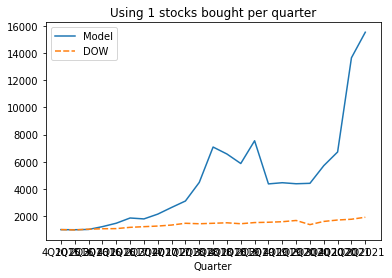

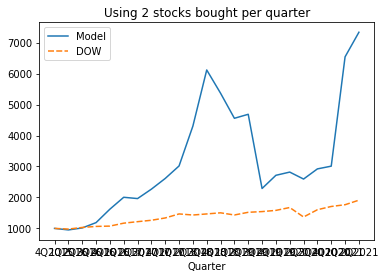

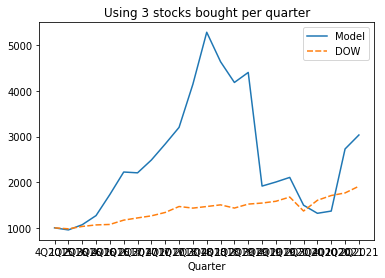

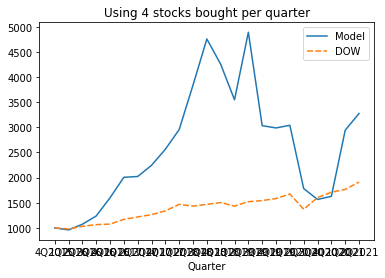

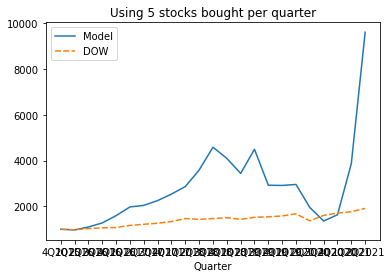

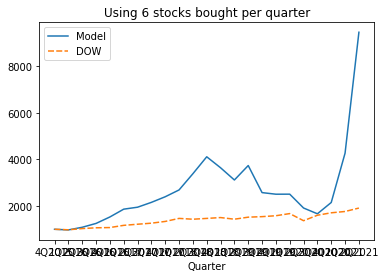

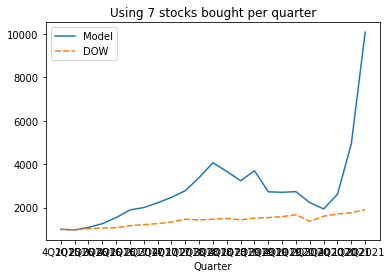

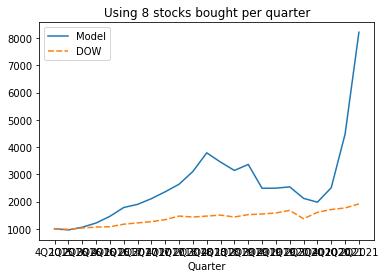

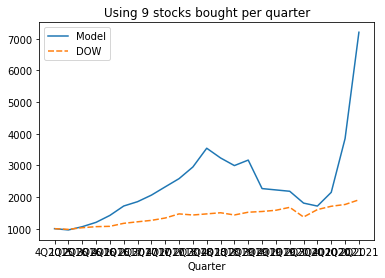

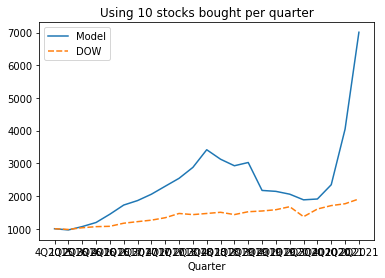

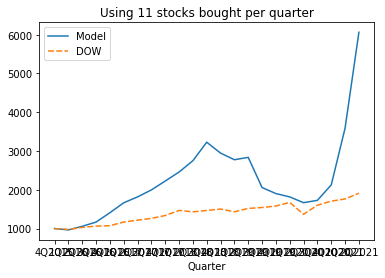

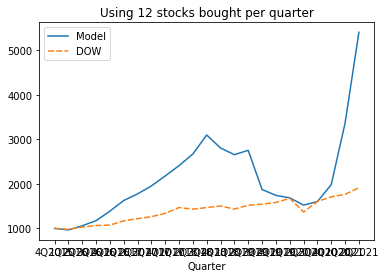

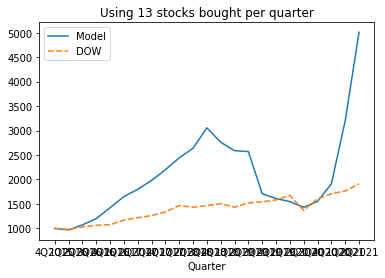

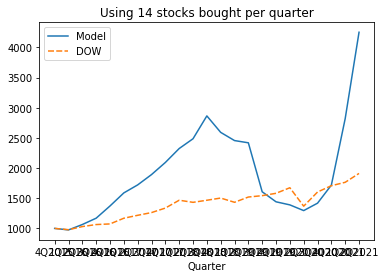

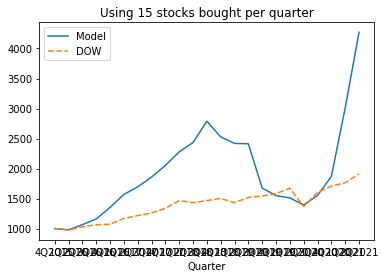

In [66]:
for num_stocks_to_buy, portfolio in output.items():
    plot_vs_dow(portfolio)
    plt.title(f"Using {num_stocks_to_buy} stocks bought per quarter")
    plt.show()

### Num stocks to buy: 7

# Learning Rate

In [78]:
output = {}

for learning_rate in [.001, .005, .01, .05, .1, .2]:
    hp = Hyperparams(N_STOCKS_TO_BUY=7, NUM_QUARTERS_FOR_TRAINING=12, LEARNING_RATE=learning_rate)

    portfolio = await compute_performance(df=df,
                              start_date=date(2016,1,1),
                              hyperparams=hp,
                              end_date=None)
    
    output[learning_rate] = portfolio


Fitting data for: QuarterlyIndex  Q4 2015
Filtering data between 4Q2012 and 4Q2015
QuarterFilter removed 53289 rows. Output size: (7770, 73)
Train Size: (6216, 72), Test Size: (1554, 72)
[1]	valid_0's l1: 24.4559	valid_0's l2: 3116.7
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 24.4532	valid_0's l2: 3116.1
[3]	valid_0's l1: 24.4505	valid_0's l2: 3115.49
[4]	valid_0's l1: 24.4476	valid_0's l2: 3114.88
[5]	valid_0's l1: 24.445	valid_0's l2: 3114.27
[6]	valid_0's l1: 24.4427	valid_0's l2: 3113.68
[7]	valid_0's l1: 24.4401	valid_0's l2: 3113.07
[8]	valid_0's l1: 24.4379	valid_0's l2: 3112.48
[9]	valid_0's l1: 24.4353	valid_0's l2: 3111.89
[10]	valid_0's l1: 24.4328	valid_0's l2: 3111.29
[11]	valid_0's l1: 24.4307	valid_0's l2: 3110.71
[12]	valid_0's l1: 24.4282	valid_0's l2: 3110.11
[13]	valid_0's l1: 24.4261	valid_0's l2: 3109.54
[14]	valid_0's l1: 24.4237	valid_0's l2: 3108.95
[15]	valid_0's l1: 24.4214	valid_0's l2: 3108.37
[16]	valid_0's l1: 24.4192	va

[87]	valid_0's l1: 20.3842	valid_0's l2: 898.643
[88]	valid_0's l1: 20.3829	valid_0's l2: 898.493
[89]	valid_0's l1: 20.3812	valid_0's l2: 898.296
[90]	valid_0's l1: 20.3795	valid_0's l2: 898.116
[91]	valid_0's l1: 20.3783	valid_0's l2: 897.968
[92]	valid_0's l1: 20.3767	valid_0's l2: 897.779
[93]	valid_0's l1: 20.3749	valid_0's l2: 897.586
[94]	valid_0's l1: 20.3732	valid_0's l2: 897.436
[95]	valid_0's l1: 20.3716	valid_0's l2: 897.253
[96]	valid_0's l1: 20.3702	valid_0's l2: 897.064
[97]	valid_0's l1: 20.3691	valid_0's l2: 896.904
[98]	valid_0's l1: 20.3678	valid_0's l2: 896.732
[99]	valid_0's l1: 20.3664	valid_0's l2: 896.546
[100]	valid_0's l1: 20.3649	valid_0's l2: 896.366
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 20.3649	valid_0's l2: 896.366
Filtering data between 1Q2016 and 2Q2016
QuarterFilter removed 63566 rows. Output size: (639, 72)
Current portfolio: {QuarterlyIndex TSLA Q4 2015: 30.19400040469446, QuarterlyIndex AAL Q4 2015: 33.18741126360625, Qu

[20]	valid_0's l1: 20.232	valid_0's l2: 865.387
[21]	valid_0's l1: 20.229	valid_0's l2: 865.133
[22]	valid_0's l1: 20.226	valid_0's l2: 864.867
[23]	valid_0's l1: 20.2229	valid_0's l2: 864.615
[24]	valid_0's l1: 20.2199	valid_0's l2: 864.362
[25]	valid_0's l1: 20.2169	valid_0's l2: 864.111
[26]	valid_0's l1: 20.2139	valid_0's l2: 863.846
[27]	valid_0's l1: 20.2109	valid_0's l2: 863.599
[28]	valid_0's l1: 20.208	valid_0's l2: 863.342
[29]	valid_0's l1: 20.205	valid_0's l2: 863.091
[30]	valid_0's l1: 20.2022	valid_0's l2: 862.845
[31]	valid_0's l1: 20.1992	valid_0's l2: 862.585
[32]	valid_0's l1: 20.1964	valid_0's l2: 862.342
[33]	valid_0's l1: 20.1935	valid_0's l2: 862.083
[34]	valid_0's l1: 20.1906	valid_0's l2: 861.82
[35]	valid_0's l1: 20.1877	valid_0's l2: 861.572
[36]	valid_0's l1: 20.1849	valid_0's l2: 861.331
[37]	valid_0's l1: 20.1821	valid_0's l2: 861.091
[38]	valid_0's l1: 20.1792	valid_0's l2: 860.849
[39]	valid_0's l1: 20.1763	valid_0's l2: 860.597
[40]	valid_0's l1: 20.1735

[75]	valid_0's l1: 21.2818	valid_0's l2: 1626.8
[76]	valid_0's l1: 21.2789	valid_0's l2: 1626.45
[77]	valid_0's l1: 21.2756	valid_0's l2: 1626.07
[78]	valid_0's l1: 21.2726	valid_0's l2: 1625.71
[79]	valid_0's l1: 21.2692	valid_0's l2: 1625.4
[80]	valid_0's l1: 21.2661	valid_0's l2: 1625.04
[81]	valid_0's l1: 21.2631	valid_0's l2: 1624.67
[82]	valid_0's l1: 21.2601	valid_0's l2: 1624.31
[83]	valid_0's l1: 21.257	valid_0's l2: 1623.95
[84]	valid_0's l1: 21.2542	valid_0's l2: 1623.6
[85]	valid_0's l1: 21.2511	valid_0's l2: 1623.23
[86]	valid_0's l1: 21.2482	valid_0's l2: 1622.88
[87]	valid_0's l1: 21.2451	valid_0's l2: 1622.58
[88]	valid_0's l1: 21.242	valid_0's l2: 1622.29
[89]	valid_0's l1: 21.2389	valid_0's l2: 1622
[90]	valid_0's l1: 21.2358	valid_0's l2: 1621.7
[91]	valid_0's l1: 21.2327	valid_0's l2: 1621.41
[92]	valid_0's l1: 21.2296	valid_0's l2: 1621.12
[93]	valid_0's l1: 21.2266	valid_0's l2: 1620.83
[94]	valid_0's l1: 21.2235	valid_0's l2: 1620.54
[95]	valid_0's l1: 21.2205	va

[27]	valid_0's l1: 22.7547	valid_0's l2: 1070.7
[28]	valid_0's l1: 22.7516	valid_0's l2: 1070.45
[29]	valid_0's l1: 22.7486	valid_0's l2: 1070.2
[30]	valid_0's l1: 22.7455	valid_0's l2: 1069.95
[31]	valid_0's l1: 22.7424	valid_0's l2: 1069.7
[32]	valid_0's l1: 22.7395	valid_0's l2: 1069.47
[33]	valid_0's l1: 22.7365	valid_0's l2: 1069.22
[34]	valid_0's l1: 22.7335	valid_0's l2: 1068.97
[35]	valid_0's l1: 22.7305	valid_0's l2: 1068.73
[36]	valid_0's l1: 22.7276	valid_0's l2: 1068.48
[37]	valid_0's l1: 22.7246	valid_0's l2: 1068.24
[38]	valid_0's l1: 22.7216	valid_0's l2: 1067.99
[39]	valid_0's l1: 22.7185	valid_0's l2: 1067.74
[40]	valid_0's l1: 22.7154	valid_0's l2: 1067.5
[41]	valid_0's l1: 22.7124	valid_0's l2: 1067.27
[42]	valid_0's l1: 22.7094	valid_0's l2: 1067.02
[43]	valid_0's l1: 22.7064	valid_0's l2: 1066.78
[44]	valid_0's l1: 22.7033	valid_0's l2: 1066.53
[45]	valid_0's l1: 22.7003	valid_0's l2: 1066.29
[46]	valid_0's l1: 22.6973	valid_0's l2: 1066.04
[47]	valid_0's l1: 22.69

[77]	valid_0's l1: 22.5027	valid_0's l2: 1020.26
[78]	valid_0's l1: 22.4994	valid_0's l2: 1020
[79]	valid_0's l1: 22.4962	valid_0's l2: 1019.73
[80]	valid_0's l1: 22.4928	valid_0's l2: 1019.46
[81]	valid_0's l1: 22.4895	valid_0's l2: 1019.2
[82]	valid_0's l1: 22.4864	valid_0's l2: 1018.95
[83]	valid_0's l1: 22.4832	valid_0's l2: 1018.69
[84]	valid_0's l1: 22.4801	valid_0's l2: 1018.45
[85]	valid_0's l1: 22.4767	valid_0's l2: 1018.17
[86]	valid_0's l1: 22.4735	valid_0's l2: 1017.91
[87]	valid_0's l1: 22.4703	valid_0's l2: 1017.67
[88]	valid_0's l1: 22.467	valid_0's l2: 1017.4
[89]	valid_0's l1: 22.4637	valid_0's l2: 1017.13
[90]	valid_0's l1: 22.4606	valid_0's l2: 1016.88
[91]	valid_0's l1: 22.4572	valid_0's l2: 1016.61
[92]	valid_0's l1: 22.4541	valid_0's l2: 1016.37
[93]	valid_0's l1: 22.4511	valid_0's l2: 1016.13
[94]	valid_0's l1: 22.4477	valid_0's l2: 1015.84
[95]	valid_0's l1: 22.4444	valid_0's l2: 1015.58
[96]	valid_0's l1: 22.4415	valid_0's l2: 1015.34
[97]	valid_0's l1: 22.4382

[21]	valid_0's l1: 22.2608	valid_0's l2: 998.372
[22]	valid_0's l1: 22.2576	valid_0's l2: 998.085
[23]	valid_0's l1: 22.2542	valid_0's l2: 997.784
[24]	valid_0's l1: 22.2513	valid_0's l2: 997.505
[25]	valid_0's l1: 22.248	valid_0's l2: 997.206
[26]	valid_0's l1: 22.2448	valid_0's l2: 996.921
[27]	valid_0's l1: 22.2415	valid_0's l2: 996.622
[28]	valid_0's l1: 22.2386	valid_0's l2: 996.347
[29]	valid_0's l1: 22.2353	valid_0's l2: 996.05
[30]	valid_0's l1: 22.2322	valid_0's l2: 995.768
[31]	valid_0's l1: 22.2293	valid_0's l2: 995.494
[32]	valid_0's l1: 22.226	valid_0's l2: 995.199
[33]	valid_0's l1: 22.223	valid_0's l2: 994.918
[34]	valid_0's l1: 22.2199	valid_0's l2: 994.641
[35]	valid_0's l1: 22.2168	valid_0's l2: 994.354
[36]	valid_0's l1: 22.2136	valid_0's l2: 994.077
[37]	valid_0's l1: 22.2105	valid_0's l2: 993.791
[38]	valid_0's l1: 22.2075	valid_0's l2: 993.514
[39]	valid_0's l1: 22.2045	valid_0's l2: 993.239
[40]	valid_0's l1: 22.2014	valid_0's l2: 992.963
[41]	valid_0's l1: 22.19

[68]	valid_0's l1: 21.6246	valid_0's l2: 972.634
[69]	valid_0's l1: 21.6215	valid_0's l2: 972.354
[70]	valid_0's l1: 21.6182	valid_0's l2: 972.075
[71]	valid_0's l1: 21.6152	valid_0's l2: 971.814
[72]	valid_0's l1: 21.612	valid_0's l2: 971.536
[73]	valid_0's l1: 21.6087	valid_0's l2: 971.237
[74]	valid_0's l1: 21.6056	valid_0's l2: 970.974
[75]	valid_0's l1: 21.6024	valid_0's l2: 970.677
[76]	valid_0's l1: 21.5993	valid_0's l2: 970.43
[77]	valid_0's l1: 21.5961	valid_0's l2: 970.134
[78]	valid_0's l1: 21.5931	valid_0's l2: 969.889
[79]	valid_0's l1: 21.5897	valid_0's l2: 969.595
[80]	valid_0's l1: 21.5866	valid_0's l2: 969.337
[81]	valid_0's l1: 21.5835	valid_0's l2: 969.061
[82]	valid_0's l1: 21.5805	valid_0's l2: 968.806
[83]	valid_0's l1: 21.5772	valid_0's l2: 968.516
[84]	valid_0's l1: 21.5742	valid_0's l2: 968.275
[85]	valid_0's l1: 21.5709	valid_0's l2: 967.984
[86]	valid_0's l1: 21.5679	valid_0's l2: 967.735
[87]	valid_0's l1: 21.565	valid_0's l2: 967.48
[88]	valid_0's l1: 21.56

Filtering data between 3Q2018 and 4Q2018
QuarterFilter removed 63605 rows. Output size: (600, 72)
Current portfolio: {QuarterlyIndex ALGN Q4 2017: 73.37434471458657, QuarterlyIndex ABMD Q4 2017: 99.1704207470986, QuarterlyIndex ANSS Q4 2017: 58.24367327873662, QuarterlyIndex MED Q4 2017: 141.2935141585052, QuarterlyIndex NVDA Q4 2017: 62.72313433677476, QuarterlyIndex TER Q4 2017: 45.450521596901865, QuarterlyIndex TWTR Q4 2017: 80.02369117032471, QuarterlyIndex MTW Q1 2018: 62.622488853466976, QuarterlyIndex AMSC Q1 2018: 108.52765260887784, QuarterlyIndex SCHW Q1 2018: 86.62220806397127, QuarterlyIndex CDNS Q1 2018: 97.92308430013152, QuarterlyIndex NVDA Q1 2018: 103.17084985972282, QuarterlyIndex MNK Q1 2018: 128.72677524593817, QuarterlyIndex MED Q1 2018: 236.28319460763427, QuarterlyIndex PNR Q2 2018: 72.19057154719657, QuarterlyIndex WYND Q2 2018: 50.868031135527715, QuarterlyIndex FMCC Q2 2018: 107.04593387517305, QuarterlyIndex AMD Q2 2018: 175.64501480432273, QuarterlyIndex ME

[1]	valid_0's l1: 23.9949	valid_0's l2: 1037.93
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.9901	valid_0's l2: 1037.58
[3]	valid_0's l1: 23.9854	valid_0's l2: 1037.23
[4]	valid_0's l1: 23.9806	valid_0's l2: 1036.88
[5]	valid_0's l1: 23.9762	valid_0's l2: 1036.56
[6]	valid_0's l1: 23.9717	valid_0's l2: 1036.23
[7]	valid_0's l1: 23.967	valid_0's l2: 1035.9
[8]	valid_0's l1: 23.9622	valid_0's l2: 1035.55
[9]	valid_0's l1: 23.9575	valid_0's l2: 1035.22
[10]	valid_0's l1: 23.9527	valid_0's l2: 1034.87
[11]	valid_0's l1: 23.948	valid_0's l2: 1034.54
[12]	valid_0's l1: 23.9432	valid_0's l2: 1034.2
[13]	valid_0's l1: 23.9385	valid_0's l2: 1033.86
[14]	valid_0's l1: 23.9339	valid_0's l2: 1033.53
[15]	valid_0's l1: 23.9291	valid_0's l2: 1033.19
[16]	valid_0's l1: 23.9243	valid_0's l2: 1032.86
[17]	valid_0's l1: 23.9196	valid_0's l2: 1032.52
[18]	valid_0's l1: 23.9148	valid_0's l2: 1032.18
[19]	valid_0's l1: 23.9101	valid_0's l2: 1031.85
[20]	valid_0's l1: 23.

[30]	valid_0's l1: 23.4983	valid_0's l2: 1396.07
[31]	valid_0's l1: 23.4948	valid_0's l2: 1395.86
[32]	valid_0's l1: 23.491	valid_0's l2: 1395.62
[33]	valid_0's l1: 23.4876	valid_0's l2: 1395.4
[34]	valid_0's l1: 23.4838	valid_0's l2: 1395.16
[35]	valid_0's l1: 23.4804	valid_0's l2: 1394.94
[36]	valid_0's l1: 23.4767	valid_0's l2: 1394.73
[37]	valid_0's l1: 23.4733	valid_0's l2: 1394.51
[38]	valid_0's l1: 23.4699	valid_0's l2: 1394.3
[39]	valid_0's l1: 23.4663	valid_0's l2: 1394.08
[40]	valid_0's l1: 23.4629	valid_0's l2: 1393.87
[41]	valid_0's l1: 23.4596	valid_0's l2: 1393.67
[42]	valid_0's l1: 23.4562	valid_0's l2: 1393.46
[43]	valid_0's l1: 23.4528	valid_0's l2: 1393.26
[44]	valid_0's l1: 23.4492	valid_0's l2: 1393.04
[45]	valid_0's l1: 23.446	valid_0's l2: 1392.85
[46]	valid_0's l1: 23.4425	valid_0's l2: 1392.63
[47]	valid_0's l1: 23.4388	valid_0's l2: 1392.41
[48]	valid_0's l1: 23.4354	valid_0's l2: 1392.21
[49]	valid_0's l1: 23.4317	valid_0's l2: 1392
[50]	valid_0's l1: 23.4282	

[58]	valid_0's l1: 25.428	valid_0's l2: 1907.55
[59]	valid_0's l1: 25.4251	valid_0's l2: 1907.41
[60]	valid_0's l1: 25.4222	valid_0's l2: 1907.27
[61]	valid_0's l1: 25.4193	valid_0's l2: 1907.14
[62]	valid_0's l1: 25.4164	valid_0's l2: 1907.01
[63]	valid_0's l1: 25.4136	valid_0's l2: 1906.88
[64]	valid_0's l1: 25.4107	valid_0's l2: 1906.76
[65]	valid_0's l1: 25.4078	valid_0's l2: 1906.64
[66]	valid_0's l1: 25.4049	valid_0's l2: 1906.52
[67]	valid_0's l1: 25.4021	valid_0's l2: 1906.41
[68]	valid_0's l1: 25.3992	valid_0's l2: 1906.3
[69]	valid_0's l1: 25.3963	valid_0's l2: 1906.19
[70]	valid_0's l1: 25.3934	valid_0's l2: 1906.09
[71]	valid_0's l1: 25.3906	valid_0's l2: 1905.99
[72]	valid_0's l1: 25.3878	valid_0's l2: 1905.89
[73]	valid_0's l1: 25.3849	valid_0's l2: 1905.79
[74]	valid_0's l1: 25.3821	valid_0's l2: 1905.7
[75]	valid_0's l1: 25.3792	valid_0's l2: 1905.61
[76]	valid_0's l1: 25.3764	valid_0's l2: 1905.52
[77]	valid_0's l1: 25.3736	valid_0's l2: 1905.44
[78]	valid_0's l1: 25.3

[80]	valid_0's l1: 26.0977	valid_0's l2: 3494.03
[81]	valid_0's l1: 26.094	valid_0's l2: 3492.87
[82]	valid_0's l1: 26.0914	valid_0's l2: 3491.89
[83]	valid_0's l1: 26.0875	valid_0's l2: 3490.73
[84]	valid_0's l1: 26.0848	valid_0's l2: 3489.74
[85]	valid_0's l1: 26.081	valid_0's l2: 3488.58
[86]	valid_0's l1: 26.0782	valid_0's l2: 3487.54
[87]	valid_0's l1: 26.0743	valid_0's l2: 3486.44
[88]	valid_0's l1: 26.0716	valid_0's l2: 3485.46
[89]	valid_0's l1: 26.0681	valid_0's l2: 3484.32
[90]	valid_0's l1: 26.0655	valid_0's l2: 3483.32
[91]	valid_0's l1: 26.062	valid_0's l2: 3482.24
[92]	valid_0's l1: 26.0593	valid_0's l2: 3481.23
[93]	valid_0's l1: 26.0556	valid_0's l2: 3480.15
[94]	valid_0's l1: 26.0531	valid_0's l2: 3479.16
[95]	valid_0's l1: 26.0494	valid_0's l2: 3478.07
[96]	valid_0's l1: 26.0468	valid_0's l2: 3477.07
[97]	valid_0's l1: 26.0432	valid_0's l2: 3476.02
[98]	valid_0's l1: 26.0407	valid_0's l2: 3475.04
[99]	valid_0's l1: 26.0371	valid_0's l2: 3473.96
[100]	valid_0's l1: 26.

[6]	valid_0's l1: 27.0612	valid_0's l2: 2515.05
[7]	valid_0's l1: 27.0565	valid_0's l2: 2514.4
[8]	valid_0's l1: 27.0519	valid_0's l2: 2513.75
[9]	valid_0's l1: 27.0473	valid_0's l2: 2513.11
[10]	valid_0's l1: 27.0427	valid_0's l2: 2512.47
[11]	valid_0's l1: 27.0381	valid_0's l2: 2511.83
[12]	valid_0's l1: 27.034	valid_0's l2: 2511.2
[13]	valid_0's l1: 27.0299	valid_0's l2: 2510.56
[14]	valid_0's l1: 27.0258	valid_0's l2: 2509.93
[15]	valid_0's l1: 27.0218	valid_0's l2: 2509.32
[16]	valid_0's l1: 27.0177	valid_0's l2: 2508.69
[17]	valid_0's l1: 27.0137	valid_0's l2: 2508.08
[18]	valid_0's l1: 27.0097	valid_0's l2: 2507.46
[19]	valid_0's l1: 27.0048	valid_0's l2: 2506.78
[20]	valid_0's l1: 27.0007	valid_0's l2: 2506.17
[21]	valid_0's l1: 26.9967	valid_0's l2: 2505.56
[22]	valid_0's l1: 26.9918	valid_0's l2: 2504.88
[23]	valid_0's l1: 26.9879	valid_0's l2: 2504.28
[24]	valid_0's l1: 26.983	valid_0's l2: 2503.61
[25]	valid_0's l1: 26.979	valid_0's l2: 2503
[26]	valid_0's l1: 26.9741	valid

[69]	valid_0's l1: 32.6608	valid_0's l2: 10488.7
[70]	valid_0's l1: 32.6542	valid_0's l2: 10487.9
[71]	valid_0's l1: 32.6475	valid_0's l2: 10486.6
[72]	valid_0's l1: 32.6404	valid_0's l2: 10485.8
[73]	valid_0's l1: 32.6338	valid_0's l2: 10485
[74]	valid_0's l1: 32.6269	valid_0's l2: 10483.8
[75]	valid_0's l1: 32.6195	valid_0's l2: 10482.8
[76]	valid_0's l1: 32.6122	valid_0's l2: 10481.5
[77]	valid_0's l1: 32.606	valid_0's l2: 10480.9
[78]	valid_0's l1: 32.5985	valid_0's l2: 10479.6
[79]	valid_0's l1: 32.592	valid_0's l2: 10478.8
[80]	valid_0's l1: 32.5847	valid_0's l2: 10477.4
[81]	valid_0's l1: 32.5777	valid_0's l2: 10476.6
[82]	valid_0's l1: 32.5713	valid_0's l2: 10475.9
[83]	valid_0's l1: 32.5639	valid_0's l2: 10474.6
[84]	valid_0's l1: 32.557	valid_0's l2: 10473.8
[85]	valid_0's l1: 32.55	valid_0's l2: 10473
[86]	valid_0's l1: 32.5428	valid_0's l2: 10471.7
[87]	valid_0's l1: 32.5355	valid_0's l2: 10471.1
[88]	valid_0's l1: 32.5281	valid_0's l2: 10469.8
[89]	valid_0's l1: 32.5219	va

[1]	valid_0's l1: 32.1855	valid_0's l2: 3398.25
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 32.1747	valid_0's l2: 3395.94
[3]	valid_0's l1: 32.1639	valid_0's l2: 3393.63
[4]	valid_0's l1: 32.1532	valid_0's l2: 3391.33
[5]	valid_0's l1: 32.1424	valid_0's l2: 3389.05
[6]	valid_0's l1: 32.1317	valid_0's l2: 3386.77
[7]	valid_0's l1: 32.121	valid_0's l2: 3384.5
[8]	valid_0's l1: 32.1103	valid_0's l2: 3382.24
[9]	valid_0's l1: 32.0987	valid_0's l2: 3380
[10]	valid_0's l1: 32.088	valid_0's l2: 3377.75
[11]	valid_0's l1: 32.0767	valid_0's l2: 3375.56
[12]	valid_0's l1: 32.0661	valid_0's l2: 3373.33
[13]	valid_0's l1: 32.0554	valid_0's l2: 3371.11
[14]	valid_0's l1: 32.0442	valid_0's l2: 3368.94
[15]	valid_0's l1: 32.0333	valid_0's l2: 3366.7
[16]	valid_0's l1: 32.0219	valid_0's l2: 3364.53
[17]	valid_0's l1: 32.0111	valid_0's l2: 3362.31
[18]	valid_0's l1: 31.9997	valid_0's l2: 3360.16
[19]	valid_0's l1: 31.9889	valid_0's l2: 3357.95
[20]	valid_0's l1: 31.977

[59]	valid_0's l1: 23.8944	valid_0's l2: 2968.61
[60]	valid_0's l1: 23.8834	valid_0's l2: 2965.92
[61]	valid_0's l1: 23.8769	valid_0's l2: 2964.14
[62]	valid_0's l1: 23.8661	valid_0's l2: 2961.51
[63]	valid_0's l1: 23.8576	valid_0's l2: 2959.56
[64]	valid_0's l1: 23.8504	valid_0's l2: 2956.98
[65]	valid_0's l1: 23.8425	valid_0's l2: 2954.48
[66]	valid_0's l1: 23.835	valid_0's l2: 2952.09
[67]	valid_0's l1: 23.8265	valid_0's l2: 2949.35
[68]	valid_0's l1: 23.8186	valid_0's l2: 2946.66
[69]	valid_0's l1: 23.8106	valid_0's l2: 2944.16
[70]	valid_0's l1: 23.8027	valid_0's l2: 2941.51
[71]	valid_0's l1: 23.7955	valid_0's l2: 2939.06
[72]	valid_0's l1: 23.7883	valid_0's l2: 2936.52
[73]	valid_0's l1: 23.7821	valid_0's l2: 2934.14
[74]	valid_0's l1: 23.7731	valid_0's l2: 2931.63
[75]	valid_0's l1: 23.7672	valid_0's l2: 2929.22
[76]	valid_0's l1: 23.7607	valid_0's l2: 2926.77
[77]	valid_0's l1: 23.7549	valid_0's l2: 2924.43
[78]	valid_0's l1: 23.7436	valid_0's l2: 2922.12
[79]	valid_0's l1: 23

[1]	valid_0's l1: 21.8104	valid_0's l2: 2102.02
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.7996	valid_0's l2: 2100.91
[3]	valid_0's l1: 21.7887	valid_0's l2: 2099.78
[4]	valid_0's l1: 21.7779	valid_0's l2: 2098.69
[5]	valid_0's l1: 21.7672	valid_0's l2: 2097.6
[6]	valid_0's l1: 21.7574	valid_0's l2: 2096.54
[7]	valid_0's l1: 21.7469	valid_0's l2: 2095.48
[8]	valid_0's l1: 21.7371	valid_0's l2: 2094.46
[9]	valid_0's l1: 21.7276	valid_0's l2: 2093.37
[10]	valid_0's l1: 21.7185	valid_0's l2: 2092.36
[11]	valid_0's l1: 21.7072	valid_0's l2: 2090.58
[12]	valid_0's l1: 21.6959	valid_0's l2: 2088.76
[13]	valid_0's l1: 21.6874	valid_0's l2: 2087.8
[14]	valid_0's l1: 21.6751	valid_0's l2: 2085.96
[15]	valid_0's l1: 21.6652	valid_0's l2: 2084.92
[16]	valid_0's l1: 21.6553	valid_0's l2: 2083.95
[17]	valid_0's l1: 21.645	valid_0's l2: 2082.24
[18]	valid_0's l1: 21.636	valid_0's l2: 2081.32
[19]	valid_0's l1: 21.6286	valid_0's l2: 2080.47
[20]	valid_0's l1: 21.

[45]	valid_0's l1: 19.7434	valid_0's l2: 824.043
[46]	valid_0's l1: 19.7321	valid_0's l2: 823.348
[47]	valid_0's l1: 19.7248	valid_0's l2: 822.746
[48]	valid_0's l1: 19.7165	valid_0's l2: 822.006
[49]	valid_0's l1: 19.7091	valid_0's l2: 821.311
[50]	valid_0's l1: 19.6975	valid_0's l2: 820.492
[51]	valid_0's l1: 19.6896	valid_0's l2: 819.748
[52]	valid_0's l1: 19.6808	valid_0's l2: 819.097
[53]	valid_0's l1: 19.6732	valid_0's l2: 818.492
[54]	valid_0's l1: 19.6651	valid_0's l2: 817.818
[55]	valid_0's l1: 19.6579	valid_0's l2: 817.236
[56]	valid_0's l1: 19.647	valid_0's l2: 816.601
[57]	valid_0's l1: 19.6387	valid_0's l2: 815.924
[58]	valid_0's l1: 19.63	valid_0's l2: 815.238
[59]	valid_0's l1: 19.621	valid_0's l2: 814.577
[60]	valid_0's l1: 19.6145	valid_0's l2: 813.987
[61]	valid_0's l1: 19.6053	valid_0's l2: 813.211
[62]	valid_0's l1: 19.599	valid_0's l2: 812.681
[63]	valid_0's l1: 19.5917	valid_0's l2: 812.088
[64]	valid_0's l1: 19.5826	valid_0's l2: 811.341
[65]	valid_0's l1: 19.576

[79]	valid_0's l1: 20.5552	valid_0's l2: 1548.79
[80]	valid_0's l1: 20.5486	valid_0's l2: 1547.96
[81]	valid_0's l1: 20.5419	valid_0's l2: 1547.22
[82]	valid_0's l1: 20.5341	valid_0's l2: 1546.44
[83]	valid_0's l1: 20.5267	valid_0's l2: 1545.58
[84]	valid_0's l1: 20.5207	valid_0's l2: 1544.67
[85]	valid_0's l1: 20.5124	valid_0's l2: 1543.8
[86]	valid_0's l1: 20.5058	valid_0's l2: 1543.08
[87]	valid_0's l1: 20.4999	valid_0's l2: 1542.18
[88]	valid_0's l1: 20.4929	valid_0's l2: 1541.43
[89]	valid_0's l1: 20.4863	valid_0's l2: 1540.53
[90]	valid_0's l1: 20.4803	valid_0's l2: 1539.79
[91]	valid_0's l1: 20.4728	valid_0's l2: 1539
[92]	valid_0's l1: 20.4659	valid_0's l2: 1538.1
[93]	valid_0's l1: 20.4607	valid_0's l2: 1537.26
[94]	valid_0's l1: 20.4548	valid_0's l2: 1536.34
[95]	valid_0's l1: 20.448	valid_0's l2: 1535.59
[96]	valid_0's l1: 20.441	valid_0's l2: 1534.63
[97]	valid_0's l1: 20.4332	valid_0's l2: 1533.7
[98]	valid_0's l1: 20.4264	valid_0's l2: 1532.91
[99]	valid_0's l1: 20.4221	v

[4]	valid_0's l1: 22.7754	valid_0's l2: 1072.4
[5]	valid_0's l1: 22.7605	valid_0's l2: 1071.21
[6]	valid_0's l1: 22.745	valid_0's l2: 1069.91
[7]	valid_0's l1: 22.73	valid_0's l2: 1068.69
[8]	valid_0's l1: 22.7143	valid_0's l2: 1067.41
[9]	valid_0's l1: 22.6993	valid_0's l2: 1066.21
[10]	valid_0's l1: 22.6844	valid_0's l2: 1064.97
[11]	valid_0's l1: 22.6703	valid_0's l2: 1063.79
[12]	valid_0's l1: 22.6561	valid_0's l2: 1062.65
[13]	valid_0's l1: 22.6432	valid_0's l2: 1061.54
[14]	valid_0's l1: 22.6285	valid_0's l2: 1060.32
[15]	valid_0's l1: 22.6151	valid_0's l2: 1059.22
[16]	valid_0's l1: 22.6009	valid_0's l2: 1058.02
[17]	valid_0's l1: 22.5866	valid_0's l2: 1056.9
[18]	valid_0's l1: 22.5734	valid_0's l2: 1055.83
[19]	valid_0's l1: 22.5612	valid_0's l2: 1054.79
[20]	valid_0's l1: 22.5475	valid_0's l2: 1053.73
[21]	valid_0's l1: 22.5342	valid_0's l2: 1052.75
[22]	valid_0's l1: 22.5223	valid_0's l2: 1051.74
[23]	valid_0's l1: 22.5096	valid_0's l2: 1050.72
[24]	valid_0's l1: 22.4968	vali

[49]	valid_0's l1: 22.021	valid_0's l2: 981.522
[50]	valid_0's l1: 22.0074	valid_0's l2: 980.237
[51]	valid_0's l1: 21.9941	valid_0's l2: 979.171
[52]	valid_0's l1: 21.9822	valid_0's l2: 978.434
[53]	valid_0's l1: 21.9689	valid_0's l2: 977.409
[54]	valid_0's l1: 21.9562	valid_0's l2: 976.326
[55]	valid_0's l1: 21.945	valid_0's l2: 975.409
[56]	valid_0's l1: 21.9313	valid_0's l2: 974.416
[57]	valid_0's l1: 21.9197	valid_0's l2: 973.5
[58]	valid_0's l1: 21.9078	valid_0's l2: 972.635
[59]	valid_0's l1: 21.8971	valid_0's l2: 971.778
[60]	valid_0's l1: 21.8827	valid_0's l2: 970.714
[61]	valid_0's l1: 21.8707	valid_0's l2: 969.884
[62]	valid_0's l1: 21.8581	valid_0's l2: 968.896
[63]	valid_0's l1: 21.8468	valid_0's l2: 968.006
[64]	valid_0's l1: 21.8361	valid_0's l2: 967.26
[65]	valid_0's l1: 21.8251	valid_0's l2: 966.393
[66]	valid_0's l1: 21.8136	valid_0's l2: 965.47
[67]	valid_0's l1: 21.8025	valid_0's l2: 964.571
[68]	valid_0's l1: 21.7906	valid_0's l2: 963.667
[69]	valid_0's l1: 21.7807

Current portfolio: {QuarterlyIndex NVDA Q1 2017: 111.92614759547195, QuarterlyIndex AMD Q1 2017: 56.8098606894418, QuarterlyIndex HLT Q1 2017: 100.55428586830027, QuarterlyIndex ADI Q1 2017: 70.79524331017151, QuarterlyIndex AVGO Q1 2017: 78.82629887797167, QuarterlyIndex ALGN Q1 2017: 130.25245046984804, QuarterlyIndex MLM Q1 2017: 55.7959869361623, QuarterlyIndex AMD Q2 2017: 68.12802964997796, QuarterlyIndex NVDA Q2 2017: 114.07619508979579, QuarterlyIndex ALGN Q2 2017: 116.83913047209518, QuarterlyIndex AMAT Q2 2017: 90.7588373615198, QuarterlyIndex ADI Q2 2017: 73.3957607657252, QuarterlyIndex TER Q2 2017: 85.66951089238576, QuarterlyIndex IAC Q2 2017: 97.78308225184092, QuarterlyIndex NVDA Q3 2017: 82.76281971751338, QuarterlyIndex MED Q3 2017: 84.33916445487311, QuarterlyIndex ALGN Q3 2017: 84.50491297857127, QuarterlyIndex ABMD Q3 2017: 74.65701285261795, QuarterlyIndex LRCX Q3 2017: 77.47321496986292, QuarterlyIndex AMAT Q3 2017: 70.87389436688407, QuarterlyIndex KLAC Q3 2017:

[28]	valid_0's l1: 21.4031	valid_0's l2: 954.12
[29]	valid_0's l1: 21.3866	valid_0's l2: 952.832
[30]	valid_0's l1: 21.3715	valid_0's l2: 951.528
[31]	valid_0's l1: 21.3579	valid_0's l2: 950.518
[32]	valid_0's l1: 21.3423	valid_0's l2: 949.232
[33]	valid_0's l1: 21.3287	valid_0's l2: 948.19
[34]	valid_0's l1: 21.3148	valid_0's l2: 947.066
[35]	valid_0's l1: 21.3035	valid_0's l2: 946.103
[36]	valid_0's l1: 21.2919	valid_0's l2: 945.134
[37]	valid_0's l1: 21.2798	valid_0's l2: 944.07
[38]	valid_0's l1: 21.2665	valid_0's l2: 943.01
[39]	valid_0's l1: 21.2548	valid_0's l2: 941.97
[40]	valid_0's l1: 21.2405	valid_0's l2: 940.913
[41]	valid_0's l1: 21.2281	valid_0's l2: 939.937
[42]	valid_0's l1: 21.2135	valid_0's l2: 938.757
[43]	valid_0's l1: 21.2017	valid_0's l2: 937.931
[44]	valid_0's l1: 21.1891	valid_0's l2: 936.991
[45]	valid_0's l1: 21.178	valid_0's l2: 936.221
[46]	valid_0's l1: 21.164	valid_0's l2: 935.199
[47]	valid_0's l1: 21.151	valid_0's l2: 934.159
[48]	valid_0's l1: 21.1369	v

[65]	valid_0's l1: 20.997	valid_0's l2: 827.693
[66]	valid_0's l1: 20.9848	valid_0's l2: 826.703
[67]	valid_0's l1: 20.9757	valid_0's l2: 825.925
[68]	valid_0's l1: 20.9668	valid_0's l2: 825.098
[69]	valid_0's l1: 20.96	valid_0's l2: 824.418
[70]	valid_0's l1: 20.951	valid_0's l2: 823.601
[71]	valid_0's l1: 20.9423	valid_0's l2: 822.775
[72]	valid_0's l1: 20.9314	valid_0's l2: 821.914
[73]	valid_0's l1: 20.9244	valid_0's l2: 821.259
[74]	valid_0's l1: 20.915	valid_0's l2: 820.334
[75]	valid_0's l1: 20.9056	valid_0's l2: 819.44
[76]	valid_0's l1: 20.8955	valid_0's l2: 818.551
[77]	valid_0's l1: 20.8877	valid_0's l2: 817.819
[78]	valid_0's l1: 20.8766	valid_0's l2: 816.866
[79]	valid_0's l1: 20.8664	valid_0's l2: 815.942
[80]	valid_0's l1: 20.8585	valid_0's l2: 815.142
[81]	valid_0's l1: 20.8483	valid_0's l2: 814.302
[82]	valid_0's l1: 20.8386	valid_0's l2: 813.516
[83]	valid_0's l1: 20.8285	valid_0's l2: 812.664
[84]	valid_0's l1: 20.8202	valid_0's l2: 811.922
[85]	valid_0's l1: 20.8101

[99]	valid_0's l1: 22.1602	valid_0's l2: 1084.78
[100]	valid_0's l1: 22.1497	valid_0's l2: 1084.04
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 22.1497	valid_0's l2: 1084.04
Filtering data between 4Q2018 and 1Q2019
QuarterFilter removed 63617 rows. Output size: (588, 72)
Current portfolio: {QuarterlyIndex MED Q1 2018: 204.4049889849878, QuarterlyIndex ABMD Q1 2018: 141.55096265110038, QuarterlyIndex MTW Q1 2018: 52.23317365848517, QuarterlyIndex MNK Q1 2018: 118.7679084508903, QuarterlyIndex LRCX Q1 2018: 70.19547179641876, QuarterlyIndex NVDA Q1 2018: 108.85575376614132, QuarterlyIndex ALGN Q1 2018: 109.97324665394322, QuarterlyIndex PNR Q2 2018: 74.33669820131045, QuarterlyIndex AMD Q2 2018: 194.76020960339048, QuarterlyIndex MED Q2 2018: 133.46592028157184, QuarterlyIndex TWTR Q2 2018: 91.2105270851688, QuarterlyIndex ABMD Q2 2018: 108.44191731077927, QuarterlyIndex ALGN Q2 2018: 103.71505726368186, QuarterlyIndex WYND Q2 2018: 50.99113252996821, QuarterlyInde

QuarterFilter removed 53960 rows. Output size: (7099, 73)
Train Size: (5680, 72), Test Size: (1419, 72)
[1]	valid_0's l1: 23.5907	valid_0's l2: 1402.54
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.5721	valid_0's l2: 1401.11
[3]	valid_0's l1: 23.5533	valid_0's l2: 1399.68
[4]	valid_0's l1: 23.5349	valid_0's l2: 1398.28
[5]	valid_0's l1: 23.5163	valid_0's l2: 1397.1
[6]	valid_0's l1: 23.4988	valid_0's l2: 1396
[7]	valid_0's l1: 23.4799	valid_0's l2: 1394.79
[8]	valid_0's l1: 23.4627	valid_0's l2: 1393.72
[9]	valid_0's l1: 23.4458	valid_0's l2: 1392.74
[10]	valid_0's l1: 23.4274	valid_0's l2: 1391.62
[11]	valid_0's l1: 23.4106	valid_0's l2: 1390.6
[12]	valid_0's l1: 23.3924	valid_0's l2: 1389.48
[13]	valid_0's l1: 23.3746	valid_0's l2: 1388.44
[14]	valid_0's l1: 23.3567	valid_0's l2: 1387.31
[15]	valid_0's l1: 23.3393	valid_0's l2: 1386.3
[16]	valid_0's l1: 23.3215	valid_0's l2: 1385
[17]	valid_0's l1: 23.3047	valid_0's l2: 1383.82
[18]	valid_0's l1: 23

[12]	valid_0's l1: 25.4188	valid_0's l2: 1906.83
[13]	valid_0's l1: 25.4037	valid_0's l2: 1906.35
[14]	valid_0's l1: 25.3879	valid_0's l2: 1905.87
[15]	valid_0's l1: 25.372	valid_0's l2: 1905.3
[16]	valid_0's l1: 25.3571	valid_0's l2: 1904.94
[17]	valid_0's l1: 25.3418	valid_0's l2: 1904.62
[18]	valid_0's l1: 25.3273	valid_0's l2: 1904.44
[19]	valid_0's l1: 25.3135	valid_0's l2: 1903.89
[20]	valid_0's l1: 25.3015	valid_0's l2: 1903.48
[21]	valid_0's l1: 25.2879	valid_0's l2: 1900.96
[22]	valid_0's l1: 25.2753	valid_0's l2: 1900.68
[23]	valid_0's l1: 25.2562	valid_0's l2: 1897.2
[24]	valid_0's l1: 25.2458	valid_0's l2: 1896.84
[25]	valid_0's l1: 25.2342	valid_0's l2: 1894.39
[26]	valid_0's l1: 25.221	valid_0's l2: 1891.14
[27]	valid_0's l1: 25.2112	valid_0's l2: 1890.92
[28]	valid_0's l1: 25.1967	valid_0's l2: 1887.83
[29]	valid_0's l1: 25.1862	valid_0's l2: 1885.49
[30]	valid_0's l1: 25.1753	valid_0's l2: 1885.44
[31]	valid_0's l1: 25.1615	valid_0's l2: 1882.44
[32]	valid_0's l1: 25.15

[41]	valid_0's l1: 25.7159	valid_0's l2: 3406.88
[42]	valid_0's l1: 25.7022	valid_0's l2: 3403.52
[43]	valid_0's l1: 25.6874	valid_0's l2: 3398.45
[44]	valid_0's l1: 25.6765	valid_0's l2: 3395.99
[45]	valid_0's l1: 25.6625	valid_0's l2: 3392.72
[46]	valid_0's l1: 25.6484	valid_0's l2: 3390.89
[47]	valid_0's l1: 25.6403	valid_0's l2: 3387.07
[48]	valid_0's l1: 25.6333	valid_0's l2: 3384.73
[49]	valid_0's l1: 25.6212	valid_0's l2: 3381.52
[50]	valid_0's l1: 25.6061	valid_0's l2: 3379.45
[51]	valid_0's l1: 25.5923	valid_0's l2: 3376.52
[52]	valid_0's l1: 25.5871	valid_0's l2: 3374.38
[53]	valid_0's l1: 25.5754	valid_0's l2: 3370.09
[54]	valid_0's l1: 25.5608	valid_0's l2: 3366.83
[55]	valid_0's l1: 25.5525	valid_0's l2: 3366.12
[56]	valid_0's l1: 25.5394	valid_0's l2: 3365.01
[57]	valid_0's l1: 25.5273	valid_0's l2: 3361.97
[58]	valid_0's l1: 25.5204	valid_0's l2: 3358.54
[59]	valid_0's l1: 25.5144	valid_0's l2: 3356.67
[60]	valid_0's l1: 25.5025	valid_0's l2: 3354.86
[61]	valid_0's l1: 2

[74]	valid_0's l1: 27.0143	valid_0's l2: 3603.15
[75]	valid_0's l1: 27.0037	valid_0's l2: 3599.81
[76]	valid_0's l1: 26.99	valid_0's l2: 3597.42
[77]	valid_0's l1: 26.9839	valid_0's l2: 3596.42
[78]	valid_0's l1: 26.9811	valid_0's l2: 3594.72
[79]	valid_0's l1: 26.9671	valid_0's l2: 3592.35
[80]	valid_0's l1: 26.962	valid_0's l2: 3591.77
[81]	valid_0's l1: 26.9511	valid_0's l2: 3588.49
[82]	valid_0's l1: 26.9471	valid_0's l2: 3587.62
[83]	valid_0's l1: 26.9328	valid_0's l2: 3585.11
[84]	valid_0's l1: 26.9185	valid_0's l2: 3580.78
[85]	valid_0's l1: 26.9131	valid_0's l2: 3580.25
[86]	valid_0's l1: 26.9087	valid_0's l2: 3580.19
[87]	valid_0's l1: 26.9049	valid_0's l2: 3579.31
[88]	valid_0's l1: 26.8917	valid_0's l2: 3577.01
[89]	valid_0's l1: 26.8921	valid_0's l2: 3575.85
[90]	valid_0's l1: 26.8864	valid_0's l2: 3575.2
[91]	valid_0's l1: 26.8733	valid_0's l2: 3571.04
[92]	valid_0's l1: 26.8674	valid_0's l2: 3569.94
[93]	valid_0's l1: 26.8605	valid_0's l2: 3570.71
[94]	valid_0's l1: 26.84

[1]	valid_0's l1: 33.1496	valid_0's l2: 10569.9
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 33.1082	valid_0's l2: 10562.3
[3]	valid_0's l1: 33.0671	valid_0's l2: 10554.8
[4]	valid_0's l1: 33.0261	valid_0's l2: 10547.4
[5]	valid_0's l1: 32.9861	valid_0's l2: 10539.7
[6]	valid_0's l1: 32.9456	valid_0's l2: 10532.6
[7]	valid_0's l1: 32.9058	valid_0's l2: 10525.1
[8]	valid_0's l1: 32.8658	valid_0's l2: 10518.3
[9]	valid_0's l1: 32.8325	valid_0's l2: 10514.3
[10]	valid_0's l1: 32.794	valid_0's l2: 10507.3
[11]	valid_0's l1: 32.7596	valid_0's l2: 10503
[12]	valid_0's l1: 32.7203	valid_0's l2: 10498
[13]	valid_0's l1: 32.6847	valid_0's l2: 10491.6
[14]	valid_0's l1: 32.6527	valid_0's l2: 10488.3
[15]	valid_0's l1: 32.6199	valid_0's l2: 10481.8
[16]	valid_0's l1: 32.5871	valid_0's l2: 10477.7
[17]	valid_0's l1: 32.5499	valid_0's l2: 10471.3
[18]	valid_0's l1: 32.5149	valid_0's l2: 10468.1
[19]	valid_0's l1: 32.4817	valid_0's l2: 10464.2
[20]	valid_0's l1: 32.4

[55]	valid_0's l1: 30.8011	valid_0's l2: 11597.9
[56]	valid_0's l1: 30.7649	valid_0's l2: 11590.6
[57]	valid_0's l1: 30.7232	valid_0's l2: 11578.9
[58]	valid_0's l1: 30.6882	valid_0's l2: 11571.8
[59]	valid_0's l1: 30.661	valid_0's l2: 11564.5
[60]	valid_0's l1: 30.6253	valid_0's l2: 11557.4
[61]	valid_0's l1: 30.5983	valid_0's l2: 11550.3
[62]	valid_0's l1: 30.561	valid_0's l2: 11539
[63]	valid_0's l1: 30.5366	valid_0's l2: 11532
[64]	valid_0's l1: 30.5018	valid_0's l2: 11525.1
[65]	valid_0's l1: 30.4662	valid_0's l2: 11518.5
[66]	valid_0's l1: 30.4406	valid_0's l2: 11511.6
[67]	valid_0's l1: 30.4015	valid_0's l2: 11494.4
[68]	valid_0's l1: 30.3675	valid_0's l2: 11488.2
[69]	valid_0's l1: 30.3389	valid_0's l2: 11480.8
[70]	valid_0's l1: 30.3086	valid_0's l2: 11474.6
[71]	valid_0's l1: 30.2785	valid_0's l2: 11466.8
[72]	valid_0's l1: 30.2504	valid_0's l2: 11460.6
[73]	valid_0's l1: 30.2152	valid_0's l2: 11450.1
[74]	valid_0's l1: 30.1886	valid_0's l2: 11442.9
[75]	valid_0's l1: 30.1591

[96]	valid_0's l1: 28.7288	valid_0's l2: 2808.5
[97]	valid_0's l1: 28.7004	valid_0's l2: 2803.12
[98]	valid_0's l1: 28.6655	valid_0's l2: 2798.72
[99]	valid_0's l1: 28.65	valid_0's l2: 2794.74
[100]	valid_0's l1: 28.6158	valid_0's l2: 2789.97
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 28.6158	valid_0's l2: 2789.97
Filtering data between 1Q2021 and 2Q2021
QuarterFilter removed 63621 rows. Output size: (584, 72)
Current portfolio: {QuarterlyIndex RIG Q2 2020: 171.5693823207512, QuarterlyIndex IAC Q2 2020: 246.17219664783303, QuarterlyIndex JBL Q2 2020: 124.15542504706262, QuarterlyIndex NBR Q2 2020: 236.95681195218586, QuarterlyIndex BBBY Q2 2020: 306.42088582565145, QuarterlyIndex CCU Q2 2020: 91.31728800357291, QuarterlyIndex CCL Q2 2020: 109.53823057458686, QuarterlyIndex RRD Q3 2020: 24.805514973485028, QuarterlyIndex XL Q3 2020: 13.124400423949888, QuarterlyIndex GCI Q3 2020: 32.00143536661012, QuarterlyIndex MDP Q3 2020: 18.720223515511908, QuarterlyIndex G

[42]	valid_0's l1: 20.0007	valid_0's l2: 862.521
[43]	valid_0's l1: 19.992	valid_0's l2: 862.101
[44]	valid_0's l1: 19.9782	valid_0's l2: 860.694
[45]	valid_0's l1: 19.9758	valid_0's l2: 860.091
[46]	valid_0's l1: 19.9684	valid_0's l2: 859.575
[47]	valid_0's l1: 19.9604	valid_0's l2: 858.508
[48]	valid_0's l1: 19.9452	valid_0's l2: 857.777
[49]	valid_0's l1: 19.9412	valid_0's l2: 857.411
[50]	valid_0's l1: 19.9353	valid_0's l2: 856.49
[51]	valid_0's l1: 19.9312	valid_0's l2: 855.935
[52]	valid_0's l1: 19.9268	valid_0's l2: 855.306
[53]	valid_0's l1: 19.9163	valid_0's l2: 854.259
[54]	valid_0's l1: 19.9057	valid_0's l2: 853.265
[55]	valid_0's l1: 19.9015	valid_0's l2: 852.526
[56]	valid_0's l1: 19.8966	valid_0's l2: 851.902
[57]	valid_0's l1: 19.8895	valid_0's l2: 851.042
[58]	valid_0's l1: 19.8886	valid_0's l2: 850.525
[59]	valid_0's l1: 19.8869	valid_0's l2: 849.576
[60]	valid_0's l1: 19.8781	valid_0's l2: 848.579
[61]	valid_0's l1: 19.869	valid_0's l2: 847.901
[62]	valid_0's l1: 19.8

[87]	valid_0's l1: 20.8184	valid_0's l2: 1892.51
[88]	valid_0's l1: 20.8127	valid_0's l2: 1890.34
[89]	valid_0's l1: 20.8107	valid_0's l2: 1888.28
[90]	valid_0's l1: 20.8025	valid_0's l2: 1886.04
[91]	valid_0's l1: 20.8015	valid_0's l2: 1884.01
[92]	valid_0's l1: 20.7972	valid_0's l2: 1881.86
[93]	valid_0's l1: 20.788	valid_0's l2: 1879.24
[94]	valid_0's l1: 20.7838	valid_0's l2: 1877.16
[95]	valid_0's l1: 20.7782	valid_0's l2: 1874.73
[96]	valid_0's l1: 20.7707	valid_0's l2: 1872.27
[97]	valid_0's l1: 20.7718	valid_0's l2: 1870.33
[98]	valid_0's l1: 20.7653	valid_0's l2: 1868.02
[99]	valid_0's l1: 20.7623	valid_0's l2: 1865.97
[100]	valid_0's l1: 20.7527	valid_0's l2: 1863.56
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 20.7527	valid_0's l2: 1863.56
Filtering data between 2Q2016 and 3Q2016
QuarterFilter removed 63568 rows. Output size: (637, 72)
Current portfolio: {QuarterlyIndex FMCC Q4 2015: 28.807277628032345, QuarterlyIndex FNMA Q4 2015: 31.20827770360481, Q

[1]	valid_0's l1: 21.4781	valid_0's l2: 1650.18
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.4481	valid_0's l2: 1645.97
[3]	valid_0's l1: 21.418	valid_0's l2: 1641.87
[4]	valid_0's l1: 21.3882	valid_0's l2: 1637.86
[5]	valid_0's l1: 21.3609	valid_0's l2: 1635.3
[6]	valid_0's l1: 21.3306	valid_0's l2: 1631.9
[7]	valid_0's l1: 21.299	valid_0's l2: 1628.9
[8]	valid_0's l1: 21.2694	valid_0's l2: 1625.29
[9]	valid_0's l1: 21.2383	valid_0's l2: 1621.59
[10]	valid_0's l1: 21.2069	valid_0's l2: 1617.9
[11]	valid_0's l1: 21.179	valid_0's l2: 1614.46
[12]	valid_0's l1: 21.1494	valid_0's l2: 1611.63
[13]	valid_0's l1: 21.1169	valid_0's l2: 1608.67
[14]	valid_0's l1: 21.0897	valid_0's l2: 1605.21
[15]	valid_0's l1: 21.0659	valid_0's l2: 1602.13
[16]	valid_0's l1: 21.0404	valid_0's l2: 1598.93
[17]	valid_0's l1: 21.0158	valid_0's l2: 1596.42
[18]	valid_0's l1: 20.9857	valid_0's l2: 1593.65
[19]	valid_0's l1: 20.9591	valid_0's l2: 1591.01
[20]	valid_0's l1: 20.929

[35]	valid_0's l1: 20.5636	valid_0's l2: 881.573
[36]	valid_0's l1: 20.5428	valid_0's l2: 880.027
[37]	valid_0's l1: 20.5201	valid_0's l2: 878.098
[38]	valid_0's l1: 20.5037	valid_0's l2: 876.871
[39]	valid_0's l1: 20.4836	valid_0's l2: 875.318
[40]	valid_0's l1: 20.463	valid_0's l2: 873.429
[41]	valid_0's l1: 20.4458	valid_0's l2: 871.838
[42]	valid_0's l1: 20.4288	valid_0's l2: 870.325
[43]	valid_0's l1: 20.4078	valid_0's l2: 868.366
[44]	valid_0's l1: 20.389	valid_0's l2: 866.592
[45]	valid_0's l1: 20.3698	valid_0's l2: 864.784
[46]	valid_0's l1: 20.3516	valid_0's l2: 863.289
[47]	valid_0's l1: 20.3312	valid_0's l2: 861.835
[48]	valid_0's l1: 20.314	valid_0's l2: 860.622
[49]	valid_0's l1: 20.297	valid_0's l2: 859.345
[50]	valid_0's l1: 20.2783	valid_0's l2: 857.924
[51]	valid_0's l1: 20.2625	valid_0's l2: 856.503
[52]	valid_0's l1: 20.247	valid_0's l2: 855.358
[53]	valid_0's l1: 20.2275	valid_0's l2: 853.725
[54]	valid_0's l1: 20.2087	valid_0's l2: 852.393
[55]	valid_0's l1: 20.188

[80]	valid_0's l1: 21.2334	valid_0's l2: 945.94
[81]	valid_0's l1: 21.2231	valid_0's l2: 945.126
[82]	valid_0's l1: 21.2087	valid_0's l2: 943.935
[83]	valid_0's l1: 21.1992	valid_0's l2: 943.095
[84]	valid_0's l1: 21.1874	valid_0's l2: 942.166
[85]	valid_0's l1: 21.1705	valid_0's l2: 940.994
[86]	valid_0's l1: 21.1549	valid_0's l2: 939.803
[87]	valid_0's l1: 21.1404	valid_0's l2: 938.797
[88]	valid_0's l1: 21.1272	valid_0's l2: 938.046
[89]	valid_0's l1: 21.1197	valid_0's l2: 937.252
[90]	valid_0's l1: 21.1151	valid_0's l2: 936.844
[91]	valid_0's l1: 21.1026	valid_0's l2: 935.6
[92]	valid_0's l1: 21.0888	valid_0's l2: 934.641
[93]	valid_0's l1: 21.0818	valid_0's l2: 934.2
[94]	valid_0's l1: 21.0714	valid_0's l2: 933.541
[95]	valid_0's l1: 21.0582	valid_0's l2: 932.543
[96]	valid_0's l1: 21.0481	valid_0's l2: 931.713
[97]	valid_0's l1: 21.0384	valid_0's l2: 930.651
[98]	valid_0's l1: 21.0275	valid_0's l2: 929.737
[99]	valid_0's l1: 21.0164	valid_0's l2: 929.085
[100]	valid_0's l1: 21.00

[1]	valid_0's l1: 22.4942	valid_0's l2: 1133.15
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.4587	valid_0's l2: 1130.64
[3]	valid_0's l1: 22.4293	valid_0's l2: 1128.43
[4]	valid_0's l1: 22.4009	valid_0's l2: 1126.28
[5]	valid_0's l1: 22.3743	valid_0's l2: 1124.36
[6]	valid_0's l1: 22.3484	valid_0's l2: 1122.07
[7]	valid_0's l1: 22.3215	valid_0's l2: 1119.76
[8]	valid_0's l1: 22.2954	valid_0's l2: 1117.47
[9]	valid_0's l1: 22.2655	valid_0's l2: 1115.06
[10]	valid_0's l1: 22.2427	valid_0's l2: 1113.05
[11]	valid_0's l1: 22.2156	valid_0's l2: 1110.82
[12]	valid_0's l1: 22.1908	valid_0's l2: 1108.65
[13]	valid_0's l1: 22.1681	valid_0's l2: 1106.65
[14]	valid_0's l1: 22.1474	valid_0's l2: 1104.71
[15]	valid_0's l1: 22.1253	valid_0's l2: 1102.73
[16]	valid_0's l1: 22.0992	valid_0's l2: 1100.47
[17]	valid_0's l1: 22.0755	valid_0's l2: 1098.49
[18]	valid_0's l1: 22.0469	valid_0's l2: 1096.2
[19]	valid_0's l1: 22.0184	valid_0's l2: 1094.02
[20]	valid_0's l1: 

[51]	valid_0's l1: 21.2863	valid_0's l2: 910.998
[52]	valid_0's l1: 21.2748	valid_0's l2: 909.921
[53]	valid_0's l1: 21.2617	valid_0's l2: 908.692
[54]	valid_0's l1: 21.2469	valid_0's l2: 907.542
[55]	valid_0's l1: 21.2381	valid_0's l2: 906.529
[56]	valid_0's l1: 21.2234	valid_0's l2: 905.297
[57]	valid_0's l1: 21.2124	valid_0's l2: 904.228
[58]	valid_0's l1: 21.1999	valid_0's l2: 903.223
[59]	valid_0's l1: 21.1925	valid_0's l2: 902.321
[60]	valid_0's l1: 21.182	valid_0's l2: 901.341
[61]	valid_0's l1: 21.1691	valid_0's l2: 899.975
[62]	valid_0's l1: 21.1586	valid_0's l2: 898.946
[63]	valid_0's l1: 21.1489	valid_0's l2: 897.988
[64]	valid_0's l1: 21.1363	valid_0's l2: 896.959
[65]	valid_0's l1: 21.1283	valid_0's l2: 896.112
[66]	valid_0's l1: 21.1188	valid_0's l2: 895.227
[67]	valid_0's l1: 21.1127	valid_0's l2: 894.439
[68]	valid_0's l1: 21.101	valid_0's l2: 893.471
[69]	valid_0's l1: 21.0903	valid_0's l2: 892.56
[70]	valid_0's l1: 21.079	valid_0's l2: 891.631
[71]	valid_0's l1: 21.07

[83]	valid_0's l1: 20.1965	valid_0's l2: 864.734
[84]	valid_0's l1: 20.1877	valid_0's l2: 864.131
[85]	valid_0's l1: 20.1799	valid_0's l2: 863.538
[86]	valid_0's l1: 20.1698	valid_0's l2: 862.839
[87]	valid_0's l1: 20.158	valid_0's l2: 861.921
[88]	valid_0's l1: 20.149	valid_0's l2: 860.777
[89]	valid_0's l1: 20.1384	valid_0's l2: 860.278
[90]	valid_0's l1: 20.1308	valid_0's l2: 859.687
[91]	valid_0's l1: 20.1249	valid_0's l2: 859.23
[92]	valid_0's l1: 20.1147	valid_0's l2: 858.398
[93]	valid_0's l1: 20.1009	valid_0's l2: 857.363
[94]	valid_0's l1: 20.0942	valid_0's l2: 856.871
[95]	valid_0's l1: 20.0862	valid_0's l2: 856.365
[96]	valid_0's l1: 20.076	valid_0's l2: 855.449
[97]	valid_0's l1: 20.0641	valid_0's l2: 854.535
[98]	valid_0's l1: 20.0557	valid_0's l2: 853.765
[99]	valid_0's l1: 20.047	valid_0's l2: 852.909
[100]	valid_0's l1: 20.0374	valid_0's l2: 852.328
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 20.0374	valid_0's l2: 852.328
Filtering data between 2

[21]	valid_0's l1: 22.8633	valid_0's l2: 1146.84
[22]	valid_0's l1: 22.8354	valid_0's l2: 1144.06
[23]	valid_0's l1: 22.8025	valid_0's l2: 1140.87
[24]	valid_0's l1: 22.7713	valid_0's l2: 1138.32
[25]	valid_0's l1: 22.744	valid_0's l2: 1135.95
[26]	valid_0's l1: 22.7205	valid_0's l2: 1133.75
[27]	valid_0's l1: 22.6947	valid_0's l2: 1131.42
[28]	valid_0's l1: 22.6711	valid_0's l2: 1128.89
[29]	valid_0's l1: 22.64	valid_0's l2: 1126.39
[30]	valid_0's l1: 22.6134	valid_0's l2: 1124.14
[31]	valid_0's l1: 22.5841	valid_0's l2: 1121.22
[32]	valid_0's l1: 22.5565	valid_0's l2: 1118.95
[33]	valid_0's l1: 22.5336	valid_0's l2: 1116.87
[34]	valid_0's l1: 22.5082	valid_0's l2: 1114.63
[35]	valid_0's l1: 22.4868	valid_0's l2: 1112.33
[36]	valid_0's l1: 22.4578	valid_0's l2: 1110.23
[37]	valid_0's l1: 22.4346	valid_0's l2: 1108.42
[38]	valid_0's l1: 22.4104	valid_0's l2: 1105.98
[39]	valid_0's l1: 22.3867	valid_0's l2: 1103.96
[40]	valid_0's l1: 22.3616	valid_0's l2: 1101.87
[41]	valid_0's l1: 22.3

[57]	valid_0's l1: 22.3695	valid_0's l2: 924.117
[58]	valid_0's l1: 22.3526	valid_0's l2: 922.899
[59]	valid_0's l1: 22.3354	valid_0's l2: 921.76
[60]	valid_0's l1: 22.3217	valid_0's l2: 920.834
[61]	valid_0's l1: 22.3041	valid_0's l2: 919.811
[62]	valid_0's l1: 22.2904	valid_0's l2: 919.015
[63]	valid_0's l1: 22.2753	valid_0's l2: 917.961
[64]	valid_0's l1: 22.2611	valid_0's l2: 917.012
[65]	valid_0's l1: 22.2492	valid_0's l2: 916.286
[66]	valid_0's l1: 22.2341	valid_0's l2: 915.359
[67]	valid_0's l1: 22.2218	valid_0's l2: 914.726
[68]	valid_0's l1: 22.2084	valid_0's l2: 913.758
[69]	valid_0's l1: 22.1994	valid_0's l2: 913.11
[70]	valid_0's l1: 22.192	valid_0's l2: 912.405
[71]	valid_0's l1: 22.1837	valid_0's l2: 911.66
[72]	valid_0's l1: 22.1667	valid_0's l2: 910.323
[73]	valid_0's l1: 22.1568	valid_0's l2: 909.72
[74]	valid_0's l1: 22.1398	valid_0's l2: 908.465
[75]	valid_0's l1: 22.1264	valid_0's l2: 907.588
[76]	valid_0's l1: 22.1164	valid_0's l2: 906.804
[77]	valid_0's l1: 22.104

[84]	valid_0's l1: 21.7464	valid_0's l2: 1279.25
[85]	valid_0's l1: 21.7363	valid_0's l2: 1277.48
[86]	valid_0's l1: 21.7221	valid_0's l2: 1275.51
[87]	valid_0's l1: 21.713	valid_0's l2: 1274.63
[88]	valid_0's l1: 21.7008	valid_0's l2: 1272.67
[89]	valid_0's l1: 21.6889	valid_0's l2: 1270.72
[90]	valid_0's l1: 21.6782	valid_0's l2: 1270.17
[91]	valid_0's l1: 21.6623	valid_0's l2: 1268.07
[92]	valid_0's l1: 21.6529	valid_0's l2: 1267.68
[93]	valid_0's l1: 21.6391	valid_0's l2: 1265.71
[94]	valid_0's l1: 21.6265	valid_0's l2: 1265.14
[95]	valid_0's l1: 21.6152	valid_0's l2: 1264.57
[96]	valid_0's l1: 21.608	valid_0's l2: 1263.46
[97]	valid_0's l1: 21.5977	valid_0's l2: 1261.62
[98]	valid_0's l1: 21.5866	valid_0's l2: 1261.24
[99]	valid_0's l1: 21.571	valid_0's l2: 1259.2
[100]	valid_0's l1: 21.5602	valid_0's l2: 1258.51
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 21.5602	valid_0's l2: 1258.51
Filtering data between 2Q2019 and 3Q2019
QuarterFilter removed 63673 row

Failed to find data for QuarterlyIndex PCG Q4 2019. Setting to zero
Failed to find data for QuarterlyIndex NVDA Q4 2019. Setting to zero
Failed to find data for QuarterlyIndex CDNS Q4 2019. Setting to zero
Failed to find data for QuarterlyIndex AMD Q4 2019. Setting to zero

Fitting data for: QuarterlyIndex  Q4 2019
Filtering data between 4Q2016 and 4Q2019
QuarterFilter removed 54255 rows. Output size: (6804, 73)
Train Size: (5444, 72), Test Size: (1360, 72)
[1]	valid_0's l1: 26.3529	valid_0's l2: 3576.06
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 26.3079	valid_0's l2: 3563.84
[3]	valid_0's l1: 26.2685	valid_0's l2: 3551.08
[4]	valid_0's l1: 26.2334	valid_0's l2: 3539.68
[5]	valid_0's l1: 26.1961	valid_0's l2: 3527.51
[6]	valid_0's l1: 26.1672	valid_0's l2: 3516.78
[7]	valid_0's l1: 26.1283	valid_0's l2: 3504.97
[8]	valid_0's l1: 26.1012	valid_0's l2: 3494.46
[9]	valid_0's l1: 26.0643	valid_0's l2: 3482.99
[10]	valid_0's l1: 26.0364	valid_0's l2: 3473.

[34]	valid_0's l1: 27.0705	valid_0's l2: 3615.04
[35]	valid_0's l1: 27.0436	valid_0's l2: 3608.13
[36]	valid_0's l1: 27.0277	valid_0's l2: 3606.32
[37]	valid_0's l1: 27.0171	valid_0's l2: 3604.2
[38]	valid_0's l1: 27.0092	valid_0's l2: 3600.93
[39]	valid_0's l1: 26.983	valid_0's l2: 3596.28
[40]	valid_0's l1: 26.973	valid_0's l2: 3594.52
[41]	valid_0's l1: 26.9585	valid_0's l2: 3592.6
[42]	valid_0's l1: 26.9485	valid_0's l2: 3592.09
[43]	valid_0's l1: 26.9218	valid_0's l2: 3587.48
[44]	valid_0's l1: 26.9099	valid_0's l2: 3586.58
[45]	valid_0's l1: 26.8855	valid_0's l2: 3577.91
[46]	valid_0's l1: 26.8796	valid_0's l2: 3576.85
[47]	valid_0's l1: 26.8556	valid_0's l2: 3572.76
[48]	valid_0's l1: 26.8369	valid_0's l2: 3568.79
[49]	valid_0's l1: 26.8287	valid_0's l2: 3567.64
[50]	valid_0's l1: 26.8188	valid_0's l2: 3567.55
[51]	valid_0's l1: 26.8157	valid_0's l2: 3567.1
[52]	valid_0's l1: 26.8092	valid_0's l2: 3559.78
[53]	valid_0's l1: 26.7804	valid_0's l2: 3553.16
[54]	valid_0's l1: 26.777

[66]	valid_0's l1: 25.5076	valid_0's l2: 2269.83
[67]	valid_0's l1: 25.4912	valid_0's l2: 2269.12
[68]	valid_0's l1: 25.4834	valid_0's l2: 2266.8
[69]	valid_0's l1: 25.4849	valid_0's l2: 2266.1
[70]	valid_0's l1: 25.4775	valid_0's l2: 2266.74
[71]	valid_0's l1: 25.4683	valid_0's l2: 2265.27
[72]	valid_0's l1: 25.469	valid_0's l2: 2265.95
[73]	valid_0's l1: 25.4638	valid_0's l2: 2264.96
[74]	valid_0's l1: 25.4682	valid_0's l2: 2263.73
[75]	valid_0's l1: 25.4504	valid_0's l2: 2262.28
[76]	valid_0's l1: 25.4451	valid_0's l2: 2260.98
[77]	valid_0's l1: 25.4473	valid_0's l2: 2262.54
[78]	valid_0's l1: 25.4545	valid_0's l2: 2263.04
[79]	valid_0's l1: 25.4356	valid_0's l2: 2261.36
[80]	valid_0's l1: 25.4363	valid_0's l2: 2260.75
[81]	valid_0's l1: 25.4305	valid_0's l2: 2261.1
[82]	valid_0's l1: 25.4276	valid_0's l2: 2260.46
[83]	valid_0's l1: 25.4305	valid_0's l2: 2261.38
[84]	valid_0's l1: 25.4215	valid_0's l2: 2260.85
[85]	valid_0's l1: 25.4031	valid_0's l2: 2259.06
[86]	valid_0's l1: 25.40

QuarterFilter removed 55343 rows. Output size: (5716, 73)
Train Size: (4573, 72), Test Size: (1143, 72)
[1]	valid_0's l1: 33.1853	valid_0's l2: 12252.1
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 33.0684	valid_0's l2: 12226.5
[3]	valid_0's l1: 32.9616	valid_0's l2: 12203
[4]	valid_0's l1: 32.8617	valid_0's l2: 12178.5
[5]	valid_0's l1: 32.764	valid_0's l2: 12154.6
[6]	valid_0's l1: 32.6655	valid_0's l2: 12128.4
[7]	valid_0's l1: 32.5675	valid_0's l2: 12102.7
[8]	valid_0's l1: 32.4703	valid_0's l2: 12076.9
[9]	valid_0's l1: 32.3761	valid_0's l2: 12052.1
[10]	valid_0's l1: 32.2885	valid_0's l2: 12028.2
[11]	valid_0's l1: 32.202	valid_0's l2: 12007
[12]	valid_0's l1: 32.1284	valid_0's l2: 11986.9
[13]	valid_0's l1: 32.0308	valid_0's l2: 11958.4
[14]	valid_0's l1: 31.9326	valid_0's l2: 11930.5
[15]	valid_0's l1: 31.8487	valid_0's l2: 11907.7
[16]	valid_0's l1: 31.7499	valid_0's l2: 11880.7
[17]	valid_0's l1: 31.6606	valid_0's l2: 11846.1
[18]	valid_0's l1:

[31]	valid_0's l1: 29.5752	valid_0's l2: 2943.45
[32]	valid_0's l1: 29.5192	valid_0's l2: 2935.33
[33]	valid_0's l1: 29.4761	valid_0's l2: 2927.45
[34]	valid_0's l1: 29.4227	valid_0's l2: 2917.5
[35]	valid_0's l1: 29.3688	valid_0's l2: 2906.59
[36]	valid_0's l1: 29.3208	valid_0's l2: 2900.85
[37]	valid_0's l1: 29.2593	valid_0's l2: 2893.4
[38]	valid_0's l1: 29.2105	valid_0's l2: 2883.01
[39]	valid_0's l1: 29.1519	valid_0's l2: 2872.84
[40]	valid_0's l1: 29.0965	valid_0's l2: 2866.35
[41]	valid_0's l1: 29.042	valid_0's l2: 2863.58
[42]	valid_0's l1: 28.9946	valid_0's l2: 2857.72
[43]	valid_0's l1: 28.9564	valid_0's l2: 2848.87
[44]	valid_0's l1: 28.9084	valid_0's l2: 2840.67
[45]	valid_0's l1: 28.8633	valid_0's l2: 2834.98
[46]	valid_0's l1: 28.8037	valid_0's l2: 2824.34
[47]	valid_0's l1: 28.77	valid_0's l2: 2818.47
[48]	valid_0's l1: 28.7133	valid_0's l2: 2808.16
[49]	valid_0's l1: 28.6787	valid_0's l2: 2801.96
[50]	valid_0's l1: 28.6232	valid_0's l2: 2791.48
[51]	valid_0's l1: 28.589

[73]	valid_0's l1: 21.908	valid_0's l2: 2057.85
[74]	valid_0's l1: 21.8763	valid_0's l2: 2050.01
[75]	valid_0's l1: 21.8543	valid_0's l2: 2044.86
[76]	valid_0's l1: 21.8434	valid_0's l2: 2039.21
[77]	valid_0's l1: 21.8216	valid_0's l2: 2028.83
[78]	valid_0's l1: 21.801	valid_0's l2: 2019.39
[79]	valid_0's l1: 21.7682	valid_0's l2: 2008.46
[80]	valid_0's l1: 21.75	valid_0's l2: 2003.26
[81]	valid_0's l1: 21.7581	valid_0's l2: 2009.05
[82]	valid_0's l1: 21.7152	valid_0's l2: 1995.72
[83]	valid_0's l1: 21.6834	valid_0's l2: 1983.37
[84]	valid_0's l1: 21.664	valid_0's l2: 1981.86
[85]	valid_0's l1: 21.6646	valid_0's l2: 1977.39
[86]	valid_0's l1: 21.6616	valid_0's l2: 1977.43
[87]	valid_0's l1: 21.6516	valid_0's l2: 1971.97
[88]	valid_0's l1: 21.6405	valid_0's l2: 1967.2
[89]	valid_0's l1: 21.6212	valid_0's l2: 1960.89
[90]	valid_0's l1: 21.6055	valid_0's l2: 1951.79
[91]	valid_0's l1: 21.5919	valid_0's l2: 1943.23
[92]	valid_0's l1: 21.5717	valid_0's l2: 1938.66
[93]	valid_0's l1: 21.54	v

[51]	valid_0's l1: 20.1003	valid_0's l2: 1589.94
[52]	valid_0's l1: 20.0763	valid_0's l2: 1582.81
[53]	valid_0's l1: 20.0578	valid_0's l2: 1574.98
[54]	valid_0's l1: 20.0463	valid_0's l2: 1568.14
[55]	valid_0's l1: 20.0381	valid_0's l2: 1560.63
[56]	valid_0's l1: 20.0052	valid_0's l2: 1558.79
[57]	valid_0's l1: 19.9923	valid_0's l2: 1552.67
[58]	valid_0's l1: 19.9697	valid_0's l2: 1545.87
[59]	valid_0's l1: 19.9526	valid_0's l2: 1538.71
[60]	valid_0's l1: 19.9383	valid_0's l2: 1531.14
[61]	valid_0's l1: 19.9283	valid_0's l2: 1529.4
[62]	valid_0's l1: 19.9325	valid_0's l2: 1530.52
[63]	valid_0's l1: 19.9124	valid_0's l2: 1523.98
[64]	valid_0's l1: 19.8962	valid_0's l2: 1517.39
[65]	valid_0's l1: 19.8998	valid_0's l2: 1517.96
[66]	valid_0's l1: 19.8835	valid_0's l2: 1511.65
[67]	valid_0's l1: 19.8736	valid_0's l2: 1505.06
[68]	valid_0's l1: 19.8761	valid_0's l2: 1499.02
[69]	valid_0's l1: 19.867	valid_0's l2: 1492.09
[70]	valid_0's l1: 19.8591	valid_0's l2: 1490.61
[71]	valid_0's l1: 19.

[1]	valid_0's l1: 21.3511	valid_0's l2: 1637.72
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 21.1896	valid_0's l2: 1622.68
[3]	valid_0's l1: 21.0495	valid_0's l2: 1608.8
[4]	valid_0's l1: 20.9213	valid_0's l2: 1592
[5]	valid_0's l1: 20.8217	valid_0's l2: 1578.18
[6]	valid_0's l1: 20.705	valid_0's l2: 1568.07
[7]	valid_0's l1: 20.5827	valid_0's l2: 1556.81
[8]	valid_0's l1: 20.4987	valid_0's l2: 1546.99
[9]	valid_0's l1: 20.4435	valid_0's l2: 1539.99
[10]	valid_0's l1: 20.3783	valid_0's l2: 1533.92
[11]	valid_0's l1: 20.3195	valid_0's l2: 1525.51
[12]	valid_0's l1: 20.2406	valid_0's l2: 1518.44
[13]	valid_0's l1: 20.1633	valid_0's l2: 1510.85
[14]	valid_0's l1: 20.1044	valid_0's l2: 1502.41
[15]	valid_0's l1: 20.0474	valid_0's l2: 1494.99
[16]	valid_0's l1: 19.9651	valid_0's l2: 1486.43
[17]	valid_0's l1: 19.9088	valid_0's l2: 1481.17
[18]	valid_0's l1: 19.8616	valid_0's l2: 1472.6
[19]	valid_0's l1: 19.7874	valid_0's l2: 1463.27
[20]	valid_0's l1: 19.74

[40]	valid_0's l1: 18.9358	valid_0's l2: 739.109
[41]	valid_0's l1: 18.9223	valid_0's l2: 737.902
[42]	valid_0's l1: 18.8954	valid_0's l2: 735.529
[43]	valid_0's l1: 18.8869	valid_0's l2: 734.602
[44]	valid_0's l1: 18.8684	valid_0's l2: 732.289
[45]	valid_0's l1: 18.8454	valid_0's l2: 729.87
[46]	valid_0's l1: 18.8108	valid_0's l2: 727.195
[47]	valid_0's l1: 18.8004	valid_0's l2: 725.49
[48]	valid_0's l1: 18.7699	valid_0's l2: 723.114
[49]	valid_0's l1: 18.7594	valid_0's l2: 721.651
[50]	valid_0's l1: 18.733	valid_0's l2: 718.57
[51]	valid_0's l1: 18.7133	valid_0's l2: 716.839
[52]	valid_0's l1: 18.6897	valid_0's l2: 714.916
[53]	valid_0's l1: 18.6744	valid_0's l2: 713.1
[54]	valid_0's l1: 18.6485	valid_0's l2: 711.937
[55]	valid_0's l1: 18.6198	valid_0's l2: 709.687
[56]	valid_0's l1: 18.6134	valid_0's l2: 709.179
[57]	valid_0's l1: 18.5771	valid_0's l2: 705.897
[58]	valid_0's l1: 18.5368	valid_0's l2: 702.76
[59]	valid_0's l1: 18.5248	valid_0's l2: 702.042
[60]	valid_0's l1: 18.5115	

Filtering data between 2Q2017 and 3Q2017
QuarterFilter removed 63586 rows. Output size: (619, 72)
Current portfolio: {QuarterlyIndex NVDA Q3 2016: 84.20092889872511, QuarterlyIndex AMD Q3 2016: 69.341006544798, QuarterlyIndex CLF Q3 2016: 38.280268118977794, QuarterlyIndex QRVO Q3 2016: 44.00609801442701, QuarterlyIndex SWKS Q3 2016: 54.41275450109372, QuarterlyIndex DRE Q3 2016: 35.86962149847253, QuarterlyIndex AMAT Q3 2016: 58.04915514592935, QuarterlyIndex AMD Q4 2016: 57.1138054830998, QuarterlyIndex EW Q4 2016: 45.51057779084072, QuarterlyIndex KEY Q4 2016: 50.94993680649197, QuarterlyIndex RF Q4 2016: 49.35764808123919, QuarterlyIndex CFG Q4 2016: 50.6942021923178, QuarterlyIndex CMA Q4 2016: 51.768520799109126, QuarterlyIndex MTW Q4 2016: 51.7999103615689, QuarterlyIndex NVDA Q1 2017: 98.98026521811967, QuarterlyIndex AMD Q1 2017: 84.12207563660351, QuarterlyIndex MCHP Q1 2017: 98.97855495471632, QuarterlyIndex KLAC Q1 2017: 98.09225958410515, QuarterlyIndex AMAT Q1 2017: 102.1

[1]	valid_0's l1: 22.364	valid_0's l2: 1123.46
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.2192	valid_0's l2: 1112.45
[3]	valid_0's l1: 22.1039	valid_0's l2: 1102.83
[4]	valid_0's l1: 21.991	valid_0's l2: 1093.31
[5]	valid_0's l1: 21.8874	valid_0's l2: 1085.08
[6]	valid_0's l1: 21.7761	valid_0's l2: 1076
[7]	valid_0's l1: 21.6678	valid_0's l2: 1068.35
[8]	valid_0's l1: 21.5883	valid_0's l2: 1062.36
[9]	valid_0's l1: 21.5132	valid_0's l2: 1056.49
[10]	valid_0's l1: 21.4422	valid_0's l2: 1050.38
[11]	valid_0's l1: 21.3671	valid_0's l2: 1044.94
[12]	valid_0's l1: 21.3206	valid_0's l2: 1040.85
[13]	valid_0's l1: 21.2504	valid_0's l2: 1035
[14]	valid_0's l1: 21.2054	valid_0's l2: 1032.15
[15]	valid_0's l1: 21.156	valid_0's l2: 1028.38
[16]	valid_0's l1: 21.1153	valid_0's l2: 1024.79
[17]	valid_0's l1: 21.0622	valid_0's l2: 1019.85
[18]	valid_0's l1: 21.0162	valid_0's l2: 1016.38
[19]	valid_0's l1: 20.9645	valid_0's l2: 1013.08
[20]	valid_0's l1: 20.9267	

[46]	valid_0's l1: 20.2624	valid_0's l2: 830.463
[47]	valid_0's l1: 20.2195	valid_0's l2: 827.263
[48]	valid_0's l1: 20.2079	valid_0's l2: 826.572
[49]	valid_0's l1: 20.178	valid_0's l2: 824.251
[50]	valid_0's l1: 20.1605	valid_0's l2: 822.323
[51]	valid_0's l1: 20.1355	valid_0's l2: 820.958
[52]	valid_0's l1: 20.1004	valid_0's l2: 818.98
[53]	valid_0's l1: 20.0798	valid_0's l2: 818.008
[54]	valid_0's l1: 20.0626	valid_0's l2: 817.011
[55]	valid_0's l1: 20.0573	valid_0's l2: 816.135
[56]	valid_0's l1: 20.0554	valid_0's l2: 816.122
[57]	valid_0's l1: 20.0431	valid_0's l2: 815.822
[58]	valid_0's l1: 20.0066	valid_0's l2: 813.414
[59]	valid_0's l1: 20.0019	valid_0's l2: 813.476
[60]	valid_0's l1: 19.9828	valid_0's l2: 811.827
[61]	valid_0's l1: 19.9629	valid_0's l2: 810.371
[62]	valid_0's l1: 19.949	valid_0's l2: 809.122
[63]	valid_0's l1: 19.9425	valid_0's l2: 808.606
[64]	valid_0's l1: 19.916	valid_0's l2: 806.747
[65]	valid_0's l1: 19.91	valid_0's l2: 806.138
[66]	valid_0's l1: 19.9004

[94]	valid_0's l1: 18.5353	valid_0's l2: 735.383
[95]	valid_0's l1: 18.5291	valid_0's l2: 734.47
[96]	valid_0's l1: 18.529	valid_0's l2: 734.219
[97]	valid_0's l1: 18.5257	valid_0's l2: 733.852
[98]	valid_0's l1: 18.5142	valid_0's l2: 732.915
[99]	valid_0's l1: 18.5013	valid_0's l2: 732.195
[100]	valid_0's l1: 18.4863	valid_0's l2: 730.644
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.4863	valid_0's l2: 730.644
Filtering data between 2Q2018 and 3Q2018
QuarterFilter removed 63600 rows. Output size: (605, 72)
Current portfolio: {QuarterlyIndex NVDA Q3 2017: 102.6040190318701, QuarterlyIndex MED Q3 2017: 164.32870430008705, QuarterlyIndex ALGN Q3 2017: 108.89833191382415, QuarterlyIndex ABMD Q3 2017: 142.25426330357126, QuarterlyIndex AMAT Q3 2017: 74.06278957961527, QuarterlyIndex PETS Q3 2017: 57.8475869184534, QuarterlyIndex PNC Q3 2017: 68.95318280774087, QuarterlyIndex MED Q4 2017: 111.68229009717663, QuarterlyIndex ABMD Q4 2017: 109.218160022193, QuarterlyIn

[1]	valid_0's l1: 23.3249	valid_0's l2: 1187.44
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 23.1754	valid_0's l2: 1173.08
[3]	valid_0's l1: 23.0258	valid_0's l2: 1160.27
[4]	valid_0's l1: 22.8762	valid_0's l2: 1149.45
[5]	valid_0's l1: 22.7527	valid_0's l2: 1137.15
[6]	valid_0's l1: 22.6438	valid_0's l2: 1127.13
[7]	valid_0's l1: 22.5292	valid_0's l2: 1117.19
[8]	valid_0's l1: 22.3975	valid_0's l2: 1104.09
[9]	valid_0's l1: 22.3006	valid_0's l2: 1096.01
[10]	valid_0's l1: 22.2024	valid_0's l2: 1087.98
[11]	valid_0's l1: 22.0765	valid_0's l2: 1077.62
[12]	valid_0's l1: 21.9681	valid_0's l2: 1068.33
[13]	valid_0's l1: 21.8733	valid_0's l2: 1059.95
[14]	valid_0's l1: 21.7925	valid_0's l2: 1053.2
[15]	valid_0's l1: 21.7163	valid_0's l2: 1047.89
[16]	valid_0's l1: 21.6536	valid_0's l2: 1043.3
[17]	valid_0's l1: 21.5613	valid_0's l2: 1036.8
[18]	valid_0's l1: 21.4854	valid_0's l2: 1031.26
[19]	valid_0's l1: 21.4293	valid_0's l2: 1026.04
[20]	valid_0's l1: 21

[59]	valid_0's l1: 20.6784	valid_0's l2: 826.869
[60]	valid_0's l1: 20.6807	valid_0's l2: 827.09
[61]	valid_0's l1: 20.6674	valid_0's l2: 826.447
[62]	valid_0's l1: 20.6485	valid_0's l2: 825.466
[63]	valid_0's l1: 20.6112	valid_0's l2: 823.106
[64]	valid_0's l1: 20.6097	valid_0's l2: 823.921
[65]	valid_0's l1: 20.5913	valid_0's l2: 822.851
[66]	valid_0's l1: 20.5742	valid_0's l2: 822.671
[67]	valid_0's l1: 20.5556	valid_0's l2: 821.715
[68]	valid_0's l1: 20.532	valid_0's l2: 821.129
[69]	valid_0's l1: 20.509	valid_0's l2: 820.006
[70]	valid_0's l1: 20.4818	valid_0's l2: 819.238
[71]	valid_0's l1: 20.4735	valid_0's l2: 819.281
[72]	valid_0's l1: 20.4568	valid_0's l2: 818.267
[73]	valid_0's l1: 20.4359	valid_0's l2: 817.521
[74]	valid_0's l1: 20.4092	valid_0's l2: 815.243
[75]	valid_0's l1: 20.397	valid_0's l2: 814.78
[76]	valid_0's l1: 20.3852	valid_0's l2: 814.653
[77]	valid_0's l1: 20.3709	valid_0's l2: 814.505
[78]	valid_0's l1: 20.3575	valid_0's l2: 813.771
[79]	valid_0's l1: 20.354

Filtering data between 2Q2019 and 3Q2019
QuarterFilter removed 63673 rows. Output size: (532, 72)
Current portfolio: {QuarterlyIndex AMD Q3 2018: 148.38185473314743, QuarterlyIndex MED Q3 2018: 82.80045752110149, QuarterlyIndex PTC Q3 2018: 0, QuarterlyIndex MCO Q3 2018: 127.66000340717414, QuarterlyIndex CLF Q3 2018: 111.08929240154711, QuarterlyIndex XLNX Q3 2018: 190.59676378841158, QuarterlyIndex OFLX Q3 2018: 121.98321500691151, QuarterlyIndex ALGN Q4 2018: 86.80987133603148, QuarterlyIndex AMD Q4 2018: 106.69665180544212, QuarterlyIndex X Q4 2018: 53.982766540154586, QuarterlyIndex WDC Q4 2018: 79.30837570078006, QuarterlyIndex AMAT Q4 2018: 88.40427477738363, QuarterlyIndex ABMD Q4 2018: 60.46167285988746, QuarterlyIndex URI Q4 2018: 82.57559465277839, QuarterlyIndex NBR Q1 2019: 142.01555091379572, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex IAC Q1 2019: 496.644771270063, QuarterlyIndex NVDA Q1 2019: 122.9096941545156, QuarterlyIndex LRCX Q1 2019: 156.56189443598976, Quarterl

Train Size: (5272, 72), Test Size: (1318, 72)
[1]	valid_0's l1: 27.6587	valid_0's l2: 3785.09
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.5849	valid_0's l2: 3745.4
[3]	valid_0's l1: 27.5079	valid_0's l2: 3715.45
[4]	valid_0's l1: 27.3883	valid_0's l2: 3678.93
[5]	valid_0's l1: 27.2755	valid_0's l2: 3653.55
[6]	valid_0's l1: 27.1297	valid_0's l2: 3614.67
[7]	valid_0's l1: 27.0576	valid_0's l2: 3604.47
[8]	valid_0's l1: 27.0149	valid_0's l2: 3598.42
[9]	valid_0's l1: 27.0119	valid_0's l2: 3588.36
[10]	valid_0's l1: 26.8925	valid_0's l2: 3563.76
[11]	valid_0's l1: 26.7955	valid_0's l2: 3527.18
[12]	valid_0's l1: 26.7747	valid_0's l2: 3523.5
[13]	valid_0's l1: 26.7614	valid_0's l2: 3528.71
[14]	valid_0's l1: 26.759	valid_0's l2: 3532.37
[15]	valid_0's l1: 26.6577	valid_0's l2: 3507.96
[16]	valid_0's l1: 26.6415	valid_0's l2: 3495.13
[17]	valid_0's l1: 26.6047	valid_0's l2: 3484.89
[18]	valid_0's l1: 26.6181	valid_0's l2: 3490.06
[19]	valid_0's l1: 26.60

Train Size: (4991, 72), Test Size: (1247, 72)
[1]	valid_0's l1: 32.7763	valid_0's l2: 10504
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 32.4625	valid_0's l2: 10468.3
[3]	valid_0's l1: 32.1529	valid_0's l2: 10409.7
[4]	valid_0's l1: 31.8377	valid_0's l2: 10378.4
[5]	valid_0's l1: 31.5657	valid_0's l2: 10355.4
[6]	valid_0's l1: 31.2902	valid_0's l2: 10317.1
[7]	valid_0's l1: 31.0873	valid_0's l2: 10277.5
[8]	valid_0's l1: 30.8463	valid_0's l2: 10249
[9]	valid_0's l1: 30.6866	valid_0's l2: 10218.3
[10]	valid_0's l1: 30.5586	valid_0's l2: 10209.4
[11]	valid_0's l1: 30.3218	valid_0's l2: 10173.7
[12]	valid_0's l1: 30.171	valid_0's l2: 10142.8
[13]	valid_0's l1: 29.9716	valid_0's l2: 10111.5
[14]	valid_0's l1: 29.7916	valid_0's l2: 10089.1
[15]	valid_0's l1: 29.7334	valid_0's l2: 10076.1
[16]	valid_0's l1: 29.5699	valid_0's l2: 10048.5
[17]	valid_0's l1: 29.4933	valid_0's l2: 10017.4
[18]	valid_0's l1: 29.4286	valid_0's l2: 10007.5
[19]	valid_0's l1: 29.3395


Fitting data for: QuarterlyIndex  Q1 2021
Filtering data between 1Q2018 and 1Q2021
QuarterFilter removed 55937 rows. Output size: (5122, 73)
Train Size: (4098, 72), Test Size: (1024, 72)
[1]	valid_0's l1: 31.665	valid_0's l2: 3292.75
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 31.1609	valid_0's l2: 3203.35
[3]	valid_0's l1: 30.7516	valid_0's l2: 3135.08
[4]	valid_0's l1: 30.3314	valid_0's l2: 3072.21
[5]	valid_0's l1: 29.921	valid_0's l2: 3010.88
[6]	valid_0's l1: 29.5582	valid_0's l2: 2960.31
[7]	valid_0's l1: 29.2999	valid_0's l2: 2914.33
[8]	valid_0's l1: 29.0255	valid_0's l2: 2880.92
[9]	valid_0's l1: 28.784	valid_0's l2: 2845.44
[10]	valid_0's l1: 28.532	valid_0's l2: 2791.7
[11]	valid_0's l1: 28.3779	valid_0's l2: 2751.71
[12]	valid_0's l1: 28.2212	valid_0's l2: 2709.46
[13]	valid_0's l1: 28.0528	valid_0's l2: 2693.28
[14]	valid_0's l1: 27.9863	valid_0's l2: 2695.5
[15]	valid_0's l1: 27.8145	valid_0's l2: 2675.77
[16]	valid_0's l1: 27.7719	valid

Filtering data between 4Q2015 and 1Q2016
QuarterFilter removed 63565 rows. Output size: (640, 72)
Current portfolio: {QuarterlyIndex PLD Q4 2015: 35.714285714285715, QuarterlyIndex FMCC Q4 2015: 35.714285714285715, QuarterlyIndex TSLA Q4 2015: 35.714285714285715, QuarterlyIndex MLM Q4 2015: 35.714285714285715, QuarterlyIndex PSA Q4 2015: 35.714285714285715, QuarterlyIndex UAL Q4 2015: 35.714285714285715, QuarterlyIndex WBA Q4 2015: 35.714285714285715}

Fitting data for: QuarterlyIndex  Q1 2016
Filtering data between 1Q2013 and 1Q2016
QuarterFilter removed 53323 rows. Output size: (7736, 73)
Train Size: (6189, 72), Test Size: (1547, 72)
[1]	valid_0's l1: 20.3615	valid_0's l2: 893.801
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 20.254	valid_0's l2: 880.816
[3]	valid_0's l1: 20.1346	valid_0's l2: 868.934
[4]	valid_0's l1: 20.0991	valid_0's l2: 863.409
[5]	valid_0's l1: 20.0642	valid_0's l2: 864.42
[6]	valid_0's l1: 20.034	valid_0's l2: 856.879
[7]	valid_0

[1]	valid_0's l1: 20.0102	valid_0's l2: 846.902
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 19.7835	valid_0's l2: 827.133
[3]	valid_0's l1: 19.5843	valid_0's l2: 814.636
[4]	valid_0's l1: 19.4633	valid_0's l2: 803.133
[5]	valid_0's l1: 19.3185	valid_0's l2: 795.83
[6]	valid_0's l1: 19.2438	valid_0's l2: 785.897
[7]	valid_0's l1: 19.15	valid_0's l2: 779.123
[8]	valid_0's l1: 19.0864	valid_0's l2: 776.479
[9]	valid_0's l1: 19.0527	valid_0's l2: 774.942
[10]	valid_0's l1: 18.9628	valid_0's l2: 768.346
[11]	valid_0's l1: 18.9513	valid_0's l2: 768.726
[12]	valid_0's l1: 18.9251	valid_0's l2: 766.16
[13]	valid_0's l1: 18.901	valid_0's l2: 764.667
[14]	valid_0's l1: 18.8515	valid_0's l2: 762.541
[15]	valid_0's l1: 18.8114	valid_0's l2: 761.182
[16]	valid_0's l1: 18.7418	valid_0's l2: 758.137
[17]	valid_0's l1: 18.7118	valid_0's l2: 757.88
[18]	valid_0's l1: 18.6923	valid_0's l2: 758.485
[19]	valid_0's l1: 18.6715	valid_0's l2: 753.741
[20]	valid_0's l1: 18.63

[42]	valid_0's l1: 18.5085	valid_0's l2: 1328.69
[43]	valid_0's l1: 18.4936	valid_0's l2: 1326.44
[44]	valid_0's l1: 18.4513	valid_0's l2: 1325.61
[45]	valid_0's l1: 18.4797	valid_0's l2: 1325.93
[46]	valid_0's l1: 18.5249	valid_0's l2: 1328.69
[47]	valid_0's l1: 18.4973	valid_0's l2: 1322.06
[48]	valid_0's l1: 18.4731	valid_0's l2: 1321.59
[49]	valid_0's l1: 18.4504	valid_0's l2: 1319.52
[50]	valid_0's l1: 18.4378	valid_0's l2: 1318.71
[51]	valid_0's l1: 18.4213	valid_0's l2: 1317.22
[52]	valid_0's l1: 18.4024	valid_0's l2: 1314.37
[53]	valid_0's l1: 18.3714	valid_0's l2: 1311.01
[54]	valid_0's l1: 18.3798	valid_0's l2: 1310.72
[55]	valid_0's l1: 18.3626	valid_0's l2: 1309.37
[56]	valid_0's l1: 18.2947	valid_0's l2: 1306.95
[57]	valid_0's l1: 18.3027	valid_0's l2: 1306.3
[58]	valid_0's l1: 18.3047	valid_0's l2: 1307.36
[59]	valid_0's l1: 18.3154	valid_0's l2: 1305.72
[60]	valid_0's l1: 18.3004	valid_0's l2: 1305.23
[61]	valid_0's l1: 18.2772	valid_0's l2: 1303.88
[62]	valid_0's l1: 18

[95]	valid_0's l1: 17.5112	valid_0's l2: 628.6
[96]	valid_0's l1: 17.4946	valid_0's l2: 627.291
[97]	valid_0's l1: 17.4786	valid_0's l2: 626.757
[98]	valid_0's l1: 17.4699	valid_0's l2: 626.451
[99]	valid_0's l1: 17.4668	valid_0's l2: 626.641
[100]	valid_0's l1: 17.4623	valid_0's l2: 625.56
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 17.4623	valid_0's l2: 625.56
Filtering data between 1Q2017 and 2Q2017
QuarterFilter removed 63582 rows. Output size: (623, 72)
Current portfolio: {QuarterlyIndex AMD Q2 2016: 109.78184377199157, QuarterlyIndex CLF Q2 2016: 83.38870431893687, QuarterlyIndex NAV Q2 2016: 88.055275113579, QuarterlyIndex KR Q2 2016: 32.04415654107094, QuarterlyIndex BA Q2 2016: 46.78648280707918, QuarterlyIndex ABMD Q2 2016: 40.651385504618354, QuarterlyIndex NVDA Q2 2016: 107.05101712816274, QuarterlyIndex CLF Q3 2016: 52.57645580226225, QuarterlyIndex NVDA Q3 2016: 72.66762258034352, QuarterlyIndex AMD Q3 2016: 70.41299932295192, QuarterlyIndex AMAT Q

[46]	valid_0's l1: 19.6811	valid_0's l2: 790.664
[47]	valid_0's l1: 19.6818	valid_0's l2: 791.394
[48]	valid_0's l1: 19.6787	valid_0's l2: 791.081
[49]	valid_0's l1: 19.6449	valid_0's l2: 788.167
[50]	valid_0's l1: 19.6347	valid_0's l2: 788.65
[51]	valid_0's l1: 19.6199	valid_0's l2: 786.441
[52]	valid_0's l1: 19.5666	valid_0's l2: 783.896
[53]	valid_0's l1: 19.5758	valid_0's l2: 783.76
[54]	valid_0's l1: 19.5512	valid_0's l2: 781.659
[55]	valid_0's l1: 19.5358	valid_0's l2: 780.156
[56]	valid_0's l1: 19.5118	valid_0's l2: 778.919
[57]	valid_0's l1: 19.4873	valid_0's l2: 776.624
[58]	valid_0's l1: 19.4777	valid_0's l2: 775.905
[59]	valid_0's l1: 19.454	valid_0's l2: 774.647
[60]	valid_0's l1: 19.4416	valid_0's l2: 773.612
[61]	valid_0's l1: 19.4127	valid_0's l2: 771.378
[62]	valid_0's l1: 19.4071	valid_0's l2: 771.848
[63]	valid_0's l1: 19.4049	valid_0's l2: 770.953
[64]	valid_0's l1: 19.3674	valid_0's l2: 769.252
[65]	valid_0's l1: 19.3471	valid_0's l2: 767.896
[66]	valid_0's l1: 19.3

[96]	valid_0's l1: 18.6487	valid_0's l2: 850.11
[97]	valid_0's l1: 18.6411	valid_0's l2: 849.232
[98]	valid_0's l1: 18.6334	valid_0's l2: 848.709
[99]	valid_0's l1: 18.6141	valid_0's l2: 848.04
[100]	valid_0's l1: 18.605	valid_0's l2: 847.393
Did not meet early stopping. Best iteration is:
[100]	valid_0's l1: 18.605	valid_0's l2: 847.393
Filtering data between 4Q2017 and 1Q2018
QuarterFilter removed 63593 rows. Output size: (612, 72)
Current portfolio: {QuarterlyIndex NVDA Q1 2017: 184.30097284146427, QuarterlyIndex ADI Q1 2017: 116.57358441183966, QuarterlyIndex AMD Q1 2017: 93.54483127475886, QuarterlyIndex KLAC Q1 2017: 118.27081489629407, QuarterlyIndex MCHP Q1 2017: 127.90074978079804, QuarterlyIndex AMAT Q1 2017: 151.28573850412846, QuarterlyIndex CDNS Q1 2017: 143.82274959481543, QuarterlyIndex ALGN Q2 2017: 121.25753777146073, QuarterlyIndex AMD Q2 2017: 70.70437014721189, QuarterlyIndex TER Q2 2017: 88.90920285800166, QuarterlyIndex ABMD Q2 2017: 99.41418452292471, QuarterlyIn

[78]	valid_0's l1: 18.1123	valid_0's l2: 695.005
[79]	valid_0's l1: 18.1083	valid_0's l2: 696.111
[80]	valid_0's l1: 18.1017	valid_0's l2: 696.157
[81]	valid_0's l1: 18.0874	valid_0's l2: 694.741
[82]	valid_0's l1: 18.0703	valid_0's l2: 692.996
[83]	valid_0's l1: 18.0766	valid_0's l2: 693.029
[84]	valid_0's l1: 18.0735	valid_0's l2: 693.109
[85]	valid_0's l1: 18.0482	valid_0's l2: 690.592
[86]	valid_0's l1: 18.0466	valid_0's l2: 689.361
[87]	valid_0's l1: 18.0339	valid_0's l2: 688.763
[88]	valid_0's l1: 18.046	valid_0's l2: 689.265
[89]	valid_0's l1: 18.0386	valid_0's l2: 688.446
[90]	valid_0's l1: 18.0282	valid_0's l2: 687.986
[91]	valid_0's l1: 18.0121	valid_0's l2: 686.133
[92]	valid_0's l1: 18.0031	valid_0's l2: 685.372
[93]	valid_0's l1: 17.98	valid_0's l2: 684.464
[94]	valid_0's l1: 17.9559	valid_0's l2: 683.093
[95]	valid_0's l1: 17.9498	valid_0's l2: 682.88
[96]	valid_0's l1: 17.9573	valid_0's l2: 683.123
[97]	valid_0's l1: 17.9413	valid_0's l2: 681.769
[98]	valid_0's l1: 17.93

Train Size: (5784, 72), Test Size: (1446, 72)
[1]	valid_0's l1: 23.1436	valid_0's l2: 1169.66
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 22.8729	valid_0's l2: 1147.17
[3]	valid_0's l1: 22.5664	valid_0's l2: 1115.62
[4]	valid_0's l1: 22.3374	valid_0's l2: 1095.23
[5]	valid_0's l1: 22.1122	valid_0's l2: 1079.96
[6]	valid_0's l1: 21.9694	valid_0's l2: 1066.62
[7]	valid_0's l1: 21.7579	valid_0's l2: 1047.99
[8]	valid_0's l1: 21.6254	valid_0's l2: 1037.61
[9]	valid_0's l1: 21.4543	valid_0's l2: 1021.89
[10]	valid_0's l1: 21.3527	valid_0's l2: 1013.11
[11]	valid_0's l1: 21.2618	valid_0's l2: 1004.17
[12]	valid_0's l1: 21.173	valid_0's l2: 997.29
[13]	valid_0's l1: 21.0328	valid_0's l2: 987.922
[14]	valid_0's l1: 20.9196	valid_0's l2: 977.863
[15]	valid_0's l1: 20.8325	valid_0's l2: 969.022
[16]	valid_0's l1: 20.7594	valid_0's l2: 963.663
[17]	valid_0's l1: 20.65	valid_0's l2: 951.667
[18]	valid_0's l1: 20.5817	valid_0's l2: 945.944
[19]	valid_0's l1: 20.489

[75]	valid_0's l1: 19.9927	valid_0's l2: 799.879
[76]	valid_0's l1: 19.9729	valid_0's l2: 798.559
[77]	valid_0's l1: 19.9634	valid_0's l2: 797.687
[78]	valid_0's l1: 19.9513	valid_0's l2: 794.947
[79]	valid_0's l1: 19.9386	valid_0's l2: 793.416
[80]	valid_0's l1: 19.9263	valid_0's l2: 793.533
[81]	valid_0's l1: 19.8856	valid_0's l2: 792.591
[82]	valid_0's l1: 19.8727	valid_0's l2: 791.675
[83]	valid_0's l1: 19.8515	valid_0's l2: 790.626
[84]	valid_0's l1: 19.8211	valid_0's l2: 788.354
[85]	valid_0's l1: 19.8196	valid_0's l2: 788.909
[86]	valid_0's l1: 19.8166	valid_0's l2: 788.859
[87]	valid_0's l1: 19.8231	valid_0's l2: 788.926
[88]	valid_0's l1: 19.8141	valid_0's l2: 788.447
[89]	valid_0's l1: 19.7857	valid_0's l2: 787.889
[90]	valid_0's l1: 19.7696	valid_0's l2: 787.253
[91]	valid_0's l1: 19.7497	valid_0's l2: 786.238
[92]	valid_0's l1: 19.7371	valid_0's l2: 784.46
[93]	valid_0's l1: 19.749	valid_0's l2: 784.468
[94]	valid_0's l1: 19.7408	valid_0's l2: 784.121
[95]	valid_0's l1: 19.

Filtering data between 4Q2019 and 1Q2020
QuarterFilter removed 63791 rows. Output size: (414, 72)
Current portfolio: {QuarterlyIndex NBR Q1 2019: 0, QuarterlyIndex PCG Q1 2019: 0, QuarterlyIndex LRCX Q1 2019: 286.4392462774327, QuarterlyIndex IAC Q1 2019: 649.8270479400775, QuarterlyIndex NVDA Q1 2019: 0, QuarterlyIndex NE Q1 2019: 66.99217064417766, QuarterlyIndex WINMQ Q1 2019: 15.213305994307722, QuarterlyIndex ICE Q2 2019: 156.0632992765968, QuarterlyIndex ETN Q2 2019: 252.6372844165494, QuarterlyIndex AMD Q2 2019: 0, QuarterlyIndex RAD Q2 2019: 136.8749383621568, QuarterlyIndex TT Q2 2019: 145.57354361481742, QuarterlyIndex SE Q2 2019: 168.33370657991284, QuarterlyIndex QCOM Q2 2019: 158.06269241151486, QuarterlyIndex NE Q3 2019: 48.91284151640845, QuarterlyIndex RIG Q3 2019: 67.05157504462592, QuarterlyIndex WINMQ Q3 2019: 54.41809958928761, QuarterlyIndex DNR Q3 2019: 67.31845875616276, QuarterlyIndex MNK Q3 2019: 41.03565925290085, QuarterlyIndex AKRX Q3 2019: 75.56599370799998

[4]	valid_0's l1: 30.8665	valid_0's l2: 10208.7
[5]	valid_0's l1: 30.491	valid_0's l2: 10185.5
[6]	valid_0's l1: 30.203	valid_0's l2: 10123
[7]	valid_0's l1: 29.8326	valid_0's l2: 10039.4
[8]	valid_0's l1: 29.5065	valid_0's l2: 9999.19
[9]	valid_0's l1: 29.3017	valid_0's l2: 9936.69
[10]	valid_0's l1: 29.205	valid_0's l2: 9898.48
[11]	valid_0's l1: 29.1319	valid_0's l2: 9860.83
[12]	valid_0's l1: 28.9441	valid_0's l2: 9822.72
[13]	valid_0's l1: 28.9466	valid_0's l2: 9817.4
[14]	valid_0's l1: 28.8955	valid_0's l2: 9795.15
[15]	valid_0's l1: 28.7146	valid_0's l2: 9719.22
[16]	valid_0's l1: 28.6985	valid_0's l2: 9735.36
[17]	valid_0's l1: 28.7342	valid_0's l2: 9682.7
[18]	valid_0's l1: 28.6972	valid_0's l2: 9677.34
[19]	valid_0's l1: 28.6987	valid_0's l2: 9682.89
[20]	valid_0's l1: 28.629	valid_0's l2: 9671.02
[21]	valid_0's l1: 28.6627	valid_0's l2: 9625.73
[22]	valid_0's l1: 28.6993	valid_0's l2: 9624.78
[23]	valid_0's l1: 28.5112	valid_0's l2: 9530.48
[24]	valid_0's l1: 28.607	valid_0'

[18]	valid_0's l1: 22.4445	valid_0's l2: 2159.62
[19]	valid_0's l1: 22.4074	valid_0's l2: 2120.8
[20]	valid_0's l1: 22.3348	valid_0's l2: 2104.12
[21]	valid_0's l1: 22.2425	valid_0's l2: 2077.96
[22]	valid_0's l1: 22.1922	valid_0's l2: 2036.3
[23]	valid_0's l1: 22.2611	valid_0's l2: 2041.29
[24]	valid_0's l1: 22.1764	valid_0's l2: 1999.76
[25]	valid_0's l1: 22.2066	valid_0's l2: 1983.9
[26]	valid_0's l1: 22.1545	valid_0's l2: 1941.87
[27]	valid_0's l1: 22.1835	valid_0's l2: 1955.24
[28]	valid_0's l1: 22.1944	valid_0's l2: 1969.8
[29]	valid_0's l1: 22.1524	valid_0's l2: 1952.85
[30]	valid_0's l1: 22.0847	valid_0's l2: 1930.54
[31]	valid_0's l1: 22.0633	valid_0's l2: 1906.42
[32]	valid_0's l1: 22.0645	valid_0's l2: 1876.49
[33]	valid_0's l1: 22.0305	valid_0's l2: 1864.64
[34]	valid_0's l1: 21.9933	valid_0's l2: 1813.61
[35]	valid_0's l1: 21.9505	valid_0's l2: 1805.66
[36]	valid_0's l1: 21.9202	valid_0's l2: 1789.8
[37]	valid_0's l1: 21.9191	valid_0's l2: 1790.89
[38]	valid_0's l1: 21.940

[21]	valid_0's l1: 18.2794	valid_0's l2: 726.238
[22]	valid_0's l1: 18.2431	valid_0's l2: 728.238
[23]	valid_0's l1: 18.215	valid_0's l2: 727.513
[24]	valid_0's l1: 18.1786	valid_0's l2: 725.907
Early stopping, best iteration is:
[19]	valid_0's l1: 18.3075	valid_0's l2: 725.016
Filtering data between 3Q2016 and 4Q2016
QuarterFilter removed 63577 rows. Output size: (628, 72)
Current portfolio: {QuarterlyIndex WBA Q4 2015: 33.19481709312218, QuarterlyIndex PSA Q4 2015: 36.38431276124908, QuarterlyIndex PLD Q4 2015: 44.81418508622783, QuarterlyIndex TSLA Q4 2015: 33.929519931201945, QuarterlyIndex UAL Q4 2015: 29.49420226789874, QuarterlyIndex DISH Q4 2015: 30.355097365406642, QuarterlyIndex ATVI Q4 2015: 42.950779627895606, QuarterlyIndex FMCC Q1 2016: 44.11764705882352, QuarterlyIndex ALGN Q1 2016: 48.36138948931246, QuarterlyIndex HPQ Q1 2016: 37.97054981593635, QuarterlyIndex FNMA Q1 2016: 46.352583586626146, QuarterlyIndex NKE Q1 2016: 32.78255974857519, QuarterlyIndex KR Q1 2016: 31

Filtering data between 1Q2017 and 2Q2017
QuarterFilter removed 63582 rows. Output size: (623, 72)
Current portfolio: {QuarterlyIndex AMD Q2 2016: 109.78184377199157, QuarterlyIndex CLF Q2 2016: 83.38870431893687, QuarterlyIndex NAV Q2 2016: 88.055275113579, QuarterlyIndex NVDA Q2 2016: 107.05101712816274, QuarterlyIndex ABMD Q2 2016: 40.651385504618354, QuarterlyIndex ALGN Q2 2016: 47.87593984962406, QuarterlyIndex ALK Q2 2016: 48.700355014844185, QuarterlyIndex NVDA Q3 2016: 72.66762258034352, QuarterlyIndex CLF Q3 2016: 52.57645580226225, QuarterlyIndex AMD Q3 2016: 70.41299932295192, QuarterlyIndex QRVO Q3 2016: 37.74695718995562, QuarterlyIndex EA Q3 2016: 37.7978782009134, QuarterlyIndex ALGN Q3 2016: 41.067397613673016, QuarterlyIndex DRE Q3 2016: 33.138300626521, QuarterlyIndex AMD Q4 2016: 48.992094465879326, QuarterlyIndex EW Q4 2016: 33.73048540588048, QuarterlyIndex KEY Q4 2016: 43.111057485119474, QuarterlyIndex CLF Q4 2016: 46.43918215579144, QuarterlyIndex FNMA Q4 2016: 3

[35]	valid_0's l1: 19.3583	valid_0's l2: 777.7
[36]	valid_0's l1: 19.3505	valid_0's l2: 776.076
[37]	valid_0's l1: 19.3308	valid_0's l2: 773.039
[38]	valid_0's l1: 19.3098	valid_0's l2: 771.834
[39]	valid_0's l1: 19.2878	valid_0's l2: 770.838
[40]	valid_0's l1: 19.218	valid_0's l2: 766.435
[41]	valid_0's l1: 19.2099	valid_0's l2: 764.37
[42]	valid_0's l1: 19.206	valid_0's l2: 763.424
[43]	valid_0's l1: 19.1756	valid_0's l2: 761.785
[44]	valid_0's l1: 19.1489	valid_0's l2: 761.259
[45]	valid_0's l1: 19.1541	valid_0's l2: 762.315
[46]	valid_0's l1: 19.1431	valid_0's l2: 761.785
[47]	valid_0's l1: 19.1455	valid_0's l2: 760.434
[48]	valid_0's l1: 19.1024	valid_0's l2: 757.534
[49]	valid_0's l1: 19.0767	valid_0's l2: 754.962
[50]	valid_0's l1: 19.058	valid_0's l2: 754.868
[51]	valid_0's l1: 19.0641	valid_0's l2: 755.281
[52]	valid_0's l1: 19.0529	valid_0's l2: 752.662
[53]	valid_0's l1: 19.0447	valid_0's l2: 752.102
[54]	valid_0's l1: 19.0375	valid_0's l2: 752.037
[55]	valid_0's l1: 19.036	

[37]	valid_0's l1: 19.3901	valid_0's l2: 771.964
[38]	valid_0's l1: 19.4037	valid_0's l2: 771.95
[39]	valid_0's l1: 19.3583	valid_0's l2: 767.466
[40]	valid_0's l1: 19.3502	valid_0's l2: 768.057
[41]	valid_0's l1: 19.3928	valid_0's l2: 768.063
[42]	valid_0's l1: 19.4013	valid_0's l2: 766.869
[43]	valid_0's l1: 19.3576	valid_0's l2: 763.935
[44]	valid_0's l1: 19.3473	valid_0's l2: 762.207
[45]	valid_0's l1: 19.3034	valid_0's l2: 758.987
[46]	valid_0's l1: 19.2771	valid_0's l2: 757.411
[47]	valid_0's l1: 19.2768	valid_0's l2: 755.702
[48]	valid_0's l1: 19.2704	valid_0's l2: 754.08
[49]	valid_0's l1: 19.2789	valid_0's l2: 754.733
[50]	valid_0's l1: 19.2776	valid_0's l2: 755.141
[51]	valid_0's l1: 19.2871	valid_0's l2: 753.104
[52]	valid_0's l1: 19.2548	valid_0's l2: 750.017
[53]	valid_0's l1: 19.2586	valid_0's l2: 749.918
[54]	valid_0's l1: 19.1893	valid_0's l2: 746.237
[55]	valid_0's l1: 19.1868	valid_0's l2: 746.145
[56]	valid_0's l1: 19.1349	valid_0's l2: 743.662
[57]	valid_0's l1: 19.

[8]	valid_0's l1: 19.6959	valid_0's l2: 712.767
[9]	valid_0's l1: 19.4943	valid_0's l2: 696.553
[10]	valid_0's l1: 19.4014	valid_0's l2: 688.911
[11]	valid_0's l1: 19.251	valid_0's l2: 679.223
[12]	valid_0's l1: 19.0762	valid_0's l2: 667.889
[13]	valid_0's l1: 19.0421	valid_0's l2: 667.292
[14]	valid_0's l1: 19.0314	valid_0's l2: 663.123
[15]	valid_0's l1: 18.9196	valid_0's l2: 655.562
[16]	valid_0's l1: 18.8738	valid_0's l2: 655.142
[17]	valid_0's l1: 18.7423	valid_0's l2: 647.553
[18]	valid_0's l1: 18.7215	valid_0's l2: 646.283
[19]	valid_0's l1: 18.6248	valid_0's l2: 638.377
[20]	valid_0's l1: 18.5733	valid_0's l2: 634.855
[21]	valid_0's l1: 18.4911	valid_0's l2: 629.315
[22]	valid_0's l1: 18.4641	valid_0's l2: 625.293
[23]	valid_0's l1: 18.4159	valid_0's l2: 622.915
[24]	valid_0's l1: 18.4345	valid_0's l2: 624.252
[25]	valid_0's l1: 18.3986	valid_0's l2: 622.13
[26]	valid_0's l1: 18.3309	valid_0's l2: 616.172
[27]	valid_0's l1: 18.2889	valid_0's l2: 612.81
[28]	valid_0's l1: 18.242

[13]	valid_0's l1: 21.0434	valid_0's l2: 869.285
Early stopping, best iteration is:
[8]	valid_0's l1: 21.2311	valid_0's l2: 865.325
Filtering data between 1Q2019 and 2Q2019
QuarterFilter removed 63619 rows. Output size: (586, 72)
Current portfolio: {QuarterlyIndex MED Q2 2018: 115.94599476172203, QuarterlyIndex AMD Q2 2018: 213.61306920540957, QuarterlyIndex WYND Q2 2018: 63.27933550169681, QuarterlyIndex TWTR Q2 2018: 106.14469270060869, QuarterlyIndex YUM Q2 2018: 143.55925504214983, QuarterlyIndex ALGN Q2 2018: 95.50136270046602, QuarterlyIndex XLNX Q2 2018: 197.01634811270017, QuarterlyIndex AMD Q3 2018: 118.38625327447481, QuarterlyIndex CLF Q3 2018: 119.27651406217794, QuarterlyIndex SHLD Q3 2018: 0, QuarterlyIndex MED Q3 2018: 77.50868509499658, QuarterlyIndex MCO Q3 2018: 115.22851314577416, QuarterlyIndex VRSN Q3 2018: 140.13934633329075, QuarterlyIndex PTC Q3 2018: 111.86762837325433, QuarterlyIndex WDC Q4 2018: 58.71650634247975, QuarterlyIndex FMCC Q4 2018: 104.728277912779

[1]	valid_0's l1: 27.5724	valid_0's l2: 3704.23
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 27.1801	valid_0's l2: 3617.39
[3]	valid_0's l1: 26.842	valid_0's l2: 3509.81
[4]	valid_0's l1: 26.4321	valid_0's l2: 3472.86
[5]	valid_0's l1: 26.3528	valid_0's l2: 3430.72
[6]	valid_0's l1: 26.116	valid_0's l2: 3324.53
[7]	valid_0's l1: 26.196	valid_0's l2: 3374.51
[8]	valid_0's l1: 26.2159	valid_0's l2: 3411.94
[9]	valid_0's l1: 26.0778	valid_0's l2: 3358.82
[10]	valid_0's l1: 26.0937	valid_0's l2: 3426.33
[11]	valid_0's l1: 26.0134	valid_0's l2: 3417.19
Early stopping, best iteration is:
[6]	valid_0's l1: 26.116	valid_0's l2: 3324.53
Filtering data between 1Q2020 and 2Q2020
QuarterFilter removed 63789 rows. Output size: (416, 72)
Current portfolio: {QuarterlyIndex ICE Q2 2019: 175.20134004627502, QuarterlyIndex AMD Q2 2019: 0, QuarterlyIndex ETN Q2 2019: 301.87706636364055, QuarterlyIndex ADT Q2 2019: 165.8501485884922, QuarterlyIndex WINMQ Q2 2019: 56.221861

[3]	valid_0's l1: 28.3995	valid_0's l2: 2799.48
[4]	valid_0's l1: 27.8655	valid_0's l2: 2700.83
[5]	valid_0's l1: 28.0761	valid_0's l2: 2836.52
[6]	valid_0's l1: 27.9364	valid_0's l2: 2815.43
[7]	valid_0's l1: 27.9218	valid_0's l2: 2830.1
[8]	valid_0's l1: 27.8433	valid_0's l2: 2713.47
[9]	valid_0's l1: 28.0794	valid_0's l2: 2693
[10]	valid_0's l1: 28.0312	valid_0's l2: 2703.82
[11]	valid_0's l1: 28.1248	valid_0's l2: 2720.81
[12]	valid_0's l1: 28.0904	valid_0's l2: 2734.67
[13]	valid_0's l1: 28.2945	valid_0's l2: 2680.48
Early stopping, best iteration is:
[8]	valid_0's l1: 27.8433	valid_0's l2: 2713.47
Filtering data between 1Q2021 and 2Q2021
QuarterFilter removed 63621 rows. Output size: (584, 72)
Current portfolio: {QuarterlyIndex NBR Q2 2020: 424.39363358299846, QuarterlyIndex JBL Q2 2020: 222.3644533814739, QuarterlyIndex HP Q2 2020: 196.36006922367702, QuarterlyIndex SE Q2 2020: 444.1352956544486, QuarterlyIndex TER Q2 2020: 260.5424300575085, QuarterlyIndex IAC Q2 2020: 440.8985

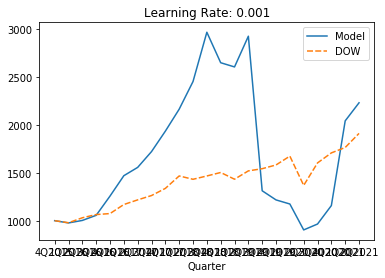

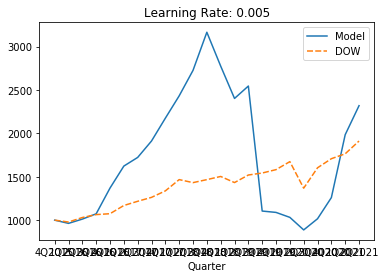

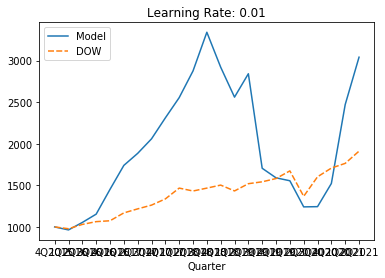

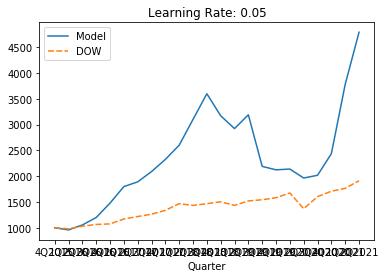

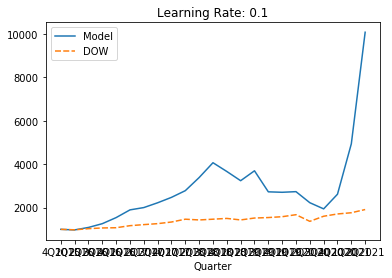

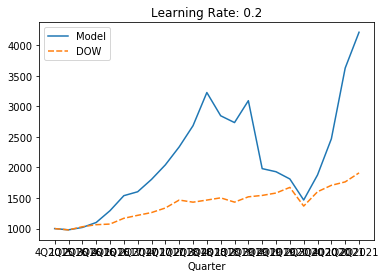

In [79]:
for learning_rate, portfolio in output.items():
    plot_vs_dow(portfolio)
    plt.title(f"Learning Rate: {learning_rate}")
    plt.show()

### Learning Rate: 0.1